In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


input_shape = x_train.shape[1:]


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [2]:
def build_autoencoder(input_shape):
    #Encoder
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, decoded)


    encoder = Model(inputs, encoded)

    return autoencoder, encoder

autoencoder, encoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')



In [3]:
checkpoint = ModelCheckpoint(
    filepath="autoencoder_best_model.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min"
)
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks=[checkpoint]
)

autoencoder.save("autoencoder_final_model.h5")


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - loss: 0.5944 - val_loss: 0.5514
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.5521 - val_loss: 0.5475
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5478 - val_loss: 0.5457
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5449 - val_loss: 0.5423
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5430 - val_loss: 0.5418
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.5420 - val_loss: 0.5395
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.5410 - val_loss: 0.5384
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5408 - val_loss: 0.5381
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5390 - val_loss: 0.5377
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.5387 - val_loss: 0.5370
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5380 - val_loss: 0.5366
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Evaluating similarity search:


Processing test samples:   0%|          | 0/10000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:   0%|          | 1/10000 [00:00<1:10:15,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   0%|          | 2/10000 [00:00<1:13:52,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 3/10000 [00:01<1:14:45,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   0%|          | 4/10000 [00:01<1:15:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 5/10000 [00:02<1:15:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   0%|          | 6/10000 [00:02<1:16:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 7/10000 [00:03<1:15:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 8/10000 [00:03<1:14:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 9/10000 [00:04<1:14:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   0%|          | 10/10000 [00:04<1:14:31,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   0%|          | 11/10000 [00:04<1:14:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 12/10000 [00:05<1:17:03,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   0%|          | 13/10000 [00:05<1:22:05,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   0%|          | 14/10000 [00:06<1:27:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   0%|          | 15/10000 [00:07<1:31:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   0%|          | 16/10000 [00:07<1:33:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   0%|          | 17/10000 [00:08<1:35:44,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:   0%|          | 18/10000 [00:08<1:30:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 19/10000 [00:09<1:25:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   0%|          | 20/10000 [00:09<1:22:31,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 21/10000 [00:10<1:19:37,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   0%|          | 22/10000 [00:10<1:17:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:   0%|          | 23/10000 [00:11<1:16:54,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   0%|          | 24/10000 [00:11<1:16:49,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 25/10000 [00:12<1:16:02,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 26/10000 [00:12<1:15:12,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 27/10000 [00:12<1:15:05,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   0%|          | 28/10000 [00:13<1:14:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   0%|          | 29/10000 [00:13<1:14:37,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 30/10000 [00:14<1:14:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   0%|          | 31/10000 [00:14<1:14:10,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 32/10000 [00:15<1:13:50,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 33/10000 [00:15<1:13:55,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   0%|          | 34/10000 [00:16<1:14:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   0%|          | 35/10000 [00:16<1:14:16,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   0%|          | 36/10000 [00:16<1:15:39,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   0%|          | 37/10000 [00:17<1:16:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 38/10000 [00:17<1:15:20,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 39/10000 [00:18<1:15:17,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 40/10000 [00:18<1:18:41,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   0%|          | 41/10000 [00:19<1:24:02,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 42/10000 [00:19<1:26:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   0%|          | 43/10000 [00:20<1:32:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   0%|          | 44/10000 [00:21<1:34:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 45/10000 [00:21<1:34:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   0%|          | 46/10000 [00:22<1:28:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   0%|          | 47/10000 [00:22<1:24:20,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   0%|          | 48/10000 [00:23<1:21:11,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   0%|          | 49/10000 [00:23<1:19:47,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   0%|          | 50/10000 [00:24<1:18:11,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|          | 51/10000 [00:24<1:17:08,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   1%|          | 52/10000 [00:24<1:16:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 53/10000 [00:25<1:15:53,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 54/10000 [00:25<1:15:48,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 55/10000 [00:26<1:15:01,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:   1%|          | 56/10000 [00:26<1:15:18,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   1%|          | 57/10000 [00:27<1:15:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|          | 58/10000 [00:27<1:14:53,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 59/10000 [00:28<1:14:21,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 60/10000 [00:28<1:14:53,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 61/10000 [00:28<1:15:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 62/10000 [00:29<1:15:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 63/10000 [00:29<1:15:25,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 64/10000 [00:30<1:14:57,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 65/10000 [00:30<1:15:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 66/10000 [00:31<1:14:36,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 67/10000 [00:31<1:16:24,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:   1%|          | 68/10000 [00:32<1:24:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 69/10000 [00:32<1:30:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 70/10000 [00:33<1:33:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   1%|          | 71/10000 [00:34<1:34:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 72/10000 [00:34<1:35:14,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 73/10000 [00:35<1:28:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 74/10000 [00:35<1:25:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 75/10000 [00:36<1:22:04,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 76/10000 [00:36<1:20:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 77/10000 [00:37<1:19:06,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 78/10000 [00:37<1:17:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:   1%|          | 79/10000 [00:37<1:16:52,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   1%|          | 80/10000 [00:38<1:16:18,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 81/10000 [00:38<1:16:35,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 82/10000 [00:39<1:15:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 83/10000 [00:39<1:15:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 84/10000 [00:40<1:15:22,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   1%|          | 85/10000 [00:40<1:15:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 86/10000 [00:41<1:15:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|          | 87/10000 [00:41<1:15:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 88/10000 [00:42<1:15:46,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 89/10000 [00:42<1:15:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 90/10000 [00:42<1:15:22,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 91/10000 [00:43<1:14:46,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 92/10000 [00:43<1:14:24,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:   1%|          | 93/10000 [00:44<1:15:15,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 94/10000 [00:44<1:17:43,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|          | 95/10000 [00:45<1:24:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 96/10000 [00:46<1:29:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   1%|          | 97/10000 [00:46<1:33:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 98/10000 [00:47<1:36:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 99/10000 [00:47<1:36:31,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 100/10000 [00:48<1:30:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|          | 101/10000 [00:48<1:25:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 102/10000 [00:49<1:22:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 103/10000 [00:49<1:19:53,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 104/10000 [00:50<1:17:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 105/10000 [00:50<1:17:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   1%|          | 106/10000 [00:51<1:16:36,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 107/10000 [00:51<1:16:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 108/10000 [00:51<1:15:47,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 109/10000 [00:52<1:16:16,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|          | 110/10000 [00:52<1:16:07,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 111/10000 [00:53<1:15:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 112/10000 [00:53<1:15:27,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 113/10000 [00:54<1:15:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 114/10000 [00:54<1:15:44,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   1%|          | 115/10000 [00:55<1:15:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 116/10000 [00:55<1:15:38,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 117/10000 [00:56<1:15:04,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 118/10000 [00:56<1:15:28,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 119/10000 [00:57<1:15:09,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|          | 120/10000 [00:57<1:15:26,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   1%|          | 121/10000 [00:58<1:18:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   1%|          | 122/10000 [00:58<1:25:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   1%|          | 123/10000 [00:59<1:30:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:   1%|          | 124/10000 [00:59<1:34:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|▏         | 125/10000 [01:00<1:36:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   1%|▏         | 126/10000 [01:01<1:37:02,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|▏         | 127/10000 [01:01<1:30:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   1%|▏         | 128/10000 [01:02<1:27:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   1%|▏         | 129/10000 [01:02<1:24:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   1%|▏         | 130/10000 [01:02<1:21:51,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|▏         | 131/10000 [01:03<1:19:31,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|▏         | 132/10000 [01:03<1:18:36,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|▏         | 133/10000 [01:04<1:17:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   1%|▏         | 134/10000 [01:04<1:17:55,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|▏         | 135/10000 [01:05<1:16:56,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   1%|▏         | 136/10000 [01:05<1:16:35,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|▏         | 137/10000 [01:06<1:16:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|▏         | 138/10000 [01:06<1:15:41,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|▏         | 139/10000 [01:07<1:15:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|▏         | 140/10000 [01:07<1:15:53,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|▏         | 141/10000 [01:08<1:16:00,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|▏         | 142/10000 [01:08<1:15:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:   1%|▏         | 143/10000 [01:08<1:15:39,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   1%|▏         | 144/10000 [01:09<1:15:37,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   1%|▏         | 145/10000 [01:09<1:15:29,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|▏         | 146/10000 [01:10<1:15:22,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|▏         | 147/10000 [01:10<1:15:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|▏         | 148/10000 [01:11<1:19:39,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   1%|▏         | 149/10000 [01:11<1:24:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:   2%|▏         | 150/10000 [01:12<1:27:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:   2%|▏         | 151/10000 [01:13<1:31:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 152/10000 [01:13<1:33:57,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   2%|▏         | 153/10000 [01:14<1:36:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:   2%|▏         | 154/10000 [01:14<1:31:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 155/10000 [01:15<1:26:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 156/10000 [01:15<1:23:03,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 157/10000 [01:16<1:20:15,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 158/10000 [01:16<1:18:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 159/10000 [01:17<1:18:21,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   2%|▏         | 160/10000 [01:17<1:18:43,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:   2%|▏         | 161/10000 [01:18<1:18:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   2%|▏         | 162/10000 [01:18<1:17:38,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 163/10000 [01:18<1:16:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 164/10000 [01:19<1:18:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 165/10000 [01:20<1:21:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:   2%|▏         | 166/10000 [01:20<1:33:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 167/10000 [01:21<1:35:47,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   2%|▏         | 168/10000 [01:21<1:36:33,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 169/10000 [01:22<1:40:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   2%|▏         | 170/10000 [01:23<1:37:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   2%|▏         | 171/10000 [01:23<1:31:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 172/10000 [01:24<1:26:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 173/10000 [01:24<1:27:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 174/10000 [01:25<1:30:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing test samples:   2%|▏         | 175/10000 [01:26<2:05:19,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:   2%|▏         | 176/10000 [01:27<2:19:31,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test samples:   2%|▏         | 177/10000 [01:28<2:14:06,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:   2%|▏         | 178/10000 [01:28<2:03:00,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 179/10000 [01:29<2:00:56,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:   2%|▏         | 180/10000 [01:30<1:47:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 181/10000 [01:30<1:36:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 182/10000 [01:31<1:30:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 183/10000 [01:31<1:24:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 184/10000 [01:31<1:21:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 185/10000 [01:32<1:19:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 186/10000 [01:32<1:17:53,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 187/10000 [01:33<1:16:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   2%|▏         | 188/10000 [01:33<1:15:51,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   2%|▏         | 189/10000 [01:34<1:15:14,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 190/10000 [01:34<1:14:28,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   2%|▏         | 191/10000 [01:35<1:14:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   2%|▏         | 192/10000 [01:35<1:13:30,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   2%|▏         | 193/10000 [01:35<1:14:09,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   2%|▏         | 194/10000 [01:36<1:13:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 195/10000 [01:36<1:13:47,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 196/10000 [01:37<1:13:56,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 197/10000 [01:37<1:13:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   2%|▏         | 198/10000 [01:38<1:16:07,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 199/10000 [01:38<1:22:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:   2%|▏         | 200/10000 [01:39<1:27:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   2%|▏         | 201/10000 [01:40<1:31:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   2%|▏         | 202/10000 [01:40<1:34:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   2%|▏         | 203/10000 [01:41<1:33:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 204/10000 [01:41<1:27:10,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 205/10000 [01:42<1:23:18,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 206/10000 [01:42<1:21:00,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 207/10000 [01:43<1:18:24,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 208/10000 [01:43<1:16:57,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   2%|▏         | 209/10000 [01:43<1:15:35,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 210/10000 [01:44<1:14:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 211/10000 [01:44<1:14:36,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 212/10000 [01:45<1:14:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   2%|▏         | 213/10000 [01:45<1:13:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 214/10000 [01:46<1:13:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 215/10000 [01:46<1:13:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   2%|▏         | 216/10000 [01:47<1:13:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 217/10000 [01:47<1:13:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   2%|▏         | 218/10000 [01:48<1:14:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 219/10000 [01:48<1:14:16,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   2%|▏         | 220/10000 [01:48<1:14:08,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   2%|▏         | 221/10000 [01:49<1:13:57,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   2%|▏         | 222/10000 [01:49<1:14:22,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 223/10000 [01:50<1:13:58,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 224/10000 [01:50<1:14:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   2%|▏         | 225/10000 [01:51<1:15:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   2%|▏         | 226/10000 [01:51<1:22:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 227/10000 [01:52<1:26:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   2%|▏         | 228/10000 [01:53<1:30:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   2%|▏         | 229/10000 [01:53<1:33:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 230/10000 [01:54<1:34:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   2%|▏         | 231/10000 [01:54<1:33:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 232/10000 [01:55<1:27:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 233/10000 [01:55<1:24:15,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 234/10000 [01:56<1:21:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   2%|▏         | 235/10000 [01:56<1:20:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 236/10000 [01:57<1:18:28,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   2%|▏         | 237/10000 [01:57<1:17:51,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   2%|▏         | 238/10000 [01:58<1:16:55,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   2%|▏         | 239/10000 [01:58<1:16:13,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 240/10000 [01:58<1:16:00,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 241/10000 [01:59<1:15:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   2%|▏         | 242/10000 [01:59<1:14:59,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   2%|▏         | 243/10000 [02:00<1:15:17,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 244/10000 [02:00<1:15:36,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 245/10000 [02:01<1:15:29,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▏         | 246/10000 [02:01<1:15:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   2%|▏         | 247/10000 [02:02<1:15:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 248/10000 [02:02<1:15:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   2%|▏         | 249/10000 [02:03<1:15:51,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   2%|▎         | 250/10000 [02:03<1:15:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 251/10000 [02:04<1:15:19,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 252/10000 [02:04<1:14:51,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 253/10000 [02:05<1:24:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 254/10000 [02:05<1:28:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   3%|▎         | 255/10000 [02:06<1:32:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   3%|▎         | 256/10000 [02:07<1:36:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 257/10000 [02:07<1:38:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 258/10000 [02:08<1:35:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 259/10000 [02:08<1:29:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 260/10000 [02:09<1:25:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   3%|▎         | 261/10000 [02:09<1:21:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   3%|▎         | 262/10000 [02:10<1:19:14,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   3%|▎         | 263/10000 [02:10<1:18:48,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   3%|▎         | 264/10000 [02:11<1:17:30,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 265/10000 [02:11<1:17:29,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 266/10000 [02:11<1:16:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 267/10000 [02:12<1:16:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 268/10000 [02:12<1:15:36,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 269/10000 [02:13<1:15:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 270/10000 [02:13<1:15:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 271/10000 [02:14<1:15:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 272/10000 [02:14<1:15:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   3%|▎         | 273/10000 [02:15<1:14:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   3%|▎         | 274/10000 [02:15<1:14:39,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 275/10000 [02:16<1:14:02,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   3%|▎         | 276/10000 [02:16<1:13:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 277/10000 [02:17<1:14:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   3%|▎         | 278/10000 [02:17<1:14:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:   3%|▎         | 279/10000 [02:17<1:15:01,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 280/10000 [02:18<1:21:54,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:   3%|▎         | 281/10000 [02:19<1:28:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 282/10000 [02:19<1:32:42,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 283/10000 [02:20<1:33:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 284/10000 [02:21<1:35:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 285/10000 [02:21<1:28:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:   3%|▎         | 286/10000 [02:21<1:25:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   3%|▎         | 287/10000 [02:22<1:21:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 288/10000 [02:22<1:19:57,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   3%|▎         | 289/10000 [02:23<1:18:23,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 290/10000 [02:23<1:17:22,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 291/10000 [02:24<1:16:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 292/10000 [02:24<1:15:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 293/10000 [02:25<1:14:34,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   3%|▎         | 294/10000 [02:25<1:14:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 295/10000 [02:26<1:14:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 296/10000 [02:26<1:14:04,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 297/10000 [02:26<1:13:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 298/10000 [02:27<1:13:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   3%|▎         | 299/10000 [02:27<1:13:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   3%|▎         | 300/10000 [02:28<1:13:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   3%|▎         | 301/10000 [02:28<1:13:32,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 302/10000 [02:29<1:13:50,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 303/10000 [02:29<1:13:28,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 304/10000 [02:30<1:13:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 305/10000 [02:30<1:13:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 306/10000 [02:31<1:15:11,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:   3%|▎         | 307/10000 [02:31<1:21:47,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 308/10000 [02:32<1:27:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 309/10000 [02:32<1:31:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   3%|▎         | 310/10000 [02:33<1:33:32,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 311/10000 [02:34<1:33:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 312/10000 [02:34<1:31:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 313/10000 [02:35<1:26:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   3%|▎         | 314/10000 [02:35<1:22:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 315/10000 [02:36<1:19:28,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 316/10000 [02:36<1:18:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 317/10000 [02:36<1:16:52,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 318/10000 [02:37<1:15:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   3%|▎         | 319/10000 [02:37<1:14:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 320/10000 [02:38<1:14:49,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 321/10000 [02:38<1:14:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   3%|▎         | 322/10000 [02:39<1:14:21,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   3%|▎         | 323/10000 [02:39<1:14:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   3%|▎         | 324/10000 [02:40<1:13:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 325/10000 [02:40<1:13:38,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 326/10000 [02:41<1:13:26,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 327/10000 [02:41<1:13:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 328/10000 [02:41<1:13:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 329/10000 [02:42<1:13:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 330/10000 [02:42<1:13:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   3%|▎         | 331/10000 [02:43<1:12:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 332/10000 [02:43<1:13:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   3%|▎         | 333/10000 [02:44<1:13:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 334/10000 [02:44<1:18:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   3%|▎         | 335/10000 [02:45<1:21:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   3%|▎         | 336/10000 [02:45<1:23:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   3%|▎         | 337/10000 [02:46<1:27:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   3%|▎         | 338/10000 [02:47<1:29:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 339/10000 [02:47<1:32:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   3%|▎         | 340/10000 [02:48<1:28:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   3%|▎         | 341/10000 [02:48<1:24:39,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 342/10000 [02:49<1:21:13,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   3%|▎         | 343/10000 [02:49<1:20:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   3%|▎         | 344/10000 [02:50<1:17:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   3%|▎         | 345/10000 [02:50<1:16:00,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 346/10000 [02:50<1:15:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 347/10000 [02:51<1:14:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   3%|▎         | 348/10000 [02:51<1:13:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   3%|▎         | 349/10000 [02:52<1:13:08,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▎         | 350/10000 [02:52<1:14:11,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▎         | 351/10000 [02:53<1:13:39,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▎         | 352/10000 [02:53<1:13:20,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▎         | 353/10000 [02:54<1:13:08,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▎         | 354/10000 [02:54<1:13:22,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▎         | 355/10000 [02:55<1:13:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▎         | 356/10000 [02:55<1:12:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▎         | 357/10000 [02:55<1:12:56,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▎         | 358/10000 [02:56<1:12:43,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▎         | 359/10000 [02:56<1:12:52,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   4%|▎         | 360/10000 [02:57<1:13:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▎         | 361/10000 [02:57<1:13:21,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   4%|▎         | 362/10000 [02:58<1:18:29,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:   4%|▎         | 363/10000 [02:58<1:23:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▎         | 364/10000 [02:59<1:28:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:   4%|▎         | 365/10000 [03:00<1:31:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▎         | 366/10000 [03:00<1:33:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   4%|▎         | 367/10000 [03:01<1:32:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   4%|▎         | 368/10000 [03:01<1:26:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▎         | 369/10000 [03:02<1:22:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▎         | 370/10000 [03:02<1:20:17,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   4%|▎         | 371/10000 [03:03<1:17:49,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▎         | 372/10000 [03:03<1:16:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   4%|▎         | 373/10000 [03:04<1:15:25,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▎         | 374/10000 [03:04<1:15:25,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 375/10000 [03:05<1:14:35,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   4%|▍         | 376/10000 [03:05<1:13:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 377/10000 [03:05<1:13:26,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▍         | 378/10000 [03:06<1:14:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 379/10000 [03:06<1:13:29,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 380/10000 [03:07<1:13:11,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   4%|▍         | 381/10000 [03:07<1:13:23,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 382/10000 [03:08<1:12:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 383/10000 [03:08<1:13:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 384/10000 [03:09<1:12:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   4%|▍         | 385/10000 [03:09<1:12:49,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 386/10000 [03:10<1:13:00,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   4%|▍         | 387/10000 [03:10<1:13:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   4%|▍         | 388/10000 [03:10<1:13:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   4%|▍         | 389/10000 [03:11<1:16:12,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   4%|▍         | 390/10000 [03:12<1:21:35,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:   4%|▍         | 391/10000 [03:12<1:27:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 392/10000 [03:13<1:30:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:   4%|▍         | 393/10000 [03:13<1:33:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 394/10000 [03:14<1:34:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:   4%|▍         | 395/10000 [03:15<1:37:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 396/10000 [03:15<1:31:46,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 397/10000 [03:16<1:26:33,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 398/10000 [03:16<1:22:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 399/10000 [03:17<1:20:02,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 400/10000 [03:17<1:18:15,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   4%|▍         | 401/10000 [03:17<1:17:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▍         | 402/10000 [03:18<1:15:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 403/10000 [03:18<1:15:13,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▍         | 404/10000 [03:19<1:14:43,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   4%|▍         | 405/10000 [03:19<1:15:46,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 406/10000 [03:20<1:15:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 407/10000 [03:20<1:14:32,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 408/10000 [03:21<1:14:35,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   4%|▍         | 409/10000 [03:21<1:14:11,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 410/10000 [03:22<1:13:27,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▍         | 411/10000 [03:22<1:13:26,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   4%|▍         | 412/10000 [03:23<1:13:07,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 413/10000 [03:23<1:13:11,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 414/10000 [03:24<1:14:08,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   4%|▍         | 415/10000 [03:24<1:13:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   4%|▍         | 416/10000 [03:25<1:18:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 417/10000 [03:25<1:23:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 418/10000 [03:26<1:28:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   4%|▍         | 419/10000 [03:26<1:32:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 420/10000 [03:27<1:35:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 421/10000 [03:28<1:34:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 422/10000 [03:28<1:28:25,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 423/10000 [03:29<1:23:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 424/10000 [03:29<1:20:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 425/10000 [03:29<1:18:00,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 426/10000 [03:30<1:16:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 427/10000 [03:30<1:14:54,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 428/10000 [03:31<1:13:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 429/10000 [03:31<1:14:05,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 430/10000 [03:32<1:12:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 431/10000 [03:32<1:13:35,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   4%|▍         | 432/10000 [03:33<1:13:34,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 433/10000 [03:33<1:13:31,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 434/10000 [03:34<1:13:12,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 435/10000 [03:34<1:13:06,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   4%|▍         | 436/10000 [03:34<1:12:52,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   4%|▍         | 437/10000 [03:35<1:12:31,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▍         | 438/10000 [03:35<1:12:31,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 439/10000 [03:36<1:12:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   4%|▍         | 440/10000 [03:36<1:13:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 441/10000 [03:37<1:12:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   4%|▍         | 442/10000 [03:37<1:13:18,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   4%|▍         | 443/10000 [03:38<1:15:37,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   4%|▍         | 444/10000 [03:38<1:23:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   4%|▍         | 445/10000 [03:39<1:26:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   4%|▍         | 446/10000 [03:40<1:29:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   4%|▍         | 447/10000 [03:40<1:30:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   4%|▍         | 448/10000 [03:41<1:32:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   4%|▍         | 449/10000 [03:41<1:29:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   4%|▍         | 450/10000 [03:42<1:24:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 451/10000 [03:42<1:20:22,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   5%|▍         | 452/10000 [03:43<1:17:54,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   5%|▍         | 453/10000 [03:43<1:15:52,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   5%|▍         | 454/10000 [03:44<1:15:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   5%|▍         | 455/10000 [03:44<1:14:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 456/10000 [03:44<1:13:36,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 457/10000 [03:45<1:13:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 458/10000 [03:45<1:13:43,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   5%|▍         | 459/10000 [03:46<1:13:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   5%|▍         | 460/10000 [03:46<1:12:51,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▍         | 461/10000 [03:47<1:12:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▍         | 462/10000 [03:47<1:12:25,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   5%|▍         | 463/10000 [03:48<1:12:47,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   5%|▍         | 464/10000 [03:48<1:12:56,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   5%|▍         | 465/10000 [03:49<1:12:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▍         | 466/10000 [03:49<1:12:01,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   5%|▍         | 467/10000 [03:49<1:12:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 468/10000 [03:50<1:14:08,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   5%|▍         | 469/10000 [03:50<1:13:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   5%|▍         | 470/10000 [03:51<1:13:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   5%|▍         | 471/10000 [03:51<1:18:41,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▍         | 472/10000 [03:52<1:23:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   5%|▍         | 473/10000 [03:53<1:27:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:   5%|▍         | 474/10000 [03:53<1:30:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   5%|▍         | 475/10000 [03:54<1:31:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   5%|▍         | 476/10000 [03:54<1:31:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   5%|▍         | 477/10000 [03:55<1:26:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▍         | 478/10000 [03:55<1:22:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   5%|▍         | 479/10000 [03:56<1:19:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 480/10000 [03:56<1:17:34,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 481/10000 [03:57<1:16:36,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   5%|▍         | 482/10000 [03:57<1:15:50,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▍         | 483/10000 [03:58<1:15:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   5%|▍         | 484/10000 [03:58<1:15:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▍         | 485/10000 [03:59<1:14:23,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   5%|▍         | 486/10000 [03:59<1:13:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▍         | 487/10000 [04:00<1:13:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   5%|▍         | 488/10000 [04:00<1:13:47,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   5%|▍         | 489/10000 [04:00<1:13:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   5%|▍         | 490/10000 [04:01<1:12:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   5%|▍         | 491/10000 [04:01<1:13:24,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▍         | 492/10000 [04:02<1:13:09,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   5%|▍         | 493/10000 [04:02<1:14:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 494/10000 [04:03<1:13:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▍         | 495/10000 [04:03<1:13:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   5%|▍         | 496/10000 [04:04<1:13:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   5%|▍         | 497/10000 [04:04<1:13:27,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   5%|▍         | 498/10000 [04:05<1:17:00,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   5%|▍         | 499/10000 [04:05<1:22:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 500/10000 [04:06<1:24:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▌         | 501/10000 [04:06<1:29:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   5%|▌         | 502/10000 [04:07<1:31:11,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:   5%|▌         | 503/10000 [04:08<1:31:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   5%|▌         | 504/10000 [04:08<1:26:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   5%|▌         | 505/10000 [04:09<1:23:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   5%|▌         | 506/10000 [04:09<1:19:54,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 507/10000 [04:10<1:17:08,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   5%|▌         | 508/10000 [04:10<1:15:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   5%|▌         | 509/10000 [04:10<1:14:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   5%|▌         | 510/10000 [04:11<1:13:51,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▌         | 511/10000 [04:11<1:13:51,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 512/10000 [04:12<1:13:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 513/10000 [04:12<1:13:08,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 514/10000 [04:13<1:12:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   5%|▌         | 515/10000 [04:13<1:12:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 516/10000 [04:14<1:12:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   5%|▌         | 517/10000 [04:14<1:12:34,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 518/10000 [04:15<1:12:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 519/10000 [04:15<1:13:05,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   5%|▌         | 520/10000 [04:16<1:13:20,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 521/10000 [04:16<1:13:29,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   5%|▌         | 522/10000 [04:16<1:13:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 523/10000 [04:17<1:13:38,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▌         | 524/10000 [04:17<1:13:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▌         | 525/10000 [04:18<1:16:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   5%|▌         | 526/10000 [04:18<1:20:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 527/10000 [04:19<1:25:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:   5%|▌         | 528/10000 [04:20<1:27:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   5%|▌         | 529/10000 [04:20<1:32:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   5%|▌         | 530/10000 [04:21<1:33:45,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:   5%|▌         | 531/10000 [04:21<1:28:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 532/10000 [04:22<1:24:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   5%|▌         | 533/10000 [04:22<1:20:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   5%|▌         | 534/10000 [04:23<1:18:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 535/10000 [04:23<1:17:49,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   5%|▌         | 536/10000 [04:24<1:15:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   5%|▌         | 537/10000 [04:24<1:15:22,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   5%|▌         | 538/10000 [04:25<1:14:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   5%|▌         | 539/10000 [04:25<1:13:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 540/10000 [04:26<1:12:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 541/10000 [04:26<1:13:33,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 542/10000 [04:27<1:13:04,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   5%|▌         | 543/10000 [04:27<1:12:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   5%|▌         | 544/10000 [04:27<1:12:22,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 545/10000 [04:28<1:12:04,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 546/10000 [04:28<1:12:24,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   5%|▌         | 547/10000 [04:29<1:11:57,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   5%|▌         | 548/10000 [04:29<1:11:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   5%|▌         | 549/10000 [04:30<1:11:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   6%|▌         | 550/10000 [04:30<1:12:11,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 551/10000 [04:31<1:11:34,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▌         | 552/10000 [04:31<1:11:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▌         | 553/10000 [04:32<1:18:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▌         | 554/10000 [04:32<1:25:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▌         | 555/10000 [04:33<1:28:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:   6%|▌         | 556/10000 [04:34<1:30:31,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▌         | 557/10000 [04:34<1:33:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:   6%|▌         | 558/10000 [04:35<1:28:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 559/10000 [04:35<1:23:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 560/10000 [04:36<1:20:02,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   6%|▌         | 561/10000 [04:36<1:17:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 562/10000 [04:36<1:15:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   6%|▌         | 563/10000 [04:37<1:14:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   6%|▌         | 564/10000 [04:37<1:14:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   6%|▌         | 565/10000 [04:38<1:13:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   6%|▌         | 566/10000 [04:38<1:13:25,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   6%|▌         | 567/10000 [04:39<1:12:53,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 568/10000 [04:39<1:12:21,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   6%|▌         | 569/10000 [04:40<1:12:22,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▌         | 570/10000 [04:40<1:12:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 571/10000 [04:41<1:12:13,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▌         | 572/10000 [04:41<1:12:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   6%|▌         | 573/10000 [04:42<1:11:56,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▌         | 574/10000 [04:42<1:11:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   6%|▌         | 575/10000 [04:42<1:11:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 576/10000 [04:43<1:11:48,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 577/10000 [04:43<1:11:52,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 578/10000 [04:44<1:12:04,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 579/10000 [04:44<1:12:24,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   6%|▌         | 580/10000 [04:45<1:17:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 581/10000 [04:45<1:23:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   6%|▌         | 582/10000 [04:46<1:27:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   6%|▌         | 583/10000 [04:47<1:28:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 584/10000 [04:47<1:29:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 585/10000 [04:48<1:28:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 586/10000 [04:48<1:23:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 587/10000 [04:49<1:19:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   6%|▌         | 588/10000 [04:49<1:17:42,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▌         | 589/10000 [04:50<1:16:04,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 590/10000 [04:50<1:15:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▌         | 591/10000 [04:51<1:14:45,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 592/10000 [04:51<1:13:51,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▌         | 593/10000 [04:52<1:13:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   6%|▌         | 594/10000 [04:52<1:12:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 595/10000 [04:52<1:12:35,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 596/10000 [04:53<1:12:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▌         | 597/10000 [04:53<1:12:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   6%|▌         | 598/10000 [04:54<1:12:14,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▌         | 599/10000 [04:54<1:12:15,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 600/10000 [04:55<1:12:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 601/10000 [04:55<1:12:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   6%|▌         | 602/10000 [04:56<1:11:44,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   6%|▌         | 603/10000 [04:56<1:12:38,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 604/10000 [04:57<1:12:01,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   6%|▌         | 605/10000 [04:57<1:12:12,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 606/10000 [04:57<1:12:04,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▌         | 607/10000 [04:58<1:15:18,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 608/10000 [04:59<1:19:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 609/10000 [04:59<1:22:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   6%|▌         | 610/10000 [05:00<1:25:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▌         | 611/10000 [05:00<1:28:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▌         | 612/10000 [05:01<1:45:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▌         | 613/10000 [05:02<1:35:05,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▌         | 614/10000 [05:02<1:28:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▌         | 615/10000 [05:03<1:23:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   6%|▌         | 616/10000 [05:03<1:19:48,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   6%|▌         | 617/10000 [05:04<1:17:15,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▌         | 618/10000 [05:04<1:15:16,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 619/10000 [05:04<1:13:43,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▌         | 620/10000 [05:05<1:13:08,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 621/10000 [05:05<1:12:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▌         | 622/10000 [05:06<1:12:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▌         | 623/10000 [05:06<1:12:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▌         | 624/10000 [05:07<1:11:43,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   6%|▋         | 625/10000 [05:07<1:11:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▋         | 626/10000 [05:08<1:11:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   6%|▋         | 627/10000 [05:08<1:11:25,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▋         | 628/10000 [05:09<1:11:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▋         | 629/10000 [05:09<1:12:10,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▋         | 630/10000 [05:10<1:11:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▋         | 631/10000 [05:10<1:11:29,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▋         | 632/10000 [05:10<1:11:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▋         | 633/10000 [05:11<1:11:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   6%|▋         | 634/10000 [05:11<1:12:04,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▋         | 635/10000 [05:12<1:19:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▋         | 636/10000 [05:13<1:24:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▋         | 637/10000 [05:13<1:27:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   6%|▋         | 638/10000 [05:14<1:29:12,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   6%|▋         | 639/10000 [05:14<1:31:32,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   6%|▋         | 640/10000 [05:15<1:29:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▋         | 641/10000 [05:15<1:23:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▋         | 642/10000 [05:16<1:20:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   6%|▋         | 643/10000 [05:16<1:18:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   6%|▋         | 644/10000 [05:17<1:16:00,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   6%|▋         | 645/10000 [05:17<1:15:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   6%|▋         | 646/10000 [05:18<1:13:47,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   6%|▋         | 647/10000 [05:18<1:12:55,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   6%|▋         | 648/10000 [05:19<1:11:44,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   6%|▋         | 649/10000 [05:19<1:12:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   6%|▋         | 650/10000 [05:20<1:12:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   7%|▋         | 651/10000 [05:20<1:11:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 652/10000 [05:20<1:11:39,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   7%|▋         | 653/10000 [05:21<1:12:22,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 654/10000 [05:21<1:13:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 655/10000 [05:22<1:12:17,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   7%|▋         | 656/10000 [05:22<1:12:01,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   7%|▋         | 657/10000 [05:23<1:11:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   7%|▋         | 658/10000 [05:23<1:11:28,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 659/10000 [05:24<1:10:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 660/10000 [05:24<1:11:12,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 661/10000 [05:25<1:11:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 662/10000 [05:25<1:17:23,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   7%|▋         | 663/10000 [05:26<1:21:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 664/10000 [05:26<1:27:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   7%|▋         | 665/10000 [05:27<1:30:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   7%|▋         | 666/10000 [05:28<1:32:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   7%|▋         | 667/10000 [05:28<1:31:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   7%|▋         | 668/10000 [05:29<1:24:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 669/10000 [05:29<1:20:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 670/10000 [05:30<1:17:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   7%|▋         | 671/10000 [05:30<1:15:58,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   7%|▋         | 672/10000 [05:31<1:14:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 673/10000 [05:31<1:13:21,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:   7%|▋         | 674/10000 [05:31<1:12:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   7%|▋         | 675/10000 [05:32<1:12:57,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   7%|▋         | 676/10000 [05:32<1:12:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 677/10000 [05:33<1:12:07,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 678/10000 [05:33<1:11:32,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 679/10000 [05:34<1:11:17,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 680/10000 [05:34<1:11:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   7%|▋         | 681/10000 [05:35<1:11:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   7%|▋         | 682/10000 [05:35<1:11:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 683/10000 [05:36<1:11:02,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 684/10000 [05:36<1:11:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   7%|▋         | 685/10000 [05:37<1:11:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 686/10000 [05:37<1:11:17,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   7%|▋         | 687/10000 [05:37<1:11:13,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   7%|▋         | 688/10000 [05:38<1:11:02,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   7%|▋         | 689/10000 [05:38<1:14:09,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 690/10000 [05:39<1:20:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   7%|▋         | 691/10000 [05:40<1:21:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:   7%|▋         | 692/10000 [05:40<1:25:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   7%|▋         | 693/10000 [05:41<1:26:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   7%|▋         | 694/10000 [05:41<1:28:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   7%|▋         | 695/10000 [05:42<1:24:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 696/10000 [05:42<1:21:22,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 697/10000 [05:43<1:18:04,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   7%|▋         | 698/10000 [05:43<1:16:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 699/10000 [05:44<1:14:36,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   7%|▋         | 700/10000 [05:44<1:13:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 701/10000 [05:45<1:12:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   7%|▋         | 702/10000 [05:45<1:12:29,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   7%|▋         | 703/10000 [05:46<1:12:10,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   7%|▋         | 704/10000 [05:46<1:11:38,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 705/10000 [05:46<1:11:31,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 706/10000 [05:47<1:11:10,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   7%|▋         | 707/10000 [05:47<1:11:21,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   7%|▋         | 708/10000 [05:48<1:10:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   7%|▋         | 709/10000 [05:48<1:11:39,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 710/10000 [05:49<1:11:10,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   7%|▋         | 711/10000 [05:49<1:11:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   7%|▋         | 712/10000 [05:50<1:11:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   7%|▋         | 713/10000 [05:50<1:10:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   7%|▋         | 714/10000 [05:51<1:11:09,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   7%|▋         | 715/10000 [05:51<1:12:42,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 716/10000 [05:52<1:13:12,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:   7%|▋         | 717/10000 [05:52<1:19:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 718/10000 [05:53<1:23:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 719/10000 [05:53<1:28:11,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 720/10000 [05:54<1:29:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 721/10000 [05:55<1:31:00,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 722/10000 [05:55<1:24:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 723/10000 [05:56<1:20:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 724/10000 [05:56<1:17:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 725/10000 [05:56<1:16:03,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 726/10000 [05:57<1:14:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 727/10000 [05:57<1:13:07,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   7%|▋         | 728/10000 [05:58<1:12:19,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   7%|▋         | 729/10000 [05:58<1:11:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   7%|▋         | 730/10000 [05:59<1:11:50,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 731/10000 [05:59<1:11:35,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   7%|▋         | 732/10000 [06:00<1:11:49,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   7%|▋         | 733/10000 [06:00<1:11:39,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 734/10000 [06:01<1:11:53,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   7%|▋         | 735/10000 [06:01<1:11:24,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 736/10000 [06:02<1:11:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   7%|▋         | 737/10000 [06:02<1:12:22,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 738/10000 [06:02<1:11:59,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 739/10000 [06:03<1:12:01,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   7%|▋         | 740/10000 [06:03<1:12:18,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 741/10000 [06:04<1:11:39,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   7%|▋         | 742/10000 [06:04<1:11:57,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 743/10000 [06:05<1:16:13,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   7%|▋         | 744/10000 [06:05<1:20:30,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   7%|▋         | 745/10000 [06:06<1:25:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   7%|▋         | 746/10000 [06:07<1:29:09,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   7%|▋         | 747/10000 [06:07<1:29:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   7%|▋         | 748/10000 [06:08<1:30:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   7%|▋         | 749/10000 [06:08<1:26:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   8%|▊         | 750/10000 [06:09<1:21:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 751/10000 [06:09<1:18:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 752/10000 [06:10<1:16:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   8%|▊         | 753/10000 [06:10<1:15:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 754/10000 [06:11<1:13:49,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 755/10000 [06:11<1:13:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 756/10000 [06:12<1:12:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   8%|▊         | 757/10000 [06:12<1:12:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   8%|▊         | 758/10000 [06:13<1:12:01,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   8%|▊         | 759/10000 [06:13<1:12:02,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   8%|▊         | 760/10000 [06:14<1:11:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 761/10000 [06:14<1:11:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   8%|▊         | 762/10000 [06:14<1:11:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   8%|▊         | 763/10000 [06:15<1:10:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 764/10000 [06:15<1:11:18,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 765/10000 [06:16<1:10:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   8%|▊         | 766/10000 [06:16<1:11:02,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 767/10000 [06:17<1:10:54,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 768/10000 [06:17<1:11:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 769/10000 [06:18<1:11:11,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 770/10000 [06:18<1:12:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   8%|▊         | 771/10000 [06:19<1:17:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   8%|▊         | 772/10000 [06:19<1:23:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 773/10000 [06:20<1:26:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   8%|▊         | 774/10000 [06:21<1:29:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   8%|▊         | 775/10000 [06:21<1:30:44,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 776/10000 [06:22<1:29:47,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 777/10000 [06:22<1:24:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 778/10000 [06:23<1:20:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 779/10000 [06:23<1:17:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 780/10000 [06:24<1:15:31,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 781/10000 [06:24<1:14:04,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 782/10000 [06:25<1:13:38,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   8%|▊         | 783/10000 [06:25<1:12:23,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 784/10000 [06:26<1:12:34,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 785/10000 [06:26<1:12:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 786/10000 [06:26<1:11:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 787/10000 [06:27<1:11:32,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 788/10000 [06:27<1:11:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 789/10000 [06:28<1:10:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 790/10000 [06:28<1:10:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   8%|▊         | 791/10000 [06:29<1:10:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   8%|▊         | 792/10000 [06:29<1:10:05,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 793/10000 [06:30<1:10:50,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 794/10000 [06:30<1:11:20,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:   8%|▊         | 795/10000 [06:31<1:11:01,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 796/10000 [06:31<1:20:05,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 797/10000 [06:32<1:19:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   8%|▊         | 798/10000 [06:32<1:23:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   8%|▊         | 799/10000 [06:33<1:26:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   8%|▊         | 800/10000 [06:34<1:28:45,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:   8%|▊         | 801/10000 [06:34<1:30:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 802/10000 [06:35<1:32:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 803/10000 [06:35<1:26:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 804/10000 [06:36<1:21:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   8%|▊         | 805/10000 [06:36<1:18:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   8%|▊         | 806/10000 [06:37<1:15:45,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 807/10000 [06:37<1:14:12,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 808/10000 [06:38<1:13:08,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 809/10000 [06:38<1:12:32,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   8%|▊         | 810/10000 [06:39<1:11:59,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 811/10000 [06:39<1:10:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 812/10000 [06:39<1:11:00,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   8%|▊         | 813/10000 [06:40<1:10:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 814/10000 [06:40<1:10:42,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   8%|▊         | 815/10000 [06:41<1:10:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   8%|▊         | 816/10000 [06:41<1:10:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   8%|▊         | 817/10000 [06:42<1:10:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   8%|▊         | 818/10000 [06:42<1:10:41,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 819/10000 [06:43<1:10:18,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   8%|▊         | 820/10000 [06:43<1:10:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   8%|▊         | 821/10000 [06:44<1:10:46,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 822/10000 [06:44<1:10:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 823/10000 [06:44<1:10:31,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   8%|▊         | 824/10000 [06:45<1:12:36,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   8%|▊         | 825/10000 [06:46<1:18:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   8%|▊         | 826/10000 [06:46<1:22:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 827/10000 [06:47<1:25:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:   8%|▊         | 828/10000 [06:47<1:27:41,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   8%|▊         | 829/10000 [06:48<1:29:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 830/10000 [06:48<1:24:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 831/10000 [06:49<1:20:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 832/10000 [06:49<1:17:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 833/10000 [06:50<1:15:41,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   8%|▊         | 834/10000 [06:50<1:14:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 835/10000 [06:51<1:13:37,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   8%|▊         | 836/10000 [06:51<1:12:43,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   8%|▊         | 837/10000 [06:52<1:13:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   8%|▊         | 838/10000 [06:52<1:12:52,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 839/10000 [06:53<1:12:48,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   8%|▊         | 840/10000 [06:53<1:13:16,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   8%|▊         | 841/10000 [06:54<1:13:25,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 842/10000 [06:54<1:12:39,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   8%|▊         | 843/10000 [06:55<1:12:22,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 844/10000 [06:55<1:12:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 845/10000 [06:56<1:11:51,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   8%|▊         | 846/10000 [06:56<1:11:55,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   8%|▊         | 847/10000 [06:57<1:11:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   8%|▊         | 848/10000 [06:57<1:11:45,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   8%|▊         | 849/10000 [06:57<1:11:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   8%|▊         | 850/10000 [06:58<1:12:39,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▊         | 851/10000 [06:59<1:17:02,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▊         | 852/10000 [06:59<1:22:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▊         | 853/10000 [07:00<1:26:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▊         | 854/10000 [07:00<1:27:51,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   9%|▊         | 855/10000 [07:01<1:29:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   9%|▊         | 856/10000 [07:02<1:29:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▊         | 857/10000 [07:02<1:24:13,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   9%|▊         | 858/10000 [07:03<1:21:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▊         | 859/10000 [07:03<1:18:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   9%|▊         | 860/10000 [07:03<1:16:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▊         | 861/10000 [07:04<1:14:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   9%|▊         | 862/10000 [07:04<1:14:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▊         | 863/10000 [07:05<1:13:02,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   9%|▊         | 864/10000 [07:05<1:12:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▊         | 865/10000 [07:06<1:11:49,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▊         | 866/10000 [07:06<1:12:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▊         | 867/10000 [07:07<1:11:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   9%|▊         | 868/10000 [07:07<1:10:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   9%|▊         | 869/10000 [07:08<1:10:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   9%|▊         | 870/10000 [07:08<1:10:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▊         | 871/10000 [07:09<1:10:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▊         | 872/10000 [07:09<1:10:32,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▊         | 873/10000 [07:10<1:11:03,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▊         | 874/10000 [07:10<1:10:12,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 875/10000 [07:10<1:10:24,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   9%|▉         | 876/10000 [07:11<1:10:15,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   9%|▉         | 877/10000 [07:11<1:11:07,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:   9%|▉         | 878/10000 [07:12<1:17:35,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▉         | 879/10000 [07:13<1:22:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   9%|▉         | 880/10000 [07:13<1:26:28,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:   9%|▉         | 881/10000 [07:14<1:28:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▉         | 882/10000 [07:14<1:29:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:   9%|▉         | 883/10000 [07:15<1:24:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   9%|▉         | 884/10000 [07:15<1:20:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 885/10000 [07:16<1:18:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   9%|▉         | 886/10000 [07:16<1:15:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 887/10000 [07:17<1:14:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   9%|▉         | 888/10000 [07:17<1:13:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 889/10000 [07:18<1:12:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▉         | 890/10000 [07:18<1:11:37,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 891/10000 [07:19<1:10:57,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:   9%|▉         | 892/10000 [07:19<1:11:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 893/10000 [07:20<1:11:17,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▉         | 894/10000 [07:20<1:11:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 895/10000 [07:21<1:10:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 896/10000 [07:21<1:10:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:   9%|▉         | 897/10000 [07:21<1:10:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   9%|▉         | 898/10000 [07:22<1:10:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 899/10000 [07:22<1:11:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 900/10000 [07:23<1:10:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   9%|▉         | 901/10000 [07:23<1:11:13,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 902/10000 [07:24<1:10:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   9%|▉         | 903/10000 [07:24<1:10:35,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:   9%|▉         | 904/10000 [07:25<1:12:24,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   9%|▉         | 905/10000 [07:25<1:19:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   9%|▉         | 906/10000 [07:26<1:23:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   9%|▉         | 907/10000 [07:27<1:27:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:   9%|▉         | 908/10000 [07:27<1:29:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   9%|▉         | 909/10000 [07:28<1:26:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   9%|▉         | 910/10000 [07:28<1:21:49,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   9%|▉         | 911/10000 [07:29<1:18:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   9%|▉         | 912/10000 [07:29<1:16:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   9%|▉         | 913/10000 [07:30<1:13:59,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 914/10000 [07:30<1:12:34,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▉         | 915/10000 [07:31<1:11:49,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 916/10000 [07:31<1:11:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 917/10000 [07:32<1:11:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 918/10000 [07:32<1:11:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   9%|▉         | 919/10000 [07:32<1:10:48,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   9%|▉         | 920/10000 [07:33<1:10:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   9%|▉         | 921/10000 [07:33<1:11:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 922/10000 [07:34<1:10:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   9%|▉         | 923/10000 [07:34<1:10:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   9%|▉         | 924/10000 [07:35<1:10:11,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:   9%|▉         | 925/10000 [07:35<1:10:12,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 926/10000 [07:36<1:10:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 927/10000 [07:36<1:10:33,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:   9%|▉         | 928/10000 [07:37<1:10:29,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 929/10000 [07:37<1:10:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 930/10000 [07:38<1:10:39,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   9%|▉         | 931/10000 [07:38<1:16:22,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   9%|▉         | 932/10000 [07:39<1:21:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   9%|▉         | 933/10000 [07:39<1:24:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   9%|▉         | 934/10000 [07:40<1:26:57,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▉         | 935/10000 [07:41<1:28:52,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:   9%|▉         | 936/10000 [07:41<1:27:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 937/10000 [07:42<1:21:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   9%|▉         | 938/10000 [07:42<1:18:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 939/10000 [07:43<1:15:20,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   9%|▉         | 940/10000 [07:43<1:14:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:   9%|▉         | 941/10000 [07:43<1:12:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 942/10000 [07:44<1:11:32,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   9%|▉         | 943/10000 [07:44<1:11:13,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:   9%|▉         | 944/10000 [07:45<1:10:51,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   9%|▉         | 945/10000 [07:45<1:10:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 946/10000 [07:46<1:09:36,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   9%|▉         | 947/10000 [07:46<1:09:50,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:   9%|▉         | 948/10000 [07:47<1:10:02,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:   9%|▉         | 949/10000 [07:47<1:10:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|▉         | 950/10000 [07:48<1:09:40,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|▉         | 951/10000 [07:48<1:09:31,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|▉         | 952/10000 [07:49<1:09:50,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|▉         | 953/10000 [07:49<1:10:11,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 954/10000 [07:49<1:09:30,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 955/10000 [07:50<1:10:02,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|▉         | 956/10000 [07:50<1:10:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  10%|▉         | 957/10000 [07:51<1:09:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|▉         | 958/10000 [07:51<1:14:29,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  10%|▉         | 959/10000 [07:52<1:19:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|▉         | 960/10000 [07:53<1:22:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  10%|▉         | 961/10000 [07:53<1:25:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  10%|▉         | 962/10000 [07:54<1:26:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  10%|▉         | 963/10000 [07:54<1:26:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|▉         | 964/10000 [07:55<1:21:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|▉         | 965/10000 [07:55<1:18:08,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  10%|▉         | 966/10000 [07:56<1:15:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  10%|▉         | 967/10000 [07:56<1:14:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|▉         | 968/10000 [07:57<1:13:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 969/10000 [07:57<1:12:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  10%|▉         | 970/10000 [07:58<1:11:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  10%|▉         | 971/10000 [07:58<1:10:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  10%|▉         | 972/10000 [07:59<1:10:26,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  10%|▉         | 973/10000 [07:59<1:10:04,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  10%|▉         | 974/10000 [08:00<1:10:20,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 975/10000 [08:00<1:10:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 976/10000 [08:00<1:11:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 977/10000 [08:01<1:10:53,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  10%|▉         | 978/10000 [08:01<1:10:41,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|▉         | 979/10000 [08:02<1:10:43,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  10%|▉         | 980/10000 [08:02<1:10:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  10%|▉         | 981/10000 [08:03<1:10:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|▉         | 982/10000 [08:03<1:10:33,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  10%|▉         | 983/10000 [08:04<1:10:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  10%|▉         | 984/10000 [08:04<1:09:13,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  10%|▉         | 985/10000 [08:05<1:14:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  10%|▉         | 986/10000 [08:05<1:21:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 987/10000 [08:06<1:25:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  10%|▉         | 988/10000 [08:07<1:28:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test samples:  10%|▉         | 989/10000 [08:07<1:30:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|▉         | 990/10000 [08:08<1:28:24,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  10%|▉         | 991/10000 [08:08<1:22:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  10%|▉         | 992/10000 [08:09<1:18:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 993/10000 [08:09<1:16:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 994/10000 [08:10<1:13:53,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 995/10000 [08:10<1:12:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|▉         | 996/10000 [08:11<1:11:34,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|▉         | 997/10000 [08:11<1:11:55,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  10%|▉         | 998/10000 [08:12<1:11:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|▉         | 999/10000 [08:12<1:10:57,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|█         | 1000/10000 [08:13<1:10:09,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  10%|█         | 1001/10000 [08:13<1:09:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|█         | 1002/10000 [08:13<1:09:22,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  10%|█         | 1003/10000 [08:14<1:09:03,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|█         | 1004/10000 [08:14<1:09:41,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|█         | 1005/10000 [08:15<1:09:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1006/10000 [08:15<1:10:09,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  10%|█         | 1007/10000 [08:16<1:09:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  10%|█         | 1008/10000 [08:16<1:09:39,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  10%|█         | 1009/10000 [08:17<1:09:31,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  10%|█         | 1010/10000 [08:17<1:09:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  10%|█         | 1011/10000 [08:18<1:10:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  10%|█         | 1012/10000 [08:18<1:16:00,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|█         | 1013/10000 [08:19<1:21:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|█         | 1014/10000 [08:20<1:26:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  10%|█         | 1015/10000 [08:20<1:27:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|█         | 1016/10000 [08:21<1:28:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|█         | 1017/10000 [08:21<1:29:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  10%|█         | 1018/10000 [08:22<1:23:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|█         | 1019/10000 [08:22<1:19:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|█         | 1020/10000 [08:23<1:16:46,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1021/10000 [08:23<1:14:26,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|█         | 1022/10000 [08:24<1:13:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  10%|█         | 1023/10000 [08:24<1:13:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  10%|█         | 1024/10000 [08:25<1:12:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1025/10000 [08:25<1:11:58,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|█         | 1026/10000 [08:26<1:11:27,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1027/10000 [08:26<1:10:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1028/10000 [08:27<1:11:02,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  10%|█         | 1029/10000 [08:27<1:10:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  10%|█         | 1030/10000 [08:28<1:11:39,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|█         | 1031/10000 [08:28<1:11:10,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1032/10000 [08:28<1:10:41,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  10%|█         | 1033/10000 [08:29<1:10:39,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  10%|█         | 1034/10000 [08:29<1:10:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  10%|█         | 1035/10000 [08:30<1:11:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|█         | 1036/10000 [08:30<1:10:47,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1037/10000 [08:31<1:10:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  10%|█         | 1038/10000 [08:31<1:10:04,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  10%|█         | 1039/10000 [08:32<1:15:44,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1040/10000 [08:32<1:19:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1041/10000 [08:33<1:23:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  10%|█         | 1042/10000 [08:34<1:26:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  10%|█         | 1043/10000 [08:34<1:28:45,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  10%|█         | 1044/10000 [08:35<1:27:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  10%|█         | 1045/10000 [08:35<1:23:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  10%|█         | 1046/10000 [08:36<1:19:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1047/10000 [08:36<1:16:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  10%|█         | 1048/10000 [08:37<1:15:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  10%|█         | 1049/10000 [08:37<1:13:41,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  10%|█         | 1050/10000 [08:38<1:12:41,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  11%|█         | 1051/10000 [08:38<1:11:36,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  11%|█         | 1052/10000 [08:39<1:11:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1053/10000 [08:39<1:10:36,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1054/10000 [08:40<1:10:13,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1055/10000 [08:40<1:10:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1056/10000 [08:41<1:09:54,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  11%|█         | 1057/10000 [08:41<1:09:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1058/10000 [08:42<1:10:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1059/10000 [08:42<1:09:48,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1060/10000 [08:42<1:10:13,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█         | 1061/10000 [08:43<1:10:01,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1062/10000 [08:43<1:10:10,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1063/10000 [08:44<1:09:35,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1064/10000 [08:44<1:09:30,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  11%|█         | 1065/10000 [08:45<1:11:15,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  11%|█         | 1066/10000 [08:45<1:16:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1067/10000 [08:46<1:21:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1068/10000 [08:47<1:24:57,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  11%|█         | 1069/10000 [08:47<1:26:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█         | 1070/10000 [08:48<1:29:06,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  11%|█         | 1071/10000 [08:48<1:26:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  11%|█         | 1072/10000 [08:49<1:21:41,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█         | 1073/10000 [08:49<1:18:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█         | 1074/10000 [08:50<1:15:41,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█         | 1075/10000 [08:50<1:13:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  11%|█         | 1076/10000 [08:51<1:12:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  11%|█         | 1077/10000 [08:51<1:10:55,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1078/10000 [08:52<1:10:15,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  11%|█         | 1079/10000 [08:52<1:09:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  11%|█         | 1080/10000 [08:53<1:09:49,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█         | 1081/10000 [08:53<1:10:06,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1082/10000 [08:54<1:10:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1083/10000 [08:54<1:10:42,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  11%|█         | 1084/10000 [08:55<1:10:02,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1085/10000 [08:55<1:10:29,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1086/10000 [08:55<1:10:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1087/10000 [08:56<1:10:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  11%|█         | 1088/10000 [08:56<1:09:40,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  11%|█         | 1089/10000 [08:57<1:09:47,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  11%|█         | 1090/10000 [08:57<1:09:48,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1091/10000 [08:58<1:09:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█         | 1092/10000 [08:58<1:12:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  11%|█         | 1093/10000 [08:59<1:17:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█         | 1094/10000 [09:00<1:23:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1095/10000 [09:00<1:26:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  11%|█         | 1096/10000 [09:01<1:28:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  11%|█         | 1097/10000 [09:01<1:28:07,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  11%|█         | 1098/10000 [09:02<1:26:23,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1099/10000 [09:02<1:21:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█         | 1100/10000 [09:03<1:17:51,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█         | 1101/10000 [09:03<1:15:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1102/10000 [09:04<1:13:38,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  11%|█         | 1103/10000 [09:04<1:13:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1104/10000 [09:05<1:11:28,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1105/10000 [09:05<1:10:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█         | 1106/10000 [09:06<1:09:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  11%|█         | 1107/10000 [09:06<1:09:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  11%|█         | 1108/10000 [09:07<1:09:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  11%|█         | 1109/10000 [09:07<1:10:23,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1110/10000 [09:08<1:09:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1111/10000 [09:08<1:09:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  11%|█         | 1112/10000 [09:09<1:11:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1113/10000 [09:09<1:10:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1114/10000 [09:10<1:10:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1115/10000 [09:10<1:09:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█         | 1116/10000 [09:10<1:08:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█         | 1117/10000 [09:11<1:08:47,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█         | 1118/10000 [09:11<1:09:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█         | 1119/10000 [09:12<1:10:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  11%|█         | 1120/10000 [09:13<1:17:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  11%|█         | 1121/10000 [09:13<1:22:20,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  11%|█         | 1122/10000 [09:14<1:25:58,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  11%|█         | 1123/10000 [09:14<1:27:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  11%|█         | 1124/10000 [09:15<1:29:39,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  11%|█▏        | 1125/10000 [09:16<1:24:33,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█▏        | 1126/10000 [09:16<1:19:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█▏        | 1127/10000 [09:16<1:15:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█▏        | 1128/10000 [09:17<1:13:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  11%|█▏        | 1129/10000 [09:17<1:12:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█▏        | 1130/10000 [09:18<1:12:28,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█▏        | 1131/10000 [09:18<1:11:48,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  11%|█▏        | 1132/10000 [09:19<1:11:36,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█▏        | 1133/10000 [09:19<1:11:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█▏        | 1134/10000 [09:20<1:11:01,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  11%|█▏        | 1135/10000 [09:20<1:11:00,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█▏        | 1136/10000 [09:21<1:10:27,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█▏        | 1137/10000 [09:21<1:10:04,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█▏        | 1138/10000 [09:22<1:09:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█▏        | 1139/10000 [09:22<1:09:25,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  11%|█▏        | 1140/10000 [09:23<1:08:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█▏        | 1141/10000 [09:23<1:09:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█▏        | 1142/10000 [09:24<1:09:20,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  11%|█▏        | 1143/10000 [09:24<1:09:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█▏        | 1144/10000 [09:25<1:10:05,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  11%|█▏        | 1145/10000 [09:25<1:09:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  11%|█▏        | 1146/10000 [09:26<1:13:10,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  11%|█▏        | 1147/10000 [09:26<1:19:02,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  11%|█▏        | 1148/10000 [09:27<1:22:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  11%|█▏        | 1149/10000 [09:27<1:25:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1150/10000 [09:28<1:26:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1151/10000 [09:29<1:27:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  12%|█▏        | 1152/10000 [09:29<1:24:38,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1153/10000 [09:30<1:19:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  12%|█▏        | 1154/10000 [09:30<1:16:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1155/10000 [09:31<1:14:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1156/10000 [09:31<1:12:43,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  12%|█▏        | 1157/10000 [09:32<1:12:34,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1158/10000 [09:32<1:11:42,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1159/10000 [09:32<1:11:23,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1160/10000 [09:33<1:10:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1161/10000 [09:33<1:09:57,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1162/10000 [09:34<1:09:38,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1163/10000 [09:34<1:09:35,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1164/10000 [09:35<1:09:18,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  12%|█▏        | 1165/10000 [09:35<1:10:00,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1166/10000 [09:36<1:09:21,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1167/10000 [09:36<1:09:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  12%|█▏        | 1168/10000 [09:37<1:09:23,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  12%|█▏        | 1169/10000 [09:37<1:09:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1170/10000 [09:38<1:10:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  12%|█▏        | 1171/10000 [09:38<1:09:56,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1172/10000 [09:39<1:09:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1173/10000 [09:39<1:13:07,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1174/10000 [09:40<1:19:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1175/10000 [09:40<1:22:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1176/10000 [09:41<1:25:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  12%|█▏        | 1177/10000 [09:42<1:27:32,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1178/10000 [09:42<1:25:46,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1179/10000 [09:43<1:21:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1180/10000 [09:43<1:17:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1181/10000 [09:44<1:15:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  12%|█▏        | 1182/10000 [09:44<1:13:20,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  12%|█▏        | 1183/10000 [09:45<1:11:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  12%|█▏        | 1184/10000 [09:45<1:10:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1185/10000 [09:45<1:09:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1186/10000 [09:46<1:09:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  12%|█▏        | 1187/10000 [09:46<1:08:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  12%|█▏        | 1188/10000 [09:47<1:08:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1189/10000 [09:47<1:08:31,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1190/10000 [09:48<1:09:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1191/10000 [09:48<1:09:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1192/10000 [09:49<1:08:51,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  12%|█▏        | 1193/10000 [09:49<1:09:29,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1194/10000 [09:50<1:09:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  12%|█▏        | 1195/10000 [09:50<1:10:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1196/10000 [09:51<1:09:53,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1197/10000 [09:51<1:09:40,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1198/10000 [09:52<1:09:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1199/10000 [09:52<1:10:52,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  12%|█▏        | 1200/10000 [09:53<1:14:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1201/10000 [09:53<1:21:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  12%|█▏        | 1202/10000 [09:54<1:24:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  12%|█▏        | 1203/10000 [09:55<1:26:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  12%|█▏        | 1204/10000 [09:55<1:28:48,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1205/10000 [09:56<1:22:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1206/10000 [09:56<1:18:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1207/10000 [09:57<1:15:49,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  12%|█▏        | 1208/10000 [09:57<1:13:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1209/10000 [09:58<1:12:40,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1210/10000 [09:58<1:11:45,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  12%|█▏        | 1211/10000 [09:59<1:11:02,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1212/10000 [09:59<1:09:56,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  12%|█▏        | 1213/10000 [09:59<1:10:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1214/10000 [10:00<1:09:57,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1215/10000 [10:00<1:09:47,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1216/10000 [10:01<1:09:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1217/10000 [10:01<1:09:11,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  12%|█▏        | 1218/10000 [10:02<1:08:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1219/10000 [10:02<1:09:24,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1220/10000 [10:03<1:09:16,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1221/10000 [10:03<1:09:17,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1222/10000 [10:04<1:09:30,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1223/10000 [10:04<1:08:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1224/10000 [10:05<1:08:55,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  12%|█▏        | 1225/10000 [10:05<1:08:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1226/10000 [10:06<1:14:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1227/10000 [10:06<1:20:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  12%|█▏        | 1228/10000 [10:07<1:25:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  12%|█▏        | 1229/10000 [10:08<1:27:28,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1230/10000 [10:08<1:28:38,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  12%|█▏        | 1231/10000 [10:09<1:26:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1232/10000 [10:09<1:21:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1233/10000 [10:10<1:17:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1234/10000 [10:10<1:14:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1235/10000 [10:11<1:12:51,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1236/10000 [10:11<1:10:54,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1237/10000 [10:12<1:09:56,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  12%|█▏        | 1238/10000 [10:12<1:10:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  12%|█▏        | 1239/10000 [10:13<1:09:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1240/10000 [10:13<1:10:08,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  12%|█▏        | 1241/10000 [10:14<1:09:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  12%|█▏        | 1242/10000 [10:14<1:09:55,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  12%|█▏        | 1243/10000 [10:15<1:09:17,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  12%|█▏        | 1244/10000 [10:15<1:08:57,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  12%|█▏        | 1245/10000 [10:15<1:09:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  12%|█▏        | 1246/10000 [10:16<1:09:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  12%|█▏        | 1247/10000 [10:16<1:09:03,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  12%|█▏        | 1248/10000 [10:17<1:08:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  12%|█▏        | 1249/10000 [10:17<1:09:47,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  12%|█▎        | 1250/10000 [10:18<1:09:58,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  13%|█▎        | 1251/10000 [10:18<1:09:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  13%|█▎        | 1252/10000 [10:19<1:10:13,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  13%|█▎        | 1253/10000 [10:19<1:16:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1254/10000 [10:20<1:22:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1255/10000 [10:21<1:25:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  13%|█▎        | 1256/10000 [10:21<1:28:34,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1257/10000 [10:22<1:26:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1258/10000 [10:23<1:26:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  13%|█▎        | 1259/10000 [10:23<1:21:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  13%|█▎        | 1260/10000 [10:24<1:18:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  13%|█▎        | 1261/10000 [10:24<1:15:41,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1262/10000 [10:25<1:14:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1263/10000 [10:25<1:12:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  13%|█▎        | 1264/10000 [10:25<1:13:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1265/10000 [10:26<1:11:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1266/10000 [10:26<1:10:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  13%|█▎        | 1267/10000 [10:27<1:10:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  13%|█▎        | 1268/10000 [10:27<1:09:32,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1269/10000 [10:28<1:08:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  13%|█▎        | 1270/10000 [10:28<1:08:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  13%|█▎        | 1271/10000 [10:29<1:08:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1272/10000 [10:29<1:07:28,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  13%|█▎        | 1273/10000 [10:30<1:07:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1274/10000 [10:30<1:07:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  13%|█▎        | 1275/10000 [10:31<1:07:55,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  13%|█▎        | 1276/10000 [10:31<1:08:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  13%|█▎        | 1277/10000 [10:32<1:09:09,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1278/10000 [10:32<1:09:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1279/10000 [10:33<1:11:16,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1280/10000 [10:33<1:15:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  13%|█▎        | 1281/10000 [10:34<1:21:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1282/10000 [10:34<1:24:40,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  13%|█▎        | 1283/10000 [10:35<1:26:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1284/10000 [10:36<1:26:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  13%|█▎        | 1285/10000 [10:36<1:25:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  13%|█▎        | 1286/10000 [10:37<1:20:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  13%|█▎        | 1287/10000 [10:37<1:17:34,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  13%|█▎        | 1288/10000 [10:38<1:14:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  13%|█▎        | 1289/10000 [10:38<1:13:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1290/10000 [10:39<1:11:46,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1291/10000 [10:39<1:11:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1292/10000 [10:40<1:11:30,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1293/10000 [10:40<1:11:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  13%|█▎        | 1294/10000 [10:41<1:10:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1295/10000 [10:41<1:09:59,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1296/10000 [10:42<1:09:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1297/10000 [10:42<1:09:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  13%|█▎        | 1298/10000 [10:42<1:08:59,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  13%|█▎        | 1299/10000 [10:43<1:08:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1300/10000 [10:43<1:09:25,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  13%|█▎        | 1301/10000 [10:44<1:08:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  13%|█▎        | 1302/10000 [10:44<1:09:28,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  13%|█▎        | 1303/10000 [10:45<1:08:56,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  13%|█▎        | 1304/10000 [10:45<1:09:03,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1305/10000 [10:46<1:08:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  13%|█▎        | 1306/10000 [10:46<1:11:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  13%|█▎        | 1307/10000 [10:47<1:16:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  13%|█▎        | 1308/10000 [10:48<1:20:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  13%|█▎        | 1309/10000 [10:48<1:23:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  13%|█▎        | 1310/10000 [10:49<1:24:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  13%|█▎        | 1311/10000 [10:49<1:24:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  13%|█▎        | 1312/10000 [10:50<1:19:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  13%|█▎        | 1313/10000 [10:50<1:16:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1314/10000 [10:51<1:14:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1315/10000 [10:51<1:12:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  13%|█▎        | 1316/10000 [10:52<1:11:27,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  13%|█▎        | 1317/10000 [10:52<1:10:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1318/10000 [10:53<1:10:54,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1319/10000 [10:53<1:10:10,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  13%|█▎        | 1320/10000 [10:54<1:09:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1321/10000 [10:54<1:09:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  13%|█▎        | 1322/10000 [10:55<1:09:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  13%|█▎        | 1323/10000 [10:55<1:09:04,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  13%|█▎        | 1324/10000 [10:56<1:09:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1325/10000 [10:56<1:09:58,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  13%|█▎        | 1326/10000 [10:57<1:09:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1327/10000 [10:57<1:09:37,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  13%|█▎        | 1328/10000 [10:58<1:08:55,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  13%|█▎        | 1329/10000 [10:58<1:08:59,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1330/10000 [10:58<1:08:44,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  13%|█▎        | 1331/10000 [10:59<1:08:56,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1332/10000 [10:59<1:10:19,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  13%|█▎        | 1333/10000 [11:00<1:16:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  13%|█▎        | 1334/10000 [11:01<1:20:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  13%|█▎        | 1335/10000 [11:01<1:24:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  13%|█▎        | 1336/10000 [11:02<1:26:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  13%|█▎        | 1337/10000 [11:03<1:27:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  13%|█▎        | 1338/10000 [11:03<1:25:15,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  13%|█▎        | 1339/10000 [11:04<1:19:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  13%|█▎        | 1340/10000 [11:04<1:16:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  13%|█▎        | 1341/10000 [11:05<1:13:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  13%|█▎        | 1342/10000 [11:05<1:11:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1343/10000 [11:05<1:09:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  13%|█▎        | 1344/10000 [11:06<1:08:29,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  13%|█▎        | 1345/10000 [11:06<1:09:08,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  13%|█▎        | 1346/10000 [11:07<1:08:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  13%|█▎        | 1347/10000 [11:07<1:08:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  13%|█▎        | 1348/10000 [11:08<1:08:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  13%|█▎        | 1349/10000 [11:08<1:08:21,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▎        | 1350/10000 [11:09<1:08:31,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  14%|█▎        | 1351/10000 [11:09<1:08:00,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▎        | 1352/10000 [11:10<1:07:40,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  14%|█▎        | 1353/10000 [11:10<1:07:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▎        | 1354/10000 [11:11<1:07:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  14%|█▎        | 1355/10000 [11:11<1:07:01,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▎        | 1356/10000 [11:12<1:07:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  14%|█▎        | 1357/10000 [11:12<1:07:06,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▎        | 1358/10000 [11:13<1:07:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  14%|█▎        | 1359/10000 [11:13<1:07:06,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  14%|█▎        | 1360/10000 [11:14<1:12:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▎        | 1361/10000 [11:14<1:19:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▎        | 1362/10000 [11:15<1:21:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▎        | 1363/10000 [11:15<1:21:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▎        | 1364/10000 [11:16<1:22:19,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▎        | 1365/10000 [11:17<1:22:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▎        | 1366/10000 [11:17<1:17:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▎        | 1367/10000 [11:17<1:15:22,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  14%|█▎        | 1368/10000 [11:18<1:12:50,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▎        | 1369/10000 [11:18<1:11:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▎        | 1370/10000 [11:19<1:10:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▎        | 1371/10000 [11:19<1:09:58,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▎        | 1372/10000 [11:20<1:08:57,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  14%|█▎        | 1373/10000 [11:20<1:08:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▎        | 1374/10000 [11:21<1:07:50,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▍        | 1375/10000 [11:21<1:07:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  14%|█▍        | 1376/10000 [11:22<1:07:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1377/10000 [11:22<1:07:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  14%|█▍        | 1378/10000 [11:23<1:07:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▍        | 1379/10000 [11:23<1:07:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  14%|█▍        | 1380/10000 [11:24<1:07:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  14%|█▍        | 1381/10000 [11:24<1:07:40,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1382/10000 [11:24<1:06:33,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  14%|█▍        | 1383/10000 [11:25<1:06:57,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  14%|█▍        | 1384/10000 [11:25<1:07:01,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▍        | 1385/10000 [11:26<1:08:00,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▍        | 1386/10000 [11:26<1:07:40,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  14%|█▍        | 1387/10000 [11:27<1:14:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▍        | 1388/10000 [11:28<1:19:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▍        | 1389/10000 [11:28<1:21:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▍        | 1390/10000 [11:29<1:22:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1391/10000 [11:29<1:23:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▍        | 1392/10000 [11:30<1:24:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  14%|█▍        | 1393/10000 [11:31<1:19:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1394/10000 [11:31<1:15:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  14%|█▍        | 1395/10000 [11:31<1:13:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▍        | 1396/10000 [11:32<1:11:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  14%|█▍        | 1397/10000 [11:32<1:11:22,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▍        | 1398/10000 [11:33<1:10:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1399/10000 [11:33<1:10:16,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  14%|█▍        | 1400/10000 [11:34<1:09:10,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▍        | 1401/10000 [11:34<1:08:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▍        | 1402/10000 [11:35<1:08:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▍        | 1403/10000 [11:35<1:08:51,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▍        | 1404/10000 [11:36<1:07:44,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1405/10000 [11:36<1:08:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1406/10000 [11:37<1:07:48,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▍        | 1407/10000 [11:37<1:07:50,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  14%|█▍        | 1408/10000 [11:38<1:07:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1409/10000 [11:38<1:07:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▍        | 1410/10000 [11:39<1:08:02,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1411/10000 [11:39<1:07:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  14%|█▍        | 1412/10000 [11:40<1:07:58,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  14%|█▍        | 1413/10000 [11:40<1:08:03,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  14%|█▍        | 1414/10000 [11:41<1:13:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1415/10000 [11:41<1:17:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  14%|█▍        | 1416/10000 [11:42<1:21:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  14%|█▍        | 1417/10000 [11:43<1:24:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  14%|█▍        | 1418/10000 [11:43<1:25:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  14%|█▍        | 1419/10000 [11:44<1:24:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1420/10000 [11:44<1:19:08,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  14%|█▍        | 1421/10000 [11:45<1:16:27,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  14%|█▍        | 1422/10000 [11:45<1:13:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1423/10000 [11:46<1:11:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  14%|█▍        | 1424/10000 [11:46<1:11:25,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▍        | 1425/10000 [11:47<1:10:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  14%|█▍        | 1426/10000 [11:47<1:09:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  14%|█▍        | 1427/10000 [11:48<1:08:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  14%|█▍        | 1428/10000 [11:48<1:08:01,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  14%|█▍        | 1429/10000 [11:48<1:07:51,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  14%|█▍        | 1430/10000 [11:49<1:07:55,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  14%|█▍        | 1431/10000 [11:49<1:07:47,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1432/10000 [11:50<1:07:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▍        | 1433/10000 [11:50<1:07:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▍        | 1434/10000 [11:51<1:07:31,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1435/10000 [11:51<1:08:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1436/10000 [11:52<1:07:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  14%|█▍        | 1437/10000 [11:52<1:08:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  14%|█▍        | 1438/10000 [11:53<1:07:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  14%|█▍        | 1439/10000 [11:53<1:07:26,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  14%|█▍        | 1440/10000 [11:54<1:08:50,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  14%|█▍        | 1441/10000 [11:54<1:14:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  14%|█▍        | 1442/10000 [11:55<1:19:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  14%|█▍        | 1443/10000 [11:56<1:22:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  14%|█▍        | 1444/10000 [11:56<1:24:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  14%|█▍        | 1445/10000 [11:57<1:26:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1446/10000 [11:57<1:22:26,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  14%|█▍        | 1447/10000 [11:58<1:17:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  14%|█▍        | 1448/10000 [11:58<1:15:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  14%|█▍        | 1449/10000 [11:59<1:12:31,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  14%|█▍        | 1450/10000 [11:59<1:10:55,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▍        | 1451/10000 [12:00<1:09:40,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  15%|█▍        | 1452/10000 [12:00<1:08:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1453/10000 [12:01<1:08:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  15%|█▍        | 1454/10000 [12:01<1:07:57,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  15%|█▍        | 1455/10000 [12:02<1:08:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1456/10000 [12:02<1:07:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1457/10000 [12:03<1:08:04,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  15%|█▍        | 1458/10000 [12:03<1:07:40,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1459/10000 [12:03<1:07:56,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▍        | 1460/10000 [12:04<1:07:23,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1461/10000 [12:04<1:07:38,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1462/10000 [12:05<1:07:15,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  15%|█▍        | 1463/10000 [12:05<1:07:06,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  15%|█▍        | 1464/10000 [12:06<1:07:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1465/10000 [12:06<1:06:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  15%|█▍        | 1466/10000 [12:07<1:07:07,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1467/10000 [12:07<1:10:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▍        | 1468/10000 [12:08<1:15:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  15%|█▍        | 1469/10000 [12:09<1:18:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  15%|█▍        | 1470/10000 [12:09<1:20:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  15%|█▍        | 1471/10000 [12:10<1:21:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▍        | 1472/10000 [12:10<1:22:02,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1473/10000 [12:11<1:21:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  15%|█▍        | 1474/10000 [12:11<1:17:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  15%|█▍        | 1475/10000 [12:12<1:14:46,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1476/10000 [12:12<1:12:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  15%|█▍        | 1477/10000 [12:13<1:10:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1478/10000 [12:13<1:09:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  15%|█▍        | 1479/10000 [12:14<1:08:06,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  15%|█▍        | 1480/10000 [12:14<1:08:04,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▍        | 1481/10000 [12:15<1:07:07,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▍        | 1482/10000 [12:15<1:07:17,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1483/10000 [12:16<1:06:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1484/10000 [12:16<1:06:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1485/10000 [12:17<1:06:09,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1486/10000 [12:17<1:06:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1487/10000 [12:17<1:06:11,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1488/10000 [12:18<1:07:09,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1489/10000 [12:18<1:07:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  15%|█▍        | 1490/10000 [12:19<1:07:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▍        | 1491/10000 [12:19<1:07:26,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1492/10000 [12:20<1:07:05,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▍        | 1493/10000 [12:20<1:07:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  15%|█▍        | 1494/10000 [12:21<1:08:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▍        | 1495/10000 [12:21<1:13:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▍        | 1496/10000 [12:22<1:18:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  15%|█▍        | 1497/10000 [12:23<1:21:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  15%|█▍        | 1498/10000 [12:23<1:23:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▍        | 1499/10000 [12:24<1:24:22,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▌        | 1500/10000 [12:24<1:23:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▌        | 1501/10000 [12:25<1:18:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  15%|█▌        | 1502/10000 [12:25<1:15:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1503/10000 [12:26<1:12:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1504/10000 [12:26<1:12:47,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1505/10000 [12:27<1:10:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1506/10000 [12:27<1:10:22,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▌        | 1507/10000 [12:28<1:09:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1508/10000 [12:28<1:09:09,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1509/10000 [12:29<1:08:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▌        | 1510/10000 [12:29<1:08:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  15%|█▌        | 1511/10000 [12:30<1:08:40,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▌        | 1512/10000 [12:30<1:07:59,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1513/10000 [12:31<1:08:19,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1514/10000 [12:31<1:07:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  15%|█▌        | 1515/10000 [12:32<1:07:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  15%|█▌        | 1516/10000 [12:32<1:07:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▌        | 1517/10000 [12:33<1:07:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▌        | 1518/10000 [12:33<1:06:37,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▌        | 1519/10000 [12:34<1:06:57,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1520/10000 [12:34<1:07:43,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  15%|█▌        | 1521/10000 [12:35<1:09:36,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  15%|█▌        | 1522/10000 [12:35<1:14:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▌        | 1523/10000 [12:36<1:17:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  15%|█▌        | 1524/10000 [12:36<1:20:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1525/10000 [12:37<1:22:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▌        | 1526/10000 [12:38<1:24:33,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  15%|█▌        | 1527/10000 [12:38<1:22:16,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▌        | 1528/10000 [12:39<1:17:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  15%|█▌        | 1529/10000 [12:39<1:14:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1530/10000 [12:40<1:12:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▌        | 1531/10000 [12:40<1:11:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▌        | 1532/10000 [12:41<1:09:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  15%|█▌        | 1533/10000 [12:41<1:08:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  15%|█▌        | 1534/10000 [12:42<1:07:11,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  15%|█▌        | 1535/10000 [12:42<1:06:58,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▌        | 1536/10000 [12:42<1:05:55,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  15%|█▌        | 1537/10000 [12:43<1:05:56,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  15%|█▌        | 1538/10000 [12:43<1:06:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  15%|█▌        | 1539/10000 [12:44<1:06:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  15%|█▌        | 1540/10000 [12:44<1:06:48,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▌        | 1541/10000 [12:45<1:06:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▌        | 1542/10000 [12:45<1:06:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  15%|█▌        | 1543/10000 [12:46<1:06:29,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1544/10000 [12:46<1:06:41,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  15%|█▌        | 1545/10000 [12:47<1:06:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  15%|█▌        | 1546/10000 [12:47<1:06:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  15%|█▌        | 1547/10000 [12:48<1:06:09,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  15%|█▌        | 1548/10000 [12:48<1:08:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  15%|█▌        | 1549/10000 [12:49<1:13:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1550/10000 [12:49<1:18:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  16%|█▌        | 1551/10000 [12:50<1:22:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  16%|█▌        | 1552/10000 [12:51<1:24:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  16%|█▌        | 1553/10000 [12:51<1:26:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  16%|█▌        | 1554/10000 [12:52<1:22:37,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1555/10000 [12:52<1:17:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1556/10000 [12:53<1:14:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1557/10000 [12:53<1:12:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1558/10000 [12:54<1:10:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1559/10000 [12:54<1:09:29,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1560/10000 [12:55<1:08:32,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  16%|█▌        | 1561/10000 [12:55<1:08:17,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  16%|█▌        | 1562/10000 [12:56<1:07:40,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1563/10000 [12:56<1:07:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  16%|█▌        | 1564/10000 [12:57<1:06:56,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1565/10000 [12:57<1:08:04,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  16%|█▌        | 1566/10000 [12:58<1:07:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1567/10000 [12:58<1:06:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1568/10000 [12:59<1:06:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  16%|█▌        | 1569/10000 [12:59<1:06:48,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1570/10000 [12:59<1:06:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1571/10000 [13:00<1:06:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1572/10000 [13:00<1:06:38,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  16%|█▌        | 1573/10000 [13:01<1:06:50,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1574/10000 [13:01<1:07:26,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1575/10000 [13:02<1:12:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  16%|█▌        | 1576/10000 [13:03<1:15:09,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  16%|█▌        | 1577/10000 [13:03<1:18:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  16%|█▌        | 1578/10000 [13:04<1:21:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  16%|█▌        | 1579/10000 [13:04<1:23:10,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  16%|█▌        | 1580/10000 [13:05<1:24:16,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1581/10000 [13:06<1:22:06,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  16%|█▌        | 1582/10000 [13:06<1:18:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  16%|█▌        | 1583/10000 [13:07<1:14:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  16%|█▌        | 1584/10000 [13:07<1:13:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1585/10000 [13:08<1:11:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1586/10000 [13:08<1:10:33,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  16%|█▌        | 1587/10000 [13:08<1:09:23,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1588/10000 [13:09<1:09:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  16%|█▌        | 1589/10000 [13:09<1:08:25,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  16%|█▌        | 1590/10000 [13:10<1:07:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  16%|█▌        | 1591/10000 [13:10<1:08:10,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1592/10000 [13:11<1:07:24,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1593/10000 [13:11<1:07:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  16%|█▌        | 1594/10000 [13:12<1:07:12,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  16%|█▌        | 1595/10000 [13:12<1:06:44,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  16%|█▌        | 1596/10000 [13:13<1:06:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  16%|█▌        | 1597/10000 [13:13<1:06:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1598/10000 [13:14<1:06:02,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1599/10000 [13:14<1:06:08,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  16%|█▌        | 1600/10000 [13:15<1:06:06,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  16%|█▌        | 1601/10000 [13:15<1:06:44,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  16%|█▌        | 1602/10000 [13:16<1:10:25,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  16%|█▌        | 1603/10000 [13:16<1:16:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1604/10000 [13:17<1:19:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  16%|█▌        | 1605/10000 [13:18<1:21:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  16%|█▌        | 1606/10000 [13:18<1:24:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1607/10000 [13:19<1:24:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  16%|█▌        | 1608/10000 [13:19<1:22:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1609/10000 [13:20<1:18:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  16%|█▌        | 1610/10000 [13:20<1:15:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  16%|█▌        | 1611/10000 [13:21<1:12:36,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  16%|█▌        | 1612/10000 [13:21<1:10:35,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  16%|█▌        | 1613/10000 [13:22<1:09:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  16%|█▌        | 1614/10000 [13:22<1:09:01,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  16%|█▌        | 1615/10000 [13:23<1:08:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▌        | 1616/10000 [13:23<1:07:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▌        | 1617/10000 [13:24<1:07:12,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▌        | 1618/10000 [13:24<1:06:51,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  16%|█▌        | 1619/10000 [13:25<1:06:43,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  16%|█▌        | 1620/10000 [13:25<1:06:42,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  16%|█▌        | 1621/10000 [13:26<1:07:15,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  16%|█▌        | 1622/10000 [13:26<1:07:11,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  16%|█▌        | 1623/10000 [13:27<1:07:05,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  16%|█▌        | 1624/10000 [13:27<1:08:32,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▋        | 1625/10000 [13:28<1:08:14,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  16%|█▋        | 1626/10000 [13:28<1:07:53,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▋        | 1627/10000 [13:29<1:07:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▋        | 1628/10000 [13:29<1:08:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  16%|█▋        | 1629/10000 [13:30<1:12:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  16%|█▋        | 1630/10000 [13:30<1:16:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  16%|█▋        | 1631/10000 [13:31<1:20:45,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  16%|█▋        | 1632/10000 [13:32<1:22:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  16%|█▋        | 1633/10000 [13:32<1:25:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  16%|█▋        | 1634/10000 [13:33<1:24:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  16%|█▋        | 1635/10000 [13:33<1:20:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▋        | 1636/10000 [13:34<1:15:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  16%|█▋        | 1637/10000 [13:34<1:13:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  16%|█▋        | 1638/10000 [13:35<1:10:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  16%|█▋        | 1639/10000 [13:35<1:09:26,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▋        | 1640/10000 [13:36<1:07:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  16%|█▋        | 1641/10000 [13:36<1:07:37,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  16%|█▋        | 1642/10000 [13:37<1:06:47,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  16%|█▋        | 1643/10000 [13:37<1:07:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▋        | 1644/10000 [13:38<1:07:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▋        | 1645/10000 [13:38<1:07:20,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  16%|█▋        | 1646/10000 [13:39<1:18:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  16%|█▋        | 1647/10000 [13:39<1:14:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▋        | 1648/10000 [13:40<1:12:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  16%|█▋        | 1649/10000 [13:40<1:11:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  16%|█▋        | 1650/10000 [13:41<1:10:44,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1651/10000 [13:41<1:09:11,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1652/10000 [13:42<1:07:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  17%|█▋        | 1653/10000 [13:42<1:09:03,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1654/10000 [13:43<1:07:55,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1655/10000 [13:43<1:13:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  17%|█▋        | 1656/10000 [13:44<1:17:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1657/10000 [13:45<1:19:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1658/10000 [13:45<1:20:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  17%|█▋        | 1659/10000 [13:46<1:23:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  17%|█▋        | 1660/10000 [13:46<1:21:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1661/10000 [13:47<1:17:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1662/10000 [13:47<1:14:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1663/10000 [13:48<1:12:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  17%|█▋        | 1664/10000 [13:48<1:10:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1665/10000 [13:49<1:09:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1666/10000 [13:49<1:08:11,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1667/10000 [13:50<1:07:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  17%|█▋        | 1668/10000 [13:50<1:07:48,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  17%|█▋        | 1669/10000 [13:51<1:07:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1670/10000 [13:51<1:06:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  17%|█▋        | 1671/10000 [13:52<1:06:39,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1672/10000 [13:52<1:06:43,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1673/10000 [13:53<1:06:53,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  17%|█▋        | 1674/10000 [13:53<1:06:47,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1675/10000 [13:54<1:06:27,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1676/10000 [13:54<1:06:49,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1677/10000 [13:55<1:06:31,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  17%|█▋        | 1678/10000 [13:55<1:06:28,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1679/10000 [13:55<1:06:13,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1680/10000 [13:56<1:06:41,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  17%|█▋        | 1681/10000 [13:57<1:09:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1682/10000 [13:57<1:13:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1683/10000 [13:58<1:18:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  17%|█▋        | 1684/10000 [13:58<1:20:56,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  17%|█▋        | 1685/10000 [13:59<1:23:23,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1686/10000 [14:00<1:23:32,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1687/10000 [14:00<1:18:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1688/10000 [14:01<1:14:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1689/10000 [14:01<1:11:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  17%|█▋        | 1690/10000 [14:02<1:10:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  17%|█▋        | 1691/10000 [14:02<1:08:23,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  17%|█▋        | 1692/10000 [14:02<1:07:47,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  17%|█▋        | 1693/10000 [14:03<1:06:16,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  17%|█▋        | 1694/10000 [14:03<1:06:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  17%|█▋        | 1695/10000 [14:04<1:06:11,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1696/10000 [14:04<1:06:11,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1697/10000 [14:05<1:06:12,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1698/10000 [14:05<1:06:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  17%|█▋        | 1699/10000 [14:06<1:06:41,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1700/10000 [14:06<1:06:46,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1701/10000 [14:07<1:05:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  17%|█▋        | 1702/10000 [14:07<1:06:41,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1703/10000 [14:08<1:06:13,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  17%|█▋        | 1704/10000 [14:08<1:06:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  17%|█▋        | 1705/10000 [14:09<1:06:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  17%|█▋        | 1706/10000 [14:09<1:06:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1707/10000 [14:10<1:08:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1708/10000 [14:10<1:12:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1709/10000 [14:11<1:15:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1710/10000 [14:12<1:19:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1711/10000 [14:12<1:20:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1712/10000 [14:13<1:22:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  17%|█▋        | 1713/10000 [14:13<1:20:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1714/10000 [14:14<1:15:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  17%|█▋        | 1715/10000 [14:14<1:12:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  17%|█▋        | 1716/10000 [14:15<1:10:35,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  17%|█▋        | 1717/10000 [14:15<1:09:27,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  17%|█▋        | 1718/10000 [14:16<1:09:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1719/10000 [14:16<1:08:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  17%|█▋        | 1720/10000 [14:17<1:08:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1721/10000 [14:17<1:07:26,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1722/10000 [14:18<1:07:21,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  17%|█▋        | 1723/10000 [14:18<1:07:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1724/10000 [14:19<1:06:57,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  17%|█▋        | 1725/10000 [14:19<1:06:38,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1726/10000 [14:20<1:06:04,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1727/10000 [14:20<1:06:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1728/10000 [14:21<1:06:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1729/10000 [14:21<1:06:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1730/10000 [14:22<1:06:45,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  17%|█▋        | 1731/10000 [14:22<1:06:27,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  17%|█▋        | 1732/10000 [14:22<1:06:12,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  17%|█▋        | 1733/10000 [14:23<1:06:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  17%|█▋        | 1734/10000 [14:24<1:11:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  17%|█▋        | 1735/10000 [14:24<1:16:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1736/10000 [14:25<1:18:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  17%|█▋        | 1737/10000 [14:25<1:20:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1738/10000 [14:26<1:22:50,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1739/10000 [14:27<1:24:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  17%|█▋        | 1740/10000 [14:27<1:20:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  17%|█▋        | 1741/10000 [14:28<1:15:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  17%|█▋        | 1742/10000 [14:28<1:14:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  17%|█▋        | 1743/10000 [14:29<1:11:42,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  17%|█▋        | 1744/10000 [14:29<1:10:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  17%|█▋        | 1745/10000 [14:30<1:09:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  17%|█▋        | 1746/10000 [14:30<1:08:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  17%|█▋        | 1747/10000 [14:31<1:07:47,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  17%|█▋        | 1748/10000 [14:31<1:07:12,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  17%|█▋        | 1749/10000 [14:32<1:07:01,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1750/10000 [14:32<1:06:52,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1751/10000 [14:33<1:07:13,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1752/10000 [14:33<1:06:44,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  18%|█▊        | 1753/10000 [14:34<1:06:29,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  18%|█▊        | 1754/10000 [14:34<1:06:17,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1755/10000 [14:34<1:05:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  18%|█▊        | 1756/10000 [14:35<1:05:33,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  18%|█▊        | 1757/10000 [14:35<1:06:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  18%|█▊        | 1758/10000 [14:36<1:06:23,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1759/10000 [14:36<1:07:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1760/10000 [14:37<1:08:51,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1761/10000 [14:38<1:13:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  18%|█▊        | 1762/10000 [14:38<1:16:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1763/10000 [14:39<1:18:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1764/10000 [14:39<1:19:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  18%|█▊        | 1765/10000 [14:40<1:22:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1766/10000 [14:41<1:21:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1767/10000 [14:41<1:16:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1768/10000 [14:42<1:13:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1769/10000 [14:42<1:12:00,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  18%|█▊        | 1770/10000 [14:43<1:09:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  18%|█▊        | 1771/10000 [14:43<1:09:14,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1772/10000 [14:44<1:07:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1773/10000 [14:44<1:07:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1774/10000 [14:44<1:06:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1775/10000 [14:45<1:06:20,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1776/10000 [14:45<1:05:26,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1777/10000 [14:46<1:05:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1778/10000 [14:46<1:05:48,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1779/10000 [14:47<1:05:38,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1780/10000 [14:47<1:05:16,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1781/10000 [14:48<1:05:24,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  18%|█▊        | 1782/10000 [14:48<1:05:12,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1783/10000 [14:49<1:04:55,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  18%|█▊        | 1784/10000 [14:49<1:05:32,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1785/10000 [14:50<1:05:22,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  18%|█▊        | 1786/10000 [14:50<1:06:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  18%|█▊        | 1787/10000 [14:51<1:08:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1788/10000 [14:51<1:13:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1789/10000 [14:52<1:15:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  18%|█▊        | 1790/10000 [14:53<1:18:51,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1791/10000 [14:53<1:20:02,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  18%|█▊        | 1792/10000 [14:54<1:19:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  18%|█▊        | 1793/10000 [14:54<1:19:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1794/10000 [14:55<1:15:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  18%|█▊        | 1795/10000 [14:55<1:12:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1796/10000 [14:56<1:09:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1797/10000 [14:56<1:08:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  18%|█▊        | 1798/10000 [14:57<1:07:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1799/10000 [14:57<1:07:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1800/10000 [14:58<1:07:17,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1801/10000 [14:58<1:07:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  18%|█▊        | 1802/10000 [14:59<1:07:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  18%|█▊        | 1803/10000 [14:59<1:06:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1804/10000 [15:00<1:06:42,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  18%|█▊        | 1805/10000 [15:00<1:06:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  18%|█▊        | 1806/10000 [15:01<1:06:02,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  18%|█▊        | 1807/10000 [15:01<1:05:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1808/10000 [15:02<1:06:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  18%|█▊        | 1809/10000 [15:02<1:06:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1810/10000 [15:03<1:06:32,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  18%|█▊        | 1811/10000 [15:03<1:05:57,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  18%|█▊        | 1812/10000 [15:04<1:06:10,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  18%|█▊        | 1813/10000 [15:04<1:05:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1814/10000 [15:05<1:10:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1815/10000 [15:05<1:15:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1816/10000 [15:06<1:18:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  18%|█▊        | 1817/10000 [15:07<1:21:35,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1818/10000 [15:07<1:22:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1819/10000 [15:08<1:23:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  18%|█▊        | 1820/10000 [15:08<1:18:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  18%|█▊        | 1821/10000 [15:09<1:14:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  18%|█▊        | 1822/10000 [15:09<1:11:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  18%|█▊        | 1823/10000 [15:10<1:09:35,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  18%|█▊        | 1824/10000 [15:10<1:08:09,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1825/10000 [15:11<1:06:51,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1826/10000 [15:11<1:06:51,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1827/10000 [15:12<1:06:27,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  18%|█▊        | 1828/10000 [15:12<1:06:43,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  18%|█▊        | 1829/10000 [15:13<1:06:19,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  18%|█▊        | 1830/10000 [15:13<1:06:33,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1831/10000 [15:14<1:06:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  18%|█▊        | 1832/10000 [15:14<1:06:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  18%|█▊        | 1833/10000 [15:15<1:06:10,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1834/10000 [15:15<1:05:40,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  18%|█▊        | 1835/10000 [15:16<1:05:25,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1836/10000 [15:16<1:04:31,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1837/10000 [15:16<1:05:14,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  18%|█▊        | 1838/10000 [15:17<1:05:21,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1839/10000 [15:17<1:05:45,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  18%|█▊        | 1840/10000 [15:18<1:07:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  18%|█▊        | 1841/10000 [15:19<1:12:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  18%|█▊        | 1842/10000 [15:19<1:17:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  18%|█▊        | 1843/10000 [15:20<1:20:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  18%|█▊        | 1844/10000 [15:21<1:22:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  18%|█▊        | 1845/10000 [15:21<1:23:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  18%|█▊        | 1846/10000 [15:22<1:18:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1847/10000 [15:22<1:14:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  18%|█▊        | 1848/10000 [15:23<1:12:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  18%|█▊        | 1849/10000 [15:23<1:09:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  18%|█▊        | 1850/10000 [15:24<1:08:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▊        | 1851/10000 [15:24<1:07:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  19%|█▊        | 1852/10000 [15:25<1:06:45,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▊        | 1853/10000 [15:25<1:06:39,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▊        | 1854/10000 [15:26<1:06:35,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▊        | 1855/10000 [15:26<1:06:55,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▊        | 1856/10000 [15:27<1:07:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▊        | 1857/10000 [15:27<1:06:34,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  19%|█▊        | 1858/10000 [15:28<1:06:40,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▊        | 1859/10000 [15:28<1:06:00,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▊        | 1860/10000 [15:28<1:06:24,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  19%|█▊        | 1861/10000 [15:29<1:06:15,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▊        | 1862/10000 [15:29<1:06:17,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▊        | 1863/10000 [15:30<1:06:10,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▊        | 1864/10000 [15:30<1:06:13,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▊        | 1865/10000 [15:31<1:05:54,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  19%|█▊        | 1866/10000 [15:31<1:09:02,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▊        | 1867/10000 [15:32<1:12:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▊        | 1868/10000 [15:33<1:15:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▊        | 1869/10000 [15:33<1:18:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  19%|█▊        | 1870/10000 [15:34<1:21:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▊        | 1871/10000 [15:35<1:21:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  19%|█▊        | 1872/10000 [15:35<1:19:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▊        | 1873/10000 [15:36<1:14:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▊        | 1874/10000 [15:36<1:12:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  19%|█▉        | 1875/10000 [15:37<1:10:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1876/10000 [15:37<1:08:40,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1877/10000 [15:38<1:07:15,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  19%|█▉        | 1878/10000 [15:38<1:06:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▉        | 1879/10000 [15:38<1:07:04,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▉        | 1880/10000 [15:39<1:06:50,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▉        | 1881/10000 [15:39<1:07:06,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▉        | 1882/10000 [15:40<1:07:08,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1883/10000 [15:40<1:07:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1884/10000 [15:41<1:07:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▉        | 1885/10000 [15:41<1:07:42,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  19%|█▉        | 1886/10000 [15:42<1:07:24,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  19%|█▉        | 1887/10000 [15:42<1:07:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▉        | 1888/10000 [15:43<1:07:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  19%|█▉        | 1889/10000 [15:43<1:07:33,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  19%|█▉        | 1890/10000 [15:44<1:06:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  19%|█▉        | 1891/10000 [15:44<1:06:16,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▉        | 1892/10000 [15:45<1:07:56,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▉        | 1893/10000 [15:46<1:12:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  19%|█▉        | 1894/10000 [15:46<1:18:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▉        | 1895/10000 [15:47<1:20:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▉        | 1896/10000 [15:48<1:21:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  19%|█▉        | 1897/10000 [15:48<1:22:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  19%|█▉        | 1898/10000 [15:49<1:21:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  19%|█▉        | 1899/10000 [15:49<1:16:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1900/10000 [15:50<1:12:49,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1901/10000 [15:50<1:10:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1902/10000 [15:51<1:08:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1903/10000 [15:51<1:07:56,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  19%|█▉        | 1904/10000 [15:52<1:07:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1905/10000 [15:52<1:06:28,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  19%|█▉        | 1906/10000 [15:53<1:06:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1907/10000 [15:53<1:06:59,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1908/10000 [15:54<1:06:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1909/10000 [15:54<1:06:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▉        | 1910/10000 [15:55<1:05:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  19%|█▉        | 1911/10000 [15:55<1:06:06,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  19%|█▉        | 1912/10000 [15:56<1:05:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  19%|█▉        | 1913/10000 [15:56<1:06:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1914/10000 [15:57<1:06:13,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▉        | 1915/10000 [15:57<1:05:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  19%|█▉        | 1916/10000 [15:57<1:05:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1917/10000 [15:58<1:05:56,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  19%|█▉        | 1918/10000 [15:58<1:05:23,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  19%|█▉        | 1919/10000 [15:59<1:10:46,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1920/10000 [16:00<1:14:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1921/10000 [16:00<1:18:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  19%|█▉        | 1922/10000 [16:01<1:20:52,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  19%|█▉        | 1923/10000 [16:02<1:21:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▉        | 1924/10000 [16:02<1:22:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  19%|█▉        | 1925/10000 [16:03<1:18:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  19%|█▉        | 1926/10000 [16:03<1:14:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▉        | 1927/10000 [16:04<1:11:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1928/10000 [16:04<1:09:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1929/10000 [16:05<1:07:10,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  19%|█▉        | 1930/10000 [16:05<1:06:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  19%|█▉        | 1931/10000 [16:06<1:06:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▉        | 1932/10000 [16:06<1:05:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1933/10000 [16:07<1:05:33,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  19%|█▉        | 1934/10000 [16:07<1:05:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1935/10000 [16:08<1:04:52,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  19%|█▉        | 1936/10000 [16:08<1:05:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1937/10000 [16:09<1:05:05,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  19%|█▉        | 1938/10000 [16:09<1:04:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  19%|█▉        | 1939/10000 [16:09<1:04:40,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  19%|█▉        | 1940/10000 [16:10<1:04:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▉        | 1941/10000 [16:10<1:05:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  19%|█▉        | 1942/10000 [16:11<1:04:59,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  19%|█▉        | 1943/10000 [16:11<1:04:51,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1944/10000 [16:12<1:04:27,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1945/10000 [16:12<1:04:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  19%|█▉        | 1946/10000 [16:13<1:08:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  19%|█▉        | 1947/10000 [16:14<1:12:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1948/10000 [16:14<1:14:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  19%|█▉        | 1949/10000 [16:15<1:17:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  20%|█▉        | 1950/10000 [16:15<1:18:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  20%|█▉        | 1951/10000 [16:16<1:19:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  20%|█▉        | 1952/10000 [16:17<1:17:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  20%|█▉        | 1953/10000 [16:17<1:13:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  20%|█▉        | 1954/10000 [16:18<1:11:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1955/10000 [16:18<1:08:59,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  20%|█▉        | 1956/10000 [16:18<1:07:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1957/10000 [16:19<1:07:17,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1958/10000 [16:19<1:06:01,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1959/10000 [16:20<1:06:20,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1960/10000 [16:20<1:06:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1961/10000 [16:21<1:05:34,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1962/10000 [16:21<1:05:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1963/10000 [16:22<1:04:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1964/10000 [16:22<1:04:53,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1965/10000 [16:23<1:05:25,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1966/10000 [16:23<1:05:14,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|█▉        | 1967/10000 [16:24<1:04:16,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  20%|█▉        | 1968/10000 [16:24<1:03:49,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|█▉        | 1969/10000 [16:25<1:03:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1970/10000 [16:25<1:03:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1971/10000 [16:26<1:03:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  20%|█▉        | 1972/10000 [16:26<1:03:48,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  20%|█▉        | 1973/10000 [16:27<1:08:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1974/10000 [16:27<1:12:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1975/10000 [16:28<1:16:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  20%|█▉        | 1976/10000 [16:29<1:18:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1977/10000 [16:29<1:18:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  20%|█▉        | 1978/10000 [16:30<1:20:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|█▉        | 1979/10000 [16:30<1:15:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  20%|█▉        | 1980/10000 [16:31<1:12:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  20%|█▉        | 1981/10000 [16:31<1:10:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1982/10000 [16:32<1:08:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1983/10000 [16:32<1:07:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  20%|█▉        | 1984/10000 [16:33<1:06:08,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  20%|█▉        | 1985/10000 [16:33<1:05:08,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1986/10000 [16:34<1:04:45,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  20%|█▉        | 1987/10000 [16:34<1:04:18,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  20%|█▉        | 1988/10000 [16:35<1:04:06,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  20%|█▉        | 1989/10000 [16:35<1:04:13,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|█▉        | 1990/10000 [16:36<1:04:31,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|█▉        | 1991/10000 [16:36<1:04:28,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|█▉        | 1992/10000 [16:37<1:04:55,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1993/10000 [16:37<1:04:19,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  20%|█▉        | 1994/10000 [16:38<1:04:08,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1995/10000 [16:38<1:03:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1996/10000 [16:39<1:04:25,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1997/10000 [16:39<1:04:08,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  20%|█▉        | 1998/10000 [16:39<1:04:08,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|█▉        | 1999/10000 [16:40<1:08:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  20%|██        | 2000/10000 [16:41<1:13:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  20%|██        | 2001/10000 [16:41<1:16:12,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  20%|██        | 2002/10000 [16:42<1:17:50,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  20%|██        | 2003/10000 [16:43<1:18:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  20%|██        | 2004/10000 [16:43<1:20:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2005/10000 [16:44<1:14:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  20%|██        | 2006/10000 [16:44<1:11:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  20%|██        | 2007/10000 [16:45<1:08:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2008/10000 [16:45<1:07:24,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2009/10000 [16:46<1:06:17,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2010/10000 [16:46<1:05:01,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2011/10000 [16:46<1:04:36,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2012/10000 [16:47<1:04:06,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2013/10000 [16:47<1:03:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2014/10000 [16:48<1:03:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2015/10000 [16:48<1:04:04,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2016/10000 [16:49<1:04:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2017/10000 [16:49<1:04:37,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  20%|██        | 2018/10000 [16:50<1:04:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2019/10000 [16:50<1:04:22,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2020/10000 [16:51<1:03:42,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2021/10000 [16:51<1:03:48,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2022/10000 [16:52<1:03:19,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  20%|██        | 2023/10000 [16:52<1:03:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  20%|██        | 2024/10000 [16:53<1:03:09,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  20%|██        | 2025/10000 [16:53<1:03:12,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  20%|██        | 2026/10000 [16:54<1:10:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  20%|██        | 2027/10000 [16:54<1:15:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2028/10000 [16:55<1:18:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  20%|██        | 2029/10000 [16:56<1:19:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  20%|██        | 2030/10000 [16:56<1:21:32,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  20%|██        | 2031/10000 [16:57<1:19:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2032/10000 [16:57<1:14:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2033/10000 [16:58<1:11:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  20%|██        | 2034/10000 [16:58<1:09:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2035/10000 [16:59<1:08:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2036/10000 [16:59<1:07:43,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2037/10000 [17:00<1:06:20,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2038/10000 [17:00<1:07:05,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2039/10000 [17:01<1:06:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2040/10000 [17:01<1:06:35,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2041/10000 [17:02<1:05:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2042/10000 [17:02<1:05:49,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  20%|██        | 2043/10000 [17:03<1:05:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  20%|██        | 2044/10000 [17:03<1:05:06,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2045/10000 [17:04<1:04:56,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2046/10000 [17:04<1:04:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  20%|██        | 2047/10000 [17:05<1:05:23,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  20%|██        | 2048/10000 [17:05<1:04:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  20%|██        | 2049/10000 [17:06<1:04:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  20%|██        | 2050/10000 [17:06<1:04:34,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  21%|██        | 2051/10000 [17:07<1:04:17,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2052/10000 [17:07<1:07:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  21%|██        | 2053/10000 [17:08<1:11:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  21%|██        | 2054/10000 [17:09<1:15:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  21%|██        | 2055/10000 [17:09<1:18:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  21%|██        | 2056/10000 [17:10<1:21:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  21%|██        | 2057/10000 [17:11<1:22:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  21%|██        | 2058/10000 [17:11<1:18:20,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2059/10000 [17:12<1:14:05,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2060/10000 [17:12<1:11:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2061/10000 [17:12<1:09:01,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2062/10000 [17:13<1:07:56,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2063/10000 [17:13<1:06:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2064/10000 [17:14<1:05:21,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2065/10000 [17:14<1:05:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  21%|██        | 2066/10000 [17:15<1:04:21,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  21%|██        | 2067/10000 [17:15<1:04:31,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  21%|██        | 2068/10000 [17:16<1:04:10,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  21%|██        | 2069/10000 [17:16<1:03:45,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  21%|██        | 2070/10000 [17:17<1:03:41,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2071/10000 [17:17<1:04:00,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2072/10000 [17:18<1:03:52,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2073/10000 [17:18<1:04:22,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2074/10000 [17:19<1:03:24,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2075/10000 [17:19<1:03:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  21%|██        | 2076/10000 [17:20<1:03:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  21%|██        | 2077/10000 [17:20<1:03:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2078/10000 [17:21<1:04:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  21%|██        | 2079/10000 [17:21<1:09:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2080/10000 [17:22<1:14:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2081/10000 [17:23<1:17:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  21%|██        | 2082/10000 [17:23<1:19:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  21%|██        | 2083/10000 [17:24<1:19:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2084/10000 [17:24<1:18:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2085/10000 [17:25<1:14:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  21%|██        | 2086/10000 [17:25<1:10:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2087/10000 [17:26<1:08:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  21%|██        | 2088/10000 [17:26<1:07:02,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2089/10000 [17:27<1:06:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  21%|██        | 2090/10000 [17:27<1:04:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  21%|██        | 2091/10000 [17:28<1:04:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  21%|██        | 2092/10000 [17:28<1:03:27,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2093/10000 [17:29<1:03:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  21%|██        | 2094/10000 [17:29<1:03:41,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  21%|██        | 2095/10000 [17:30<1:03:54,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  21%|██        | 2096/10000 [17:30<1:03:19,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  21%|██        | 2097/10000 [17:31<1:04:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  21%|██        | 2098/10000 [17:31<1:04:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2099/10000 [17:32<1:04:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  21%|██        | 2100/10000 [17:32<1:05:15,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2101/10000 [17:33<1:04:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2102/10000 [17:33<1:04:04,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2103/10000 [17:34<1:03:59,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2104/10000 [17:34<1:03:53,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2105/10000 [17:35<1:06:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  21%|██        | 2106/10000 [17:35<1:11:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  21%|██        | 2107/10000 [17:36<1:16:05,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  21%|██        | 2108/10000 [17:37<1:18:35,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  21%|██        | 2109/10000 [17:37<1:20:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2110/10000 [17:38<1:20:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  21%|██        | 2111/10000 [17:38<1:16:51,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  21%|██        | 2112/10000 [17:39<1:12:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  21%|██        | 2113/10000 [17:39<1:10:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  21%|██        | 2114/10000 [17:40<1:08:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██        | 2115/10000 [17:40<1:07:11,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██        | 2116/10000 [17:41<1:06:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  21%|██        | 2117/10000 [17:41<1:05:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  21%|██        | 2118/10000 [17:42<1:05:07,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  21%|██        | 2119/10000 [17:42<1:05:22,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2120/10000 [17:43<1:04:34,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  21%|██        | 2121/10000 [17:43<1:04:10,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  21%|██        | 2122/10000 [17:44<1:03:29,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2123/10000 [17:44<1:03:39,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██        | 2124/10000 [17:45<1:02:33,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██▏       | 2125/10000 [17:45<1:02:25,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  21%|██▏       | 2126/10000 [17:46<1:02:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██▏       | 2127/10000 [17:46<1:02:26,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  21%|██▏       | 2128/10000 [17:47<1:03:07,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██▏       | 2129/10000 [17:47<1:02:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  21%|██▏       | 2130/10000 [17:48<1:03:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  21%|██▏       | 2131/10000 [17:48<1:04:36,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  21%|██▏       | 2132/10000 [17:49<1:09:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██▏       | 2133/10000 [17:49<1:13:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██▏       | 2134/10000 [17:50<1:15:53,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  21%|██▏       | 2135/10000 [17:51<1:16:36,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  21%|██▏       | 2136/10000 [17:51<1:16:50,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  21%|██▏       | 2137/10000 [17:52<1:12:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██▏       | 2138/10000 [17:52<1:09:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██▏       | 2139/10000 [17:53<1:07:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  21%|██▏       | 2140/10000 [17:53<1:05:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██▏       | 2141/10000 [17:54<1:05:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  21%|██▏       | 2142/10000 [17:54<1:04:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  21%|██▏       | 2143/10000 [17:55<1:05:07,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██▏       | 2144/10000 [17:55<1:04:23,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  21%|██▏       | 2145/10000 [17:55<1:03:37,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██▏       | 2146/10000 [17:56<1:03:25,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  21%|██▏       | 2147/10000 [17:56<1:03:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  21%|██▏       | 2148/10000 [17:57<1:03:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  21%|██▏       | 2149/10000 [17:57<1:03:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2150/10000 [17:58<1:03:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2151/10000 [17:58<1:03:14,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  22%|██▏       | 2152/10000 [17:59<1:03:25,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2153/10000 [17:59<1:02:54,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2154/10000 [18:00<1:02:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2155/10000 [18:00<1:02:26,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2156/10000 [18:01<1:01:55,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  22%|██▏       | 2157/10000 [18:01<1:04:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2158/10000 [18:02<1:08:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2159/10000 [18:03<1:12:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  22%|██▏       | 2160/10000 [18:03<1:14:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2161/10000 [18:04<1:16:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2162/10000 [18:04<1:18:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2163/10000 [18:05<1:17:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  22%|██▏       | 2164/10000 [18:05<1:13:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2165/10000 [18:06<1:09:36,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2166/10000 [18:06<1:07:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2167/10000 [18:07<1:06:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2168/10000 [18:07<1:05:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2169/10000 [18:08<1:04:28,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2170/10000 [18:08<1:03:46,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2171/10000 [18:09<1:03:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  22%|██▏       | 2172/10000 [18:09<1:02:50,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  22%|██▏       | 2173/10000 [18:10<1:02:15,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2174/10000 [18:10<1:02:34,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2175/10000 [18:11<1:02:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  22%|██▏       | 2176/10000 [18:11<1:02:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  22%|██▏       | 2177/10000 [18:12<1:02:58,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  22%|██▏       | 2178/10000 [18:12<1:02:53,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2179/10000 [18:13<1:03:30,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2180/10000 [18:13<1:02:54,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2181/10000 [18:14<1:03:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2182/10000 [18:14<1:03:18,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2183/10000 [18:15<1:03:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2184/10000 [18:15<1:04:41,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  22%|██▏       | 2185/10000 [18:16<1:10:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  22%|██▏       | 2186/10000 [18:16<1:13:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  22%|██▏       | 2187/10000 [18:17<1:15:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  22%|██▏       | 2188/10000 [18:18<1:16:42,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  22%|██▏       | 2189/10000 [18:18<1:18:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  22%|██▏       | 2190/10000 [18:19<1:17:33,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2191/10000 [18:19<1:12:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2192/10000 [18:20<1:09:04,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2193/10000 [18:20<1:07:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2194/10000 [18:21<1:05:45,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2195/10000 [18:21<1:05:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2196/10000 [18:22<1:04:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2197/10000 [18:22<1:04:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2198/10000 [18:23<1:03:46,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  22%|██▏       | 2199/10000 [18:23<1:03:39,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  22%|██▏       | 2200/10000 [18:24<1:03:33,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2201/10000 [18:24<1:03:52,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  22%|██▏       | 2202/10000 [18:25<1:03:54,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2203/10000 [18:25<1:04:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2204/10000 [18:26<1:04:17,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2205/10000 [18:26<1:05:08,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2206/10000 [18:27<1:03:57,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  22%|██▏       | 2207/10000 [18:27<1:03:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2208/10000 [18:28<1:03:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2209/10000 [18:28<1:03:48,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  22%|██▏       | 2210/10000 [18:29<1:02:56,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2211/10000 [18:29<1:07:12,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  22%|██▏       | 2212/10000 [18:30<1:09:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2213/10000 [18:30<1:13:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  22%|██▏       | 2214/10000 [18:31<1:16:44,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2215/10000 [18:32<1:17:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2216/10000 [18:32<1:19:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  22%|██▏       | 2217/10000 [18:33<1:16:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2218/10000 [18:33<1:13:04,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2219/10000 [18:34<1:10:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2220/10000 [18:34<1:08:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2221/10000 [18:35<1:06:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2222/10000 [18:35<1:05:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2223/10000 [18:36<1:05:20,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  22%|██▏       | 2224/10000 [18:37<1:14:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  22%|██▏       | 2225/10000 [18:37<1:12:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  22%|██▏       | 2226/10000 [18:37<1:09:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2227/10000 [18:38<1:06:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  22%|██▏       | 2228/10000 [18:38<1:05:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2229/10000 [18:39<1:04:18,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  22%|██▏       | 2230/10000 [18:39<1:03:37,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  22%|██▏       | 2231/10000 [18:40<1:03:29,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2232/10000 [18:40<1:02:48,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2233/10000 [18:41<1:03:09,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2234/10000 [18:41<1:02:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  22%|██▏       | 2235/10000 [18:42<1:03:05,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2236/10000 [18:42<1:02:54,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▏       | 2237/10000 [18:43<1:06:02,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  22%|██▏       | 2238/10000 [18:44<1:10:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  22%|██▏       | 2239/10000 [18:44<1:14:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  22%|██▏       | 2240/10000 [18:45<1:15:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  22%|██▏       | 2241/10000 [18:45<1:17:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  22%|██▏       | 2242/10000 [18:46<1:18:20,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  22%|██▏       | 2243/10000 [18:47<1:13:34,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2244/10000 [18:47<1:10:36,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  22%|██▏       | 2245/10000 [18:47<1:08:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  22%|██▏       | 2246/10000 [18:48<1:07:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  22%|██▏       | 2247/10000 [18:48<1:06:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2248/10000 [18:49<1:05:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  22%|██▏       | 2249/10000 [18:49<1:04:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  22%|██▎       | 2250/10000 [18:50<1:03:57,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  23%|██▎       | 2251/10000 [18:50<1:03:45,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2252/10000 [18:51<1:03:32,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2253/10000 [18:51<1:03:43,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  23%|██▎       | 2254/10000 [18:52<1:03:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  23%|██▎       | 2255/10000 [18:52<1:03:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  23%|██▎       | 2256/10000 [18:53<1:03:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  23%|██▎       | 2257/10000 [18:53<1:03:31,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  23%|██▎       | 2258/10000 [18:54<1:03:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  23%|██▎       | 2259/10000 [18:54<1:03:17,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2260/10000 [18:55<1:02:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2261/10000 [18:55<1:02:55,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  23%|██▎       | 2262/10000 [18:56<1:03:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2263/10000 [18:56<1:06:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2264/10000 [18:57<1:09:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  23%|██▎       | 2265/10000 [18:58<1:12:03,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  23%|██▎       | 2266/10000 [18:58<1:16:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  23%|██▎       | 2267/10000 [18:59<1:16:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2268/10000 [18:59<1:17:17,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2269/10000 [19:00<1:16:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  23%|██▎       | 2270/10000 [19:01<1:13:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  23%|██▎       | 2271/10000 [19:01<1:10:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  23%|██▎       | 2272/10000 [19:02<1:08:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2273/10000 [19:02<1:07:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2274/10000 [19:03<1:06:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2275/10000 [19:03<1:07:24,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2276/10000 [19:04<1:06:58,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2277/10000 [19:04<1:05:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2278/10000 [19:05<1:04:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2279/10000 [19:05<1:03:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  23%|██▎       | 2280/10000 [19:06<1:03:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  23%|██▎       | 2281/10000 [19:06<1:03:44,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2282/10000 [19:07<1:04:24,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2283/10000 [19:07<1:04:35,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  23%|██▎       | 2284/10000 [19:08<1:04:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2285/10000 [19:08<1:04:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2286/10000 [19:09<1:04:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2287/10000 [19:09<1:04:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2288/10000 [19:10<1:04:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  23%|██▎       | 2289/10000 [19:10<1:06:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2290/10000 [19:11<1:10:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  23%|██▎       | 2291/10000 [19:11<1:14:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2292/10000 [19:12<1:16:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2293/10000 [19:13<1:18:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  23%|██▎       | 2294/10000 [19:13<1:18:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  23%|██▎       | 2295/10000 [19:14<1:18:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2296/10000 [19:14<1:14:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2297/10000 [19:15<1:11:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  23%|██▎       | 2298/10000 [19:15<1:08:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  23%|██▎       | 2299/10000 [19:16<1:07:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2300/10000 [19:16<1:06:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2301/10000 [19:17<1:04:47,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2302/10000 [19:17<1:04:35,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2303/10000 [19:18<1:03:16,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  23%|██▎       | 2304/10000 [19:18<1:04:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  23%|██▎       | 2305/10000 [19:19<1:04:10,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2306/10000 [19:19<1:04:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  23%|██▎       | 2307/10000 [19:20<1:04:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  23%|██▎       | 2308/10000 [19:20<1:04:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2309/10000 [19:21<1:03:57,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  23%|██▎       | 2310/10000 [19:21<1:04:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2311/10000 [19:22<1:03:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2312/10000 [19:22<1:03:22,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2313/10000 [19:23<1:02:46,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2314/10000 [19:23<1:02:45,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2315/10000 [19:24<1:03:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  23%|██▎       | 2316/10000 [19:24<1:08:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2317/10000 [19:25<1:11:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2318/10000 [19:26<1:13:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2319/10000 [19:26<1:16:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  23%|██▎       | 2320/10000 [19:27<1:20:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2321/10000 [19:28<1:19:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2322/10000 [19:28<1:14:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2323/10000 [19:29<1:11:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2324/10000 [19:29<1:09:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  23%|██▎       | 2325/10000 [19:30<1:07:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  23%|██▎       | 2326/10000 [19:30<1:06:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  23%|██▎       | 2327/10000 [19:31<1:05:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2328/10000 [19:31<1:04:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  23%|██▎       | 2329/10000 [19:32<1:04:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2330/10000 [19:32<1:05:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2331/10000 [19:33<1:04:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2332/10000 [19:33<1:05:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2333/10000 [19:34<1:04:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2334/10000 [19:34<1:04:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  23%|██▎       | 2335/10000 [19:35<1:04:01,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2336/10000 [19:35<1:04:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2337/10000 [19:36<1:03:06,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  23%|██▎       | 2338/10000 [19:36<1:03:15,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2339/10000 [19:37<1:02:54,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  23%|██▎       | 2340/10000 [19:37<1:02:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2341/10000 [19:38<1:03:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  23%|██▎       | 2342/10000 [19:38<1:10:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  23%|██▎       | 2343/10000 [19:39<1:14:43,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  23%|██▎       | 2344/10000 [19:40<1:16:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  23%|██▎       | 2345/10000 [19:40<1:18:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  23%|██▎       | 2346/10000 [19:41<1:20:41,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  23%|██▎       | 2347/10000 [19:41<1:17:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  23%|██▎       | 2348/10000 [19:42<1:12:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  23%|██▎       | 2349/10000 [19:42<1:10:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▎       | 2350/10000 [19:43<1:08:02,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▎       | 2351/10000 [19:43<1:06:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▎       | 2352/10000 [19:44<1:05:40,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▎       | 2353/10000 [19:44<1:04:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  24%|██▎       | 2354/10000 [19:45<1:04:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▎       | 2355/10000 [19:45<1:03:31,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▎       | 2356/10000 [19:46<1:02:27,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▎       | 2357/10000 [19:46<1:02:47,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▎       | 2358/10000 [19:47<1:02:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▎       | 2359/10000 [19:47<1:02:22,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  24%|██▎       | 2360/10000 [19:48<1:02:23,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▎       | 2361/10000 [19:48<1:02:32,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▎       | 2362/10000 [19:49<1:02:24,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▎       | 2363/10000 [19:49<1:01:45,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▎       | 2364/10000 [19:50<1:02:01,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▎       | 2365/10000 [19:50<1:01:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  24%|██▎       | 2366/10000 [19:51<1:01:52,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▎       | 2367/10000 [19:51<1:03:58,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  24%|██▎       | 2368/10000 [19:52<1:08:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  24%|██▎       | 2369/10000 [19:53<1:12:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▎       | 2370/10000 [19:53<1:15:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  24%|██▎       | 2371/10000 [19:54<1:16:26,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  24%|██▎       | 2372/10000 [19:54<1:16:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  24%|██▎       | 2373/10000 [19:55<1:15:33,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▎       | 2374/10000 [19:56<1:11:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2375/10000 [19:56<1:08:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  24%|██▍       | 2376/10000 [19:56<1:06:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2377/10000 [19:57<1:05:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  24%|██▍       | 2378/10000 [19:57<1:04:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2379/10000 [19:58<1:03:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▍       | 2380/10000 [19:58<1:03:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  24%|██▍       | 2381/10000 [19:59<1:03:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▍       | 2382/10000 [19:59<1:02:06,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2383/10000 [20:00<1:02:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2384/10000 [20:00<1:01:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2385/10000 [20:01<1:02:17,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2386/10000 [20:01<1:01:43,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▍       | 2387/10000 [20:02<1:02:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  24%|██▍       | 2388/10000 [20:02<1:02:19,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▍       | 2389/10000 [20:03<1:02:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2390/10000 [20:03<1:02:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  24%|██▍       | 2391/10000 [20:04<1:03:24,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  24%|██▍       | 2392/10000 [20:04<1:03:17,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  24%|██▍       | 2393/10000 [20:05<1:02:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  24%|██▍       | 2394/10000 [20:05<1:06:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2395/10000 [20:06<1:09:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▍       | 2396/10000 [20:07<1:12:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  24%|██▍       | 2397/10000 [20:07<1:14:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▍       | 2398/10000 [20:08<1:16:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  24%|██▍       | 2399/10000 [20:09<1:18:04,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:  24%|██▍       | 2400/10000 [20:09<1:13:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  24%|██▍       | 2401/10000 [20:10<1:09:42,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▍       | 2402/10000 [20:10<1:08:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▍       | 2403/10000 [20:11<1:06:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▍       | 2404/10000 [20:11<1:05:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2405/10000 [20:12<1:03:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▍       | 2406/10000 [20:12<1:03:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2407/10000 [20:13<1:02:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2408/10000 [20:13<1:02:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2409/10000 [20:13<1:02:25,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2410/10000 [20:14<1:01:34,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2411/10000 [20:14<1:01:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  24%|██▍       | 2412/10000 [20:15<1:01:20,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▍       | 2413/10000 [20:15<1:01:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▍       | 2414/10000 [20:16<1:02:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  24%|██▍       | 2415/10000 [20:16<1:01:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2416/10000 [20:17<1:02:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  24%|██▍       | 2417/10000 [20:17<1:02:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  24%|██▍       | 2418/10000 [20:18<1:02:34,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2419/10000 [20:18<1:02:34,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▍       | 2420/10000 [20:19<1:05:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▍       | 2421/10000 [20:20<1:10:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2422/10000 [20:20<1:13:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▍       | 2423/10000 [20:21<1:17:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  24%|██▍       | 2424/10000 [20:22<1:16:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2425/10000 [20:22<1:17:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  24%|██▍       | 2426/10000 [20:23<1:14:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▍       | 2427/10000 [20:23<1:10:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  24%|██▍       | 2428/10000 [20:24<1:08:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  24%|██▍       | 2429/10000 [20:24<1:07:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▍       | 2430/10000 [20:25<1:04:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▍       | 2431/10000 [20:25<1:03:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  24%|██▍       | 2432/10000 [20:26<1:02:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2433/10000 [20:26<1:02:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  24%|██▍       | 2434/10000 [20:27<1:01:57,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  24%|██▍       | 2435/10000 [20:27<1:01:43,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  24%|██▍       | 2436/10000 [20:28<1:01:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2437/10000 [20:28<1:02:20,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  24%|██▍       | 2438/10000 [20:29<1:01:43,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2439/10000 [20:29<1:01:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  24%|██▍       | 2440/10000 [20:30<1:01:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2441/10000 [20:30<1:01:58,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2442/10000 [20:31<1:02:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  24%|██▍       | 2443/10000 [20:31<1:02:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  24%|██▍       | 2444/10000 [20:32<1:02:25,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2445/10000 [20:32<1:03:08,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  24%|██▍       | 2446/10000 [20:33<1:05:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  24%|██▍       | 2447/10000 [20:33<1:09:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2448/10000 [20:34<1:12:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  24%|██▍       | 2449/10000 [20:34<1:13:12,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  24%|██▍       | 2450/10000 [20:35<1:15:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  25%|██▍       | 2451/10000 [20:36<1:15:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2452/10000 [20:36<1:11:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2453/10000 [20:37<1:09:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2454/10000 [20:37<1:07:08,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▍       | 2455/10000 [20:38<1:05:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  25%|██▍       | 2456/10000 [20:38<1:05:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2457/10000 [20:39<1:04:35,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▍       | 2458/10000 [20:39<1:03:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2459/10000 [20:40<1:03:01,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  25%|██▍       | 2460/10000 [20:40<1:02:47,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▍       | 2461/10000 [20:41<1:03:04,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2462/10000 [20:41<1:02:44,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  25%|██▍       | 2463/10000 [20:42<1:02:51,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2464/10000 [20:42<1:02:29,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2465/10000 [20:43<1:02:18,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  25%|██▍       | 2466/10000 [20:43<1:03:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2467/10000 [20:44<1:02:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2468/10000 [20:44<1:02:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2469/10000 [20:45<1:02:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  25%|██▍       | 2470/10000 [20:45<1:02:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2471/10000 [20:46<1:02:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  25%|██▍       | 2472/10000 [20:46<1:08:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▍       | 2473/10000 [20:47<1:10:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  25%|██▍       | 2474/10000 [20:48<1:12:32,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  25%|██▍       | 2475/10000 [20:48<1:15:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  25%|██▍       | 2476/10000 [20:49<1:15:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  25%|██▍       | 2477/10000 [20:49<1:16:36,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  25%|██▍       | 2478/10000 [20:50<1:15:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  25%|██▍       | 2479/10000 [20:51<1:11:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2480/10000 [20:51<1:07:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  25%|██▍       | 2481/10000 [20:51<1:06:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▍       | 2482/10000 [20:52<1:04:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2483/10000 [20:52<1:03:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2484/10000 [20:53<1:02:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▍       | 2485/10000 [20:53<1:02:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2486/10000 [20:54<1:01:38,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  25%|██▍       | 2487/10000 [20:54<1:02:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2488/10000 [20:55<1:01:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2489/10000 [20:55<1:02:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2490/10000 [20:56<1:01:44,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  25%|██▍       | 2491/10000 [20:56<1:01:43,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  25%|██▍       | 2492/10000 [20:57<1:01:55,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2493/10000 [20:57<1:02:06,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  25%|██▍       | 2494/10000 [20:58<1:01:32,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  25%|██▍       | 2495/10000 [20:58<1:02:12,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  25%|██▍       | 2496/10000 [20:59<1:01:57,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▍       | 2497/10000 [20:59<1:02:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▍       | 2498/10000 [21:00<1:03:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  25%|██▍       | 2499/10000 [21:01<1:08:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  25%|██▌       | 2500/10000 [21:01<1:12:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2501/10000 [21:02<1:16:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  25%|██▌       | 2502/10000 [21:03<1:17:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  25%|██▌       | 2503/10000 [21:03<1:18:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  25%|██▌       | 2504/10000 [21:04<1:15:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▌       | 2505/10000 [21:04<1:12:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▌       | 2506/10000 [21:05<1:09:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2507/10000 [21:05<1:07:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▌       | 2508/10000 [21:06<1:05:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▌       | 2509/10000 [21:06<1:04:27,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2510/10000 [21:07<1:04:46,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2511/10000 [21:07<1:03:42,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▌       | 2512/10000 [21:08<1:03:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  25%|██▌       | 2513/10000 [21:08<1:02:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  25%|██▌       | 2514/10000 [21:09<1:02:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  25%|██▌       | 2515/10000 [21:09<1:02:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  25%|██▌       | 2516/10000 [21:10<1:02:25,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  25%|██▌       | 2517/10000 [21:10<1:02:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2518/10000 [21:11<1:01:57,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  25%|██▌       | 2519/10000 [21:11<1:01:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▌       | 2520/10000 [21:12<1:01:46,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  25%|██▌       | 2521/10000 [21:12<1:03:06,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  25%|██▌       | 2522/10000 [21:13<1:02:54,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  25%|██▌       | 2523/10000 [21:13<1:03:11,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  25%|██▌       | 2524/10000 [21:14<1:04:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  25%|██▌       | 2525/10000 [21:14<1:09:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2526/10000 [21:15<1:12:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  25%|██▌       | 2527/10000 [21:16<1:15:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▌       | 2528/10000 [21:16<1:17:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2529/10000 [21:17<1:17:56,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  25%|██▌       | 2530/10000 [21:18<1:13:04,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  25%|██▌       | 2531/10000 [21:18<1:09:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2532/10000 [21:19<1:07:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  25%|██▌       | 2533/10000 [21:19<1:06:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  25%|██▌       | 2534/10000 [21:20<1:06:18,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▌       | 2535/10000 [21:20<1:04:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  25%|██▌       | 2536/10000 [21:21<1:03:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  25%|██▌       | 2537/10000 [21:21<1:02:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  25%|██▌       | 2538/10000 [21:22<1:02:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  25%|██▌       | 2539/10000 [21:22<1:02:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  25%|██▌       | 2540/10000 [21:23<1:01:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▌       | 2541/10000 [21:23<1:01:29,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  25%|██▌       | 2542/10000 [21:24<1:01:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  25%|██▌       | 2543/10000 [21:24<1:01:52,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▌       | 2544/10000 [21:25<1:02:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  25%|██▌       | 2545/10000 [21:25<1:02:38,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  25%|██▌       | 2546/10000 [21:26<1:03:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  25%|██▌       | 2547/10000 [21:26<1:02:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2548/10000 [21:27<1:02:21,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  25%|██▌       | 2549/10000 [21:27<1:03:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  26%|██▌       | 2550/10000 [21:28<1:08:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2551/10000 [21:28<1:12:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2552/10000 [21:29<1:13:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2553/10000 [21:30<1:16:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  26%|██▌       | 2554/10000 [21:30<1:15:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2555/10000 [21:31<1:17:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▌       | 2556/10000 [21:32<1:15:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2557/10000 [21:32<1:11:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▌       | 2558/10000 [21:33<1:08:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  26%|██▌       | 2559/10000 [21:33<1:06:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2560/10000 [21:34<1:05:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2561/10000 [21:34<1:04:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  26%|██▌       | 2562/10000 [21:35<1:04:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2563/10000 [21:35<1:03:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  26%|██▌       | 2564/10000 [21:36<1:02:39,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  26%|██▌       | 2565/10000 [21:36<1:02:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2566/10000 [21:37<1:02:34,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2567/10000 [21:37<1:02:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2568/10000 [21:38<1:02:32,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  26%|██▌       | 2569/10000 [21:38<1:02:45,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2570/10000 [21:39<1:02:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2571/10000 [21:39<1:02:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2572/10000 [21:40<1:02:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  26%|██▌       | 2573/10000 [21:40<1:02:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  26%|██▌       | 2574/10000 [21:41<1:01:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2575/10000 [21:41<1:01:30,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▌       | 2576/10000 [21:42<1:05:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2577/10000 [21:42<1:09:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  26%|██▌       | 2578/10000 [21:43<1:11:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2579/10000 [21:44<1:14:10,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  26%|██▌       | 2580/10000 [21:44<1:15:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  26%|██▌       | 2581/10000 [21:45<1:15:34,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2582/10000 [21:45<1:15:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2583/10000 [21:46<1:10:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  26%|██▌       | 2584/10000 [21:46<1:07:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  26%|██▌       | 2585/10000 [21:47<1:06:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  26%|██▌       | 2586/10000 [21:47<1:05:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  26%|██▌       | 2587/10000 [21:48<1:03:52,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2588/10000 [21:48<1:02:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  26%|██▌       | 2589/10000 [21:49<1:02:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  26%|██▌       | 2590/10000 [21:49<1:02:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2591/10000 [21:50<1:01:25,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2592/10000 [21:50<1:00:29,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2593/10000 [21:51<1:00:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2594/10000 [21:51<1:01:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2595/10000 [21:52<1:01:33,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2596/10000 [21:52<1:01:12,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2597/10000 [21:53<1:01:30,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2598/10000 [21:53<1:00:49,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2599/10000 [21:54<1:00:39,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2600/10000 [21:54<1:01:26,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  26%|██▌       | 2601/10000 [21:55<1:01:38,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  26%|██▌       | 2602/10000 [21:55<1:03:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▌       | 2603/10000 [21:56<1:09:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  26%|██▌       | 2604/10000 [21:57<1:11:48,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2605/10000 [21:57<1:14:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  26%|██▌       | 2606/10000 [21:58<1:16:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  26%|██▌       | 2607/10000 [21:59<1:15:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  26%|██▌       | 2608/10000 [21:59<1:15:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2609/10000 [22:00<1:11:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2610/10000 [22:00<1:09:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2611/10000 [22:01<1:06:31,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▌       | 2612/10000 [22:01<1:05:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▌       | 2613/10000 [22:02<1:04:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  26%|██▌       | 2614/10000 [22:02<1:03:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2615/10000 [22:03<1:02:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  26%|██▌       | 2616/10000 [22:03<1:02:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  26%|██▌       | 2617/10000 [22:04<1:02:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  26%|██▌       | 2618/10000 [22:04<1:01:27,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  26%|██▌       | 2619/10000 [22:05<1:02:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  26%|██▌       | 2620/10000 [22:05<1:02:17,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  26%|██▌       | 2621/10000 [22:06<1:01:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▌       | 2622/10000 [22:06<1:01:13,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▌       | 2623/10000 [22:07<1:00:41,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  26%|██▌       | 2624/10000 [22:07<1:01:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▋       | 2625/10000 [22:08<1:01:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▋       | 2626/10000 [22:08<1:01:24,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▋       | 2627/10000 [22:09<1:01:02,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  26%|██▋       | 2628/10000 [22:09<1:02:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  26%|██▋       | 2629/10000 [22:10<1:07:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▋       | 2630/10000 [22:11<1:10:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▋       | 2631/10000 [22:11<1:11:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▋       | 2632/10000 [22:12<1:13:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▋       | 2633/10000 [22:12<1:15:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  26%|██▋       | 2634/10000 [22:13<1:16:09,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▋       | 2635/10000 [22:14<1:11:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  26%|██▋       | 2636/10000 [22:14<1:08:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  26%|██▋       | 2637/10000 [22:15<1:06:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▋       | 2638/10000 [22:15<1:05:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  26%|██▋       | 2639/10000 [22:16<1:04:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  26%|██▋       | 2640/10000 [22:16<1:03:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▋       | 2641/10000 [22:17<1:02:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  26%|██▋       | 2642/10000 [22:17<1:03:26,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▋       | 2643/10000 [22:18<1:02:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  26%|██▋       | 2644/10000 [22:18<1:02:27,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  26%|██▋       | 2645/10000 [22:19<1:02:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▋       | 2646/10000 [22:19<1:02:38,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▋       | 2647/10000 [22:20<1:01:17,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  26%|██▋       | 2648/10000 [22:20<1:01:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  26%|██▋       | 2649/10000 [22:21<1:00:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  26%|██▋       | 2650/10000 [22:21<1:01:28,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2651/10000 [22:22<1:00:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  27%|██▋       | 2652/10000 [22:22<1:00:46,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2653/10000 [22:23<1:00:39,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2654/10000 [22:23<1:00:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2655/10000 [22:24<1:05:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2656/10000 [22:24<1:10:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2657/10000 [22:25<1:12:27,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  27%|██▋       | 2658/10000 [22:26<1:13:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  27%|██▋       | 2659/10000 [22:26<1:16:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  27%|██▋       | 2660/10000 [22:27<1:16:17,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  27%|██▋       | 2661/10000 [22:27<1:11:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2662/10000 [22:28<1:08:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2663/10000 [22:28<1:06:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2664/10000 [22:29<1:04:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  27%|██▋       | 2665/10000 [22:29<1:03:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2666/10000 [22:30<1:02:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2667/10000 [22:30<1:02:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  27%|██▋       | 2668/10000 [22:31<1:02:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2669/10000 [22:31<1:01:04,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2670/10000 [22:32<1:00:53,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2671/10000 [22:32<1:01:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  27%|██▋       | 2672/10000 [22:33<1:01:50,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2673/10000 [22:33<1:01:12,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2674/10000 [22:34<1:00:57,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  27%|██▋       | 2675/10000 [22:34<1:00:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2676/10000 [22:35<1:00:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  27%|██▋       | 2677/10000 [22:35<1:01:19,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  27%|██▋       | 2678/10000 [22:36<1:01:01,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2679/10000 [22:36<1:00:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2680/10000 [22:37<1:01:12,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  27%|██▋       | 2681/10000 [22:37<1:03:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2682/10000 [22:38<1:08:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  27%|██▋       | 2683/10000 [22:39<1:11:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  27%|██▋       | 2684/10000 [22:39<1:13:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2685/10000 [22:40<1:13:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2686/10000 [22:41<1:14:12,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2687/10000 [22:41<1:13:39,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2688/10000 [22:42<1:10:13,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2689/10000 [22:42<1:07:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  27%|██▋       | 2690/10000 [22:43<1:05:22,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2691/10000 [22:43<1:03:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2692/10000 [22:44<1:02:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2693/10000 [22:44<1:01:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2694/10000 [22:45<1:01:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2695/10000 [22:45<1:00:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2696/10000 [22:46<1:00:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2697/10000 [22:46<1:00:06,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2698/10000 [22:47<59:14,  2.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  27%|██▋       | 2699/10000 [22:47<59:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  27%|██▋       | 2700/10000 [22:48<59:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2701/10000 [22:48<58:52,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2702/10000 [22:49<59:40,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2703/10000 [22:49<59:10,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  27%|██▋       | 2704/10000 [22:50<59:46,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2705/10000 [22:50<1:00:18,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2706/10000 [22:51<1:01:15,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2707/10000 [22:51<1:00:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  27%|██▋       | 2708/10000 [22:52<1:05:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2709/10000 [22:52<1:09:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2710/10000 [22:53<1:11:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2711/10000 [22:54<1:14:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2712/10000 [22:54<1:13:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2713/10000 [22:55<1:14:03,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  27%|██▋       | 2714/10000 [22:55<1:11:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2715/10000 [22:56<1:08:53,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2716/10000 [22:56<1:06:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2717/10000 [22:57<1:05:33,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  27%|██▋       | 2718/10000 [22:57<1:03:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2719/10000 [22:58<1:02:37,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  27%|██▋       | 2720/10000 [22:58<1:02:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2721/10000 [22:59<1:01:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2722/10000 [22:59<1:00:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2723/10000 [23:00<1:00:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2724/10000 [23:00<59:45,  2.03it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2725/10000 [23:01<59:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2726/10000 [23:01<1:00:01,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2727/10000 [23:02<59:46,  2.03it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2728/10000 [23:02<1:00:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2729/10000 [23:03<1:00:08,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  27%|██▋       | 2730/10000 [23:03<1:00:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2731/10000 [23:04<1:00:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2732/10000 [23:04<1:01:02,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2733/10000 [23:05<1:00:23,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2734/10000 [23:05<1:04:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2735/10000 [23:06<1:08:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  27%|██▋       | 2736/10000 [23:07<1:11:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2737/10000 [23:07<1:14:17,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  27%|██▋       | 2738/10000 [23:08<1:15:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  27%|██▋       | 2739/10000 [23:09<1:15:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  27%|██▋       | 2740/10000 [23:09<1:13:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  27%|██▋       | 2741/10000 [23:10<1:09:19,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2742/10000 [23:10<1:06:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2743/10000 [23:11<1:04:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2744/10000 [23:11<1:03:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2745/10000 [23:12<1:02:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  27%|██▋       | 2746/10000 [23:12<1:02:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2747/10000 [23:13<1:01:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  27%|██▋       | 2748/10000 [23:13<1:00:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  27%|██▋       | 2749/10000 [23:14<1:00:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2750/10000 [23:14<1:00:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  28%|██▊       | 2751/10000 [23:15<1:00:02,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  28%|██▊       | 2752/10000 [23:15<1:00:09,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  28%|██▊       | 2753/10000 [23:16<1:00:45,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2754/10000 [23:16<1:01:00,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2755/10000 [23:17<1:00:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  28%|██▊       | 2756/10000 [23:17<1:00:07,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2757/10000 [23:18<59:46,  2.02it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  28%|██▊       | 2758/10000 [23:18<59:37,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2759/10000 [23:19<1:00:07,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2760/10000 [23:19<1:04:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  28%|██▊       | 2761/10000 [23:20<1:08:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2762/10000 [23:21<1:09:46,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  28%|██▊       | 2763/10000 [23:21<1:11:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  28%|██▊       | 2764/10000 [23:22<1:12:41,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  28%|██▊       | 2765/10000 [23:23<1:14:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  28%|██▊       | 2766/10000 [23:23<1:12:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2767/10000 [23:24<1:07:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2768/10000 [23:24<1:05:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2769/10000 [23:25<1:03:38,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2770/10000 [23:25<1:03:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2771/10000 [23:26<1:01:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2772/10000 [23:26<1:01:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2773/10000 [23:27<1:01:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2774/10000 [23:27<1:01:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2775/10000 [23:28<1:01:12,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  28%|██▊       | 2776/10000 [23:28<1:01:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2777/10000 [23:29<1:01:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2778/10000 [23:29<1:01:21,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  28%|██▊       | 2779/10000 [23:30<1:01:27,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2780/10000 [23:30<1:00:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  28%|██▊       | 2781/10000 [23:31<1:00:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2782/10000 [23:31<1:01:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2783/10000 [23:32<1:01:00,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2784/10000 [23:32<1:00:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2785/10000 [23:33<1:01:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2786/10000 [23:33<1:04:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2787/10000 [23:34<1:06:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2788/10000 [23:34<1:08:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2789/10000 [23:35<1:10:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2790/10000 [23:36<1:13:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2791/10000 [23:36<1:13:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  28%|██▊       | 2792/10000 [23:37<1:11:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2793/10000 [23:37<1:09:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2794/10000 [23:38<1:06:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  28%|██▊       | 2795/10000 [23:38<1:05:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  28%|██▊       | 2796/10000 [23:39<1:02:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2797/10000 [23:39<1:02:10,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2798/10000 [23:40<1:01:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2799/10000 [23:40<1:01:41,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2800/10000 [23:41<1:01:00,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2801/10000 [23:42<1:01:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  28%|██▊       | 2802/10000 [23:42<1:01:18,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2803/10000 [23:43<1:00:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2804/10000 [23:43<1:00:45,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2805/10000 [23:44<1:01:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2806/10000 [23:44<1:00:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  28%|██▊       | 2807/10000 [23:45<1:01:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  28%|██▊       | 2808/10000 [23:45<1:01:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2809/10000 [23:46<1:00:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  28%|██▊       | 2810/10000 [23:46<1:00:38,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2811/10000 [23:47<1:00:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  28%|██▊       | 2812/10000 [23:47<1:05:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  28%|██▊       | 2813/10000 [23:48<1:09:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2814/10000 [23:49<1:12:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2815/10000 [23:49<1:15:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  28%|██▊       | 2816/10000 [23:50<1:17:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2817/10000 [23:50<1:15:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2818/10000 [23:51<1:11:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  28%|██▊       | 2819/10000 [23:52<1:07:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2820/10000 [23:52<1:04:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2821/10000 [23:52<1:03:36,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2822/10000 [23:53<1:02:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  28%|██▊       | 2823/10000 [23:54<1:02:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2824/10000 [23:54<1:02:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  28%|██▊       | 2825/10000 [23:55<1:01:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2826/10000 [23:55<1:01:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2827/10000 [23:56<1:01:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2828/10000 [23:56<1:00:40,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  28%|██▊       | 2829/10000 [23:57<1:00:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  28%|██▊       | 2830/10000 [23:57<59:32,  2.01it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  28%|██▊       | 2831/10000 [23:58<1:00:09,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2832/10000 [23:58<1:00:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2833/10000 [23:59<1:00:59,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2834/10000 [23:59<1:01:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2835/10000 [24:00<1:00:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  28%|██▊       | 2836/10000 [24:00<1:00:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2837/10000 [24:01<1:02:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2838/10000 [24:01<1:06:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2839/10000 [24:02<1:09:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  28%|██▊       | 2840/10000 [24:03<1:11:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  28%|██▊       | 2841/10000 [24:03<1:13:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2842/10000 [24:04<1:14:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  28%|██▊       | 2843/10000 [24:05<1:14:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2844/10000 [24:05<1:13:10,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2845/10000 [24:06<1:09:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  28%|██▊       | 2846/10000 [24:06<1:06:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  28%|██▊       | 2847/10000 [24:07<1:05:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  28%|██▊       | 2848/10000 [24:07<1:04:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  28%|██▊       | 2849/10000 [24:08<1:02:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  28%|██▊       | 2850/10000 [24:08<1:02:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2851/10000 [24:09<1:01:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  29%|██▊       | 2852/10000 [24:09<1:01:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2853/10000 [24:10<1:00:27,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  29%|██▊       | 2854/10000 [24:10<1:00:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2855/10000 [24:11<59:08,  2.01it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2856/10000 [24:11<59:16,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2857/10000 [24:12<58:39,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  29%|██▊       | 2858/10000 [24:12<59:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▊       | 2859/10000 [24:13<59:10,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▊       | 2860/10000 [24:13<59:15,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2861/10000 [24:14<59:00,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▊       | 2862/10000 [24:14<59:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2863/10000 [24:15<59:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2864/10000 [24:15<1:03:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▊       | 2865/10000 [24:16<1:05:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▊       | 2866/10000 [24:16<1:09:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  29%|██▊       | 2867/10000 [24:17<1:11:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▊       | 2868/10000 [24:18<1:11:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▊       | 2869/10000 [24:18<1:12:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▊       | 2870/10000 [24:19<1:12:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▊       | 2871/10000 [24:19<1:09:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▊       | 2872/10000 [24:20<1:06:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▊       | 2873/10000 [24:20<1:03:34,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▊       | 2874/10000 [24:21<1:02:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2875/10000 [24:21<1:01:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▉       | 2876/10000 [24:22<1:00:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2877/10000 [24:22<59:57,  1.98it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  29%|██▉       | 2878/10000 [24:23<58:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▉       | 2879/10000 [24:23<59:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2880/10000 [24:24<58:37,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▉       | 2881/10000 [24:24<59:30,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2882/10000 [24:25<59:45,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▉       | 2883/10000 [24:25<59:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▉       | 2884/10000 [24:26<59:39,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  29%|██▉       | 2885/10000 [24:26<59:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  29%|██▉       | 2886/10000 [24:27<59:17,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  29%|██▉       | 2887/10000 [24:27<59:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2888/10000 [24:28<59:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  29%|██▉       | 2889/10000 [24:28<59:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  29%|██▉       | 2890/10000 [24:29<1:01:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2891/10000 [24:30<1:04:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  29%|██▉       | 2892/10000 [24:30<1:07:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▉       | 2893/10000 [24:31<1:09:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  29%|██▉       | 2894/10000 [24:32<1:11:55,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2895/10000 [24:32<1:13:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  29%|██▉       | 2896/10000 [24:33<1:13:22,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  29%|██▉       | 2897/10000 [24:33<1:09:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  29%|██▉       | 2898/10000 [24:34<1:06:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2899/10000 [24:34<1:04:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  29%|██▉       | 2900/10000 [24:35<1:03:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2901/10000 [24:35<1:02:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2902/10000 [24:36<1:02:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  29%|██▉       | 2903/10000 [24:36<1:02:38,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2904/10000 [24:37<1:01:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  29%|██▉       | 2905/10000 [24:37<1:01:00,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2906/10000 [24:38<1:00:31,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  29%|██▉       | 2907/10000 [24:38<1:01:08,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  29%|██▉       | 2908/10000 [24:39<1:00:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2909/10000 [24:39<59:59,  1.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▉       | 2910/10000 [24:40<59:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  29%|██▉       | 2911/10000 [24:40<1:00:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2912/10000 [24:41<59:51,  1.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2913/10000 [24:41<59:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2914/10000 [24:42<58:53,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  29%|██▉       | 2915/10000 [24:42<58:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2916/10000 [24:43<1:02:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2917/10000 [24:44<1:04:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  29%|██▉       | 2918/10000 [24:44<1:08:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2919/10000 [24:45<1:11:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2920/10000 [24:46<1:13:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  29%|██▉       | 2921/10000 [24:46<1:14:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2922/10000 [24:47<1:12:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  29%|██▉       | 2923/10000 [24:47<1:08:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2924/10000 [24:48<1:04:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▉       | 2925/10000 [24:48<1:03:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2926/10000 [24:49<1:01:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  29%|██▉       | 2927/10000 [24:49<1:00:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2928/10000 [24:50<59:51,  1.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2929/10000 [24:50<59:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2930/10000 [24:51<59:44,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  29%|██▉       | 2931/10000 [24:51<1:00:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  29%|██▉       | 2932/10000 [24:52<1:00:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2933/10000 [24:52<1:01:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  29%|██▉       | 2934/10000 [24:53<1:00:59,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▉       | 2935/10000 [24:53<1:00:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  29%|██▉       | 2936/10000 [24:54<1:00:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▉       | 2937/10000 [24:54<1:00:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▉       | 2938/10000 [24:55<1:00:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2939/10000 [24:55<59:23,  1.98it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  29%|██▉       | 2940/10000 [24:56<58:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  29%|██▉       | 2941/10000 [24:56<58:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2942/10000 [24:57<1:00:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▉       | 2943/10000 [24:58<1:04:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  29%|██▉       | 2944/10000 [24:58<1:07:49,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2945/10000 [24:59<1:10:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  29%|██▉       | 2946/10000 [25:00<1:11:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  29%|██▉       | 2947/10000 [25:00<1:12:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  29%|██▉       | 2948/10000 [25:01<1:12:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  29%|██▉       | 2949/10000 [25:01<1:08:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2950/10000 [25:02<1:06:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2951/10000 [25:02<1:04:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|██▉       | 2952/10000 [25:03<1:03:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|██▉       | 2953/10000 [25:03<1:02:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2954/10000 [25:04<1:00:50,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  30%|██▉       | 2955/10000 [25:04<1:00:14,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2956/10000 [25:05<59:20,  1.98it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2957/10000 [25:05<59:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2958/10000 [25:06<59:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2959/10000 [25:06<58:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2960/10000 [25:07<1:00:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2961/10000 [25:07<59:53,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|██▉       | 2962/10000 [25:08<59:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|██▉       | 2963/10000 [25:08<1:00:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2964/10000 [25:09<59:41,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2965/10000 [25:09<59:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  30%|██▉       | 2966/10000 [25:10<1:00:18,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2967/10000 [25:10<1:00:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2968/10000 [25:11<1:01:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  30%|██▉       | 2969/10000 [25:12<1:04:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2970/10000 [25:12<1:08:06,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  30%|██▉       | 2971/10000 [25:13<1:10:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  30%|██▉       | 2972/10000 [25:14<1:12:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2973/10000 [25:14<1:12:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2974/10000 [25:15<1:12:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2975/10000 [25:15<1:10:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2976/10000 [25:16<1:06:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  30%|██▉       | 2977/10000 [25:16<1:03:11,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2978/10000 [25:17<1:02:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2979/10000 [25:17<1:01:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2980/10000 [25:18<1:00:49,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2981/10000 [25:18<1:00:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2982/10000 [25:19<59:58,  1.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  30%|██▉       | 2983/10000 [25:19<1:00:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2984/10000 [25:20<59:47,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  30%|██▉       | 2985/10000 [25:20<1:00:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  30%|██▉       | 2986/10000 [25:21<59:53,  1.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2987/10000 [25:21<59:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|██▉       | 2988/10000 [25:22<59:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|██▉       | 2989/10000 [25:22<59:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2990/10000 [25:23<59:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  30%|██▉       | 2991/10000 [25:23<58:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2992/10000 [25:24<58:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2993/10000 [25:24<58:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2994/10000 [25:25<58:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  30%|██▉       | 2995/10000 [25:26<1:03:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|██▉       | 2996/10000 [25:26<1:06:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  30%|██▉       | 2997/10000 [25:27<1:07:32,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|██▉       | 2998/10000 [25:27<1:09:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  30%|██▉       | 2999/10000 [25:28<1:10:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  30%|███       | 3000/10000 [25:29<1:12:00,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3001/10000 [25:29<1:11:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  30%|███       | 3002/10000 [25:30<1:07:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3003/10000 [25:30<1:05:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  30%|███       | 3004/10000 [25:31<1:02:28,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3005/10000 [25:31<1:01:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  30%|███       | 3006/10000 [25:32<59:53,  1.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  30%|███       | 3007/10000 [25:32<1:00:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3008/10000 [25:33<1:00:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|███       | 3009/10000 [25:33<1:00:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|███       | 3010/10000 [25:34<59:52,  1.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|███       | 3011/10000 [25:34<59:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  30%|███       | 3012/10000 [25:35<58:54,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  30%|███       | 3013/10000 [25:35<59:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|███       | 3014/10000 [25:36<59:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3015/10000 [25:36<59:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3016/10000 [25:37<59:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|███       | 3017/10000 [25:37<1:00:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  30%|███       | 3018/10000 [25:38<59:44,  1.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  30%|███       | 3019/10000 [25:38<58:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  30%|███       | 3020/10000 [25:39<59:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3021/10000 [25:39<1:00:51,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3022/10000 [25:40<1:03:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  30%|███       | 3023/10000 [25:41<1:06:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3024/10000 [25:41<1:10:03,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  30%|███       | 3025/10000 [25:42<1:12:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  30%|███       | 3026/10000 [25:43<1:12:12,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  30%|███       | 3027/10000 [25:43<1:12:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3028/10000 [25:44<1:09:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  30%|███       | 3029/10000 [25:44<1:06:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3030/10000 [25:45<1:03:54,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3031/10000 [25:45<1:01:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3032/10000 [25:46<1:00:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3033/10000 [25:46<59:49,  1.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3034/10000 [25:47<59:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3035/10000 [25:47<59:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3036/10000 [25:48<58:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  30%|███       | 3037/10000 [25:48<58:34,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|███       | 3038/10000 [25:49<58:08,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3039/10000 [25:49<58:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  30%|███       | 3040/10000 [25:50<58:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  30%|███       | 3041/10000 [25:50<59:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  30%|███       | 3042/10000 [25:51<58:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3043/10000 [25:51<57:58,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  30%|███       | 3044/10000 [25:52<57:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  30%|███       | 3045/10000 [25:52<57:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3046/10000 [25:53<57:03,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  30%|███       | 3047/10000 [25:53<56:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  30%|███       | 3048/10000 [25:54<1:00:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3049/10000 [25:55<1:04:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  30%|███       | 3050/10000 [25:55<1:05:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  31%|███       | 3051/10000 [25:56<1:08:06,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  31%|███       | 3052/10000 [25:56<1:10:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███       | 3053/10000 [25:57<1:11:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  31%|███       | 3054/10000 [25:58<1:10:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  31%|███       | 3055/10000 [25:58<1:07:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  31%|███       | 3056/10000 [25:59<1:05:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3057/10000 [25:59<1:02:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  31%|███       | 3058/10000 [26:00<1:00:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3059/10000 [26:00<1:00:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3060/10000 [26:01<59:48,  1.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███       | 3061/10000 [26:01<59:30,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3062/10000 [26:02<59:27,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3063/10000 [26:02<58:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  31%|███       | 3064/10000 [26:03<58:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3065/10000 [26:03<58:34,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3066/10000 [26:04<58:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███       | 3067/10000 [26:04<57:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3068/10000 [26:05<58:08,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  31%|███       | 3069/10000 [26:05<58:34,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3070/10000 [26:06<58:50,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3071/10000 [26:06<58:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3072/10000 [26:07<59:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  31%|███       | 3073/10000 [26:07<58:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  31%|███       | 3074/10000 [26:08<1:01:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  31%|███       | 3075/10000 [26:08<1:04:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  31%|███       | 3076/10000 [26:09<1:08:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3077/10000 [26:10<1:10:14,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  31%|███       | 3078/10000 [26:10<1:11:55,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  31%|███       | 3079/10000 [26:11<1:12:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3080/10000 [26:12<1:11:21,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  31%|███       | 3081/10000 [26:12<1:07:25,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3082/10000 [26:13<1:04:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  31%|███       | 3083/10000 [26:13<1:02:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3084/10000 [26:14<1:01:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███       | 3085/10000 [26:14<1:00:05,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3086/10000 [26:15<58:51,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███       | 3087/10000 [26:15<58:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3088/10000 [26:16<57:44,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3089/10000 [26:16<58:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3090/10000 [26:17<58:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3091/10000 [26:17<58:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3092/10000 [26:18<58:13,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3093/10000 [26:18<58:29,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3094/10000 [26:19<57:44,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3095/10000 [26:19<58:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3096/10000 [26:20<57:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3097/10000 [26:20<58:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  31%|███       | 3098/10000 [26:21<58:36,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3099/10000 [26:21<59:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  31%|███       | 3100/10000 [26:22<1:00:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  31%|███       | 3101/10000 [26:22<1:04:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3102/10000 [26:23<1:07:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3103/10000 [26:24<1:08:39,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  31%|███       | 3104/10000 [26:24<1:10:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3105/10000 [26:25<1:11:16,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:  31%|███       | 3106/10000 [26:26<1:10:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3107/10000 [26:26<1:05:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  31%|███       | 3108/10000 [26:27<1:03:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███       | 3109/10000 [26:27<1:02:04,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3110/10000 [26:28<1:00:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3111/10000 [26:28<1:00:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3112/10000 [26:29<59:53,  1.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███       | 3113/10000 [26:29<58:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  31%|███       | 3114/10000 [26:30<58:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  31%|███       | 3115/10000 [26:30<57:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3116/10000 [26:31<58:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3117/10000 [26:31<58:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3118/10000 [26:32<58:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  31%|███       | 3119/10000 [26:32<58:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  31%|███       | 3120/10000 [26:33<58:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  31%|███       | 3121/10000 [26:33<58:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███       | 3122/10000 [26:34<58:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  31%|███       | 3123/10000 [26:34<58:20,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  31%|███       | 3124/10000 [26:35<57:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███▏      | 3125/10000 [26:35<58:20,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███▏      | 3126/10000 [26:36<1:01:57,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███▏      | 3127/10000 [26:36<1:04:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███▏      | 3128/10000 [26:37<1:06:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███▏      | 3129/10000 [26:38<1:07:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  31%|███▏      | 3130/10000 [26:38<1:10:46,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███▏      | 3131/10000 [26:39<1:11:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  31%|███▏      | 3132/10000 [26:40<1:11:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  31%|███▏      | 3133/10000 [26:40<1:07:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███▏      | 3134/10000 [26:41<1:04:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  31%|███▏      | 3135/10000 [26:41<1:02:25,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  31%|███▏      | 3136/10000 [26:42<1:01:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  31%|███▏      | 3137/10000 [26:42<1:00:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  31%|███▏      | 3138/10000 [26:43<59:45,  1.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███▏      | 3139/10000 [26:43<58:47,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  31%|███▏      | 3140/10000 [26:44<58:27,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███▏      | 3141/10000 [26:44<57:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  31%|███▏      | 3142/10000 [26:45<58:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  31%|███▏      | 3143/10000 [26:45<58:16,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███▏      | 3144/10000 [26:46<58:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███▏      | 3145/10000 [26:46<57:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  31%|███▏      | 3146/10000 [26:47<58:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  31%|███▏      | 3147/10000 [26:47<57:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  31%|███▏      | 3148/10000 [26:48<57:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  31%|███▏      | 3149/10000 [26:48<57:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3150/10000 [26:49<58:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3151/10000 [26:49<58:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  32%|███▏      | 3152/10000 [26:50<1:01:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  32%|███▏      | 3153/10000 [26:50<1:02:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3154/10000 [26:51<1:05:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  32%|███▏      | 3155/10000 [26:52<1:08:14,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3156/10000 [26:52<1:09:34,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3157/10000 [26:53<1:10:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  32%|███▏      | 3158/10000 [26:54<1:09:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3159/10000 [26:54<1:06:12,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3160/10000 [26:55<1:03:52,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3161/10000 [26:55<1:02:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3162/10000 [26:56<1:01:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3163/10000 [26:56<1:00:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  32%|███▏      | 3164/10000 [26:57<58:54,  1.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3165/10000 [26:57<57:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3166/10000 [26:58<57:50,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  32%|███▏      | 3167/10000 [26:58<57:35,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  32%|███▏      | 3168/10000 [26:59<56:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3169/10000 [26:59<56:21,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3170/10000 [27:00<56:23,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  32%|███▏      | 3171/10000 [27:00<57:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3172/10000 [27:01<57:17,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3173/10000 [27:01<57:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  32%|███▏      | 3174/10000 [27:02<58:06,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3175/10000 [27:02<58:40,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  32%|███▏      | 3176/10000 [27:03<57:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3177/10000 [27:03<58:01,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  32%|███▏      | 3178/10000 [27:04<1:00:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  32%|███▏      | 3179/10000 [27:04<1:03:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  32%|███▏      | 3180/10000 [27:05<1:06:20,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3181/10000 [27:06<1:08:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3182/10000 [27:06<1:10:51,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  32%|███▏      | 3183/10000 [27:07<1:10:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  32%|███▏      | 3184/10000 [27:08<1:06:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3185/10000 [27:08<1:02:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  32%|███▏      | 3186/10000 [27:09<1:02:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3187/10000 [27:09<1:00:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3188/10000 [27:10<59:27,  1.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  32%|███▏      | 3189/10000 [27:10<58:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  32%|███▏      | 3190/10000 [27:11<58:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  32%|███▏      | 3191/10000 [27:11<57:29,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  32%|███▏      | 3192/10000 [27:12<57:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  32%|███▏      | 3193/10000 [27:12<57:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  32%|███▏      | 3194/10000 [27:13<57:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3195/10000 [27:13<57:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3196/10000 [27:14<57:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3197/10000 [27:14<57:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3198/10000 [27:15<57:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  32%|███▏      | 3199/10000 [27:15<58:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  32%|███▏      | 3200/10000 [27:16<57:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  32%|███▏      | 3201/10000 [27:16<58:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  32%|███▏      | 3202/10000 [27:17<57:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3203/10000 [27:17<58:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  32%|███▏      | 3204/10000 [27:18<1:03:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3205/10000 [27:18<1:05:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  32%|███▏      | 3206/10000 [27:19<1:08:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  32%|███▏      | 3207/10000 [27:20<1:10:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  32%|███▏      | 3208/10000 [27:20<1:10:29,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  32%|███▏      | 3209/10000 [27:21<1:10:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  32%|███▏      | 3210/10000 [27:22<1:07:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  32%|███▏      | 3211/10000 [27:22<1:05:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  32%|███▏      | 3212/10000 [27:23<1:01:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3213/10000 [27:23<1:00:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  32%|███▏      | 3214/10000 [27:24<59:32,  1.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  32%|███▏      | 3215/10000 [27:24<59:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  32%|███▏      | 3216/10000 [27:25<58:26,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3217/10000 [27:25<57:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3218/10000 [27:26<57:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3219/10000 [27:26<57:15,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3220/10000 [27:27<56:33,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  32%|███▏      | 3221/10000 [27:27<57:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3222/10000 [27:28<57:10,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3223/10000 [27:28<57:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  32%|███▏      | 3224/10000 [27:29<57:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3225/10000 [27:29<58:19,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3226/10000 [27:30<57:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  32%|███▏      | 3227/10000 [27:30<58:18,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  32%|███▏      | 3228/10000 [27:31<57:56,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  32%|███▏      | 3229/10000 [27:31<59:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  32%|███▏      | 3230/10000 [27:32<1:03:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  32%|███▏      | 3231/10000 [27:33<1:06:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  32%|███▏      | 3232/10000 [27:33<1:08:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  32%|███▏      | 3233/10000 [27:34<1:11:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3234/10000 [27:35<1:13:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  32%|███▏      | 3235/10000 [27:35<1:10:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  32%|███▏      | 3236/10000 [27:36<1:07:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  32%|███▏      | 3237/10000 [27:36<1:04:29,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3238/10000 [27:37<1:02:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3239/10000 [27:37<1:00:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  32%|███▏      | 3240/10000 [27:38<58:51,  1.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▏      | 3241/10000 [27:38<57:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3242/10000 [27:39<57:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  32%|███▏      | 3243/10000 [27:39<56:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3244/10000 [27:40<57:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3245/10000 [27:40<56:55,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  32%|███▏      | 3246/10000 [27:41<56:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  32%|███▏      | 3247/10000 [27:41<57:05,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  32%|███▏      | 3248/10000 [27:42<57:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  32%|███▏      | 3249/10000 [27:42<58:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  32%|███▎      | 3250/10000 [27:43<57:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3251/10000 [27:43<56:48,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  33%|███▎      | 3252/10000 [27:44<57:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  33%|███▎      | 3253/10000 [27:44<57:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  33%|███▎      | 3254/10000 [27:45<58:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3255/10000 [27:45<1:00:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  33%|███▎      | 3256/10000 [27:46<1:03:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  33%|███▎      | 3257/10000 [27:47<1:05:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3258/10000 [27:47<1:06:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  33%|███▎      | 3259/10000 [27:48<1:08:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  33%|███▎      | 3260/10000 [27:49<1:08:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3261/10000 [27:49<1:08:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3262/10000 [27:50<1:03:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3263/10000 [27:50<1:01:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3264/10000 [27:51<59:39,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3265/10000 [27:51<58:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  33%|███▎      | 3266/10000 [27:52<58:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3267/10000 [27:52<57:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  33%|███▎      | 3268/10000 [27:53<57:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3269/10000 [27:53<57:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  33%|███▎      | 3270/10000 [27:54<57:54,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3271/10000 [27:54<57:27,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  33%|███▎      | 3272/10000 [27:55<57:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3273/10000 [27:55<56:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3274/10000 [27:56<57:06,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3275/10000 [27:56<57:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3276/10000 [27:57<56:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3277/10000 [27:57<56:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3278/10000 [27:58<56:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  33%|███▎      | 3279/10000 [27:58<56:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3280/10000 [27:59<57:16,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  33%|███▎      | 3281/10000 [27:59<58:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  33%|███▎      | 3282/10000 [28:00<1:02:50,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3283/10000 [28:01<1:06:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  33%|███▎      | 3284/10000 [28:01<1:08:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3285/10000 [28:02<1:09:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  33%|███▎      | 3286/10000 [28:03<1:09:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3287/10000 [28:03<1:05:20,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3288/10000 [28:04<1:02:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3289/10000 [28:04<1:01:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  33%|███▎      | 3290/10000 [28:05<1:00:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  33%|███▎      | 3291/10000 [28:05<59:28,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  33%|███▎      | 3292/10000 [28:06<58:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3293/10000 [28:06<57:37,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3294/10000 [28:07<57:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3295/10000 [28:07<56:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3296/10000 [28:08<56:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3297/10000 [28:08<56:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3298/10000 [28:09<56:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3299/10000 [28:09<57:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3300/10000 [28:10<56:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  33%|███▎      | 3301/10000 [28:10<57:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3302/10000 [28:11<56:41,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3303/10000 [28:11<56:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3304/10000 [28:12<56:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  33%|███▎      | 3305/10000 [28:12<56:18,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  33%|███▎      | 3306/10000 [28:13<58:09,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  33%|███▎      | 3307/10000 [28:13<1:03:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3308/10000 [28:14<1:05:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  33%|███▎      | 3309/10000 [28:15<1:08:16,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  33%|███▎      | 3310/10000 [28:15<1:08:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3311/10000 [28:16<1:08:16,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  33%|███▎      | 3312/10000 [28:17<1:09:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  33%|███▎      | 3313/10000 [28:17<1:06:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3314/10000 [28:18<1:04:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  33%|███▎      | 3315/10000 [28:18<1:01:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3316/10000 [28:19<1:00:19,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  33%|███▎      | 3317/10000 [28:19<59:19,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3318/10000 [28:20<58:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3319/10000 [28:20<57:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3320/10000 [28:21<56:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3321/10000 [28:21<56:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3322/10000 [28:22<55:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  33%|███▎      | 3323/10000 [28:22<55:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3324/10000 [28:23<55:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  33%|███▎      | 3325/10000 [28:23<55:58,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3326/10000 [28:24<56:10,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3327/10000 [28:24<56:36,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3328/10000 [28:25<56:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3329/10000 [28:25<55:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  33%|███▎      | 3330/10000 [28:26<56:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3331/10000 [28:26<56:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  33%|███▎      | 3332/10000 [28:27<56:31,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  33%|███▎      | 3333/10000 [28:27<1:01:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3334/10000 [28:28<1:03:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3335/10000 [28:29<1:03:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  33%|███▎      | 3336/10000 [28:29<1:06:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  33%|███▎      | 3337/10000 [28:30<1:08:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  33%|███▎      | 3338/10000 [28:31<1:08:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  33%|███▎      | 3339/10000 [28:31<1:08:08,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  33%|███▎      | 3340/10000 [28:32<1:04:47,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  33%|███▎      | 3341/10000 [28:32<1:03:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  33%|███▎      | 3342/10000 [28:33<1:01:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3343/10000 [28:33<1:00:46,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  33%|███▎      | 3344/10000 [28:34<59:29,  1.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  33%|███▎      | 3345/10000 [28:34<58:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  33%|███▎      | 3346/10000 [28:35<57:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  33%|███▎      | 3347/10000 [28:35<57:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  33%|███▎      | 3348/10000 [28:36<57:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  33%|███▎      | 3349/10000 [28:36<57:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▎      | 3350/10000 [28:37<57:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▎      | 3351/10000 [28:37<56:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  34%|███▎      | 3352/10000 [28:38<57:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▎      | 3353/10000 [28:38<56:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▎      | 3354/10000 [28:39<56:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▎      | 3355/10000 [28:39<56:45,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  34%|███▎      | 3356/10000 [28:40<55:54,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▎      | 3357/10000 [28:40<57:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▎      | 3358/10000 [28:41<57:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▎      | 3359/10000 [28:42<1:01:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  34%|███▎      | 3360/10000 [28:42<1:05:03,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  34%|███▎      | 3361/10000 [28:43<1:07:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  34%|███▎      | 3362/10000 [28:44<1:09:22,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  34%|███▎      | 3363/10000 [28:44<1:09:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  34%|███▎      | 3364/10000 [28:45<1:10:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  34%|███▎      | 3365/10000 [28:45<1:08:56,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▎      | 3366/10000 [28:46<1:06:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  34%|███▎      | 3367/10000 [28:46<1:03:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▎      | 3368/10000 [28:47<1:01:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▎      | 3369/10000 [28:47<59:46,  1.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▎      | 3370/10000 [28:48<59:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  34%|███▎      | 3371/10000 [28:49<59:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  34%|███▎      | 3372/10000 [28:49<59:02,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▎      | 3373/10000 [28:50<58:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  34%|███▎      | 3374/10000 [28:50<57:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3375/10000 [28:51<57:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  34%|███▍      | 3376/10000 [28:51<57:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3377/10000 [28:52<56:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3378/10000 [28:52<56:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  34%|███▍      | 3379/10000 [28:53<56:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  34%|███▍      | 3380/10000 [28:53<56:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  34%|███▍      | 3381/10000 [28:54<55:06,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  34%|███▍      | 3382/10000 [28:54<56:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3383/10000 [28:55<55:08,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  34%|███▍      | 3384/10000 [28:55<54:57,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  34%|███▍      | 3385/10000 [28:56<59:02,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  34%|███▍      | 3386/10000 [28:56<1:02:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  34%|███▍      | 3387/10000 [28:57<1:03:49,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  34%|███▍      | 3388/10000 [28:58<1:06:06,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  34%|███▍      | 3389/10000 [28:58<1:07:26,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3390/10000 [28:59<1:07:34,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  34%|███▍      | 3391/10000 [29:00<1:07:25,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3392/10000 [29:00<1:03:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3393/10000 [29:01<1:00:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3394/10000 [29:01<58:28,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3395/10000 [29:02<57:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  34%|███▍      | 3396/10000 [29:02<57:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▍      | 3397/10000 [29:03<57:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3398/10000 [29:03<56:52,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3399/10000 [29:04<56:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  34%|███▍      | 3400/10000 [29:04<56:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3401/10000 [29:05<56:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3402/10000 [29:05<56:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  34%|███▍      | 3403/10000 [29:06<56:46,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3404/10000 [29:06<57:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▍      | 3405/10000 [29:07<56:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  34%|███▍      | 3406/10000 [29:07<56:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▍      | 3407/10000 [29:08<56:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▍      | 3408/10000 [29:08<56:49,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3409/10000 [29:09<56:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  34%|███▍      | 3410/10000 [29:09<56:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  34%|███▍      | 3411/10000 [29:10<59:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3412/10000 [29:10<1:02:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3413/10000 [29:11<1:04:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3414/10000 [29:12<1:07:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  34%|███▍      | 3415/10000 [29:12<1:08:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  34%|███▍      | 3416/10000 [29:13<1:09:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  34%|███▍      | 3417/10000 [29:14<1:07:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3418/10000 [29:14<1:03:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3419/10000 [29:15<1:01:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3420/10000 [29:15<59:10,  1.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3421/10000 [29:16<56:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  34%|███▍      | 3422/10000 [29:16<57:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3423/10000 [29:17<57:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  34%|███▍      | 3424/10000 [29:17<56:58,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  34%|███▍      | 3425/10000 [29:18<57:05,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3426/10000 [29:18<57:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3427/10000 [29:19<56:17,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3428/10000 [29:19<56:33,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  34%|███▍      | 3429/10000 [29:20<56:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▍      | 3430/10000 [29:20<56:18,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3431/10000 [29:21<55:13,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  34%|███▍      | 3432/10000 [29:21<55:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3433/10000 [29:22<54:34,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3434/10000 [29:22<55:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3435/10000 [29:23<55:13,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3436/10000 [29:23<55:29,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3437/10000 [29:24<57:47,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  34%|███▍      | 3438/10000 [29:25<1:01:03,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3439/10000 [29:25<1:02:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  34%|███▍      | 3440/10000 [29:26<1:05:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  34%|███▍      | 3441/10000 [29:26<1:07:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3442/10000 [29:27<1:06:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3443/10000 [29:28<1:07:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:  34%|███▍      | 3444/10000 [29:28<1:04:20,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3445/10000 [29:29<1:01:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  34%|███▍      | 3446/10000 [29:29<1:00:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  34%|███▍      | 3447/10000 [29:30<59:02,  1.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  34%|███▍      | 3448/10000 [29:30<57:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  34%|███▍      | 3449/10000 [29:31<57:38,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  34%|███▍      | 3450/10000 [29:31<57:08,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3451/10000 [29:32<56:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3452/10000 [29:32<56:16,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  35%|███▍      | 3453/10000 [29:33<56:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  35%|███▍      | 3454/10000 [29:33<55:35,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3455/10000 [29:34<54:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  35%|███▍      | 3456/10000 [29:34<55:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3457/10000 [29:35<54:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3458/10000 [29:35<54:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3459/10000 [29:36<55:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  35%|███▍      | 3460/10000 [29:36<55:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  35%|███▍      | 3461/10000 [29:37<56:59,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  35%|███▍      | 3462/10000 [29:37<57:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3463/10000 [29:38<58:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  35%|███▍      | 3464/10000 [29:39<1:00:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3465/10000 [29:39<1:03:36,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▍      | 3466/10000 [29:40<1:06:01,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3467/10000 [29:41<1:07:36,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  35%|███▍      | 3468/10000 [29:41<1:09:22,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  35%|███▍      | 3469/10000 [29:42<1:08:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  35%|███▍      | 3470/10000 [29:42<1:05:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3471/10000 [29:43<1:02:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  35%|███▍      | 3472/10000 [29:43<1:00:15,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3473/10000 [29:44<58:39,  1.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  35%|███▍      | 3474/10000 [29:44<57:53,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3475/10000 [29:45<57:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3476/10000 [29:45<56:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  35%|███▍      | 3477/10000 [29:46<56:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3478/10000 [29:46<56:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  35%|███▍      | 3479/10000 [29:47<55:47,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▍      | 3480/10000 [29:47<55:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  35%|███▍      | 3481/10000 [29:48<54:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▍      | 3482/10000 [29:48<55:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3483/10000 [29:49<55:25,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  35%|███▍      | 3484/10000 [29:49<55:15,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  35%|███▍      | 3485/10000 [29:50<55:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  35%|███▍      | 3486/10000 [29:51<55:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  35%|███▍      | 3487/10000 [29:51<55:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▍      | 3488/10000 [29:52<55:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  35%|███▍      | 3489/10000 [29:52<59:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3490/10000 [29:53<1:01:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3491/10000 [29:53<1:02:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  35%|███▍      | 3492/10000 [29:54<1:04:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  35%|███▍      | 3493/10000 [29:55<1:06:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  35%|███▍      | 3494/10000 [29:55<1:06:46,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3495/10000 [29:56<1:03:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▍      | 3496/10000 [29:56<1:01:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  35%|███▍      | 3497/10000 [29:57<58:57,  1.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3498/10000 [29:57<57:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▍      | 3499/10000 [29:58<56:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3500/10000 [29:58<55:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  35%|███▌      | 3501/10000 [29:59<56:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  35%|███▌      | 3502/10000 [29:59<55:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3503/10000 [30:00<55:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▌      | 3504/10000 [30:00<55:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▌      | 3505/10000 [30:01<54:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▌      | 3506/10000 [30:01<55:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  35%|███▌      | 3507/10000 [30:02<55:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  35%|███▌      | 3508/10000 [30:02<55:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  35%|███▌      | 3509/10000 [30:03<54:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▌      | 3510/10000 [30:03<55:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3511/10000 [30:04<55:20,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▌      | 3512/10000 [30:04<55:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▌      | 3513/10000 [30:05<55:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  35%|███▌      | 3514/10000 [30:06<58:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  35%|███▌      | 3515/10000 [30:06<1:02:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▌      | 3516/10000 [30:07<1:04:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  35%|███▌      | 3517/10000 [30:08<1:06:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  35%|███▌      | 3518/10000 [30:08<1:08:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3519/10000 [30:09<1:08:05,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  35%|███▌      | 3520/10000 [30:09<1:07:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  35%|███▌      | 3521/10000 [30:10<1:04:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▌      | 3522/10000 [30:11<1:02:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3523/10000 [30:11<59:42,  1.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▌      | 3524/10000 [30:12<58:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▌      | 3525/10000 [30:12<57:23,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3526/10000 [30:13<57:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▌      | 3527/10000 [30:13<56:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  35%|███▌      | 3528/10000 [30:14<56:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  35%|███▌      | 3529/10000 [30:14<56:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  35%|███▌      | 3530/10000 [30:15<56:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▌      | 3531/10000 [30:15<56:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  35%|███▌      | 3532/10000 [30:16<56:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▌      | 3533/10000 [30:16<55:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▌      | 3534/10000 [30:17<55:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  35%|███▌      | 3535/10000 [30:17<55:52,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▌      | 3536/10000 [30:18<55:17,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  35%|███▌      | 3537/10000 [30:18<55:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3538/10000 [30:19<55:50,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  35%|███▌      | 3539/10000 [30:19<56:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  35%|███▌      | 3540/10000 [30:20<1:00:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  35%|███▌      | 3541/10000 [30:21<1:03:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  35%|███▌      | 3542/10000 [30:21<1:05:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  35%|███▌      | 3543/10000 [30:22<1:06:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  35%|███▌      | 3544/10000 [30:23<1:06:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  35%|███▌      | 3545/10000 [30:23<1:07:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  35%|███▌      | 3546/10000 [30:24<1:06:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  35%|███▌      | 3547/10000 [30:24<1:03:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  35%|███▌      | 3548/10000 [30:25<1:01:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  35%|███▌      | 3549/10000 [30:25<1:00:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  36%|███▌      | 3550/10000 [30:26<58:04,  1.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3551/10000 [30:26<58:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3552/10000 [30:27<56:39,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  36%|███▌      | 3553/10000 [30:27<56:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  36%|███▌      | 3554/10000 [30:28<56:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  36%|███▌      | 3555/10000 [30:29<57:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  36%|███▌      | 3556/10000 [30:29<57:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  36%|███▌      | 3557/10000 [30:30<56:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▌      | 3558/10000 [30:30<56:26,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  36%|███▌      | 3559/10000 [30:31<56:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▌      | 3560/10000 [30:31<55:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  36%|███▌      | 3561/10000 [30:32<55:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  36%|███▌      | 3562/10000 [30:32<55:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  36%|███▌      | 3563/10000 [30:33<56:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  36%|███▌      | 3564/10000 [30:33<56:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  36%|███▌      | 3565/10000 [30:34<57:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  36%|███▌      | 3566/10000 [30:34<1:00:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  36%|███▌      | 3567/10000 [30:35<1:04:14,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  36%|███▌      | 3568/10000 [30:36<1:05:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  36%|███▌      | 3569/10000 [30:36<1:07:43,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  36%|███▌      | 3570/10000 [30:37<1:09:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  36%|███▌      | 3571/10000 [30:38<1:09:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  36%|███▌      | 3572/10000 [30:38<1:07:21,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3573/10000 [30:39<1:03:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3574/10000 [30:39<59:54,  1.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▌      | 3575/10000 [30:40<57:49,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3576/10000 [30:40<56:08,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  36%|███▌      | 3577/10000 [30:41<55:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  36%|███▌      | 3578/10000 [30:41<55:31,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▌      | 3579/10000 [30:42<55:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  36%|███▌      | 3580/10000 [30:42<56:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  36%|███▌      | 3581/10000 [30:43<56:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  36%|███▌      | 3582/10000 [30:43<56:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  36%|███▌      | 3583/10000 [30:44<56:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  36%|███▌      | 3584/10000 [30:44<55:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  36%|███▌      | 3585/10000 [30:45<55:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  36%|███▌      | 3586/10000 [30:45<55:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3587/10000 [30:46<55:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3588/10000 [30:47<54:56,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3589/10000 [30:47<54:31,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  36%|███▌      | 3590/10000 [30:48<54:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  36%|███▌      | 3591/10000 [30:48<56:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  36%|███▌      | 3592/10000 [30:49<1:00:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▌      | 3593/10000 [30:49<1:02:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3594/10000 [30:50<1:05:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  36%|███▌      | 3595/10000 [30:51<1:07:24,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▌      | 3596/10000 [30:51<1:08:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▌      | 3597/10000 [30:52<1:08:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▌      | 3598/10000 [30:53<1:04:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▌      | 3599/10000 [30:53<1:02:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  36%|███▌      | 3600/10000 [30:54<1:00:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  36%|███▌      | 3601/10000 [30:54<58:56,  1.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3602/10000 [30:55<57:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  36%|███▌      | 3603/10000 [30:55<1:05:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  36%|███▌      | 3604/10000 [30:56<1:02:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▌      | 3605/10000 [30:56<1:00:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  36%|███▌      | 3606/10000 [30:57<58:35,  1.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  36%|███▌      | 3607/10000 [30:58<57:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  36%|███▌      | 3608/10000 [30:58<55:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  36%|███▌      | 3609/10000 [30:59<56:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▌      | 3610/10000 [30:59<55:29,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▌      | 3611/10000 [31:00<55:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  36%|███▌      | 3612/10000 [31:00<55:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  36%|███▌      | 3613/10000 [31:01<54:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  36%|███▌      | 3614/10000 [31:01<55:05,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▌      | 3615/10000 [31:02<54:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  36%|███▌      | 3616/10000 [31:02<57:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  36%|███▌      | 3617/10000 [31:03<1:00:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  36%|███▌      | 3618/10000 [31:03<1:02:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  36%|███▌      | 3619/10000 [31:04<1:05:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  36%|███▌      | 3620/10000 [31:05<1:06:22,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▌      | 3621/10000 [31:05<1:06:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  36%|███▌      | 3622/10000 [31:06<1:02:39,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  36%|███▌      | 3623/10000 [31:06<1:00:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  36%|███▌      | 3624/10000 [31:07<59:25,  1.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  36%|███▋      | 3625/10000 [31:08<58:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  36%|███▋      | 3626/10000 [31:08<58:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  36%|███▋      | 3627/10000 [31:09<56:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▋      | 3628/10000 [31:09<55:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  36%|███▋      | 3629/10000 [31:10<55:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  36%|███▋      | 3630/10000 [31:10<54:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  36%|███▋      | 3631/10000 [31:11<53:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▋      | 3632/10000 [31:11<53:45,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▋      | 3633/10000 [31:12<52:58,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▋      | 3634/10000 [31:12<53:10,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▋      | 3635/10000 [31:13<53:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▋      | 3636/10000 [31:13<54:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  36%|███▋      | 3637/10000 [31:14<54:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  36%|███▋      | 3638/10000 [31:14<54:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  36%|███▋      | 3639/10000 [31:15<54:47,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▋      | 3640/10000 [31:15<55:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▋      | 3641/10000 [31:16<57:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  36%|███▋      | 3642/10000 [31:16<1:00:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  36%|███▋      | 3643/10000 [31:17<1:02:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  36%|███▋      | 3644/10000 [31:18<1:04:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  36%|███▋      | 3645/10000 [31:18<1:06:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▋      | 3646/10000 [31:19<1:07:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  36%|███▋      | 3647/10000 [31:20<1:06:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  36%|███▋      | 3648/10000 [31:20<1:03:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  36%|███▋      | 3649/10000 [31:21<1:00:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  36%|███▋      | 3650/10000 [31:21<58:19,  1.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  37%|███▋      | 3651/10000 [31:22<57:11,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3652/10000 [31:22<56:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  37%|███▋      | 3653/10000 [31:23<55:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  37%|███▋      | 3654/10000 [31:23<54:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  37%|███▋      | 3655/10000 [31:24<54:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3656/10000 [31:24<53:53,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3657/10000 [31:25<54:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3658/10000 [31:25<54:13,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  37%|███▋      | 3659/10000 [31:26<54:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  37%|███▋      | 3660/10000 [31:26<55:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  37%|███▋      | 3661/10000 [31:27<55:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  37%|███▋      | 3662/10000 [31:27<54:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  37%|███▋      | 3663/10000 [31:28<55:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  37%|███▋      | 3664/10000 [31:28<55:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  37%|███▋      | 3665/10000 [31:29<56:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  37%|███▋      | 3666/10000 [31:30<56:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  37%|███▋      | 3667/10000 [31:30<1:00:43,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  37%|███▋      | 3668/10000 [31:31<1:03:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3669/10000 [31:31<1:04:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  37%|███▋      | 3670/10000 [31:32<1:06:07,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  37%|███▋      | 3671/10000 [31:33<1:07:38,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  37%|███▋      | 3672/10000 [31:33<1:07:31,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3673/10000 [31:34<1:06:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  37%|███▋      | 3674/10000 [31:35<1:02:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  37%|███▋      | 3675/10000 [31:35<59:46,  1.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  37%|███▋      | 3676/10000 [31:36<58:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  37%|███▋      | 3677/10000 [31:36<58:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3678/10000 [31:37<57:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3679/10000 [31:37<56:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  37%|███▋      | 3680/10000 [31:38<56:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3681/10000 [31:38<56:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  37%|███▋      | 3682/10000 [31:39<56:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3683/10000 [31:39<55:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  37%|███▋      | 3684/10000 [31:40<55:12,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  37%|███▋      | 3685/10000 [31:40<55:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3686/10000 [31:41<54:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  37%|███▋      | 3687/10000 [31:41<55:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3688/10000 [31:42<54:59,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  37%|███▋      | 3689/10000 [31:42<54:42,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  37%|███▋      | 3690/10000 [31:43<54:10,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3691/10000 [31:43<55:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  37%|███▋      | 3692/10000 [31:44<54:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  37%|███▋      | 3693/10000 [31:45<59:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  37%|███▋      | 3694/10000 [31:45<1:02:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  37%|███▋      | 3695/10000 [31:46<1:03:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  37%|███▋      | 3696/10000 [31:47<1:05:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  37%|███▋      | 3697/10000 [31:47<1:06:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3698/10000 [31:48<1:05:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3699/10000 [31:48<1:03:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  37%|███▋      | 3700/10000 [31:49<1:01:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  37%|███▋      | 3701/10000 [31:49<59:13,  1.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  37%|███▋      | 3702/10000 [31:50<58:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  37%|███▋      | 3703/10000 [31:51<57:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3704/10000 [31:51<57:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3705/10000 [31:52<55:55,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  37%|███▋      | 3706/10000 [31:52<55:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  37%|███▋      | 3707/10000 [31:53<54:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3708/10000 [31:53<54:26,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3709/10000 [31:54<53:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  37%|███▋      | 3710/10000 [31:54<53:59,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3711/10000 [31:55<53:54,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  37%|███▋      | 3712/10000 [31:55<54:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  37%|███▋      | 3713/10000 [31:56<55:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  37%|███▋      | 3714/10000 [31:56<55:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3715/10000 [31:57<55:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3716/10000 [31:57<55:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3717/10000 [31:58<54:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3718/10000 [31:58<57:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  37%|███▋      | 3719/10000 [31:59<1:00:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  37%|███▋      | 3720/10000 [32:00<1:02:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3721/10000 [32:00<1:04:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  37%|███▋      | 3722/10000 [32:01<1:06:32,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  37%|███▋      | 3723/10000 [32:02<1:06:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  37%|███▋      | 3724/10000 [32:02<1:06:15,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  37%|███▋      | 3725/10000 [32:03<1:04:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  37%|███▋      | 3726/10000 [32:03<1:00:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3727/10000 [32:04<58:03,  1.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3728/10000 [32:04<56:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3729/10000 [32:05<55:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  37%|███▋      | 3730/10000 [32:05<54:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  37%|███▋      | 3731/10000 [32:06<54:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  37%|███▋      | 3732/10000 [32:07<55:42,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  37%|███▋      | 3733/10000 [32:07<55:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  37%|███▋      | 3734/10000 [32:08<55:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  37%|███▋      | 3735/10000 [32:08<55:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3736/10000 [32:09<54:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  37%|███▋      | 3737/10000 [32:09<54:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3738/10000 [32:10<54:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  37%|███▋      | 3739/10000 [32:10<54:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3740/10000 [32:11<54:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3741/10000 [32:11<54:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  37%|███▋      | 3742/10000 [32:12<53:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  37%|███▋      | 3743/10000 [32:12<53:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3744/10000 [32:13<56:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3745/10000 [32:13<58:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  37%|███▋      | 3746/10000 [32:14<1:01:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  37%|███▋      | 3747/10000 [32:15<1:01:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  37%|███▋      | 3748/10000 [32:15<1:03:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  37%|███▋      | 3749/10000 [32:16<1:04:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3750/10000 [32:17<1:04:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3751/10000 [32:17<1:04:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  38%|███▊      | 3752/10000 [32:18<1:00:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3753/10000 [32:18<58:08,  1.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3754/10000 [32:19<56:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  38%|███▊      | 3755/10000 [32:19<55:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  38%|███▊      | 3756/10000 [32:20<54:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  38%|███▊      | 3757/10000 [32:20<55:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3758/10000 [32:21<54:38,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  38%|███▊      | 3759/10000 [32:21<55:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3760/10000 [32:22<54:24,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  38%|███▊      | 3761/10000 [32:22<55:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  38%|███▊      | 3762/10000 [32:23<55:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3763/10000 [32:23<55:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  38%|███▊      | 3764/10000 [32:24<55:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  38%|███▊      | 3765/10000 [32:25<55:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3766/10000 [32:25<54:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  38%|███▊      | 3767/10000 [32:26<54:35,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3768/10000 [32:26<53:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  38%|███▊      | 3769/10000 [32:27<53:23,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  38%|███▊      | 3770/10000 [32:27<54:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  38%|███▊      | 3771/10000 [32:28<58:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  38%|███▊      | 3772/10000 [32:28<1:00:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  38%|███▊      | 3773/10000 [32:29<1:02:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  38%|███▊      | 3774/10000 [32:30<1:04:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  38%|███▊      | 3775/10000 [32:30<1:05:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  38%|███▊      | 3776/10000 [32:31<1:04:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3777/10000 [32:32<1:03:50,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3778/10000 [32:32<1:01:42,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3779/10000 [32:33<58:35,  1.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  38%|███▊      | 3780/10000 [32:33<57:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3781/10000 [32:34<56:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  38%|███▊      | 3782/10000 [32:34<55:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  38%|███▊      | 3783/10000 [32:35<54:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  38%|███▊      | 3784/10000 [32:35<54:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3785/10000 [32:36<53:30,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  38%|███▊      | 3786/10000 [32:36<54:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3787/10000 [32:37<53:56,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3788/10000 [32:37<54:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  38%|███▊      | 3789/10000 [32:38<54:28,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  38%|███▊      | 3790/10000 [32:38<54:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3791/10000 [32:39<54:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  38%|███▊      | 3792/10000 [32:39<54:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  38%|███▊      | 3793/10000 [32:40<54:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  38%|███▊      | 3794/10000 [32:40<53:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  38%|███▊      | 3795/10000 [32:41<54:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  38%|███▊      | 3796/10000 [32:41<54:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  38%|███▊      | 3797/10000 [32:42<57:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  38%|███▊      | 3798/10000 [32:43<1:00:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  38%|███▊      | 3799/10000 [32:43<1:03:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  38%|███▊      | 3800/10000 [32:44<1:05:24,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  38%|███▊      | 3801/10000 [32:45<1:05:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3802/10000 [32:45<1:06:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3803/10000 [32:46<1:04:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  38%|███▊      | 3804/10000 [32:47<1:00:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  38%|███▊      | 3805/10000 [32:47<59:04,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  38%|███▊      | 3806/10000 [32:48<57:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3807/10000 [32:48<55:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  38%|███▊      | 3808/10000 [32:49<55:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3809/10000 [32:49<54:06,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  38%|███▊      | 3810/10000 [32:50<53:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3811/10000 [32:50<53:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3812/10000 [32:51<53:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3813/10000 [32:51<53:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3814/10000 [32:52<53:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3815/10000 [32:52<52:57,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  38%|███▊      | 3816/10000 [32:53<53:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  38%|███▊      | 3817/10000 [32:53<52:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3818/10000 [32:54<52:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  38%|███▊      | 3819/10000 [32:54<52:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  38%|███▊      | 3820/10000 [32:55<53:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  38%|███▊      | 3821/10000 [32:55<52:47,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3822/10000 [32:56<53:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  38%|███▊      | 3823/10000 [32:56<56:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3824/10000 [32:57<59:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  38%|███▊      | 3825/10000 [32:58<1:00:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  38%|███▊      | 3826/10000 [32:58<1:03:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  38%|███▊      | 3827/10000 [32:59<1:05:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3828/10000 [33:00<1:05:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3829/10000 [33:00<1:05:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  38%|███▊      | 3830/10000 [33:01<1:02:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  38%|███▊      | 3831/10000 [33:01<1:00:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  38%|███▊      | 3832/10000 [33:02<58:28,  1.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  38%|███▊      | 3833/10000 [33:02<56:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  38%|███▊      | 3834/10000 [33:03<55:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3835/10000 [33:03<54:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  38%|███▊      | 3836/10000 [33:04<54:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  38%|███▊      | 3837/10000 [33:05<54:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  38%|███▊      | 3838/10000 [33:05<53:54,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3839/10000 [33:06<53:29,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  38%|███▊      | 3840/10000 [33:06<54:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  38%|███▊      | 3841/10000 [33:07<53:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3842/10000 [33:07<53:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  38%|███▊      | 3843/10000 [33:08<52:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3844/10000 [33:08<53:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3845/10000 [33:09<54:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  38%|███▊      | 3846/10000 [33:09<53:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3847/10000 [33:10<53:05,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  38%|███▊      | 3848/10000 [33:10<52:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  38%|███▊      | 3849/10000 [33:11<56:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  38%|███▊      | 3850/10000 [33:11<58:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  39%|███▊      | 3851/10000 [33:12<1:01:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  39%|███▊      | 3852/10000 [33:13<1:02:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  39%|███▊      | 3853/10000 [33:13<1:03:27,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▊      | 3854/10000 [33:14<1:04:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▊      | 3855/10000 [33:15<1:04:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  39%|███▊      | 3856/10000 [33:15<1:01:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▊      | 3857/10000 [33:16<58:27,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  39%|███▊      | 3858/10000 [33:16<57:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▊      | 3859/10000 [33:17<55:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  39%|███▊      | 3860/10000 [33:17<54:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▊      | 3861/10000 [33:18<52:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▊      | 3862/10000 [33:18<52:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▊      | 3863/10000 [33:19<52:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  39%|███▊      | 3864/10000 [33:19<52:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  39%|███▊      | 3865/10000 [33:20<52:40,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  39%|███▊      | 3866/10000 [33:20<53:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  39%|███▊      | 3867/10000 [33:21<53:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  39%|███▊      | 3868/10000 [33:21<53:52,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  39%|███▊      | 3869/10000 [33:22<53:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  39%|███▊      | 3870/10000 [33:22<53:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  39%|███▊      | 3871/10000 [33:23<54:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  39%|███▊      | 3872/10000 [33:24<53:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  39%|███▊      | 3873/10000 [33:24<52:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  39%|███▊      | 3874/10000 [33:25<53:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  39%|███▉      | 3875/10000 [33:25<57:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  39%|███▉      | 3876/10000 [33:26<59:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3877/10000 [33:26<1:01:05,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  39%|███▉      | 3878/10000 [33:27<1:02:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  39%|███▉      | 3879/10000 [33:28<1:04:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▉      | 3880/10000 [33:28<1:04:23,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  39%|███▉      | 3881/10000 [33:29<1:03:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  39%|███▉      | 3882/10000 [33:30<1:00:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  39%|███▉      | 3883/10000 [33:30<58:38,  1.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  39%|███▉      | 3884/10000 [33:31<57:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  39%|███▉      | 3885/10000 [33:31<57:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▉      | 3886/10000 [33:32<56:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  39%|███▉      | 3887/10000 [33:32<55:38,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  39%|███▉      | 3888/10000 [33:33<55:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  39%|███▉      | 3889/10000 [33:33<54:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  39%|███▉      | 3890/10000 [33:34<54:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  39%|███▉      | 3891/10000 [33:34<54:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  39%|███▉      | 3892/10000 [33:35<53:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▉      | 3893/10000 [33:35<52:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3894/10000 [33:36<52:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3895/10000 [33:36<52:21,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3896/10000 [33:37<51:44,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▉      | 3897/10000 [33:37<51:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3898/10000 [33:38<51:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3899/10000 [33:38<51:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▉      | 3900/10000 [33:39<51:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  39%|███▉      | 3901/10000 [33:40<55:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  39%|███▉      | 3902/10000 [33:40<57:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▉      | 3903/10000 [33:41<1:00:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  39%|███▉      | 3904/10000 [33:41<1:02:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  39%|███▉      | 3905/10000 [33:42<1:04:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  39%|███▉      | 3906/10000 [33:43<1:03:50,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▉      | 3907/10000 [33:43<1:03:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  39%|███▉      | 3908/10000 [33:44<1:01:06,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3909/10000 [33:44<59:17,  1.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  39%|███▉      | 3910/10000 [33:45<57:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  39%|███▉      | 3911/10000 [33:46<57:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3912/10000 [33:46<56:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  39%|███▉      | 3913/10000 [33:47<55:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  39%|███▉      | 3914/10000 [33:47<55:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  39%|███▉      | 3915/10000 [33:48<54:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  39%|███▉      | 3916/10000 [33:48<54:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  39%|███▉      | 3917/10000 [33:49<53:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  39%|███▉      | 3918/10000 [33:49<53:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3919/10000 [33:50<53:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  39%|███▉      | 3920/10000 [33:50<52:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▉      | 3921/10000 [33:51<53:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  39%|███▉      | 3922/10000 [33:51<53:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  39%|███▉      | 3923/10000 [33:52<53:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  39%|███▉      | 3924/10000 [33:52<53:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  39%|███▉      | 3925/10000 [33:53<54:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  39%|███▉      | 3926/10000 [33:54<55:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  39%|███▉      | 3927/10000 [33:54<59:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▉      | 3928/10000 [33:55<1:00:26,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  39%|███▉      | 3929/10000 [33:56<1:03:11,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  39%|███▉      | 3930/10000 [33:56<1:04:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▉      | 3931/10000 [33:57<1:04:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  39%|███▉      | 3932/10000 [33:57<1:03:21,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  39%|███▉      | 3933/10000 [33:58<1:00:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  39%|███▉      | 3934/10000 [33:58<58:01,  1.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  39%|███▉      | 3935/10000 [33:59<56:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  39%|███▉      | 3936/10000 [34:00<55:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  39%|███▉      | 3937/10000 [34:00<55:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  39%|███▉      | 3938/10000 [34:01<54:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3939/10000 [34:01<53:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  39%|███▉      | 3940/10000 [34:02<53:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  39%|███▉      | 3941/10000 [34:02<54:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  39%|███▉      | 3942/10000 [34:03<54:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  39%|███▉      | 3943/10000 [34:03<54:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  39%|███▉      | 3944/10000 [34:04<54:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▉      | 3945/10000 [34:04<53:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  39%|███▉      | 3946/10000 [34:05<52:23,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3947/10000 [34:05<53:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  39%|███▉      | 3948/10000 [34:06<53:23,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  39%|███▉      | 3949/10000 [34:06<53:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3950/10000 [34:07<53:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  40%|███▉      | 3951/10000 [34:08<55:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  40%|███▉      | 3952/10000 [34:08<58:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|███▉      | 3953/10000 [34:09<1:00:58,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|███▉      | 3954/10000 [34:09<1:01:21,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  40%|███▉      | 3955/10000 [34:10<1:02:29,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  40%|███▉      | 3956/10000 [34:11<1:02:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  40%|███▉      | 3957/10000 [34:11<1:01:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  40%|███▉      | 3958/10000 [34:12<59:45,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  40%|███▉      | 3959/10000 [34:12<57:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  40%|███▉      | 3960/10000 [34:13<55:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  40%|███▉      | 3961/10000 [34:13<54:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  40%|███▉      | 3962/10000 [34:14<53:51,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|███▉      | 3963/10000 [34:14<54:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3964/10000 [34:15<53:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  40%|███▉      | 3965/10000 [34:16<53:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|███▉      | 3966/10000 [34:16<54:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|███▉      | 3967/10000 [34:17<52:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|███▉      | 3968/10000 [34:17<53:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  40%|███▉      | 3969/10000 [34:18<52:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  40%|███▉      | 3970/10000 [34:18<53:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3971/10000 [34:19<52:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  40%|███▉      | 3972/10000 [34:19<52:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3973/10000 [34:20<52:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3974/10000 [34:20<53:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  40%|███▉      | 3975/10000 [34:21<53:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|███▉      | 3976/10000 [34:21<56:05,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|███▉      | 3977/10000 [34:22<59:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|███▉      | 3978/10000 [34:23<59:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|███▉      | 3979/10000 [34:23<1:00:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  40%|███▉      | 3980/10000 [34:24<1:01:38,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  40%|███▉      | 3981/10000 [34:25<1:03:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|███▉      | 3982/10000 [34:25<1:03:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  40%|███▉      | 3983/10000 [34:26<1:03:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|███▉      | 3984/10000 [34:26<1:00:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|███▉      | 3985/10000 [34:27<57:42,  1.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3986/10000 [34:27<56:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|███▉      | 3987/10000 [34:28<55:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  40%|███▉      | 3988/10000 [34:29<54:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3989/10000 [34:29<54:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|███▉      | 3990/10000 [34:30<54:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  40%|███▉      | 3991/10000 [34:30<53:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  40%|███▉      | 3992/10000 [34:31<53:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|███▉      | 3993/10000 [34:31<53:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|███▉      | 3994/10000 [34:32<53:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|███▉      | 3995/10000 [34:32<53:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  40%|███▉      | 3996/10000 [34:33<53:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|███▉      | 3997/10000 [34:33<53:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  40%|███▉      | 3998/10000 [34:34<52:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  40%|███▉      | 3999/10000 [34:34<53:28,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|████      | 4000/10000 [34:35<52:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  40%|████      | 4001/10000 [34:35<53:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|████      | 4002/10000 [34:36<55:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  40%|████      | 4003/10000 [34:37<58:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  40%|████      | 4004/10000 [34:37<59:24,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|████      | 4005/10000 [34:38<1:00:00,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  40%|████      | 4006/10000 [34:39<1:01:44,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  40%|████      | 4007/10000 [34:39<1:04:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  40%|████      | 4008/10000 [34:40<1:03:21,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|████      | 4009/10000 [34:40<1:00:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|████      | 4010/10000 [34:41<58:13,  1.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|████      | 4011/10000 [34:42<56:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  40%|████      | 4012/10000 [34:42<55:20,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  40%|████      | 4013/10000 [34:43<54:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|████      | 4014/10000 [34:43<53:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  40%|████      | 4015/10000 [34:44<52:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|████      | 4016/10000 [34:44<52:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  40%|████      | 4017/10000 [34:45<51:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|████      | 4018/10000 [34:45<52:07,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  40%|████      | 4019/10000 [34:46<52:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  40%|████      | 4020/10000 [34:46<51:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  40%|████      | 4021/10000 [34:47<50:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  40%|████      | 4022/10000 [34:47<50:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|████      | 4023/10000 [34:48<50:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|████      | 4024/10000 [34:48<50:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|████      | 4025/10000 [34:49<50:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|████      | 4026/10000 [34:49<51:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|████      | 4027/10000 [34:50<51:19,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  40%|████      | 4028/10000 [34:50<55:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  40%|████      | 4029/10000 [34:51<57:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  40%|████      | 4030/10000 [34:52<58:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  40%|████      | 4031/10000 [34:52<1:00:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  40%|████      | 4032/10000 [34:53<1:02:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|████      | 4033/10000 [34:54<1:02:49,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|████      | 4034/10000 [34:54<59:20,  1.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  40%|████      | 4035/10000 [34:55<56:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|████      | 4036/10000 [34:55<54:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|████      | 4037/10000 [34:56<53:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|████      | 4038/10000 [34:56<53:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  40%|████      | 4039/10000 [34:57<53:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  40%|████      | 4040/10000 [34:57<52:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|████      | 4041/10000 [34:58<52:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  40%|████      | 4042/10000 [34:58<51:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  40%|████      | 4043/10000 [34:59<52:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  40%|████      | 4044/10000 [34:59<52:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  40%|████      | 4045/10000 [35:00<52:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  40%|████      | 4046/10000 [35:00<51:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  40%|████      | 4047/10000 [35:01<51:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  40%|████      | 4048/10000 [35:01<51:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  40%|████      | 4049/10000 [35:02<51:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  40%|████      | 4050/10000 [35:02<52:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  41%|████      | 4051/10000 [35:03<51:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  41%|████      | 4052/10000 [35:03<51:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  41%|████      | 4053/10000 [35:04<53:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  41%|████      | 4054/10000 [35:05<56:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  41%|████      | 4055/10000 [35:05<59:44,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████      | 4056/10000 [35:06<1:00:58,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  41%|████      | 4057/10000 [35:07<1:00:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  41%|████      | 4058/10000 [35:07<1:01:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  41%|████      | 4059/10000 [35:08<59:37,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4060/10000 [35:08<57:45,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████      | 4061/10000 [35:09<55:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████      | 4062/10000 [35:09<54:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  41%|████      | 4063/10000 [35:10<53:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  41%|████      | 4064/10000 [35:10<53:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4065/10000 [35:11<53:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████      | 4066/10000 [35:12<52:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4067/10000 [35:12<51:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  41%|████      | 4068/10000 [35:13<52:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  41%|████      | 4069/10000 [35:13<51:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████      | 4070/10000 [35:14<51:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  41%|████      | 4071/10000 [35:14<52:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████      | 4072/10000 [35:15<52:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  41%|████      | 4073/10000 [35:15<52:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  41%|████      | 4074/10000 [35:16<51:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  41%|████      | 4075/10000 [35:16<51:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  41%|████      | 4076/10000 [35:17<52:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  41%|████      | 4077/10000 [35:17<52:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  41%|████      | 4078/10000 [35:18<54:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  41%|████      | 4079/10000 [35:19<58:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████      | 4080/10000 [35:19<1:00:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  41%|████      | 4081/10000 [35:20<1:02:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  41%|████      | 4082/10000 [35:21<1:04:03,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  41%|████      | 4083/10000 [35:21<1:03:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  41%|████      | 4084/10000 [35:22<1:01:40,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  41%|████      | 4085/10000 [35:22<58:07,  1.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████      | 4086/10000 [35:23<55:35,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  41%|████      | 4087/10000 [35:23<54:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4088/10000 [35:24<53:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████      | 4089/10000 [35:24<52:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  41%|████      | 4090/10000 [35:25<51:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  41%|████      | 4091/10000 [35:25<52:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  41%|████      | 4092/10000 [35:26<52:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  41%|████      | 4093/10000 [35:27<51:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  41%|████      | 4094/10000 [35:27<51:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  41%|████      | 4095/10000 [35:28<52:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████      | 4096/10000 [35:28<52:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  41%|████      | 4097/10000 [35:29<51:15,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4098/10000 [35:29<51:24,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4099/10000 [35:30<51:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4100/10000 [35:30<51:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  41%|████      | 4101/10000 [35:31<51:15,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4102/10000 [35:31<51:00,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████      | 4103/10000 [35:32<53:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████      | 4104/10000 [35:32<56:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████      | 4105/10000 [35:33<57:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  41%|████      | 4106/10000 [35:34<59:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  41%|████      | 4107/10000 [35:34<1:02:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  41%|████      | 4108/10000 [35:35<1:02:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  41%|████      | 4109/10000 [35:36<1:01:49,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████      | 4110/10000 [35:36<58:06,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  41%|████      | 4111/10000 [35:37<55:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  41%|████      | 4112/10000 [35:37<53:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  41%|████      | 4113/10000 [35:38<52:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  41%|████      | 4114/10000 [35:38<52:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████      | 4115/10000 [35:39<51:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  41%|████      | 4116/10000 [35:39<51:47,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  41%|████      | 4117/10000 [35:40<52:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  41%|████      | 4118/10000 [35:40<51:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  41%|████      | 4119/10000 [35:41<52:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  41%|████      | 4120/10000 [35:41<52:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  41%|████      | 4121/10000 [35:42<52:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  41%|████      | 4122/10000 [35:42<52:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  41%|████      | 4123/10000 [35:43<52:09,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  41%|████      | 4124/10000 [35:44<51:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  41%|████▏     | 4125/10000 [35:44<51:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  41%|████▏     | 4126/10000 [35:45<52:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  41%|████▏     | 4127/10000 [35:45<51:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████▏     | 4128/10000 [35:46<52:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  41%|████▏     | 4129/10000 [35:46<56:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████▏     | 4130/10000 [35:47<57:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  41%|████▏     | 4131/10000 [35:48<59:34,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  41%|████▏     | 4132/10000 [35:48<1:01:33,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  41%|████▏     | 4133/10000 [35:49<1:02:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  41%|████▏     | 4134/10000 [35:50<1:02:22,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████▏     | 4135/10000 [35:50<59:12,  1.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  41%|████▏     | 4136/10000 [35:51<57:02,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  41%|████▏     | 4137/10000 [35:51<55:58,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████▏     | 4138/10000 [35:52<54:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  41%|████▏     | 4139/10000 [35:52<53:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  41%|████▏     | 4140/10000 [35:53<52:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  41%|████▏     | 4141/10000 [35:53<51:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  41%|████▏     | 4142/10000 [35:54<51:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  41%|████▏     | 4143/10000 [35:54<52:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  41%|████▏     | 4144/10000 [35:55<52:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  41%|████▏     | 4145/10000 [35:55<51:44,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████▏     | 4146/10000 [35:56<51:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  41%|████▏     | 4147/10000 [35:56<51:44,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  41%|████▏     | 4148/10000 [35:57<51:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  41%|████▏     | 4149/10000 [35:58<51:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  42%|████▏     | 4150/10000 [35:58<51:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  42%|████▏     | 4151/10000 [35:59<51:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4152/10000 [35:59<50:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  42%|████▏     | 4153/10000 [36:00<52:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  42%|████▏     | 4154/10000 [36:00<55:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  42%|████▏     | 4155/10000 [36:01<56:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4156/10000 [36:02<57:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  42%|████▏     | 4157/10000 [36:02<59:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  42%|████▏     | 4158/10000 [36:03<1:00:51,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  42%|████▏     | 4159/10000 [36:03<1:00:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  42%|████▏     | 4160/10000 [36:04<1:01:20,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  42%|████▏     | 4161/10000 [36:05<58:37,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  42%|████▏     | 4162/10000 [36:05<56:47,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  42%|████▏     | 4163/10000 [36:06<55:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  42%|████▏     | 4164/10000 [36:06<54:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4165/10000 [36:07<53:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  42%|████▏     | 4166/10000 [36:07<52:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4167/10000 [36:08<51:52,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  42%|████▏     | 4168/10000 [36:08<51:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  42%|████▏     | 4169/10000 [36:09<52:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  42%|████▏     | 4170/10000 [36:09<52:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  42%|████▏     | 4171/10000 [36:10<52:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4172/10000 [36:10<51:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  42%|████▏     | 4173/10000 [36:11<52:02,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  42%|████▏     | 4174/10000 [36:12<52:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  42%|████▏     | 4175/10000 [36:12<52:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4176/10000 [36:13<50:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4177/10000 [36:13<51:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4178/10000 [36:14<50:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  42%|████▏     | 4179/10000 [36:14<50:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  42%|████▏     | 4180/10000 [36:15<54:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  42%|████▏     | 4181/10000 [36:15<56:57,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  42%|████▏     | 4182/10000 [36:16<57:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  42%|████▏     | 4183/10000 [36:17<59:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  42%|████▏     | 4184/10000 [36:17<1:00:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  42%|████▏     | 4185/10000 [36:18<1:00:31,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4186/10000 [36:19<1:01:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  42%|████▏     | 4187/10000 [36:19<58:29,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  42%|████▏     | 4188/10000 [36:20<56:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  42%|████▏     | 4189/10000 [36:20<55:31,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  42%|████▏     | 4190/10000 [36:21<55:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  42%|████▏     | 4191/10000 [36:21<53:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  42%|████▏     | 4192/10000 [36:22<52:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  42%|████▏     | 4193/10000 [36:22<52:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  42%|████▏     | 4194/10000 [36:23<51:40,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  42%|████▏     | 4195/10000 [36:23<51:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  42%|████▏     | 4196/10000 [36:24<51:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  42%|████▏     | 4197/10000 [36:25<51:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4198/10000 [36:25<50:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  42%|████▏     | 4199/10000 [36:26<49:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4200/10000 [36:26<49:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  42%|████▏     | 4201/10000 [36:27<49:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  42%|████▏     | 4202/10000 [36:27<50:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  42%|████▏     | 4203/10000 [36:28<51:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  42%|████▏     | 4204/10000 [36:28<51:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  42%|████▏     | 4205/10000 [36:29<51:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  42%|████▏     | 4206/10000 [36:29<55:35,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  42%|████▏     | 4207/10000 [36:30<58:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  42%|████▏     | 4208/10000 [36:31<58:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  42%|████▏     | 4209/10000 [36:31<1:00:30,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  42%|████▏     | 4210/10000 [36:32<1:00:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4211/10000 [36:33<1:00:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4212/10000 [36:33<59:54,  1.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  42%|████▏     | 4213/10000 [36:34<58:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  42%|████▏     | 4214/10000 [36:34<56:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  42%|████▏     | 4215/10000 [36:35<54:35,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  42%|████▏     | 4216/10000 [36:35<54:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  42%|████▏     | 4217/10000 [36:36<52:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  42%|████▏     | 4218/10000 [36:36<51:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  42%|████▏     | 4219/10000 [36:37<51:28,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  42%|████▏     | 4220/10000 [36:37<51:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4221/10000 [36:38<50:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  42%|████▏     | 4222/10000 [36:38<50:46,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  42%|████▏     | 4223/10000 [36:39<50:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  42%|████▏     | 4224/10000 [36:40<50:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4225/10000 [36:40<49:28,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  42%|████▏     | 4226/10000 [36:41<50:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4227/10000 [36:41<49:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  42%|████▏     | 4228/10000 [36:42<50:00,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  42%|████▏     | 4229/10000 [36:42<49:58,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  42%|████▏     | 4230/10000 [36:43<50:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  42%|████▏     | 4231/10000 [36:43<49:36,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  42%|████▏     | 4232/10000 [36:44<51:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  42%|████▏     | 4233/10000 [36:44<54:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  42%|████▏     | 4234/10000 [36:45<57:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  42%|████▏     | 4235/10000 [36:46<59:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  42%|████▏     | 4236/10000 [36:46<1:00:28,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  42%|████▏     | 4237/10000 [36:47<1:01:57,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  42%|████▏     | 4238/10000 [36:48<1:00:58,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  42%|████▏     | 4239/10000 [36:48<58:51,  1.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  42%|████▏     | 4240/10000 [36:49<55:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  42%|████▏     | 4241/10000 [36:49<54:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  42%|████▏     | 4242/10000 [36:50<53:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  42%|████▏     | 4243/10000 [36:50<52:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  42%|████▏     | 4244/10000 [36:51<51:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  42%|████▏     | 4245/10000 [36:51<51:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  42%|████▏     | 4246/10000 [36:52<51:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  42%|████▏     | 4247/10000 [36:52<51:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  42%|████▏     | 4248/10000 [36:53<50:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  42%|████▏     | 4249/10000 [36:53<50:44,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  42%|████▎     | 4250/10000 [36:54<50:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  43%|████▎     | 4251/10000 [36:55<50:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4252/10000 [36:55<50:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  43%|████▎     | 4253/10000 [36:56<51:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4254/10000 [36:56<51:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  43%|████▎     | 4255/10000 [36:57<50:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  43%|████▎     | 4256/10000 [36:57<49:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4257/10000 [36:58<50:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  43%|████▎     | 4258/10000 [36:58<54:48,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  43%|████▎     | 4259/10000 [36:59<55:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  43%|████▎     | 4260/10000 [37:00<58:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  43%|████▎     | 4261/10000 [37:00<1:01:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  43%|████▎     | 4262/10000 [37:01<1:01:07,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  43%|████▎     | 4263/10000 [37:02<1:01:58,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  43%|████▎     | 4264/10000 [37:02<1:01:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  43%|████▎     | 4265/10000 [37:03<58:03,  1.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4266/10000 [37:03<56:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  43%|████▎     | 4267/10000 [37:04<55:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  43%|████▎     | 4268/10000 [37:04<54:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  43%|████▎     | 4269/10000 [37:05<53:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  43%|████▎     | 4270/10000 [37:06<52:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  43%|████▎     | 4271/10000 [37:06<51:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4272/10000 [37:07<50:33,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  43%|████▎     | 4273/10000 [37:07<51:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:  43%|████▎     | 4274/10000 [37:08<51:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  43%|████▎     | 4275/10000 [37:08<51:09,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  43%|████▎     | 4276/10000 [37:09<51:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  43%|████▎     | 4277/10000 [37:09<50:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  43%|████▎     | 4278/10000 [37:10<50:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  43%|████▎     | 4279/10000 [37:10<49:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4280/10000 [37:11<49:11,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  43%|████▎     | 4281/10000 [37:11<49:30,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  43%|████▎     | 4282/10000 [37:12<49:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  43%|████▎     | 4283/10000 [37:12<51:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  43%|████▎     | 4284/10000 [37:13<53:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  43%|████▎     | 4285/10000 [37:14<54:44,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  43%|████▎     | 4286/10000 [37:14<57:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  43%|████▎     | 4287/10000 [37:15<58:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  43%|████▎     | 4288/10000 [37:16<59:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  43%|████▎     | 4289/10000 [37:16<1:00:28,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  43%|████▎     | 4290/10000 [37:17<58:59,  1.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  43%|████▎     | 4291/10000 [37:17<57:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  43%|████▎     | 4292/10000 [37:18<55:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4293/10000 [37:18<54:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  43%|████▎     | 4294/10000 [37:19<53:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  43%|████▎     | 4295/10000 [37:20<52:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  43%|████▎     | 4296/10000 [37:20<52:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4297/10000 [37:21<52:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4298/10000 [37:21<52:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4299/10000 [37:22<51:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  43%|████▎     | 4300/10000 [37:22<51:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4301/10000 [37:23<51:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  43%|████▎     | 4302/10000 [37:23<50:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  43%|████▎     | 4303/10000 [37:24<49:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  43%|████▎     | 4304/10000 [37:24<50:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  43%|████▎     | 4305/10000 [37:25<50:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  43%|████▎     | 4306/10000 [37:25<50:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4307/10000 [37:26<51:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  43%|████▎     | 4308/10000 [37:27<50:37,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  43%|████▎     | 4309/10000 [37:27<52:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  43%|████▎     | 4310/10000 [37:28<54:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  43%|████▎     | 4311/10000 [37:28<57:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  43%|████▎     | 4312/10000 [37:29<58:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  43%|████▎     | 4313/10000 [37:30<59:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  43%|████▎     | 4314/10000 [37:30<59:49,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  43%|████▎     | 4315/10000 [37:31<58:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  43%|████▎     | 4316/10000 [37:32<57:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  43%|████▎     | 4317/10000 [37:32<55:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4318/10000 [37:33<53:53,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4319/10000 [37:33<52:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  43%|████▎     | 4320/10000 [37:34<51:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  43%|████▎     | 4321/10000 [37:34<51:07,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  43%|████▎     | 4322/10000 [37:35<50:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  43%|████▎     | 4323/10000 [37:35<50:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4324/10000 [37:36<50:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  43%|████▎     | 4325/10000 [37:36<49:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4326/10000 [37:37<50:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4327/10000 [37:37<50:24,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  43%|████▎     | 4328/10000 [37:38<50:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  43%|████▎     | 4329/10000 [37:38<50:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4330/10000 [37:39<50:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  43%|████▎     | 4331/10000 [37:40<50:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  43%|████▎     | 4332/10000 [37:40<50:34,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4333/10000 [37:41<50:27,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  43%|████▎     | 4334/10000 [37:41<50:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  43%|████▎     | 4335/10000 [37:42<53:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  43%|████▎     | 4336/10000 [37:42<55:55,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  43%|████▎     | 4337/10000 [37:43<57:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4338/10000 [37:44<59:09,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  43%|████▎     | 4339/10000 [37:44<1:00:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  43%|████▎     | 4340/10000 [37:45<1:00:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  43%|████▎     | 4341/10000 [37:46<1:00:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  43%|████▎     | 4342/10000 [37:46<57:13,  1.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  43%|████▎     | 4343/10000 [37:47<55:20,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  43%|████▎     | 4344/10000 [37:47<54:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  43%|████▎     | 4345/10000 [37:48<53:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  43%|████▎     | 4346/10000 [37:48<51:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  43%|████▎     | 4347/10000 [37:49<51:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  43%|████▎     | 4348/10000 [37:49<52:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  43%|████▎     | 4349/10000 [37:50<51:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  44%|████▎     | 4350/10000 [37:50<50:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  44%|████▎     | 4351/10000 [37:51<50:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  44%|████▎     | 4352/10000 [37:52<49:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  44%|████▎     | 4353/10000 [37:52<50:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  44%|████▎     | 4354/10000 [37:53<50:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▎     | 4355/10000 [37:53<50:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  44%|████▎     | 4356/10000 [37:54<50:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  44%|████▎     | 4357/10000 [37:54<50:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  44%|████▎     | 4358/10000 [37:55<48:58,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  44%|████▎     | 4359/10000 [37:55<48:47,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  44%|████▎     | 4360/10000 [37:56<49:16,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  44%|████▎     | 4361/10000 [37:56<52:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  44%|████▎     | 4362/10000 [37:57<55:55,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  44%|████▎     | 4363/10000 [37:58<56:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  44%|████▎     | 4364/10000 [37:58<59:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  44%|████▎     | 4365/10000 [37:59<59:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▎     | 4366/10000 [38:00<59:15,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▎     | 4367/10000 [38:00<58:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  44%|████▎     | 4368/10000 [38:01<56:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  44%|████▎     | 4369/10000 [38:01<54:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  44%|████▎     | 4370/10000 [38:02<53:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  44%|████▎     | 4371/10000 [38:02<52:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  44%|████▎     | 4372/10000 [38:03<51:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▎     | 4373/10000 [38:03<51:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  44%|████▎     | 4374/10000 [38:04<50:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  44%|████▍     | 4375/10000 [38:05<49:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  44%|████▍     | 4376/10000 [38:05<49:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4377/10000 [38:06<48:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▍     | 4378/10000 [38:06<49:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  44%|████▍     | 4379/10000 [38:07<49:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  44%|████▍     | 4380/10000 [38:07<49:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  44%|████▍     | 4381/10000 [38:08<49:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  44%|████▍     | 4382/10000 [38:08<49:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  44%|████▍     | 4383/10000 [38:09<49:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▍     | 4384/10000 [38:09<49:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  44%|████▍     | 4385/10000 [38:10<48:58,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4386/10000 [38:10<48:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  44%|████▍     | 4387/10000 [38:11<51:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  44%|████▍     | 4388/10000 [38:12<54:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  44%|████▍     | 4389/10000 [38:12<55:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  44%|████▍     | 4390/10000 [38:13<57:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  44%|████▍     | 4391/10000 [38:14<59:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4392/10000 [38:14<58:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  44%|████▍     | 4393/10000 [38:15<58:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  44%|████▍     | 4394/10000 [38:15<56:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4395/10000 [38:16<53:41,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4396/10000 [38:16<52:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▍     | 4397/10000 [38:17<50:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  44%|████▍     | 4398/10000 [38:17<51:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  44%|████▍     | 4399/10000 [38:18<50:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  44%|████▍     | 4400/10000 [38:19<50:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  44%|████▍     | 4401/10000 [38:19<49:49,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▍     | 4402/10000 [38:20<49:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  44%|████▍     | 4403/10000 [38:20<49:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4404/10000 [38:21<50:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4405/10000 [38:21<50:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  44%|████▍     | 4406/10000 [38:22<50:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  44%|████▍     | 4407/10000 [38:22<50:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  44%|████▍     | 4408/10000 [38:23<49:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  44%|████▍     | 4409/10000 [38:23<49:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  44%|████▍     | 4410/10000 [38:24<49:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  44%|████▍     | 4411/10000 [38:24<49:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  44%|████▍     | 4412/10000 [38:25<52:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  44%|████▍     | 4413/10000 [38:26<54:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  44%|████▍     | 4414/10000 [38:26<56:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  44%|████▍     | 4415/10000 [38:27<56:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  44%|████▍     | 4416/10000 [38:28<57:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  44%|████▍     | 4417/10000 [38:28<58:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  44%|████▍     | 4418/10000 [38:29<58:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  44%|████▍     | 4419/10000 [38:29<58:49,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  44%|████▍     | 4420/10000 [38:30<56:38,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  44%|████▍     | 4421/10000 [38:31<54:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  44%|████▍     | 4422/10000 [38:31<53:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  44%|████▍     | 4423/10000 [38:32<51:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  44%|████▍     | 4424/10000 [38:32<51:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  44%|████▍     | 4425/10000 [38:33<50:38,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  44%|████▍     | 4426/10000 [38:33<49:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  44%|████▍     | 4427/10000 [38:34<49:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  44%|████▍     | 4428/10000 [38:34<49:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  44%|████▍     | 4429/10000 [38:35<50:04,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  44%|████▍     | 4430/10000 [38:35<50:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▍     | 4431/10000 [38:36<49:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  44%|████▍     | 4432/10000 [38:36<49:38,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  44%|████▍     | 4433/10000 [38:37<48:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  44%|████▍     | 4434/10000 [38:37<48:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  44%|████▍     | 4435/10000 [38:38<49:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  44%|████▍     | 4436/10000 [38:39<50:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  44%|████▍     | 4437/10000 [38:39<50:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  44%|████▍     | 4438/10000 [38:40<51:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  44%|████▍     | 4439/10000 [38:40<54:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  44%|████▍     | 4440/10000 [38:41<56:01,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  44%|████▍     | 4441/10000 [38:42<57:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  44%|████▍     | 4442/10000 [38:42<58:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  44%|████▍     | 4443/10000 [38:43<58:38,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  44%|████▍     | 4444/10000 [38:44<58:07,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  44%|████▍     | 4445/10000 [38:44<57:05,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  44%|████▍     | 4446/10000 [38:45<54:59,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  44%|████▍     | 4447/10000 [38:45<52:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  44%|████▍     | 4448/10000 [38:46<51:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  44%|████▍     | 4449/10000 [38:46<50:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  44%|████▍     | 4450/10000 [38:47<50:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  45%|████▍     | 4451/10000 [38:47<50:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  45%|████▍     | 4452/10000 [38:48<50:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  45%|████▍     | 4453/10000 [38:48<49:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  45%|████▍     | 4454/10000 [38:49<49:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  45%|████▍     | 4455/10000 [38:50<49:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  45%|████▍     | 4456/10000 [38:50<49:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▍     | 4457/10000 [38:51<48:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▍     | 4458/10000 [38:51<49:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  45%|████▍     | 4459/10000 [38:52<49:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  45%|████▍     | 4460/10000 [38:52<49:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▍     | 4461/10000 [38:53<49:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  45%|████▍     | 4462/10000 [38:53<49:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▍     | 4463/10000 [38:54<49:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  45%|████▍     | 4464/10000 [38:54<52:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  45%|████▍     | 4465/10000 [38:55<55:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  45%|████▍     | 4466/10000 [38:56<56:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  45%|████▍     | 4467/10000 [38:56<57:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  45%|████▍     | 4468/10000 [38:57<59:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  45%|████▍     | 4469/10000 [38:58<59:43,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  45%|████▍     | 4470/10000 [38:58<59:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  45%|████▍     | 4471/10000 [38:59<57:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  45%|████▍     | 4472/10000 [38:59<54:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  45%|████▍     | 4473/10000 [39:00<53:30,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  45%|████▍     | 4474/10000 [39:01<52:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  45%|████▍     | 4475/10000 [39:01<51:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  45%|████▍     | 4476/10000 [39:02<50:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  45%|████▍     | 4477/10000 [39:02<50:35,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  45%|████▍     | 4478/10000 [39:03<50:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  45%|████▍     | 4479/10000 [39:03<50:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  45%|████▍     | 4480/10000 [39:04<50:08,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  45%|████▍     | 4481/10000 [39:04<50:08,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  45%|████▍     | 4482/10000 [39:05<49:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▍     | 4483/10000 [39:05<48:36,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  45%|████▍     | 4484/10000 [39:06<49:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  45%|████▍     | 4485/10000 [39:07<49:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  45%|████▍     | 4486/10000 [39:07<49:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  45%|████▍     | 4487/10000 [39:08<48:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▍     | 4488/10000 [39:08<49:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▍     | 4489/10000 [39:09<50:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  45%|████▍     | 4490/10000 [39:09<53:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  45%|████▍     | 4491/10000 [39:10<54:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  45%|████▍     | 4492/10000 [39:11<56:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  45%|████▍     | 4493/10000 [39:11<58:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  45%|████▍     | 4494/10000 [39:12<58:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  45%|████▍     | 4495/10000 [39:13<58:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  45%|████▍     | 4496/10000 [39:13<56:53,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▍     | 4497/10000 [39:14<54:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  45%|████▍     | 4498/10000 [39:14<52:29,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  45%|████▍     | 4499/10000 [39:15<51:12,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▌     | 4500/10000 [39:15<50:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  45%|████▌     | 4501/10000 [39:16<49:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  45%|████▌     | 4502/10000 [39:16<48:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  45%|████▌     | 4503/10000 [39:17<49:02,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  45%|████▌     | 4504/10000 [39:17<48:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  45%|████▌     | 4505/10000 [39:18<49:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  45%|████▌     | 4506/10000 [39:18<48:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  45%|████▌     | 4507/10000 [39:19<49:34,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  45%|████▌     | 4508/10000 [39:20<48:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  45%|████▌     | 4509/10000 [39:20<49:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  45%|████▌     | 4510/10000 [39:21<49:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  45%|████▌     | 4511/10000 [39:21<49:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  45%|████▌     | 4512/10000 [39:22<48:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  45%|████▌     | 4513/10000 [39:22<48:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▌     | 4514/10000 [39:23<48:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  45%|████▌     | 4515/10000 [39:23<51:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  45%|████▌     | 4516/10000 [39:24<53:12,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  45%|████▌     | 4517/10000 [39:25<54:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▌     | 4518/10000 [39:25<54:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  45%|████▌     | 4519/10000 [39:26<57:18,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  45%|████▌     | 4520/10000 [39:27<59:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  45%|████▌     | 4521/10000 [39:27<58:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▌     | 4522/10000 [39:28<57:41,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  45%|████▌     | 4523/10000 [39:28<55:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  45%|████▌     | 4524/10000 [39:29<53:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  45%|████▌     | 4525/10000 [39:30<52:45,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  45%|████▌     | 4526/10000 [39:30<52:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  45%|████▌     | 4527/10000 [39:31<50:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  45%|████▌     | 4528/10000 [39:31<50:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  45%|████▌     | 4529/10000 [39:32<50:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  45%|████▌     | 4530/10000 [39:32<50:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  45%|████▌     | 4531/10000 [39:33<49:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▌     | 4532/10000 [39:33<49:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  45%|████▌     | 4533/10000 [39:34<48:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  45%|████▌     | 4534/10000 [39:34<48:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▌     | 4535/10000 [39:35<47:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  45%|████▌     | 4536/10000 [39:35<48:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▌     | 4537/10000 [39:36<47:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  45%|████▌     | 4538/10000 [39:36<48:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  45%|████▌     | 4539/10000 [39:37<48:18,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  45%|████▌     | 4540/10000 [39:38<48:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  45%|████▌     | 4541/10000 [39:38<49:54,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  45%|████▌     | 4542/10000 [39:39<53:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  45%|████▌     | 4543/10000 [39:39<54:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  45%|████▌     | 4544/10000 [39:40<55:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  45%|████▌     | 4545/10000 [39:41<58:06,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  45%|████▌     | 4546/10000 [39:41<59:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  45%|████▌     | 4547/10000 [39:42<59:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  45%|████▌     | 4548/10000 [39:43<56:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  45%|████▌     | 4549/10000 [39:43<53:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  46%|████▌     | 4550/10000 [39:44<51:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▌     | 4551/10000 [39:44<49:57,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  46%|████▌     | 4552/10000 [39:45<49:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  46%|████▌     | 4553/10000 [39:45<50:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  46%|████▌     | 4554/10000 [39:46<49:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4555/10000 [39:46<49:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▌     | 4556/10000 [39:47<48:28,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▌     | 4557/10000 [39:47<48:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  46%|████▌     | 4558/10000 [39:48<48:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  46%|████▌     | 4559/10000 [39:49<47:57,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4560/10000 [39:49<48:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  46%|████▌     | 4561/10000 [39:50<48:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  46%|████▌     | 4562/10000 [39:50<48:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  46%|████▌     | 4563/10000 [39:51<49:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  46%|████▌     | 4564/10000 [39:51<50:05,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  46%|████▌     | 4565/10000 [39:52<49:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4566/10000 [39:52<50:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  46%|████▌     | 4567/10000 [39:53<54:15,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  46%|████▌     | 4568/10000 [39:54<54:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  46%|████▌     | 4569/10000 [39:54<55:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  46%|████▌     | 4570/10000 [39:55<57:15,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  46%|████▌     | 4571/10000 [39:56<57:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  46%|████▌     | 4572/10000 [39:56<58:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  46%|████▌     | 4573/10000 [39:57<57:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  46%|████▌     | 4574/10000 [39:57<54:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▌     | 4575/10000 [39:58<52:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  46%|████▌     | 4576/10000 [39:59<51:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  46%|████▌     | 4577/10000 [39:59<50:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▌     | 4578/10000 [40:00<50:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  46%|████▌     | 4579/10000 [40:00<49:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  46%|████▌     | 4580/10000 [40:01<48:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  46%|████▌     | 4581/10000 [40:01<47:45,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▌     | 4582/10000 [40:02<47:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  46%|████▌     | 4583/10000 [40:02<48:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  46%|████▌     | 4584/10000 [40:03<48:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  46%|████▌     | 4585/10000 [40:03<48:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▌     | 4586/10000 [40:04<48:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  46%|████▌     | 4587/10000 [40:04<48:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  46%|████▌     | 4588/10000 [40:05<48:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4589/10000 [40:05<48:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  46%|████▌     | 4590/10000 [40:06<48:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4591/10000 [40:07<48:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  46%|████▌     | 4592/10000 [40:07<50:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4593/10000 [40:08<52:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▌     | 4594/10000 [40:08<53:03,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  46%|████▌     | 4595/10000 [40:09<55:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  46%|████▌     | 4596/10000 [40:10<56:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  46%|████▌     | 4597/10000 [40:10<56:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4598/10000 [40:11<56:32,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4599/10000 [40:12<55:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  46%|████▌     | 4600/10000 [40:12<53:02,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  46%|████▌     | 4601/10000 [40:13<51:35,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  46%|████▌     | 4602/10000 [40:13<50:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  46%|████▌     | 4603/10000 [40:14<49:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  46%|████▌     | 4604/10000 [40:14<49:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  46%|████▌     | 4605/10000 [40:15<49:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▌     | 4606/10000 [40:15<48:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  46%|████▌     | 4607/10000 [40:16<48:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▌     | 4608/10000 [40:16<48:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  46%|████▌     | 4609/10000 [40:17<48:33,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  46%|████▌     | 4610/10000 [40:17<48:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  46%|████▌     | 4611/10000 [40:18<47:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  46%|████▌     | 4612/10000 [40:19<47:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▌     | 4613/10000 [40:19<47:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  46%|████▌     | 4614/10000 [40:20<47:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  46%|████▌     | 4615/10000 [40:20<47:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  46%|████▌     | 4616/10000 [40:21<48:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  46%|████▌     | 4617/10000 [40:21<48:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  46%|████▌     | 4618/10000 [40:22<50:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  46%|████▌     | 4619/10000 [40:23<53:18,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▌     | 4620/10000 [40:23<54:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▌     | 4621/10000 [40:24<54:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  46%|████▌     | 4622/10000 [40:24<55:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  46%|████▌     | 4623/10000 [40:25<57:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  46%|████▌     | 4624/10000 [40:26<56:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  46%|████▋     | 4625/10000 [40:26<55:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▋     | 4626/10000 [40:27<54:00,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  46%|████▋     | 4627/10000 [40:27<52:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  46%|████▋     | 4628/10000 [40:28<50:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▋     | 4629/10000 [40:28<49:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▋     | 4630/10000 [40:29<49:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  46%|████▋     | 4631/10000 [40:30<48:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  46%|████▋     | 4632/10000 [40:30<48:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▋     | 4633/10000 [40:31<47:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  46%|████▋     | 4634/10000 [40:31<47:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▋     | 4635/10000 [40:32<47:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  46%|████▋     | 4636/10000 [40:32<48:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  46%|████▋     | 4637/10000 [40:33<48:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  46%|████▋     | 4638/10000 [40:33<48:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  46%|████▋     | 4639/10000 [40:34<48:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  46%|████▋     | 4640/10000 [40:34<48:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  46%|████▋     | 4641/10000 [40:35<47:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  46%|████▋     | 4642/10000 [40:35<48:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  46%|████▋     | 4643/10000 [40:36<48:19,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  46%|████▋     | 4644/10000 [40:37<51:13,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  46%|████▋     | 4645/10000 [40:37<53:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  46%|████▋     | 4646/10000 [40:38<55:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  46%|████▋     | 4647/10000 [40:39<56:27,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  46%|████▋     | 4648/10000 [40:39<58:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  46%|████▋     | 4649/10000 [40:40<57:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  46%|████▋     | 4650/10000 [40:41<56:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  47%|████▋     | 4651/10000 [40:41<54:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  47%|████▋     | 4652/10000 [40:42<52:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4653/10000 [40:42<51:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  47%|████▋     | 4654/10000 [40:43<50:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  47%|████▋     | 4655/10000 [40:43<49:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  47%|████▋     | 4656/10000 [40:44<49:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  47%|████▋     | 4657/10000 [40:44<48:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4658/10000 [40:45<48:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  47%|████▋     | 4659/10000 [40:45<47:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  47%|████▋     | 4660/10000 [40:46<48:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  47%|████▋     | 4661/10000 [40:46<47:43,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  47%|████▋     | 4662/10000 [40:47<47:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  47%|████▋     | 4663/10000 [40:48<47:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  47%|████▋     | 4664/10000 [40:48<47:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4665/10000 [40:49<47:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  47%|████▋     | 4666/10000 [40:49<47:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  47%|████▋     | 4667/10000 [40:50<46:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  47%|████▋     | 4668/10000 [40:50<47:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  47%|████▋     | 4669/10000 [40:51<48:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  47%|████▋     | 4670/10000 [40:51<51:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4671/10000 [40:52<53:26,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  47%|████▋     | 4672/10000 [40:53<53:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  47%|████▋     | 4673/10000 [40:53<55:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  47%|████▋     | 4674/10000 [40:54<56:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  47%|████▋     | 4675/10000 [40:55<56:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  47%|████▋     | 4676/10000 [40:55<56:25,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  47%|████▋     | 4677/10000 [40:56<53:38,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  47%|████▋     | 4678/10000 [40:56<52:10,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  47%|████▋     | 4679/10000 [40:57<50:40,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  47%|████▋     | 4680/10000 [40:57<49:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  47%|████▋     | 4681/10000 [40:58<48:35,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  47%|████▋     | 4682/10000 [40:59<48:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  47%|████▋     | 4683/10000 [40:59<48:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  47%|████▋     | 4684/10000 [41:00<48:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  47%|████▋     | 4685/10000 [41:00<47:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  47%|████▋     | 4686/10000 [41:01<47:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  47%|████▋     | 4687/10000 [41:01<47:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  47%|████▋     | 4688/10000 [41:02<47:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  47%|████▋     | 4689/10000 [41:02<47:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  47%|████▋     | 4690/10000 [41:03<48:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  47%|████▋     | 4691/10000 [41:03<47:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  47%|████▋     | 4692/10000 [41:04<47:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  47%|████▋     | 4693/10000 [41:04<47:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  47%|████▋     | 4694/10000 [41:05<47:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  47%|████▋     | 4695/10000 [41:06<49:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  47%|████▋     | 4696/10000 [41:06<52:06,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  47%|████▋     | 4697/10000 [41:07<54:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  47%|████▋     | 4698/10000 [41:08<55:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4699/10000 [41:08<56:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  47%|████▋     | 4700/10000 [41:09<55:28,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  47%|████▋     | 4701/10000 [41:09<55:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  47%|████▋     | 4702/10000 [41:10<54:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  47%|████▋     | 4703/10000 [41:11<53:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  47%|████▋     | 4704/10000 [41:11<51:31,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  47%|████▋     | 4705/10000 [41:12<50:29,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  47%|████▋     | 4706/10000 [41:12<49:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4707/10000 [41:13<48:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  47%|████▋     | 4708/10000 [41:13<48:16,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  47%|████▋     | 4709/10000 [41:14<46:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  47%|████▋     | 4710/10000 [41:14<46:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  47%|████▋     | 4711/10000 [41:15<46:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4712/10000 [41:15<45:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  47%|████▋     | 4713/10000 [41:16<45:19,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  47%|████▋     | 4714/10000 [41:16<45:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  47%|████▋     | 4715/10000 [41:17<45:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  47%|████▋     | 4716/10000 [41:17<45:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  47%|████▋     | 4717/10000 [41:18<45:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  47%|████▋     | 4718/10000 [41:18<45:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  47%|████▋     | 4719/10000 [41:19<45:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  47%|████▋     | 4720/10000 [41:20<45:44,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  47%|████▋     | 4721/10000 [41:20<45:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  47%|████▋     | 4722/10000 [41:21<48:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  47%|████▋     | 4723/10000 [41:21<51:23,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  47%|████▋     | 4724/10000 [41:22<53:00,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  47%|████▋     | 4725/10000 [41:23<54:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  47%|████▋     | 4726/10000 [41:23<56:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4727/10000 [41:24<55:47,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  47%|████▋     | 4728/10000 [41:25<55:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  47%|████▋     | 4729/10000 [41:25<55:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  47%|████▋     | 4730/10000 [41:26<52:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  47%|████▋     | 4731/10000 [41:26<50:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  47%|████▋     | 4732/10000 [41:27<49:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  47%|████▋     | 4733/10000 [41:27<48:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  47%|████▋     | 4734/10000 [41:28<47:39,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  47%|████▋     | 4735/10000 [41:28<48:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4736/10000 [41:29<47:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  47%|████▋     | 4737/10000 [41:29<47:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  47%|████▋     | 4738/10000 [41:30<47:09,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  47%|████▋     | 4739/10000 [41:30<46:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  47%|████▋     | 4740/10000 [41:31<45:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  47%|████▋     | 4741/10000 [41:31<45:26,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  47%|████▋     | 4742/10000 [41:32<46:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  47%|████▋     | 4743/10000 [41:33<46:42,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  47%|████▋     | 4744/10000 [41:33<47:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  47%|████▋     | 4745/10000 [41:34<46:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  47%|████▋     | 4746/10000 [41:34<46:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  47%|████▋     | 4747/10000 [41:35<46:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  47%|████▋     | 4748/10000 [41:35<48:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  47%|████▋     | 4749/10000 [41:36<51:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  48%|████▊     | 4750/10000 [41:37<53:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  48%|████▊     | 4751/10000 [41:37<54:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  48%|████▊     | 4752/10000 [41:38<56:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  48%|████▊     | 4753/10000 [41:39<57:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  48%|████▊     | 4754/10000 [41:39<56:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  48%|████▊     | 4755/10000 [41:40<55:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  48%|████▊     | 4756/10000 [41:40<52:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  48%|████▊     | 4757/10000 [41:41<51:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  48%|████▊     | 4758/10000 [41:41<49:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  48%|████▊     | 4759/10000 [41:42<48:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  48%|████▊     | 4760/10000 [41:43<47:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  48%|████▊     | 4761/10000 [41:43<47:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  48%|████▊     | 4762/10000 [41:44<46:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  48%|████▊     | 4763/10000 [41:44<47:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  48%|████▊     | 4764/10000 [41:45<47:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  48%|████▊     | 4765/10000 [41:45<46:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  48%|████▊     | 4766/10000 [41:46<47:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  48%|████▊     | 4767/10000 [41:46<47:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  48%|████▊     | 4768/10000 [41:47<46:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  48%|████▊     | 4769/10000 [41:47<46:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  48%|████▊     | 4770/10000 [41:48<46:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  48%|████▊     | 4771/10000 [41:48<46:43,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  48%|████▊     | 4772/10000 [41:49<47:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  48%|████▊     | 4773/10000 [41:50<46:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  48%|████▊     | 4774/10000 [41:50<48:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  48%|████▊     | 4775/10000 [41:51<50:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  48%|████▊     | 4776/10000 [41:51<52:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  48%|████▊     | 4777/10000 [41:52<53:25,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  48%|████▊     | 4778/10000 [41:53<54:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  48%|████▊     | 4779/10000 [41:53<55:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  48%|████▊     | 4780/10000 [41:54<54:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  48%|████▊     | 4781/10000 [41:55<54:30,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  48%|████▊     | 4782/10000 [41:55<52:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  48%|████▊     | 4783/10000 [41:56<51:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  48%|████▊     | 4784/10000 [41:56<49:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  48%|████▊     | 4785/10000 [41:57<48:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  48%|████▊     | 4786/10000 [41:57<47:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  48%|████▊     | 4787/10000 [41:58<47:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  48%|████▊     | 4788/10000 [41:58<46:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  48%|████▊     | 4789/10000 [41:59<46:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  48%|████▊     | 4790/10000 [41:59<46:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  48%|████▊     | 4791/10000 [42:00<46:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  48%|████▊     | 4792/10000 [42:01<46:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  48%|████▊     | 4793/10000 [42:01<46:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  48%|████▊     | 4794/10000 [42:02<45:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  48%|████▊     | 4795/10000 [42:02<45:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  48%|████▊     | 4796/10000 [42:03<46:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  48%|████▊     | 4797/10000 [42:03<46:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  48%|████▊     | 4798/10000 [42:04<46:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  48%|████▊     | 4799/10000 [42:04<46:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  48%|████▊     | 4800/10000 [42:05<46:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  48%|████▊     | 4801/10000 [42:05<48:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  48%|████▊     | 4802/10000 [42:06<51:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  48%|████▊     | 4803/10000 [42:07<52:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  48%|████▊     | 4804/10000 [42:07<53:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  48%|████▊     | 4805/10000 [42:08<54:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  48%|████▊     | 4806/10000 [42:09<55:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  48%|████▊     | 4807/10000 [42:09<55:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  48%|████▊     | 4808/10000 [42:10<51:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  48%|████▊     | 4809/10000 [42:10<49:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  48%|████▊     | 4810/10000 [42:11<48:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  48%|████▊     | 4811/10000 [42:11<47:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  48%|████▊     | 4812/10000 [42:12<47:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  48%|████▊     | 4813/10000 [42:12<47:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  48%|████▊     | 4814/10000 [42:13<47:18,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  48%|████▊     | 4815/10000 [42:14<47:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  48%|████▊     | 4816/10000 [42:14<47:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  48%|████▊     | 4817/10000 [42:15<47:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  48%|████▊     | 4818/10000 [42:15<47:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  48%|████▊     | 4819/10000 [42:16<46:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  48%|████▊     | 4820/10000 [42:16<46:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  48%|████▊     | 4821/10000 [42:17<46:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  48%|████▊     | 4822/10000 [42:17<46:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  48%|████▊     | 4823/10000 [42:18<45:52,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  48%|████▊     | 4824/10000 [42:18<45:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  48%|████▊     | 4825/10000 [42:19<45:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  48%|████▊     | 4826/10000 [42:19<47:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  48%|████▊     | 4827/10000 [42:20<50:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  48%|████▊     | 4828/10000 [42:21<51:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  48%|████▊     | 4829/10000 [42:21<52:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  48%|████▊     | 4830/10000 [42:22<54:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  48%|████▊     | 4831/10000 [42:23<55:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  48%|████▊     | 4832/10000 [42:23<55:34,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  48%|████▊     | 4833/10000 [42:24<55:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  48%|████▊     | 4834/10000 [42:25<51:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  48%|████▊     | 4835/10000 [42:25<50:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  48%|████▊     | 4836/10000 [42:26<48:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  48%|████▊     | 4837/10000 [42:26<47:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  48%|████▊     | 4838/10000 [42:27<47:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  48%|████▊     | 4839/10000 [42:27<46:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  48%|████▊     | 4840/10000 [42:28<45:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  48%|████▊     | 4841/10000 [42:28<45:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  48%|████▊     | 4842/10000 [42:29<45:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  48%|████▊     | 4843/10000 [42:29<46:34,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  48%|████▊     | 4844/10000 [42:30<45:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  48%|████▊     | 4845/10000 [42:30<45:52,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  48%|████▊     | 4846/10000 [42:31<46:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  48%|████▊     | 4847/10000 [42:31<45:52,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  48%|████▊     | 4848/10000 [42:32<46:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  48%|████▊     | 4849/10000 [42:33<46:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  48%|████▊     | 4850/10000 [42:33<45:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  49%|████▊     | 4851/10000 [42:34<45:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  49%|████▊     | 4852/10000 [42:34<47:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  49%|████▊     | 4853/10000 [42:35<49:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  49%|████▊     | 4854/10000 [42:36<52:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  49%|████▊     | 4855/10000 [42:36<51:55,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  49%|████▊     | 4856/10000 [42:37<54:15,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  49%|████▊     | 4857/10000 [42:38<55:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▊     | 4858/10000 [42:38<54:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▊     | 4859/10000 [42:39<54:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  49%|████▊     | 4860/10000 [42:39<51:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  49%|████▊     | 4861/10000 [42:40<50:09,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  49%|████▊     | 4862/10000 [42:40<48:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  49%|████▊     | 4863/10000 [42:41<47:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  49%|████▊     | 4864/10000 [42:41<46:33,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  49%|████▊     | 4865/10000 [42:42<46:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  49%|████▊     | 4866/10000 [42:42<45:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  49%|████▊     | 4867/10000 [42:43<45:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  49%|████▊     | 4868/10000 [42:44<45:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  49%|████▊     | 4869/10000 [42:44<45:23,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  49%|████▊     | 4870/10000 [42:45<44:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  49%|████▊     | 4871/10000 [42:45<45:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  49%|████▊     | 4872/10000 [42:46<45:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  49%|████▊     | 4873/10000 [42:46<45:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  49%|████▊     | 4874/10000 [42:47<44:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  49%|████▉     | 4875/10000 [42:47<45:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  49%|████▉     | 4876/10000 [42:48<45:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  49%|████▉     | 4877/10000 [42:48<45:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  49%|████▉     | 4878/10000 [42:49<47:27,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  49%|████▉     | 4879/10000 [42:50<50:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  49%|████▉     | 4880/10000 [42:50<51:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  49%|████▉     | 4881/10000 [42:51<53:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4882/10000 [42:52<55:01,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  49%|████▉     | 4883/10000 [42:52<55:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  49%|████▉     | 4884/10000 [42:53<54:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  49%|████▉     | 4885/10000 [42:53<53:30,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  49%|████▉     | 4886/10000 [42:54<51:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  49%|████▉     | 4887/10000 [42:55<49:57,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  49%|████▉     | 4888/10000 [42:55<48:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  49%|████▉     | 4889/10000 [42:56<48:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  49%|████▉     | 4890/10000 [42:56<46:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  49%|████▉     | 4891/10000 [42:57<45:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4892/10000 [42:57<45:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  49%|████▉     | 4893/10000 [42:58<45:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  49%|████▉     | 4894/10000 [42:58<44:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  49%|████▉     | 4895/10000 [42:59<45:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  49%|████▉     | 4896/10000 [42:59<45:30,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  49%|████▉     | 4897/10000 [43:00<44:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  49%|████▉     | 4898/10000 [43:00<44:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  49%|████▉     | 4899/10000 [43:01<45:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  49%|████▉     | 4900/10000 [43:01<45:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  49%|████▉     | 4901/10000 [43:02<46:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4902/10000 [43:03<45:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  49%|████▉     | 4903/10000 [43:03<45:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  49%|████▉     | 4904/10000 [43:04<47:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  49%|████▉     | 4905/10000 [43:04<50:09,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  49%|████▉     | 4906/10000 [43:05<50:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  49%|████▉     | 4907/10000 [43:06<51:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  49%|████▉     | 4908/10000 [43:06<53:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  49%|████▉     | 4909/10000 [43:07<54:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  49%|████▉     | 4910/10000 [43:08<54:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  49%|████▉     | 4911/10000 [43:08<53:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4912/10000 [43:09<50:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4913/10000 [43:09<48:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  49%|████▉     | 4914/10000 [43:10<47:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  49%|████▉     | 4915/10000 [43:10<47:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  49%|████▉     | 4916/10000 [43:11<45:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  49%|████▉     | 4917/10000 [43:11<45:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  49%|████▉     | 4918/10000 [43:12<44:52,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  49%|████▉     | 4919/10000 [43:12<45:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  49%|████▉     | 4920/10000 [43:13<44:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  49%|████▉     | 4921/10000 [43:13<44:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4922/10000 [43:14<44:04,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  49%|████▉     | 4923/10000 [43:14<43:52,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  49%|████▉     | 4924/10000 [43:15<43:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  49%|████▉     | 4925/10000 [43:15<43:06,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  49%|████▉     | 4926/10000 [43:16<43:47,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  49%|████▉     | 4927/10000 [43:17<44:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  49%|████▉     | 4928/10000 [43:17<45:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  49%|████▉     | 4929/10000 [43:18<44:48,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  49%|████▉     | 4930/10000 [43:18<45:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  49%|████▉     | 4931/10000 [43:19<49:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  49%|████▉     | 4932/10000 [43:20<51:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  49%|████▉     | 4933/10000 [43:20<52:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  49%|████▉     | 4934/10000 [43:21<54:19,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  49%|████▉     | 4935/10000 [43:22<55:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  49%|████▉     | 4936/10000 [43:22<55:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4937/10000 [43:23<51:44,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  49%|████▉     | 4938/10000 [43:23<50:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  49%|████▉     | 4939/10000 [43:24<47:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  49%|████▉     | 4940/10000 [43:24<47:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4941/10000 [43:25<46:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  49%|████▉     | 4942/10000 [43:25<45:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  49%|████▉     | 4943/10000 [43:26<45:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  49%|████▉     | 4944/10000 [43:26<45:09,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  49%|████▉     | 4945/10000 [43:27<45:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  49%|████▉     | 4946/10000 [43:27<44:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  49%|████▉     | 4947/10000 [43:28<45:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4948/10000 [43:29<44:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  49%|████▉     | 4949/10000 [43:29<44:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|████▉     | 4950/10000 [43:30<43:21,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|████▉     | 4951/10000 [43:30<43:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  50%|████▉     | 4952/10000 [43:31<44:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  50%|████▉     | 4953/10000 [43:31<44:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  50%|████▉     | 4954/10000 [43:32<44:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|████▉     | 4955/10000 [43:32<45:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  50%|████▉     | 4956/10000 [43:33<48:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  50%|████▉     | 4957/10000 [43:34<49:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  50%|████▉     | 4958/10000 [43:34<50:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  50%|████▉     | 4959/10000 [43:35<52:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  50%|████▉     | 4960/10000 [43:36<54:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  50%|████▉     | 4961/10000 [43:36<54:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|████▉     | 4962/10000 [43:37<53:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|████▉     | 4963/10000 [43:37<50:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  50%|████▉     | 4964/10000 [43:38<49:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|████▉     | 4965/10000 [43:38<48:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  50%|████▉     | 4966/10000 [43:39<46:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  50%|████▉     | 4967/10000 [43:39<45:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|████▉     | 4968/10000 [43:40<44:47,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  50%|████▉     | 4969/10000 [43:41<45:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|████▉     | 4970/10000 [43:41<45:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  50%|████▉     | 4971/10000 [43:42<45:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  50%|████▉     | 4972/10000 [43:42<45:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  50%|████▉     | 4973/10000 [43:43<44:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  50%|████▉     | 4974/10000 [43:43<44:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  50%|████▉     | 4975/10000 [43:44<45:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  50%|████▉     | 4976/10000 [43:44<44:51,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|████▉     | 4977/10000 [43:45<44:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  50%|████▉     | 4978/10000 [43:45<44:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|████▉     | 4979/10000 [43:46<45:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  50%|████▉     | 4980/10000 [43:46<45:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  50%|████▉     | 4981/10000 [43:47<47:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|████▉     | 4982/10000 [43:48<49:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  50%|████▉     | 4983/10000 [43:48<50:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  50%|████▉     | 4984/10000 [43:49<51:53,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  50%|████▉     | 4985/10000 [43:50<53:06,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  50%|████▉     | 4986/10000 [43:50<54:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|████▉     | 4987/10000 [43:51<54:34,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  50%|████▉     | 4988/10000 [43:52<53:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  50%|████▉     | 4989/10000 [43:52<51:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  50%|████▉     | 4990/10000 [43:53<49:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|████▉     | 4991/10000 [43:53<48:30,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  50%|████▉     | 4992/10000 [43:54<46:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|████▉     | 4993/10000 [43:54<47:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|████▉     | 4994/10000 [43:55<46:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|████▉     | 4995/10000 [43:56<46:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  50%|████▉     | 4996/10000 [43:56<45:26,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  50%|████▉     | 4997/10000 [43:57<45:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|████▉     | 4998/10000 [43:57<44:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  50%|████▉     | 4999/10000 [43:58<45:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  50%|█████     | 5000/10000 [43:58<45:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|█████     | 5001/10000 [43:59<45:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  50%|█████     | 5002/10000 [43:59<45:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  50%|█████     | 5003/10000 [44:00<45:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|█████     | 5004/10000 [44:00<44:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  50%|█████     | 5005/10000 [44:01<43:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|█████     | 5006/10000 [44:01<43:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  50%|█████     | 5007/10000 [44:02<46:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  50%|█████     | 5008/10000 [44:03<48:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  50%|█████     | 5009/10000 [44:03<49:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  50%|█████     | 5010/10000 [44:04<51:21,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  50%|█████     | 5011/10000 [44:05<53:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  50%|█████     | 5012/10000 [44:05<54:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  50%|█████     | 5013/10000 [44:06<53:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|█████     | 5014/10000 [44:07<51:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  50%|█████     | 5015/10000 [44:07<49:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|█████     | 5016/10000 [44:08<48:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  50%|█████     | 5017/10000 [44:08<47:41,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  50%|█████     | 5018/10000 [44:09<45:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  50%|█████     | 5019/10000 [44:09<44:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|█████     | 5020/10000 [44:10<43:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  50%|█████     | 5021/10000 [44:10<43:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|█████     | 5022/10000 [44:11<43:40,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  50%|█████     | 5023/10000 [44:11<44:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|█████     | 5024/10000 [44:12<43:48,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  50%|█████     | 5025/10000 [44:12<43:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  50%|█████     | 5026/10000 [44:13<43:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|█████     | 5027/10000 [44:13<44:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  50%|█████     | 5028/10000 [44:14<44:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  50%|█████     | 5029/10000 [44:15<44:27,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  50%|█████     | 5030/10000 [44:15<43:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  50%|█████     | 5031/10000 [44:16<44:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|█████     | 5032/10000 [44:16<46:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  50%|█████     | 5033/10000 [44:17<48:22,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  50%|█████     | 5034/10000 [44:17<50:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  50%|█████     | 5035/10000 [44:18<50:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  50%|█████     | 5036/10000 [44:19<52:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|█████     | 5037/10000 [44:19<53:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  50%|█████     | 5038/10000 [44:20<52:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  50%|█████     | 5039/10000 [44:21<50:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|█████     | 5040/10000 [44:21<48:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  50%|█████     | 5041/10000 [44:22<47:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  50%|█████     | 5042/10000 [44:22<46:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  50%|█████     | 5043/10000 [44:23<45:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  50%|█████     | 5044/10000 [44:23<45:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  50%|█████     | 5045/10000 [44:24<43:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  50%|█████     | 5046/10000 [44:24<44:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  50%|█████     | 5047/10000 [44:25<44:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  50%|█████     | 5048/10000 [44:25<44:34,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  50%|█████     | 5049/10000 [44:26<44:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  50%|█████     | 5050/10000 [44:26<43:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  51%|█████     | 5051/10000 [44:27<43:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████     | 5052/10000 [44:27<42:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  51%|█████     | 5053/10000 [44:28<42:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  51%|█████     | 5054/10000 [44:29<42:36,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  51%|█████     | 5055/10000 [44:29<42:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5056/10000 [44:30<43:11,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5057/10000 [44:30<45:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  51%|█████     | 5058/10000 [44:31<47:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  51%|█████     | 5059/10000 [44:31<49:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  51%|█████     | 5060/10000 [44:32<50:48,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  51%|█████     | 5061/10000 [44:33<52:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████     | 5062/10000 [44:33<52:43,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████     | 5063/10000 [44:34<52:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  51%|█████     | 5064/10000 [44:35<52:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  51%|█████     | 5065/10000 [44:35<49:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  51%|█████     | 5066/10000 [44:36<47:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████     | 5067/10000 [44:36<46:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  51%|█████     | 5068/10000 [44:37<46:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  51%|█████     | 5069/10000 [44:37<45:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5070/10000 [44:38<45:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  51%|█████     | 5071/10000 [44:39<45:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████     | 5072/10000 [44:39<45:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  51%|█████     | 5073/10000 [44:40<45:07,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  51%|█████     | 5074/10000 [44:40<45:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  51%|█████     | 5075/10000 [44:41<44:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████     | 5076/10000 [44:41<44:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  51%|█████     | 5077/10000 [44:42<44:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5078/10000 [44:42<44:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5079/10000 [44:43<45:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████     | 5080/10000 [44:43<44:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  51%|█████     | 5081/10000 [44:44<43:47,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  51%|█████     | 5082/10000 [44:44<43:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  51%|█████     | 5083/10000 [44:45<45:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████     | 5084/10000 [44:46<46:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  51%|█████     | 5085/10000 [44:46<48:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  51%|█████     | 5086/10000 [44:47<48:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  51%|█████     | 5087/10000 [44:48<49:48,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  51%|█████     | 5088/10000 [44:48<52:06,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████     | 5089/10000 [44:49<51:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  51%|█████     | 5090/10000 [44:50<51:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  51%|█████     | 5091/10000 [44:50<50:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  51%|█████     | 5092/10000 [44:51<47:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  51%|█████     | 5093/10000 [44:51<47:12,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  51%|█████     | 5094/10000 [44:52<46:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████     | 5095/10000 [44:52<44:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  51%|█████     | 5096/10000 [44:53<43:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  51%|█████     | 5097/10000 [44:53<43:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5098/10000 [44:54<43:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  51%|█████     | 5099/10000 [44:54<43:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  51%|█████     | 5100/10000 [44:55<42:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  51%|█████     | 5101/10000 [44:55<43:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5102/10000 [44:56<43:16,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  51%|█████     | 5103/10000 [44:56<42:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  51%|█████     | 5104/10000 [44:57<42:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  51%|█████     | 5105/10000 [44:57<43:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  51%|█████     | 5106/10000 [44:58<43:05,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  51%|█████     | 5107/10000 [44:59<42:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  51%|█████     | 5108/10000 [44:59<43:32,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████     | 5109/10000 [45:00<43:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  51%|█████     | 5110/10000 [45:00<45:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  51%|█████     | 5111/10000 [45:01<47:40,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████     | 5112/10000 [45:01<48:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  51%|█████     | 5113/10000 [45:02<49:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  51%|█████     | 5114/10000 [45:03<51:39,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  51%|█████     | 5115/10000 [45:03<52:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  51%|█████     | 5116/10000 [45:04<51:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  51%|█████     | 5117/10000 [45:05<51:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  51%|█████     | 5118/10000 [45:05<49:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  51%|█████     | 5119/10000 [45:06<48:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  51%|█████     | 5120/10000 [45:06<46:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  51%|█████     | 5121/10000 [45:07<44:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  51%|█████     | 5122/10000 [45:07<44:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5123/10000 [45:08<44:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████     | 5124/10000 [45:08<43:27,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████▏    | 5125/10000 [45:09<43:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:  51%|█████▏    | 5126/10000 [45:10<43:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  51%|█████▏    | 5127/10000 [45:10<43:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  51%|█████▏    | 5128/10000 [45:11<43:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  51%|█████▏    | 5129/10000 [45:11<43:57,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████▏    | 5130/10000 [45:12<43:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████▏    | 5131/10000 [45:12<43:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████▏    | 5132/10000 [45:13<43:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  51%|█████▏    | 5133/10000 [45:13<42:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  51%|█████▏    | 5134/10000 [45:14<43:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████▏    | 5135/10000 [45:14<42:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  51%|█████▏    | 5136/10000 [45:15<42:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  51%|█████▏    | 5137/10000 [45:15<46:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  51%|█████▏    | 5138/10000 [45:16<48:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  51%|█████▏    | 5139/10000 [45:17<51:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  51%|█████▏    | 5140/10000 [45:18<52:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  51%|█████▏    | 5141/10000 [45:18<52:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  51%|█████▏    | 5142/10000 [45:19<52:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  51%|█████▏    | 5143/10000 [45:19<50:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  51%|█████▏    | 5144/10000 [45:20<48:52,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  51%|█████▏    | 5145/10000 [45:21<47:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  51%|█████▏    | 5146/10000 [45:21<46:46,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  51%|█████▏    | 5147/10000 [45:22<46:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  51%|█████▏    | 5148/10000 [45:22<45:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  51%|█████▏    | 5149/10000 [45:23<44:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  52%|█████▏    | 5150/10000 [45:23<43:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  52%|█████▏    | 5151/10000 [45:24<43:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  52%|█████▏    | 5152/10000 [45:24<43:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  52%|█████▏    | 5153/10000 [45:25<42:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  52%|█████▏    | 5154/10000 [45:25<43:27,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  52%|█████▏    | 5155/10000 [45:26<42:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  52%|█████▏    | 5156/10000 [45:26<42:12,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  52%|█████▏    | 5157/10000 [45:27<43:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  52%|█████▏    | 5158/10000 [45:28<43:31,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  52%|█████▏    | 5159/10000 [45:28<44:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  52%|█████▏    | 5160/10000 [45:29<43:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  52%|█████▏    | 5161/10000 [45:29<44:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  52%|█████▏    | 5162/10000 [45:30<46:39,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  52%|█████▏    | 5163/10000 [45:30<48:55,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  52%|█████▏    | 5164/10000 [45:31<49:23,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  52%|█████▏    | 5165/10000 [45:32<50:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  52%|█████▏    | 5166/10000 [45:32<52:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  52%|█████▏    | 5167/10000 [45:33<53:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  52%|█████▏    | 5168/10000 [45:34<51:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  52%|█████▏    | 5169/10000 [45:34<49:34,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  52%|█████▏    | 5170/10000 [45:35<47:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  52%|█████▏    | 5171/10000 [45:35<46:35,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  52%|█████▏    | 5172/10000 [45:36<45:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  52%|█████▏    | 5173/10000 [45:36<44:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  52%|█████▏    | 5174/10000 [45:37<44:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  52%|█████▏    | 5175/10000 [45:38<44:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  52%|█████▏    | 5176/10000 [45:38<43:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  52%|█████▏    | 5177/10000 [45:39<43:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  52%|█████▏    | 5178/10000 [45:39<44:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  52%|█████▏    | 5179/10000 [45:40<43:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  52%|█████▏    | 5180/10000 [45:40<43:19,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  52%|█████▏    | 5181/10000 [45:41<43:33,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  52%|█████▏    | 5182/10000 [45:41<43:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  52%|█████▏    | 5183/10000 [45:42<43:18,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  52%|█████▏    | 5184/10000 [45:42<43:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  52%|█████▏    | 5185/10000 [45:43<43:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  52%|█████▏    | 5186/10000 [45:44<43:33,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  52%|█████▏    | 5187/10000 [45:44<45:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  52%|█████▏    | 5188/10000 [45:45<47:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  52%|█████▏    | 5189/10000 [45:45<49:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  52%|█████▏    | 5190/10000 [45:46<51:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  52%|█████▏    | 5191/10000 [45:47<52:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  52%|█████▏    | 5192/10000 [45:47<52:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  52%|█████▏    | 5193/10000 [45:48<50:11,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  52%|█████▏    | 5194/10000 [45:49<47:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  52%|█████▏    | 5195/10000 [45:49<46:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  52%|█████▏    | 5196/10000 [45:50<44:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  52%|█████▏    | 5197/10000 [45:50<44:15,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  52%|█████▏    | 5198/10000 [45:51<43:57,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  52%|█████▏    | 5199/10000 [45:51<43:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  52%|█████▏    | 5200/10000 [45:52<43:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  52%|█████▏    | 5201/10000 [45:52<43:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  52%|█████▏    | 5202/10000 [45:53<43:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  52%|█████▏    | 5203/10000 [45:53<42:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  52%|█████▏    | 5204/10000 [45:54<41:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  52%|█████▏    | 5205/10000 [45:54<41:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  52%|█████▏    | 5206/10000 [45:55<41:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  52%|█████▏    | 5207/10000 [45:55<41:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  52%|█████▏    | 5208/10000 [45:56<42:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  52%|█████▏    | 5209/10000 [45:57<42:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  52%|█████▏    | 5210/10000 [45:57<42:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  52%|█████▏    | 5211/10000 [45:58<42:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  52%|█████▏    | 5212/10000 [45:58<44:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  52%|█████▏    | 5213/10000 [45:59<46:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  52%|█████▏    | 5214/10000 [45:59<47:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  52%|█████▏    | 5215/10000 [46:00<48:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  52%|█████▏    | 5216/10000 [46:01<50:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  52%|█████▏    | 5217/10000 [46:01<50:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  52%|█████▏    | 5218/10000 [46:02<51:28,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  52%|█████▏    | 5219/10000 [46:03<49:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  52%|█████▏    | 5220/10000 [46:03<47:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  52%|█████▏    | 5221/10000 [46:04<46:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:  52%|█████▏    | 5222/10000 [46:04<45:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  52%|█████▏    | 5223/10000 [46:05<45:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  52%|█████▏    | 5224/10000 [46:05<45:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  52%|█████▏    | 5225/10000 [46:06<44:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  52%|█████▏    | 5226/10000 [46:07<43:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  52%|█████▏    | 5227/10000 [46:07<43:04,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  52%|█████▏    | 5228/10000 [46:08<42:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  52%|█████▏    | 5229/10000 [46:08<42:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  52%|█████▏    | 5230/10000 [46:09<42:27,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  52%|█████▏    | 5231/10000 [46:09<42:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  52%|█████▏    | 5232/10000 [46:10<41:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  52%|█████▏    | 5233/10000 [46:10<41:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  52%|█████▏    | 5234/10000 [46:11<41:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  52%|█████▏    | 5235/10000 [46:11<42:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  52%|█████▏    | 5236/10000 [46:12<42:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  52%|█████▏    | 5237/10000 [46:12<43:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  52%|█████▏    | 5238/10000 [46:13<47:05,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  52%|█████▏    | 5239/10000 [46:14<47:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  52%|█████▏    | 5240/10000 [46:14<49:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  52%|█████▏    | 5241/10000 [46:15<50:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  52%|█████▏    | 5242/10000 [46:16<50:59,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  52%|█████▏    | 5243/10000 [46:16<50:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  52%|█████▏    | 5244/10000 [46:17<50:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  52%|█████▏    | 5245/10000 [46:18<48:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  52%|█████▏    | 5246/10000 [46:18<45:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  52%|█████▏    | 5247/10000 [46:19<44:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  52%|█████▏    | 5248/10000 [46:19<43:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  52%|█████▏    | 5249/10000 [46:20<43:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  52%|█████▎    | 5250/10000 [46:20<42:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  53%|█████▎    | 5251/10000 [46:21<42:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5252/10000 [46:21<42:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5253/10000 [46:22<41:35,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5254/10000 [46:22<41:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  53%|█████▎    | 5255/10000 [46:23<41:12,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  53%|█████▎    | 5256/10000 [46:23<41:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  53%|█████▎    | 5257/10000 [46:24<42:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  53%|█████▎    | 5258/10000 [46:24<43:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  53%|█████▎    | 5259/10000 [46:25<43:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5260/10000 [46:25<43:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  53%|█████▎    | 5261/10000 [46:26<43:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  53%|█████▎    | 5262/10000 [46:27<43:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  53%|█████▎    | 5263/10000 [46:27<45:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  53%|█████▎    | 5264/10000 [46:28<46:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5265/10000 [46:28<47:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5266/10000 [46:29<48:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  53%|█████▎    | 5267/10000 [46:30<48:51,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  53%|█████▎    | 5268/10000 [46:30<50:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  53%|█████▎    | 5269/10000 [46:31<49:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  53%|█████▎    | 5270/10000 [46:32<49:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  53%|█████▎    | 5271/10000 [46:32<48:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  53%|█████▎    | 5272/10000 [46:33<46:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  53%|█████▎    | 5273/10000 [46:33<45:35,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  53%|█████▎    | 5274/10000 [46:34<44:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  53%|█████▎    | 5275/10000 [46:34<43:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5276/10000 [46:35<42:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  53%|█████▎    | 5277/10000 [46:35<43:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  53%|█████▎    | 5278/10000 [46:36<42:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  53%|█████▎    | 5279/10000 [46:37<43:21,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5280/10000 [46:37<42:39,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  53%|█████▎    | 5281/10000 [46:38<42:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  53%|█████▎    | 5282/10000 [46:38<41:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  53%|█████▎    | 5283/10000 [46:39<41:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  53%|█████▎    | 5284/10000 [46:39<42:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  53%|█████▎    | 5285/10000 [46:40<42:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  53%|█████▎    | 5286/10000 [46:40<42:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  53%|█████▎    | 5287/10000 [46:41<42:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5288/10000 [46:41<42:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  53%|█████▎    | 5289/10000 [46:42<42:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  53%|█████▎    | 5290/10000 [46:43<45:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  53%|█████▎    | 5291/10000 [46:43<46:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  53%|█████▎    | 5292/10000 [46:44<48:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  53%|█████▎    | 5293/10000 [46:45<49:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  53%|█████▎    | 5294/10000 [46:45<50:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5295/10000 [46:46<49:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  53%|█████▎    | 5296/10000 [46:46<49:20,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  53%|█████▎    | 5297/10000 [46:47<48:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  53%|█████▎    | 5298/10000 [46:48<45:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  53%|█████▎    | 5299/10000 [46:48<44:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  53%|█████▎    | 5300/10000 [46:49<44:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  53%|█████▎    | 5301/10000 [46:49<43:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5302/10000 [46:50<43:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  53%|█████▎    | 5303/10000 [46:50<43:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  53%|█████▎    | 5304/10000 [46:51<42:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  53%|█████▎    | 5305/10000 [46:51<43:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  53%|█████▎    | 5306/10000 [46:52<42:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  53%|█████▎    | 5307/10000 [46:52<42:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5308/10000 [46:53<42:30,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  53%|█████▎    | 5309/10000 [46:54<42:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  53%|█████▎    | 5310/10000 [46:54<42:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  53%|█████▎    | 5311/10000 [46:55<42:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5312/10000 [46:55<42:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  53%|█████▎    | 5313/10000 [46:56<42:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  53%|█████▎    | 5314/10000 [46:56<41:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  53%|█████▎    | 5315/10000 [46:57<43:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  53%|█████▎    | 5316/10000 [46:58<46:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5317/10000 [46:58<47:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  53%|█████▎    | 5318/10000 [46:59<47:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  53%|█████▎    | 5319/10000 [46:59<49:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  53%|█████▎    | 5320/10000 [47:00<50:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  53%|█████▎    | 5321/10000 [47:01<50:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  53%|█████▎    | 5322/10000 [47:01<49:32,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  53%|█████▎    | 5323/10000 [47:02<47:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  53%|█████▎    | 5324/10000 [47:02<45:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  53%|█████▎    | 5325/10000 [47:03<44:27,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  53%|█████▎    | 5326/10000 [47:04<42:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  53%|█████▎    | 5327/10000 [47:04<42:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  53%|█████▎    | 5328/10000 [47:05<41:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  53%|█████▎    | 5329/10000 [47:05<40:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  53%|█████▎    | 5330/10000 [47:06<40:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  53%|█████▎    | 5331/10000 [47:06<40:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  53%|█████▎    | 5332/10000 [47:07<40:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  53%|█████▎    | 5333/10000 [47:07<40:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  53%|█████▎    | 5334/10000 [47:08<41:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  53%|█████▎    | 5335/10000 [47:08<41:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  53%|█████▎    | 5336/10000 [47:09<42:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  53%|█████▎    | 5337/10000 [47:09<41:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  53%|█████▎    | 5338/10000 [47:10<41:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  53%|█████▎    | 5339/10000 [47:10<41:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  53%|█████▎    | 5340/10000 [47:11<41:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  53%|█████▎    | 5341/10000 [47:12<43:45,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  53%|█████▎    | 5342/10000 [47:12<45:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  53%|█████▎    | 5343/10000 [47:13<46:24,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  53%|█████▎    | 5344/10000 [47:13<47:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  53%|█████▎    | 5345/10000 [47:14<48:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  53%|█████▎    | 5346/10000 [47:15<50:06,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  53%|█████▎    | 5347/10000 [47:15<49:43,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  53%|█████▎    | 5348/10000 [47:16<49:55,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  53%|█████▎    | 5349/10000 [47:17<47:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  54%|█████▎    | 5350/10000 [47:17<45:22,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  54%|█████▎    | 5351/10000 [47:18<44:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  54%|█████▎    | 5352/10000 [47:18<43:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▎    | 5353/10000 [47:19<42:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  54%|█████▎    | 5354/10000 [47:19<41:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  54%|█████▎    | 5355/10000 [47:20<42:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  54%|█████▎    | 5356/10000 [47:20<42:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▎    | 5357/10000 [47:21<42:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  54%|█████▎    | 5358/10000 [47:21<41:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▎    | 5359/10000 [47:22<42:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▎    | 5360/10000 [47:23<41:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  54%|█████▎    | 5361/10000 [47:23<42:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  54%|█████▎    | 5362/10000 [47:24<41:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  54%|█████▎    | 5363/10000 [47:24<41:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▎    | 5364/10000 [47:25<41:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  54%|█████▎    | 5365/10000 [47:25<41:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  54%|█████▎    | 5366/10000 [47:26<41:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  54%|█████▎    | 5367/10000 [47:26<43:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  54%|█████▎    | 5368/10000 [47:27<46:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  54%|█████▎    | 5369/10000 [47:28<47:47,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▎    | 5370/10000 [47:28<47:48,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  54%|█████▎    | 5371/10000 [47:29<48:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  54%|█████▎    | 5372/10000 [47:30<49:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  54%|█████▎    | 5373/10000 [47:30<49:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▎    | 5374/10000 [47:31<48:50,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  54%|█████▍    | 5375/10000 [47:32<47:35,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  54%|█████▍    | 5376/10000 [47:32<46:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  54%|█████▍    | 5377/10000 [47:33<45:06,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5378/10000 [47:33<43:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  54%|█████▍    | 5379/10000 [47:34<42:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  54%|█████▍    | 5380/10000 [47:34<42:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  54%|█████▍    | 5381/10000 [47:35<41:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  54%|█████▍    | 5382/10000 [47:35<41:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  54%|█████▍    | 5383/10000 [47:36<41:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  54%|█████▍    | 5384/10000 [47:36<41:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  54%|█████▍    | 5385/10000 [47:37<41:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▍    | 5386/10000 [47:37<41:34,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5387/10000 [47:38<41:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  54%|█████▍    | 5388/10000 [47:38<40:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  54%|█████▍    | 5389/10000 [47:39<40:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  54%|█████▍    | 5390/10000 [47:40<40:50,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  54%|█████▍    | 5391/10000 [47:40<41:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  54%|█████▍    | 5392/10000 [47:41<41:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  54%|█████▍    | 5393/10000 [47:41<42:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  54%|█████▍    | 5394/10000 [47:42<44:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▍    | 5395/10000 [47:42<45:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  54%|█████▍    | 5396/10000 [47:43<46:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▍    | 5397/10000 [47:44<47:08,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  54%|█████▍    | 5398/10000 [47:44<48:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5399/10000 [47:45<48:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5400/10000 [47:46<48:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  54%|█████▍    | 5401/10000 [47:46<48:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▍    | 5402/10000 [47:47<46:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  54%|█████▍    | 5403/10000 [47:47<44:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▍    | 5404/10000 [47:48<43:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  54%|█████▍    | 5405/10000 [47:48<43:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  54%|█████▍    | 5406/10000 [47:49<42:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  54%|█████▍    | 5407/10000 [47:50<41:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  54%|█████▍    | 5408/10000 [47:50<41:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5409/10000 [47:51<41:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  54%|█████▍    | 5410/10000 [47:51<40:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  54%|█████▍    | 5411/10000 [47:52<41:01,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  54%|█████▍    | 5412/10000 [47:52<41:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  54%|█████▍    | 5413/10000 [47:53<40:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▍    | 5414/10000 [47:53<40:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▍    | 5415/10000 [47:54<40:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  54%|█████▍    | 5416/10000 [47:54<40:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5417/10000 [47:55<40:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▍    | 5418/10000 [47:55<40:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  54%|█████▍    | 5419/10000 [47:56<40:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  54%|█████▍    | 5420/10000 [47:56<40:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  54%|█████▍    | 5421/10000 [47:57<43:22,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  54%|█████▍    | 5422/10000 [47:58<46:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  54%|█████▍    | 5423/10000 [47:58<46:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  54%|█████▍    | 5424/10000 [47:59<48:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  54%|█████▍    | 5425/10000 [48:00<48:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▍    | 5426/10000 [48:00<48:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▍    | 5427/10000 [48:01<48:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  54%|█████▍    | 5428/10000 [48:02<47:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  54%|█████▍    | 5429/10000 [48:02<45:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  54%|█████▍    | 5430/10000 [48:03<44:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  54%|█████▍    | 5431/10000 [48:03<44:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▍    | 5432/10000 [48:04<42:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  54%|█████▍    | 5433/10000 [48:04<42:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  54%|█████▍    | 5434/10000 [48:05<42:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  54%|█████▍    | 5435/10000 [48:05<42:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  54%|█████▍    | 5436/10000 [48:06<41:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5437/10000 [48:07<41:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5438/10000 [48:07<41:07,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  54%|█████▍    | 5439/10000 [48:08<40:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  54%|█████▍    | 5440/10000 [48:08<40:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  54%|█████▍    | 5441/10000 [48:09<41:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  54%|█████▍    | 5442/10000 [48:09<41:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  54%|█████▍    | 5443/10000 [48:10<40:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  54%|█████▍    | 5444/10000 [48:10<41:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  54%|█████▍    | 5445/10000 [48:11<41:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  54%|█████▍    | 5446/10000 [48:11<41:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  54%|█████▍    | 5447/10000 [48:12<43:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  54%|█████▍    | 5448/10000 [48:13<45:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  54%|█████▍    | 5449/10000 [48:13<47:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  55%|█████▍    | 5450/10000 [48:14<48:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  55%|█████▍    | 5451/10000 [48:15<48:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  55%|█████▍    | 5452/10000 [48:15<49:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  55%|█████▍    | 5453/10000 [48:16<49:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▍    | 5454/10000 [48:17<46:50,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  55%|█████▍    | 5455/10000 [48:17<45:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  55%|█████▍    | 5456/10000 [48:18<44:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  55%|█████▍    | 5457/10000 [48:18<43:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  55%|█████▍    | 5458/10000 [48:19<42:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  55%|█████▍    | 5459/10000 [48:19<42:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  55%|█████▍    | 5460/10000 [48:20<40:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  55%|█████▍    | 5461/10000 [48:20<40:27,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  55%|█████▍    | 5462/10000 [48:21<39:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  55%|█████▍    | 5463/10000 [48:21<40:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▍    | 5464/10000 [48:22<40:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  55%|█████▍    | 5465/10000 [48:22<40:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  55%|█████▍    | 5466/10000 [48:23<39:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  55%|█████▍    | 5467/10000 [48:23<40:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  55%|█████▍    | 5468/10000 [48:24<39:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  55%|█████▍    | 5469/10000 [48:25<39:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  55%|█████▍    | 5470/10000 [48:25<40:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  55%|█████▍    | 5471/10000 [48:26<39:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  55%|█████▍    | 5472/10000 [48:26<40:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  55%|█████▍    | 5473/10000 [48:27<43:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  55%|█████▍    | 5474/10000 [48:27<45:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  55%|█████▍    | 5475/10000 [48:28<47:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  55%|█████▍    | 5476/10000 [48:29<48:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  55%|█████▍    | 5477/10000 [48:30<48:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  55%|█████▍    | 5478/10000 [48:30<48:19,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  55%|█████▍    | 5479/10000 [48:31<47:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  55%|█████▍    | 5480/10000 [48:31<46:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  55%|█████▍    | 5481/10000 [48:32<44:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  55%|█████▍    | 5482/10000 [48:32<43:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  55%|█████▍    | 5483/10000 [48:33<42:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  55%|█████▍    | 5484/10000 [48:33<41:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  55%|█████▍    | 5485/10000 [48:34<41:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  55%|█████▍    | 5486/10000 [48:35<40:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▍    | 5487/10000 [48:35<40:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▍    | 5488/10000 [48:36<40:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  55%|█████▍    | 5489/10000 [48:36<41:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  55%|█████▍    | 5490/10000 [48:37<40:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  55%|█████▍    | 5491/10000 [48:37<40:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  55%|█████▍    | 5492/10000 [48:38<39:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  55%|█████▍    | 5493/10000 [48:38<39:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  55%|█████▍    | 5494/10000 [48:39<38:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  55%|█████▍    | 5495/10000 [48:39<39:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  55%|█████▍    | 5496/10000 [48:40<39:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  55%|█████▍    | 5497/10000 [48:40<40:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  55%|█████▍    | 5498/10000 [48:41<40:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  55%|█████▍    | 5499/10000 [48:42<41:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  55%|█████▌    | 5500/10000 [48:42<44:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  55%|█████▌    | 5501/10000 [48:43<44:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  55%|█████▌    | 5502/10000 [48:43<45:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  55%|█████▌    | 5503/10000 [48:44<47:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  55%|█████▌    | 5504/10000 [48:45<48:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  55%|█████▌    | 5505/10000 [48:45<48:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  55%|█████▌    | 5506/10000 [48:46<46:34,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▌    | 5507/10000 [48:47<45:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  55%|█████▌    | 5508/10000 [48:47<42:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  55%|█████▌    | 5509/10000 [48:48<41:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  55%|█████▌    | 5510/10000 [48:48<40:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  55%|█████▌    | 5511/10000 [48:49<40:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  55%|█████▌    | 5512/10000 [48:49<40:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  55%|█████▌    | 5513/10000 [48:50<40:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  55%|█████▌    | 5514/10000 [48:50<40:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  55%|█████▌    | 5515/10000 [48:51<40:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▌    | 5516/10000 [48:51<40:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  55%|█████▌    | 5517/10000 [48:52<40:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  55%|█████▌    | 5518/10000 [48:52<40:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  55%|█████▌    | 5519/10000 [48:53<40:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  55%|█████▌    | 5520/10000 [48:54<40:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  55%|█████▌    | 5521/10000 [48:54<40:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Processing test samples:  55%|█████▌    | 5522/10000 [48:55<40:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▌    | 5523/10000 [48:55<41:05,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  55%|█████▌    | 5524/10000 [48:56<41:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  55%|█████▌    | 5525/10000 [48:56<43:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  55%|█████▌    | 5526/10000 [48:57<44:28,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  55%|█████▌    | 5527/10000 [48:58<46:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  55%|█████▌    | 5528/10000 [48:58<47:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  55%|█████▌    | 5529/10000 [48:59<48:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  55%|█████▌    | 5530/10000 [49:00<48:32,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  55%|█████▌    | 5531/10000 [49:00<45:50,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  55%|█████▌    | 5532/10000 [49:01<43:23,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  55%|█████▌    | 5533/10000 [49:01<42:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  55%|█████▌    | 5534/10000 [49:02<40:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  55%|█████▌    | 5535/10000 [49:02<41:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  55%|█████▌    | 5536/10000 [49:03<40:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  55%|█████▌    | 5537/10000 [49:03<40:03,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  55%|█████▌    | 5538/10000 [49:04<40:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  55%|█████▌    | 5539/10000 [49:05<39:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  55%|█████▌    | 5540/10000 [49:05<39:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  55%|█████▌    | 5541/10000 [49:06<39:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  55%|█████▌    | 5542/10000 [49:06<39:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  55%|█████▌    | 5543/10000 [49:07<40:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  55%|█████▌    | 5544/10000 [49:07<39:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  55%|█████▌    | 5545/10000 [49:08<39:31,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  55%|█████▌    | 5546/10000 [49:08<39:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  55%|█████▌    | 5547/10000 [49:09<40:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  55%|█████▌    | 5548/10000 [49:09<40:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  55%|█████▌    | 5549/10000 [49:10<40:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  56%|█████▌    | 5550/10000 [49:11<43:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  56%|█████▌    | 5551/10000 [49:11<44:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  56%|█████▌    | 5552/10000 [49:12<45:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  56%|█████▌    | 5553/10000 [49:12<46:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  56%|█████▌    | 5554/10000 [49:13<47:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  56%|█████▌    | 5555/10000 [49:14<47:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  56%|█████▌    | 5556/10000 [49:14<45:05,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  56%|█████▌    | 5557/10000 [49:15<43:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  56%|█████▌    | 5558/10000 [49:15<42:17,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  56%|█████▌    | 5559/10000 [49:16<41:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  56%|█████▌    | 5560/10000 [49:17<46:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  56%|█████▌    | 5561/10000 [49:17<45:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  56%|█████▌    | 5562/10000 [49:18<43:37,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  56%|█████▌    | 5563/10000 [49:18<42:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  56%|█████▌    | 5564/10000 [49:19<41:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  56%|█████▌    | 5565/10000 [49:19<41:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  56%|█████▌    | 5566/10000 [49:20<41:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  56%|█████▌    | 5567/10000 [49:21<40:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  56%|█████▌    | 5568/10000 [49:21<40:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  56%|█████▌    | 5569/10000 [49:22<41:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  56%|█████▌    | 5570/10000 [49:22<41:16,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  56%|█████▌    | 5571/10000 [49:23<40:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  56%|█████▌    | 5572/10000 [49:23<40:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  56%|█████▌    | 5573/10000 [49:24<40:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  56%|█████▌    | 5574/10000 [49:25<42:45,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  56%|█████▌    | 5575/10000 [49:25<44:06,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  56%|█████▌    | 5576/10000 [49:26<45:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  56%|█████▌    | 5577/10000 [49:26<46:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  56%|█████▌    | 5578/10000 [49:27<47:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▌    | 5579/10000 [49:28<47:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▌    | 5580/10000 [49:28<47:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  56%|█████▌    | 5581/10000 [49:29<46:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  56%|█████▌    | 5582/10000 [49:30<44:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  56%|█████▌    | 5583/10000 [49:30<42:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  56%|█████▌    | 5584/10000 [49:31<40:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  56%|█████▌    | 5585/10000 [49:31<40:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  56%|█████▌    | 5586/10000 [49:32<40:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  56%|█████▌    | 5587/10000 [49:32<40:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  56%|█████▌    | 5588/10000 [49:33<40:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  56%|█████▌    | 5589/10000 [49:33<40:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  56%|█████▌    | 5590/10000 [49:34<39:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  56%|█████▌    | 5591/10000 [49:34<39:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  56%|█████▌    | 5592/10000 [49:35<40:02,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  56%|█████▌    | 5593/10000 [49:35<40:08,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  56%|█████▌    | 5594/10000 [49:36<39:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  56%|█████▌    | 5595/10000 [49:37<39:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  56%|█████▌    | 5596/10000 [49:37<39:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  56%|█████▌    | 5597/10000 [49:38<39:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  56%|█████▌    | 5598/10000 [49:38<39:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  56%|█████▌    | 5599/10000 [49:39<39:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  56%|█████▌    | 5600/10000 [49:39<42:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  56%|█████▌    | 5601/10000 [49:40<43:41,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  56%|█████▌    | 5602/10000 [49:41<45:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  56%|█████▌    | 5603/10000 [49:41<46:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▌    | 5604/10000 [49:42<47:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  56%|█████▌    | 5605/10000 [49:43<48:08,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  56%|█████▌    | 5606/10000 [49:43<47:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  56%|█████▌    | 5607/10000 [49:44<45:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  56%|█████▌    | 5608/10000 [49:44<43:06,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▌    | 5609/10000 [49:45<42:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  56%|█████▌    | 5610/10000 [49:46<41:43,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  56%|█████▌    | 5611/10000 [49:46<41:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  56%|█████▌    | 5612/10000 [49:47<39:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  56%|█████▌    | 5613/10000 [49:47<39:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  56%|█████▌    | 5614/10000 [49:48<39:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  56%|█████▌    | 5615/10000 [49:48<38:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  56%|█████▌    | 5616/10000 [49:49<39:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  56%|█████▌    | 5617/10000 [49:49<39:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  56%|█████▌    | 5618/10000 [49:50<39:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  56%|█████▌    | 5619/10000 [49:50<39:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  56%|█████▌    | 5620/10000 [49:51<39:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  56%|█████▌    | 5621/10000 [49:51<39:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▌    | 5622/10000 [49:52<39:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▌    | 5623/10000 [49:52<38:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  56%|█████▌    | 5624/10000 [49:53<39:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  56%|█████▋    | 5625/10000 [49:54<41:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  56%|█████▋    | 5626/10000 [49:54<43:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  56%|█████▋    | 5627/10000 [49:55<44:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  56%|█████▋    | 5628/10000 [49:56<45:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  56%|█████▋    | 5629/10000 [49:56<46:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  56%|█████▋    | 5630/10000 [49:57<46:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  56%|█████▋    | 5631/10000 [49:58<46:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  56%|█████▋    | 5632/10000 [49:58<44:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  56%|█████▋    | 5633/10000 [49:59<43:33,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  56%|█████▋    | 5634/10000 [49:59<41:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  56%|█████▋    | 5635/10000 [50:00<40:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  56%|█████▋    | 5636/10000 [50:00<40:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  56%|█████▋    | 5637/10000 [50:01<40:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▋    | 5638/10000 [50:01<39:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  56%|█████▋    | 5639/10000 [50:02<39:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  56%|█████▋    | 5640/10000 [50:02<38:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  56%|█████▋    | 5641/10000 [50:03<38:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  56%|█████▋    | 5642/10000 [50:03<38:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing test samples:  56%|█████▋    | 5643/10000 [50:04<38:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  56%|█████▋    | 5644/10000 [50:05<38:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  56%|█████▋    | 5645/10000 [50:05<38:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  56%|█████▋    | 5646/10000 [50:06<38:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  56%|█████▋    | 5647/10000 [50:06<39:26,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  56%|█████▋    | 5648/10000 [50:07<39:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  56%|█████▋    | 5649/10000 [50:07<38:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  56%|█████▋    | 5650/10000 [50:08<39:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  57%|█████▋    | 5651/10000 [50:08<42:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5652/10000 [50:09<43:00,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5653/10000 [50:10<43:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  57%|█████▋    | 5654/10000 [50:10<44:49,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  57%|█████▋    | 5655/10000 [50:11<45:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5656/10000 [50:12<44:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  57%|█████▋    | 5657/10000 [50:12<45:33,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  57%|█████▋    | 5658/10000 [50:13<44:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  57%|█████▋    | 5659/10000 [50:13<42:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  57%|█████▋    | 5660/10000 [50:14<41:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  57%|█████▋    | 5661/10000 [50:14<41:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  57%|█████▋    | 5662/10000 [50:15<40:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  57%|█████▋    | 5663/10000 [50:16<40:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  57%|█████▋    | 5664/10000 [50:16<40:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  57%|█████▋    | 5665/10000 [50:17<39:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5666/10000 [50:17<38:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  57%|█████▋    | 5667/10000 [50:18<38:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5668/10000 [50:18<38:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  57%|█████▋    | 5669/10000 [50:19<39:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  57%|█████▋    | 5670/10000 [50:19<39:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  57%|█████▋    | 5671/10000 [50:20<38:23,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5672/10000 [50:20<37:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  57%|█████▋    | 5673/10000 [50:21<37:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  57%|█████▋    | 5674/10000 [50:21<37:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  57%|█████▋    | 5675/10000 [50:22<37:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  57%|█████▋    | 5676/10000 [50:22<37:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  57%|█████▋    | 5677/10000 [50:23<39:18,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  57%|█████▋    | 5678/10000 [50:24<40:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  57%|█████▋    | 5679/10000 [50:24<43:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  57%|█████▋    | 5680/10000 [50:25<44:26,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  57%|█████▋    | 5681/10000 [50:26<45:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  57%|█████▋    | 5682/10000 [50:26<47:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  57%|█████▋    | 5683/10000 [50:27<46:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  57%|█████▋    | 5684/10000 [50:28<46:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing test samples:  57%|█████▋    | 5685/10000 [50:28<44:08,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  57%|█████▋    | 5686/10000 [50:29<42:04,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  57%|█████▋    | 5687/10000 [50:29<40:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  57%|█████▋    | 5688/10000 [50:30<40:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  57%|█████▋    | 5689/10000 [50:30<40:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  57%|█████▋    | 5690/10000 [50:31<39:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5691/10000 [50:31<38:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  57%|█████▋    | 5692/10000 [50:32<38:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  57%|█████▋    | 5693/10000 [50:32<38:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  57%|█████▋    | 5694/10000 [50:33<38:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  57%|█████▋    | 5695/10000 [50:33<38:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  57%|█████▋    | 5696/10000 [50:34<37:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  57%|█████▋    | 5697/10000 [50:34<37:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  57%|█████▋    | 5698/10000 [50:35<37:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  57%|█████▋    | 5699/10000 [50:36<37:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5700/10000 [50:36<37:00,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  57%|█████▋    | 5701/10000 [50:37<37:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  57%|█████▋    | 5702/10000 [50:37<37:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  57%|█████▋    | 5703/10000 [50:38<39:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  57%|█████▋    | 5704/10000 [50:38<42:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  57%|█████▋    | 5705/10000 [50:39<44:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  57%|█████▋    | 5706/10000 [50:40<44:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  57%|█████▋    | 5707/10000 [50:40<44:55,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  57%|█████▋    | 5708/10000 [50:41<45:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5709/10000 [50:42<44:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  57%|█████▋    | 5710/10000 [50:42<44:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  57%|█████▋    | 5711/10000 [50:43<44:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  57%|█████▋    | 5712/10000 [50:43<42:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  57%|█████▋    | 5713/10000 [50:44<40:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  57%|█████▋    | 5714/10000 [50:44<40:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  57%|█████▋    | 5715/10000 [50:45<38:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  57%|█████▋    | 5716/10000 [50:45<38:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  57%|█████▋    | 5717/10000 [50:46<39:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  57%|█████▋    | 5718/10000 [50:47<38:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  57%|█████▋    | 5719/10000 [50:47<39:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  57%|█████▋    | 5720/10000 [50:48<38:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  57%|█████▋    | 5721/10000 [50:48<38:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  57%|█████▋    | 5722/10000 [50:49<38:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  57%|█████▋    | 5723/10000 [50:49<38:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  57%|█████▋    | 5724/10000 [50:50<38:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  57%|█████▋    | 5725/10000 [50:50<38:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  57%|█████▋    | 5726/10000 [50:51<38:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  57%|█████▋    | 5727/10000 [50:51<38:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  57%|█████▋    | 5728/10000 [50:52<37:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  57%|█████▋    | 5729/10000 [50:52<37:49,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  57%|█████▋    | 5730/10000 [50:53<40:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  57%|█████▋    | 5731/10000 [50:54<42:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  57%|█████▋    | 5732/10000 [50:54<43:46,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  57%|█████▋    | 5733/10000 [50:55<44:49,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  57%|█████▋    | 5734/10000 [50:56<45:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  57%|█████▋    | 5735/10000 [50:56<45:20,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  57%|█████▋    | 5736/10000 [50:57<45:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  57%|█████▋    | 5737/10000 [50:58<43:49,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  57%|█████▋    | 5738/10000 [50:58<42:25,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  57%|█████▋    | 5739/10000 [50:59<41:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  57%|█████▋    | 5740/10000 [50:59<39:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  57%|█████▋    | 5741/10000 [51:00<38:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5742/10000 [51:00<38:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  57%|█████▋    | 5743/10000 [51:01<38:17,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  57%|█████▋    | 5744/10000 [51:01<38:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  57%|█████▋    | 5745/10000 [51:02<39:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  57%|█████▋    | 5746/10000 [51:02<38:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  57%|█████▋    | 5747/10000 [51:03<38:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  57%|█████▋    | 5748/10000 [51:03<37:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  57%|█████▋    | 5749/10000 [51:04<37:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  57%|█████▊    | 5750/10000 [51:05<37:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  58%|█████▊    | 5751/10000 [51:05<38:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  58%|█████▊    | 5752/10000 [51:06<37:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  58%|█████▊    | 5753/10000 [51:06<38:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  58%|█████▊    | 5754/10000 [51:07<38:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  58%|█████▊    | 5755/10000 [51:07<39:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  58%|█████▊    | 5756/10000 [51:08<41:58,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  58%|█████▊    | 5757/10000 [51:09<43:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  58%|█████▊    | 5758/10000 [51:09<43:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  58%|█████▊    | 5759/10000 [51:10<43:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  58%|█████▊    | 5760/10000 [51:11<44:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  58%|█████▊    | 5761/10000 [51:11<43:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  58%|█████▊    | 5762/10000 [51:12<45:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  58%|█████▊    | 5763/10000 [51:12<43:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  58%|█████▊    | 5764/10000 [51:13<42:17,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  58%|█████▊    | 5765/10000 [51:13<40:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  58%|█████▊    | 5766/10000 [51:14<40:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  58%|█████▊    | 5767/10000 [51:15<40:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  58%|█████▊    | 5768/10000 [51:15<39:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  58%|█████▊    | 5769/10000 [51:16<39:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  58%|█████▊    | 5770/10000 [51:16<39:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  58%|█████▊    | 5771/10000 [51:17<38:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  58%|█████▊    | 5772/10000 [51:17<38:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  58%|█████▊    | 5773/10000 [51:18<38:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  58%|█████▊    | 5774/10000 [51:18<38:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  58%|█████▊    | 5775/10000 [51:19<38:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  58%|█████▊    | 5776/10000 [51:19<37:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  58%|█████▊    | 5777/10000 [51:20<38:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  58%|█████▊    | 5778/10000 [51:21<37:37,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  58%|█████▊    | 5779/10000 [51:21<37:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  58%|█████▊    | 5780/10000 [51:22<37:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  58%|█████▊    | 5781/10000 [51:22<38:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  58%|█████▊    | 5782/10000 [51:23<41:20,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  58%|█████▊    | 5783/10000 [51:24<41:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  58%|█████▊    | 5784/10000 [51:24<43:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  58%|█████▊    | 5785/10000 [51:25<44:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  58%|█████▊    | 5786/10000 [51:26<45:19,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  58%|█████▊    | 5787/10000 [51:26<45:06,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  58%|█████▊    | 5788/10000 [51:27<45:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  58%|█████▊    | 5789/10000 [51:27<44:22,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  58%|█████▊    | 5790/10000 [51:28<41:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  58%|█████▊    | 5791/10000 [51:28<40:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  58%|█████▊    | 5792/10000 [51:29<39:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  58%|█████▊    | 5793/10000 [51:30<39:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  58%|█████▊    | 5794/10000 [51:30<38:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  58%|█████▊    | 5795/10000 [51:31<38:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  58%|█████▊    | 5796/10000 [51:31<38:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  58%|█████▊    | 5797/10000 [51:32<38:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  58%|█████▊    | 5798/10000 [51:32<38:01,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  58%|█████▊    | 5799/10000 [51:33<38:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  58%|█████▊    | 5800/10000 [51:33<37:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  58%|█████▊    | 5801/10000 [51:34<37:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  58%|█████▊    | 5802/10000 [51:34<38:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  58%|█████▊    | 5803/10000 [51:35<38:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  58%|█████▊    | 5804/10000 [51:36<38:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  58%|█████▊    | 5805/10000 [51:36<38:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  58%|█████▊    | 5806/10000 [51:37<38:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  58%|█████▊    | 5807/10000 [51:37<39:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  58%|█████▊    | 5808/10000 [51:38<42:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  58%|█████▊    | 5809/10000 [51:39<42:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  58%|█████▊    | 5810/10000 [51:39<42:45,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  58%|█████▊    | 5811/10000 [51:40<44:04,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  58%|█████▊    | 5812/10000 [51:41<45:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  58%|█████▊    | 5813/10000 [51:41<45:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  58%|█████▊    | 5814/10000 [51:42<43:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  58%|█████▊    | 5815/10000 [51:42<41:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  58%|█████▊    | 5816/10000 [51:43<40:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  58%|█████▊    | 5817/10000 [51:43<39:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  58%|█████▊    | 5818/10000 [51:44<38:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  58%|█████▊    | 5819/10000 [51:44<38:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  58%|█████▊    | 5820/10000 [51:45<38:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  58%|█████▊    | 5821/10000 [51:46<37:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  58%|█████▊    | 5822/10000 [51:46<37:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  58%|█████▊    | 5823/10000 [51:47<37:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  58%|█████▊    | 5824/10000 [51:47<37:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  58%|█████▊    | 5825/10000 [51:48<37:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  58%|█████▊    | 5826/10000 [51:48<37:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  58%|█████▊    | 5827/10000 [51:49<37:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  58%|█████▊    | 5828/10000 [51:49<37:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  58%|█████▊    | 5829/10000 [51:50<37:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  58%|█████▊    | 5830/10000 [51:50<38:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  58%|█████▊    | 5831/10000 [51:51<38:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  58%|█████▊    | 5832/10000 [51:52<39:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  58%|█████▊    | 5833/10000 [51:52<40:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  58%|█████▊    | 5834/10000 [51:53<42:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  58%|█████▊    | 5835/10000 [51:53<42:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  58%|█████▊    | 5836/10000 [51:54<43:30,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  58%|█████▊    | 5837/10000 [51:55<44:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  58%|█████▊    | 5838/10000 [51:55<43:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  58%|█████▊    | 5839/10000 [51:56<43:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  58%|█████▊    | 5840/10000 [51:57<43:20,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  58%|█████▊    | 5841/10000 [51:57<41:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  58%|█████▊    | 5842/10000 [51:58<40:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  58%|█████▊    | 5843/10000 [51:58<39:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  58%|█████▊    | 5844/10000 [51:59<38:50,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  58%|█████▊    | 5845/10000 [51:59<38:15,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  58%|█████▊    | 5846/10000 [52:00<37:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  58%|█████▊    | 5847/10000 [52:00<36:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  58%|█████▊    | 5848/10000 [52:01<36:50,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  58%|█████▊    | 5849/10000 [52:01<36:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  58%|█████▊    | 5850/10000 [52:02<36:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▊    | 5851/10000 [52:02<37:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  59%|█████▊    | 5852/10000 [52:03<37:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▊    | 5853/10000 [52:04<36:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  59%|█████▊    | 5854/10000 [52:04<37:03,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  59%|█████▊    | 5855/10000 [52:05<36:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▊    | 5856/10000 [52:05<36:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  59%|█████▊    | 5857/10000 [52:06<36:06,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▊    | 5858/10000 [52:06<36:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  59%|█████▊    | 5859/10000 [52:07<39:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  59%|█████▊    | 5860/10000 [52:08<41:07,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  59%|█████▊    | 5861/10000 [52:08<42:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  59%|█████▊    | 5862/10000 [52:09<43:57,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  59%|█████▊    | 5863/10000 [52:10<44:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  59%|█████▊    | 5864/10000 [52:10<44:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▊    | 5865/10000 [52:11<43:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▊    | 5866/10000 [52:11<43:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  59%|█████▊    | 5867/10000 [52:12<42:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  59%|█████▊    | 5868/10000 [52:13<40:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  59%|█████▊    | 5869/10000 [52:13<39:33,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  59%|█████▊    | 5870/10000 [52:14<38:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  59%|█████▊    | 5871/10000 [52:14<38:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  59%|█████▊    | 5872/10000 [52:15<38:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  59%|█████▊    | 5873/10000 [52:15<37:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  59%|█████▊    | 5874/10000 [52:16<37:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  59%|█████▉    | 5875/10000 [52:16<37:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  59%|█████▉    | 5876/10000 [52:17<37:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  59%|█████▉    | 5877/10000 [52:17<37:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  59%|█████▉    | 5878/10000 [52:18<36:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  59%|█████▉    | 5879/10000 [52:18<36:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  59%|█████▉    | 5880/10000 [52:19<37:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  59%|█████▉    | 5881/10000 [52:20<36:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▉    | 5882/10000 [52:20<37:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  59%|█████▉    | 5883/10000 [52:21<37:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  59%|█████▉    | 5884/10000 [52:21<38:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  59%|█████▉    | 5885/10000 [52:22<39:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  59%|█████▉    | 5886/10000 [52:23<41:26,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  59%|█████▉    | 5887/10000 [52:23<43:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  59%|█████▉    | 5888/10000 [52:24<43:52,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  59%|█████▉    | 5889/10000 [52:25<45:18,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  59%|█████▉    | 5890/10000 [52:25<44:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5891/10000 [52:26<44:07,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  59%|█████▉    | 5892/10000 [52:26<44:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  59%|█████▉    | 5893/10000 [52:27<42:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  59%|█████▉    | 5894/10000 [52:28<40:45,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  59%|█████▉    | 5895/10000 [52:28<39:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  59%|█████▉    | 5896/10000 [52:29<39:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  59%|█████▉    | 5897/10000 [52:29<39:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  59%|█████▉    | 5898/10000 [52:30<38:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5899/10000 [52:30<38:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  59%|█████▉    | 5900/10000 [52:31<37:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  59%|█████▉    | 5901/10000 [52:31<37:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  59%|█████▉    | 5902/10000 [52:32<37:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  59%|█████▉    | 5903/10000 [52:33<37:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5904/10000 [52:33<38:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  59%|█████▉    | 5905/10000 [52:34<37:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  59%|█████▉    | 5906/10000 [52:34<37:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  59%|█████▉    | 5907/10000 [52:35<36:32,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▉    | 5908/10000 [52:35<35:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  59%|█████▉    | 5909/10000 [52:36<35:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▉    | 5910/10000 [52:36<36:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  59%|█████▉    | 5911/10000 [52:37<38:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  59%|█████▉    | 5912/10000 [52:38<40:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  59%|█████▉    | 5913/10000 [52:38<41:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  59%|█████▉    | 5914/10000 [52:39<42:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  59%|█████▉    | 5915/10000 [52:40<44:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  59%|█████▉    | 5916/10000 [52:40<44:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  59%|█████▉    | 5917/10000 [52:41<44:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  59%|█████▉    | 5918/10000 [52:42<43:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  59%|█████▉    | 5919/10000 [52:42<41:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5920/10000 [52:43<39:43,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5921/10000 [52:43<39:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  59%|█████▉    | 5922/10000 [52:44<38:58,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  59%|█████▉    | 5923/10000 [52:44<38:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  59%|█████▉    | 5924/10000 [52:45<37:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5925/10000 [52:45<37:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  59%|█████▉    | 5926/10000 [52:46<37:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  59%|█████▉    | 5927/10000 [52:46<36:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▉    | 5928/10000 [52:47<36:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  59%|█████▉    | 5929/10000 [52:48<36:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5930/10000 [52:48<35:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  59%|█████▉    | 5931/10000 [52:49<36:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  59%|█████▉    | 5932/10000 [52:49<36:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  59%|█████▉    | 5933/10000 [52:50<36:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  59%|█████▉    | 5934/10000 [52:50<36:27,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  59%|█████▉    | 5935/10000 [52:51<36:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  59%|█████▉    | 5936/10000 [52:51<37:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  59%|█████▉    | 5937/10000 [52:52<39:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  59%|█████▉    | 5938/10000 [52:53<41:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  59%|█████▉    | 5939/10000 [52:53<42:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  59%|█████▉    | 5940/10000 [52:54<42:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  59%|█████▉    | 5941/10000 [52:55<43:37,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  59%|█████▉    | 5942/10000 [52:55<43:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  59%|█████▉    | 5943/10000 [52:56<44:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  59%|█████▉    | 5944/10000 [52:57<42:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  59%|█████▉    | 5945/10000 [52:57<41:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  59%|█████▉    | 5946/10000 [52:58<40:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  59%|█████▉    | 5947/10000 [52:58<39:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  59%|█████▉    | 5948/10000 [52:59<38:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  59%|█████▉    | 5949/10000 [52:59<37:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  60%|█████▉    | 5950/10000 [53:00<36:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  60%|█████▉    | 5951/10000 [53:00<36:22,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5952/10000 [53:01<35:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  60%|█████▉    | 5953/10000 [53:01<36:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  60%|█████▉    | 5954/10000 [53:02<36:31,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5955/10000 [53:03<37:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  60%|█████▉    | 5956/10000 [53:03<36:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  60%|█████▉    | 5957/10000 [53:04<36:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  60%|█████▉    | 5958/10000 [53:04<35:56,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  60%|█████▉    | 5959/10000 [53:05<35:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  60%|█████▉    | 5960/10000 [53:05<36:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  60%|█████▉    | 5961/10000 [53:06<36:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5962/10000 [53:06<37:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  60%|█████▉    | 5963/10000 [53:07<39:17,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  60%|█████▉    | 5964/10000 [53:08<41:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  60%|█████▉    | 5965/10000 [53:08<42:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  60%|█████▉    | 5966/10000 [53:09<44:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5967/10000 [53:10<43:30,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  60%|█████▉    | 5968/10000 [53:10<43:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  60%|█████▉    | 5969/10000 [53:11<43:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  60%|█████▉    | 5970/10000 [53:12<42:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5971/10000 [53:12<40:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  60%|█████▉    | 5972/10000 [53:13<38:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  60%|█████▉    | 5973/10000 [53:13<38:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  60%|█████▉    | 5974/10000 [53:14<38:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5975/10000 [53:14<37:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  60%|█████▉    | 5976/10000 [53:15<38:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  60%|█████▉    | 5977/10000 [53:15<37:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  60%|█████▉    | 5978/10000 [53:16<37:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  60%|█████▉    | 5979/10000 [53:16<36:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  60%|█████▉    | 5980/10000 [53:17<36:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  60%|█████▉    | 5981/10000 [53:18<35:49,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  60%|█████▉    | 5982/10000 [53:18<35:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5983/10000 [53:19<35:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  60%|█████▉    | 5984/10000 [53:19<35:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  60%|█████▉    | 5985/10000 [53:20<35:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  60%|█████▉    | 5986/10000 [53:20<35:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  60%|█████▉    | 5987/10000 [53:21<35:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  60%|█████▉    | 5988/10000 [53:21<36:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  60%|█████▉    | 5989/10000 [53:22<39:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  60%|█████▉    | 5990/10000 [53:23<40:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5991/10000 [53:23<41:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  60%|█████▉    | 5992/10000 [53:24<41:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  60%|█████▉    | 5993/10000 [53:25<42:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  60%|█████▉    | 5994/10000 [53:25<43:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  60%|█████▉    | 5995/10000 [53:26<42:34,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  60%|█████▉    | 5996/10000 [53:27<43:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|█████▉    | 5997/10000 [53:27<40:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  60%|█████▉    | 5998/10000 [53:28<38:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  60%|█████▉    | 5999/10000 [53:28<37:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  60%|██████    | 6000/10000 [53:29<37:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  60%|██████    | 6001/10000 [53:29<37:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  60%|██████    | 6002/10000 [53:30<37:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  60%|██████    | 6003/10000 [53:30<36:58,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  60%|██████    | 6004/10000 [53:31<36:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  60%|██████    | 6005/10000 [53:31<36:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  60%|██████    | 6006/10000 [53:32<36:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  60%|██████    | 6007/10000 [53:32<36:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|██████    | 6008/10000 [53:33<35:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  60%|██████    | 6009/10000 [53:34<35:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  60%|██████    | 6010/10000 [53:34<36:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  60%|██████    | 6011/10000 [53:35<36:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  60%|██████    | 6012/10000 [53:35<36:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  60%|██████    | 6013/10000 [53:36<36:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|██████    | 6014/10000 [53:36<36:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  60%|██████    | 6015/10000 [53:37<37:34,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  60%|██████    | 6016/10000 [53:38<39:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  60%|██████    | 6017/10000 [53:38<40:30,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  60%|██████    | 6018/10000 [53:39<40:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  60%|██████    | 6019/10000 [53:40<42:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  60%|██████    | 6020/10000 [53:40<42:46,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  60%|██████    | 6021/10000 [53:41<42:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|██████    | 6022/10000 [53:41<40:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  60%|██████    | 6023/10000 [53:42<39:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  60%|██████    | 6024/10000 [53:42<38:29,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  60%|██████    | 6025/10000 [53:43<37:13,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  60%|██████    | 6026/10000 [53:44<37:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  60%|██████    | 6027/10000 [53:44<36:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  60%|██████    | 6028/10000 [53:45<36:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  60%|██████    | 6029/10000 [53:45<36:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|██████    | 6030/10000 [53:46<36:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  60%|██████    | 6031/10000 [53:46<35:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  60%|██████    | 6032/10000 [53:47<36:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|██████    | 6033/10000 [53:47<36:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  60%|██████    | 6034/10000 [53:48<36:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  60%|██████    | 6035/10000 [53:48<35:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  60%|██████    | 6036/10000 [53:49<36:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  60%|██████    | 6037/10000 [53:50<35:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  60%|██████    | 6038/10000 [53:50<36:08,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  60%|██████    | 6039/10000 [53:51<35:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  60%|██████    | 6040/10000 [53:51<37:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  60%|██████    | 6041/10000 [53:52<39:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test samples:  60%|██████    | 6042/10000 [53:53<40:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  60%|██████    | 6043/10000 [53:53<41:17,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  60%|██████    | 6044/10000 [53:54<42:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  60%|██████    | 6045/10000 [53:55<42:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|██████    | 6046/10000 [53:55<42:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  60%|██████    | 6047/10000 [53:56<41:29,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  60%|██████    | 6048/10000 [53:56<41:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  60%|██████    | 6049/10000 [53:57<39:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  60%|██████    | 6050/10000 [53:57<38:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████    | 6051/10000 [53:58<37:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6052/10000 [53:59<36:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  61%|██████    | 6053/10000 [53:59<36:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  61%|██████    | 6054/10000 [54:00<36:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  61%|██████    | 6055/10000 [54:00<36:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  61%|██████    | 6056/10000 [54:01<35:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  61%|██████    | 6057/10000 [54:01<36:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  61%|██████    | 6058/10000 [54:02<36:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████    | 6059/10000 [54:02<36:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  61%|██████    | 6060/10000 [54:03<36:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████    | 6061/10000 [54:04<36:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  61%|██████    | 6062/10000 [54:04<35:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  61%|██████    | 6063/10000 [54:05<35:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  61%|██████    | 6064/10000 [54:05<35:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  61%|██████    | 6065/10000 [54:06<34:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████    | 6066/10000 [54:06<34:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████    | 6067/10000 [54:07<36:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  61%|██████    | 6068/10000 [54:07<37:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6069/10000 [54:08<39:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  61%|██████    | 6070/10000 [54:09<41:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████    | 6071/10000 [54:09<42:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████    | 6072/10000 [54:10<42:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6073/10000 [54:11<42:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  61%|██████    | 6074/10000 [54:11<42:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  61%|██████    | 6075/10000 [54:12<40:31,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  61%|██████    | 6076/10000 [54:13<39:14,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  61%|██████    | 6077/10000 [54:13<38:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  61%|██████    | 6078/10000 [54:14<37:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████    | 6079/10000 [54:14<36:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  61%|██████    | 6080/10000 [54:15<36:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  61%|██████    | 6081/10000 [54:15<35:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  61%|██████    | 6082/10000 [54:16<35:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████    | 6083/10000 [54:16<35:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████    | 6084/10000 [54:17<35:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████    | 6085/10000 [54:17<34:36,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  61%|██████    | 6086/10000 [54:18<35:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  61%|██████    | 6087/10000 [54:18<35:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  61%|██████    | 6088/10000 [54:19<35:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  61%|██████    | 6089/10000 [54:20<36:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  61%|██████    | 6090/10000 [54:20<36:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  61%|██████    | 6091/10000 [54:21<36:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  61%|██████    | 6092/10000 [54:21<35:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  61%|██████    | 6093/10000 [54:22<37:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  61%|██████    | 6094/10000 [54:22<38:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████    | 6095/10000 [54:23<39:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6096/10000 [54:24<40:41,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  61%|██████    | 6097/10000 [54:24<41:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████    | 6098/10000 [54:25<41:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6099/10000 [54:26<41:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████    | 6100/10000 [54:26<41:29,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  61%|██████    | 6101/10000 [54:27<41:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  61%|██████    | 6102/10000 [54:28<39:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  61%|██████    | 6103/10000 [54:28<39:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  61%|██████    | 6104/10000 [54:29<37:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████    | 6105/10000 [54:29<36:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6106/10000 [54:30<35:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████    | 6107/10000 [54:30<35:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  61%|██████    | 6108/10000 [54:31<35:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  61%|██████    | 6109/10000 [54:31<36:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  61%|██████    | 6110/10000 [54:32<35:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6111/10000 [54:32<35:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████    | 6112/10000 [54:33<35:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████    | 6113/10000 [54:34<35:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  61%|██████    | 6114/10000 [54:34<35:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████    | 6115/10000 [54:35<35:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  61%|██████    | 6116/10000 [54:35<35:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████    | 6117/10000 [54:36<35:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  61%|██████    | 6118/10000 [54:36<35:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████    | 6119/10000 [54:37<34:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  61%|██████    | 6120/10000 [54:38<38:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  61%|██████    | 6121/10000 [54:38<39:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  61%|██████    | 6122/10000 [54:39<40:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████    | 6123/10000 [54:40<41:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  61%|██████    | 6124/10000 [54:40<43:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  61%|██████▏   | 6125/10000 [54:41<42:21,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████▏   | 6126/10000 [54:41<41:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████▏   | 6127/10000 [54:42<41:23,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  61%|██████▏   | 6128/10000 [54:43<39:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  61%|██████▏   | 6129/10000 [54:43<38:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████▏   | 6130/10000 [54:44<37:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████▏   | 6131/10000 [54:44<36:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  61%|██████▏   | 6132/10000 [54:45<36:19,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████▏   | 6133/10000 [54:45<35:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  61%|██████▏   | 6134/10000 [54:46<35:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████▏   | 6135/10000 [54:46<35:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  61%|██████▏   | 6136/10000 [54:47<35:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  61%|██████▏   | 6137/10000 [54:48<35:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  61%|██████▏   | 6138/10000 [54:48<35:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  61%|██████▏   | 6139/10000 [54:49<34:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  61%|██████▏   | 6140/10000 [54:49<35:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  61%|██████▏   | 6141/10000 [54:50<34:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  61%|██████▏   | 6142/10000 [54:50<35:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  61%|██████▏   | 6143/10000 [54:51<35:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  61%|██████▏   | 6144/10000 [54:51<35:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  61%|██████▏   | 6145/10000 [54:52<34:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  61%|██████▏   | 6146/10000 [54:53<37:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  61%|██████▏   | 6147/10000 [54:53<38:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  61%|██████▏   | 6148/10000 [54:54<39:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  61%|██████▏   | 6149/10000 [54:55<39:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  62%|██████▏   | 6150/10000 [54:55<40:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  62%|██████▏   | 6151/10000 [54:56<41:10,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  62%|██████▏   | 6152/10000 [54:56<41:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  62%|██████▏   | 6153/10000 [54:57<42:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  62%|██████▏   | 6154/10000 [54:58<39:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  62%|██████▏   | 6155/10000 [54:58<38:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  62%|██████▏   | 6156/10000 [54:59<38:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  62%|██████▏   | 6157/10000 [54:59<36:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  62%|██████▏   | 6158/10000 [55:00<37:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  62%|██████▏   | 6159/10000 [55:00<35:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  62%|██████▏   | 6160/10000 [55:01<35:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  62%|██████▏   | 6161/10000 [55:02<35:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  62%|██████▏   | 6162/10000 [55:02<35:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  62%|██████▏   | 6163/10000 [55:03<35:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  62%|██████▏   | 6164/10000 [55:03<35:21,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  62%|██████▏   | 6165/10000 [55:04<35:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  62%|██████▏   | 6166/10000 [55:04<35:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  62%|██████▏   | 6167/10000 [55:05<35:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  62%|██████▏   | 6168/10000 [55:05<35:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  62%|██████▏   | 6169/10000 [55:06<35:07,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  62%|██████▏   | 6170/10000 [55:07<34:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  62%|██████▏   | 6171/10000 [55:07<34:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  62%|██████▏   | 6172/10000 [55:08<37:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  62%|██████▏   | 6173/10000 [55:08<40:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  62%|██████▏   | 6174/10000 [55:09<39:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  62%|██████▏   | 6175/10000 [55:10<40:30,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  62%|██████▏   | 6176/10000 [55:10<41:39,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  62%|██████▏   | 6177/10000 [55:11<41:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  62%|██████▏   | 6178/10000 [55:12<39:41,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  62%|██████▏   | 6179/10000 [55:12<38:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  62%|██████▏   | 6180/10000 [55:13<36:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  62%|██████▏   | 6181/10000 [55:13<36:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  62%|██████▏   | 6182/10000 [55:14<36:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  62%|██████▏   | 6183/10000 [55:14<35:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  62%|██████▏   | 6184/10000 [55:15<35:30,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  62%|██████▏   | 6185/10000 [55:15<35:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  62%|██████▏   | 6186/10000 [55:16<35:20,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  62%|██████▏   | 6187/10000 [55:17<35:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  62%|██████▏   | 6188/10000 [55:17<35:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  62%|██████▏   | 6189/10000 [55:18<35:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  62%|██████▏   | 6190/10000 [55:18<35:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  62%|██████▏   | 6191/10000 [55:19<35:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  62%|██████▏   | 6192/10000 [55:19<35:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  62%|██████▏   | 6193/10000 [55:20<34:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  62%|██████▏   | 6194/10000 [55:20<34:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  62%|██████▏   | 6195/10000 [55:21<34:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  62%|██████▏   | 6196/10000 [55:22<36:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  62%|██████▏   | 6197/10000 [55:22<38:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  62%|██████▏   | 6198/10000 [55:23<39:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  62%|██████▏   | 6199/10000 [55:24<39:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  62%|██████▏   | 6200/10000 [55:24<41:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  62%|██████▏   | 6201/10000 [55:25<41:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  62%|██████▏   | 6202/10000 [55:26<41:15,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  62%|██████▏   | 6203/10000 [55:26<40:43,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  62%|██████▏   | 6204/10000 [55:27<39:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  62%|██████▏   | 6205/10000 [55:27<38:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  62%|██████▏   | 6206/10000 [55:28<37:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  62%|██████▏   | 6207/10000 [55:28<36:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  62%|██████▏   | 6208/10000 [55:29<35:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  62%|██████▏   | 6209/10000 [55:30<34:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  62%|██████▏   | 6210/10000 [55:30<34:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  62%|██████▏   | 6211/10000 [55:31<34:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  62%|██████▏   | 6212/10000 [55:31<33:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  62%|██████▏   | 6213/10000 [55:32<33:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  62%|██████▏   | 6214/10000 [55:32<34:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  62%|██████▏   | 6215/10000 [55:33<34:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  62%|██████▏   | 6216/10000 [55:33<33:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  62%|██████▏   | 6217/10000 [55:34<33:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  62%|██████▏   | 6218/10000 [55:34<34:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  62%|██████▏   | 6219/10000 [55:35<33:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  62%|██████▏   | 6220/10000 [55:35<33:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  62%|██████▏   | 6221/10000 [55:36<33:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  62%|██████▏   | 6222/10000 [55:36<33:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  62%|██████▏   | 6223/10000 [55:37<34:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  62%|██████▏   | 6224/10000 [55:38<36:30,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  62%|██████▏   | 6225/10000 [55:38<38:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  62%|██████▏   | 6226/10000 [55:39<39:34,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  62%|██████▏   | 6227/10000 [55:40<41:18,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  62%|██████▏   | 6228/10000 [55:40<41:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  62%|██████▏   | 6229/10000 [55:41<40:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  62%|██████▏   | 6230/10000 [55:42<40:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  62%|██████▏   | 6231/10000 [55:42<38:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  62%|██████▏   | 6232/10000 [55:43<36:57,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  62%|██████▏   | 6233/10000 [55:43<35:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  62%|██████▏   | 6234/10000 [55:44<35:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  62%|██████▏   | 6235/10000 [55:44<34:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  62%|██████▏   | 6236/10000 [55:45<34:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  62%|██████▏   | 6237/10000 [55:46<35:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  62%|██████▏   | 6238/10000 [55:46<35:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  62%|██████▏   | 6239/10000 [55:47<35:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  62%|██████▏   | 6240/10000 [55:47<35:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  62%|██████▏   | 6241/10000 [55:48<34:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  62%|██████▏   | 6242/10000 [55:48<34:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  62%|██████▏   | 6243/10000 [55:49<34:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  62%|██████▏   | 6244/10000 [55:49<33:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  62%|██████▏   | 6245/10000 [55:50<33:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  62%|██████▏   | 6246/10000 [55:50<33:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  62%|██████▏   | 6247/10000 [55:51<33:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  62%|██████▏   | 6248/10000 [55:52<34:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  62%|██████▏   | 6249/10000 [55:52<35:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  62%|██████▎   | 6250/10000 [55:53<37:08,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6251/10000 [55:53<37:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  63%|██████▎   | 6252/10000 [55:54<38:27,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  63%|██████▎   | 6253/10000 [55:55<39:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  63%|██████▎   | 6254/10000 [55:55<40:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  63%|██████▎   | 6255/10000 [55:56<40:25,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  63%|██████▎   | 6256/10000 [55:57<40:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  63%|██████▎   | 6257/10000 [55:57<38:10,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  63%|██████▎   | 6258/10000 [55:58<37:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  63%|██████▎   | 6259/10000 [55:58<36:22,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  63%|██████▎   | 6260/10000 [55:59<35:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  63%|██████▎   | 6261/10000 [55:59<34:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  63%|██████▎   | 6262/10000 [56:00<33:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  63%|██████▎   | 6263/10000 [56:01<34:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6264/10000 [56:01<33:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  63%|██████▎   | 6265/10000 [56:02<33:27,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  63%|██████▎   | 6266/10000 [56:02<33:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6267/10000 [56:03<33:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test samples:  63%|██████▎   | 6268/10000 [56:03<33:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  63%|██████▎   | 6269/10000 [56:04<33:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6270/10000 [56:04<33:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6271/10000 [56:05<34:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  63%|██████▎   | 6272/10000 [56:05<33:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  63%|██████▎   | 6273/10000 [56:06<33:31,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  63%|██████▎   | 6274/10000 [56:06<33:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  63%|██████▎   | 6275/10000 [56:07<35:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  63%|██████▎   | 6276/10000 [56:08<37:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  63%|██████▎   | 6277/10000 [56:08<38:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6278/10000 [56:09<39:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  63%|██████▎   | 6279/10000 [56:10<40:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  63%|██████▎   | 6280/10000 [56:10<40:26,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  63%|██████▎   | 6281/10000 [56:11<40:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  63%|██████▎   | 6282/10000 [56:12<38:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  63%|██████▎   | 6283/10000 [56:12<36:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  63%|██████▎   | 6284/10000 [56:13<36:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6285/10000 [56:13<35:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  63%|██████▎   | 6286/10000 [56:14<34:55,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6287/10000 [56:14<34:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  63%|██████▎   | 6288/10000 [56:15<33:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  63%|██████▎   | 6289/10000 [56:15<34:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  63%|██████▎   | 6290/10000 [56:16<34:08,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  63%|██████▎   | 6291/10000 [56:17<34:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  63%|██████▎   | 6292/10000 [56:17<34:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  63%|██████▎   | 6293/10000 [56:18<34:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  63%|██████▎   | 6294/10000 [56:18<34:20,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  63%|██████▎   | 6295/10000 [56:19<34:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  63%|██████▎   | 6296/10000 [56:19<34:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  63%|██████▎   | 6297/10000 [56:20<34:30,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  63%|██████▎   | 6298/10000 [56:20<34:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  63%|██████▎   | 6299/10000 [56:21<33:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6300/10000 [56:22<35:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6301/10000 [56:22<36:10,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6302/10000 [56:23<37:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6303/10000 [56:24<37:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  63%|██████▎   | 6304/10000 [56:24<38:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  63%|██████▎   | 6305/10000 [56:25<39:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  63%|██████▎   | 6306/10000 [56:26<40:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  63%|██████▎   | 6307/10000 [56:26<37:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6308/10000 [56:27<36:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  63%|██████▎   | 6309/10000 [56:27<36:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  63%|██████▎   | 6310/10000 [56:28<35:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  63%|██████▎   | 6311/10000 [56:28<34:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6312/10000 [56:29<33:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  63%|██████▎   | 6313/10000 [56:29<33:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  63%|██████▎   | 6314/10000 [56:30<33:30,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6315/10000 [56:30<33:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6316/10000 [56:31<33:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6317/10000 [56:32<33:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  63%|██████▎   | 6318/10000 [56:32<34:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  63%|██████▎   | 6319/10000 [56:33<33:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  63%|██████▎   | 6320/10000 [56:33<34:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  63%|██████▎   | 6321/10000 [56:34<33:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  63%|██████▎   | 6322/10000 [56:34<33:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6323/10000 [56:35<33:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6324/10000 [56:35<32:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6325/10000 [56:36<34:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  63%|██████▎   | 6326/10000 [56:37<36:02,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  63%|██████▎   | 6327/10000 [56:37<37:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  63%|██████▎   | 6328/10000 [56:38<38:49,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  63%|██████▎   | 6329/10000 [56:39<40:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  63%|██████▎   | 6330/10000 [56:39<39:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  63%|██████▎   | 6331/10000 [56:40<39:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  63%|██████▎   | 6332/10000 [56:41<38:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  63%|██████▎   | 6333/10000 [56:41<38:25,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  63%|██████▎   | 6334/10000 [56:42<36:33,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  63%|██████▎   | 6335/10000 [56:42<35:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  63%|██████▎   | 6336/10000 [56:43<35:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6337/10000 [56:43<34:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  63%|██████▎   | 6338/10000 [56:44<34:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6339/10000 [56:44<33:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  63%|██████▎   | 6340/10000 [56:45<34:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  63%|██████▎   | 6341/10000 [56:46<33:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  63%|██████▎   | 6342/10000 [56:46<34:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6343/10000 [56:47<34:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  63%|██████▎   | 6344/10000 [56:47<34:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  63%|██████▎   | 6345/10000 [56:48<34:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  63%|██████▎   | 6346/10000 [56:48<33:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  63%|██████▎   | 6347/10000 [56:49<33:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  63%|██████▎   | 6348/10000 [56:49<33:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  63%|██████▎   | 6349/10000 [56:50<33:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  64%|██████▎   | 6350/10000 [56:51<33:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  64%|██████▎   | 6351/10000 [56:51<35:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  64%|██████▎   | 6352/10000 [56:52<36:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  64%|██████▎   | 6353/10000 [56:53<38:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  64%|██████▎   | 6354/10000 [56:53<37:55,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▎   | 6355/10000 [56:54<38:31,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  64%|██████▎   | 6356/10000 [56:54<39:07,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  64%|██████▎   | 6357/10000 [56:55<38:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  64%|██████▎   | 6358/10000 [56:56<38:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  64%|██████▎   | 6359/10000 [56:56<37:48,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  64%|██████▎   | 6360/10000 [56:57<36:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  64%|██████▎   | 6361/10000 [56:57<35:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  64%|██████▎   | 6362/10000 [56:58<35:05,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  64%|██████▎   | 6363/10000 [56:59<34:39,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  64%|██████▎   | 6364/10000 [56:59<33:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▎   | 6365/10000 [57:00<32:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  64%|██████▎   | 6366/10000 [57:00<32:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  64%|██████▎   | 6367/10000 [57:01<33:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  64%|██████▎   | 6368/10000 [57:01<33:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▎   | 6369/10000 [57:02<33:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  64%|██████▎   | 6370/10000 [57:02<32:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  64%|██████▎   | 6371/10000 [57:03<32:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  64%|██████▎   | 6372/10000 [57:03<32:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  64%|██████▎   | 6373/10000 [57:04<32:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  64%|██████▎   | 6374/10000 [57:04<32:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  64%|██████▍   | 6375/10000 [57:05<32:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  64%|██████▍   | 6376/10000 [57:06<32:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  64%|██████▍   | 6377/10000 [57:06<33:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  64%|██████▍   | 6378/10000 [57:07<35:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  64%|██████▍   | 6379/10000 [57:07<37:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  64%|██████▍   | 6380/10000 [57:08<37:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  64%|██████▍   | 6381/10000 [57:09<39:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  64%|██████▍   | 6382/10000 [57:10<39:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▍   | 6383/10000 [57:10<39:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  64%|██████▍   | 6384/10000 [57:11<39:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  64%|██████▍   | 6385/10000 [57:11<37:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  64%|██████▍   | 6386/10000 [57:12<35:53,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▍   | 6387/10000 [57:12<34:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  64%|██████▍   | 6388/10000 [57:13<33:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  64%|██████▍   | 6389/10000 [57:14<33:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  64%|██████▍   | 6390/10000 [57:14<32:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  64%|██████▍   | 6391/10000 [57:15<32:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  64%|██████▍   | 6392/10000 [57:15<32:46,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  64%|██████▍   | 6393/10000 [57:16<33:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  64%|██████▍   | 6394/10000 [57:16<33:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  64%|██████▍   | 6395/10000 [57:17<33:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  64%|██████▍   | 6396/10000 [57:17<33:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▍   | 6397/10000 [57:18<33:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  64%|██████▍   | 6398/10000 [57:18<33:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  64%|██████▍   | 6399/10000 [57:19<33:05,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  64%|██████▍   | 6400/10000 [57:20<32:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  64%|██████▍   | 6401/10000 [57:20<32:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  64%|██████▍   | 6402/10000 [57:21<31:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  64%|██████▍   | 6403/10000 [57:21<33:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  64%|██████▍   | 6404/10000 [57:22<35:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  64%|██████▍   | 6405/10000 [57:23<36:53,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  64%|██████▍   | 6406/10000 [57:23<37:15,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  64%|██████▍   | 6407/10000 [57:24<38:07,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  64%|██████▍   | 6408/10000 [57:25<38:54,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  64%|██████▍   | 6409/10000 [57:25<39:18,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  64%|██████▍   | 6410/10000 [57:26<39:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  64%|██████▍   | 6411/10000 [57:26<38:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  64%|██████▍   | 6412/10000 [57:27<37:00,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  64%|██████▍   | 6413/10000 [57:28<35:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▍   | 6414/10000 [57:28<34:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  64%|██████▍   | 6415/10000 [57:29<34:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  64%|██████▍   | 6416/10000 [57:29<33:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  64%|██████▍   | 6417/10000 [57:30<33:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  64%|██████▍   | 6418/10000 [57:30<32:30,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  64%|██████▍   | 6419/10000 [57:31<32:36,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  64%|██████▍   | 6420/10000 [57:31<32:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  64%|██████▍   | 6421/10000 [57:32<32:42,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  64%|██████▍   | 6422/10000 [57:32<32:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  64%|██████▍   | 6423/10000 [57:33<32:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  64%|██████▍   | 6424/10000 [57:34<32:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  64%|██████▍   | 6425/10000 [57:34<33:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  64%|██████▍   | 6426/10000 [57:35<33:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  64%|██████▍   | 6427/10000 [57:35<33:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  64%|██████▍   | 6428/10000 [57:36<33:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  64%|██████▍   | 6429/10000 [57:36<35:11,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  64%|██████▍   | 6430/10000 [57:37<35:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  64%|██████▍   | 6431/10000 [57:38<36:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  64%|██████▍   | 6432/10000 [57:38<35:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  64%|██████▍   | 6433/10000 [57:39<36:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  64%|██████▍   | 6434/10000 [57:40<38:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  64%|██████▍   | 6435/10000 [57:40<39:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  64%|██████▍   | 6436/10000 [57:41<38:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  64%|██████▍   | 6437/10000 [57:42<38:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  64%|██████▍   | 6438/10000 [57:42<36:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  64%|██████▍   | 6439/10000 [57:43<35:24,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  64%|██████▍   | 6440/10000 [57:43<34:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  64%|██████▍   | 6441/10000 [57:44<33:05,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  64%|██████▍   | 6442/10000 [57:44<33:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  64%|██████▍   | 6443/10000 [57:45<33:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  64%|██████▍   | 6444/10000 [57:45<32:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  64%|██████▍   | 6445/10000 [57:46<32:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  64%|██████▍   | 6446/10000 [57:47<32:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  64%|██████▍   | 6447/10000 [57:47<32:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  64%|██████▍   | 6448/10000 [57:48<32:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  64%|██████▍   | 6449/10000 [57:48<32:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  64%|██████▍   | 6450/10000 [57:49<32:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▍   | 6451/10000 [57:49<32:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  65%|██████▍   | 6452/10000 [57:50<31:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  65%|██████▍   | 6453/10000 [57:50<31:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  65%|██████▍   | 6454/10000 [57:51<31:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▍   | 6455/10000 [57:51<30:49,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  65%|██████▍   | 6456/10000 [57:52<33:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  65%|██████▍   | 6457/10000 [57:53<35:07,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▍   | 6458/10000 [57:53<35:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  65%|██████▍   | 6459/10000 [57:54<36:39,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  65%|██████▍   | 6460/10000 [57:55<37:26,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  65%|██████▍   | 6461/10000 [57:55<37:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▍   | 6462/10000 [57:56<37:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▍   | 6463/10000 [57:56<36:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  65%|██████▍   | 6464/10000 [57:57<36:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▍   | 6465/10000 [57:58<35:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▍   | 6466/10000 [57:58<34:47,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▍   | 6467/10000 [57:59<33:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  65%|██████▍   | 6468/10000 [57:59<33:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  65%|██████▍   | 6469/10000 [58:00<32:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  65%|██████▍   | 6470/10000 [58:00<32:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  65%|██████▍   | 6471/10000 [58:01<32:02,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  65%|██████▍   | 6472/10000 [58:01<32:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  65%|██████▍   | 6473/10000 [58:02<32:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▍   | 6474/10000 [58:03<31:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  65%|██████▍   | 6475/10000 [58:03<31:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  65%|██████▍   | 6476/10000 [58:04<32:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  65%|██████▍   | 6477/10000 [58:04<32:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  65%|██████▍   | 6478/10000 [58:05<31:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  65%|██████▍   | 6479/10000 [58:05<31:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  65%|██████▍   | 6480/10000 [58:06<32:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  65%|██████▍   | 6481/10000 [58:06<32:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  65%|██████▍   | 6482/10000 [58:07<33:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  65%|██████▍   | 6483/10000 [58:08<34:55,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  65%|██████▍   | 6484/10000 [58:08<36:05,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  65%|██████▍   | 6485/10000 [58:09<36:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▍   | 6486/10000 [58:10<36:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  65%|██████▍   | 6487/10000 [58:10<37:57,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▍   | 6488/10000 [58:11<37:40,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▍   | 6489/10000 [58:11<37:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  65%|██████▍   | 6490/10000 [58:12<37:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  65%|██████▍   | 6491/10000 [58:13<36:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  65%|██████▍   | 6492/10000 [58:13<34:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  65%|██████▍   | 6493/10000 [58:14<33:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▍   | 6494/10000 [58:14<33:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  65%|██████▍   | 6495/10000 [58:15<32:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing test samples:  65%|██████▍   | 6496/10000 [58:15<32:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  65%|██████▍   | 6497/10000 [58:16<33:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  65%|██████▍   | 6498/10000 [58:17<33:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  65%|██████▍   | 6499/10000 [58:17<33:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6500/10000 [58:18<32:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  65%|██████▌   | 6501/10000 [58:18<33:12,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  65%|██████▌   | 6502/10000 [58:19<32:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  65%|██████▌   | 6503/10000 [58:19<32:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6504/10000 [58:20<32:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  65%|██████▌   | 6505/10000 [58:20<32:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  65%|██████▌   | 6506/10000 [58:21<31:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  65%|██████▌   | 6507/10000 [58:22<31:08,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  65%|██████▌   | 6508/10000 [58:22<30:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6509/10000 [58:23<33:19,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  65%|██████▌   | 6510/10000 [58:23<34:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6511/10000 [58:24<35:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6512/10000 [58:25<35:38,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  65%|██████▌   | 6513/10000 [58:25<36:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  65%|██████▌   | 6514/10000 [58:26<37:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6515/10000 [58:27<36:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  65%|██████▌   | 6516/10000 [58:27<36:34,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  65%|██████▌   | 6517/10000 [58:28<36:47,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  65%|██████▌   | 6518/10000 [58:28<34:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  65%|██████▌   | 6519/10000 [58:29<33:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  65%|██████▌   | 6520/10000 [58:29<33:26,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  65%|██████▌   | 6521/10000 [58:30<33:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  65%|██████▌   | 6522/10000 [58:31<32:45,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6523/10000 [58:31<32:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  65%|██████▌   | 6524/10000 [58:32<32:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▌   | 6525/10000 [58:32<32:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  65%|██████▌   | 6526/10000 [58:33<31:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  65%|██████▌   | 6527/10000 [58:33<31:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6528/10000 [58:34<31:19,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  65%|██████▌   | 6529/10000 [58:34<31:18,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6530/10000 [58:35<31:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  65%|██████▌   | 6531/10000 [58:35<31:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  65%|██████▌   | 6532/10000 [58:36<31:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  65%|██████▌   | 6533/10000 [58:37<31:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▌   | 6534/10000 [58:37<32:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  65%|██████▌   | 6535/10000 [58:38<32:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  65%|██████▌   | 6536/10000 [58:38<33:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  65%|██████▌   | 6537/10000 [58:39<34:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  65%|██████▌   | 6538/10000 [58:40<35:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  65%|██████▌   | 6539/10000 [58:40<37:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  65%|██████▌   | 6540/10000 [58:41<38:30,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  65%|██████▌   | 6541/10000 [58:42<38:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  65%|██████▌   | 6542/10000 [58:42<37:12,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  65%|██████▌   | 6543/10000 [58:43<37:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  65%|██████▌   | 6544/10000 [58:43<35:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  65%|██████▌   | 6545/10000 [58:44<34:01,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  65%|██████▌   | 6546/10000 [58:45<32:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  65%|██████▌   | 6547/10000 [58:45<32:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  65%|██████▌   | 6548/10000 [58:46<31:57,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  65%|██████▌   | 6549/10000 [58:46<32:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  66%|██████▌   | 6550/10000 [58:47<31:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6551/10000 [58:47<31:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test samples:  66%|██████▌   | 6552/10000 [58:48<31:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  66%|██████▌   | 6553/10000 [58:48<31:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  66%|██████▌   | 6554/10000 [58:49<31:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  66%|██████▌   | 6555/10000 [58:49<31:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  66%|██████▌   | 6556/10000 [58:50<32:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  66%|██████▌   | 6557/10000 [58:51<31:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  66%|██████▌   | 6558/10000 [58:51<31:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  66%|██████▌   | 6559/10000 [58:52<31:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  66%|██████▌   | 6560/10000 [58:52<31:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  66%|██████▌   | 6561/10000 [58:53<30:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  66%|██████▌   | 6562/10000 [58:53<32:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  66%|██████▌   | 6563/10000 [58:54<34:00,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  66%|██████▌   | 6564/10000 [58:55<34:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  66%|██████▌   | 6565/10000 [58:55<34:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  66%|██████▌   | 6566/10000 [58:56<35:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  66%|██████▌   | 6567/10000 [58:57<36:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6568/10000 [58:57<37:01,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  66%|██████▌   | 6569/10000 [58:58<37:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  66%|██████▌   | 6570/10000 [58:59<36:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▌   | 6571/10000 [58:59<34:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  66%|██████▌   | 6572/10000 [59:00<33:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  66%|██████▌   | 6573/10000 [59:00<32:38,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  66%|██████▌   | 6574/10000 [59:01<32:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  66%|██████▌   | 6575/10000 [59:01<32:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  66%|██████▌   | 6576/10000 [59:02<32:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  66%|██████▌   | 6577/10000 [59:02<32:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  66%|██████▌   | 6578/10000 [59:03<31:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  66%|██████▌   | 6579/10000 [59:04<31:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  66%|██████▌   | 6580/10000 [59:04<31:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  66%|██████▌   | 6581/10000 [59:05<31:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  66%|██████▌   | 6582/10000 [59:05<31:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▌   | 6583/10000 [59:06<30:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  66%|██████▌   | 6584/10000 [59:06<31:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  66%|██████▌   | 6585/10000 [59:07<30:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▌   | 6586/10000 [59:07<30:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  66%|██████▌   | 6587/10000 [59:08<30:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  66%|██████▌   | 6588/10000 [59:08<31:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  66%|██████▌   | 6589/10000 [59:09<33:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  66%|██████▌   | 6590/10000 [59:10<34:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  66%|██████▌   | 6591/10000 [59:10<34:50,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6592/10000 [59:11<34:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  66%|██████▌   | 6593/10000 [59:12<36:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  66%|██████▌   | 6594/10000 [59:12<37:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▌   | 6595/10000 [59:13<36:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  66%|██████▌   | 6596/10000 [59:14<37:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  66%|██████▌   | 6597/10000 [59:14<35:47,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6598/10000 [59:15<34:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  66%|██████▌   | 6599/10000 [59:15<33:09,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  66%|██████▌   | 6600/10000 [59:16<32:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  66%|██████▌   | 6601/10000 [59:16<32:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▌   | 6602/10000 [59:17<31:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  66%|██████▌   | 6603/10000 [59:17<30:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  66%|██████▌   | 6604/10000 [59:18<30:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  66%|██████▌   | 6605/10000 [59:19<31:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6606/10000 [59:19<31:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  66%|██████▌   | 6607/10000 [59:20<30:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  66%|██████▌   | 6608/10000 [59:20<30:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  66%|██████▌   | 6609/10000 [59:21<30:39,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  66%|██████▌   | 6610/10000 [59:21<30:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  66%|██████▌   | 6611/10000 [59:22<30:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  66%|██████▌   | 6612/10000 [59:22<30:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6613/10000 [59:23<30:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6614/10000 [59:24<31:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  66%|██████▌   | 6615/10000 [59:24<32:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  66%|██████▌   | 6616/10000 [59:25<33:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  66%|██████▌   | 6617/10000 [59:25<35:08,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6618/10000 [59:26<35:11,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  66%|██████▌   | 6619/10000 [59:27<36:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  66%|██████▌   | 6620/10000 [59:27<36:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▌   | 6621/10000 [59:28<36:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▌   | 6622/10000 [59:29<35:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▌   | 6623/10000 [59:29<36:34,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  66%|██████▌   | 6624/10000 [59:30<34:51,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  66%|██████▋   | 6625/10000 [59:30<33:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  66%|██████▋   | 6626/10000 [59:31<32:57,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▋   | 6627/10000 [59:32<32:47,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  66%|██████▋   | 6628/10000 [59:32<31:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  66%|██████▋   | 6629/10000 [59:33<31:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  66%|██████▋   | 6630/10000 [59:33<31:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▋   | 6631/10000 [59:34<31:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  66%|██████▋   | 6632/10000 [59:34<31:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▋   | 6633/10000 [59:35<31:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  66%|██████▋   | 6634/10000 [59:35<31:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  66%|██████▋   | 6635/10000 [59:36<30:38,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  66%|██████▋   | 6636/10000 [59:37<30:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  66%|██████▋   | 6637/10000 [59:37<30:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  66%|██████▋   | 6638/10000 [59:38<30:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  66%|██████▋   | 6639/10000 [59:38<31:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  66%|██████▋   | 6640/10000 [59:39<30:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▋   | 6641/10000 [59:39<29:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  66%|██████▋   | 6642/10000 [59:40<31:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  66%|██████▋   | 6643/10000 [59:40<32:18,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  66%|██████▋   | 6644/10000 [59:41<33:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  66%|██████▋   | 6645/10000 [59:42<34:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  66%|██████▋   | 6646/10000 [59:42<35:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  66%|██████▋   | 6647/10000 [59:43<36:34,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  66%|██████▋   | 6648/10000 [59:44<35:57,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  66%|██████▋   | 6649/10000 [59:44<35:34,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  66%|██████▋   | 6650/10000 [59:45<34:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  67%|██████▋   | 6651/10000 [59:46<33:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  67%|██████▋   | 6652/10000 [59:46<33:07,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  67%|██████▋   | 6653/10000 [59:47<31:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  67%|██████▋   | 6654/10000 [59:47<31:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  67%|██████▋   | 6655/10000 [59:48<30:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  67%|██████▋   | 6656/10000 [59:48<30:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  67%|██████▋   | 6657/10000 [59:49<30:01,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  67%|██████▋   | 6658/10000 [59:49<29:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  67%|██████▋   | 6659/10000 [59:50<30:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  67%|██████▋   | 6660/10000 [59:50<29:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  67%|██████▋   | 6661/10000 [59:51<30:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  67%|██████▋   | 6662/10000 [59:51<30:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  67%|██████▋   | 6663/10000 [59:52<30:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6664/10000 [59:53<30:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6665/10000 [59:53<30:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  67%|██████▋   | 6666/10000 [59:54<31:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  67%|██████▋   | 6667/10000 [59:54<31:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  67%|██████▋   | 6668/10000 [59:55<32:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  67%|██████▋   | 6669/10000 [59:56<34:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  67%|██████▋   | 6670/10000 [59:56<34:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  67%|██████▋   | 6671/10000 [59:57<34:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  67%|██████▋   | 6672/10000 [59:58<35:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  67%|██████▋   | 6673/10000 [59:58<36:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  67%|██████▋   | 6674/10000 [59:59<35:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  67%|██████▋   | 6675/10000 [59:59<35:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  67%|██████▋   | 6676/10000 [1:00:00<33:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  67%|██████▋   | 6677/10000 [1:00:01<31:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  67%|██████▋   | 6678/10000 [1:00:01<31:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  67%|██████▋   | 6679/10000 [1:00:02<30:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  67%|██████▋   | 6680/10000 [1:00:02<29:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  67%|██████▋   | 6681/10000 [1:00:03<30:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  67%|██████▋   | 6682/10000 [1:00:03<30:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  67%|██████▋   | 6683/10000 [1:00:04<30:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  67%|██████▋   | 6684/10000 [1:00:04<30:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  67%|██████▋   | 6685/10000 [1:00:05<30:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6686/10000 [1:00:05<30:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  67%|██████▋   | 6687/10000 [1:00:06<30:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  67%|██████▋   | 6688/10000 [1:00:06<30:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  67%|██████▋   | 6689/10000 [1:00:07<30:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  67%|██████▋   | 6690/10000 [1:00:08<29:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  67%|██████▋   | 6691/10000 [1:00:08<29:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  67%|██████▋   | 6692/10000 [1:00:09<30:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  67%|██████▋   | 6693/10000 [1:00:09<29:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  67%|██████▋   | 6694/10000 [1:00:10<31:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  67%|██████▋   | 6695/10000 [1:00:11<33:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  67%|██████▋   | 6696/10000 [1:00:11<33:50,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  67%|██████▋   | 6697/10000 [1:00:12<34:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  67%|██████▋   | 6698/10000 [1:00:12<35:20,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing test samples:  67%|██████▋   | 6699/10000 [1:00:13<35:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  67%|██████▋   | 6700/10000 [1:00:14<36:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  67%|██████▋   | 6701/10000 [1:00:14<35:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  67%|██████▋   | 6702/10000 [1:00:15<33:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  67%|██████▋   | 6703/10000 [1:00:16<32:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6704/10000 [1:00:16<31:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  67%|██████▋   | 6705/10000 [1:00:17<31:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6706/10000 [1:00:17<30:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  67%|██████▋   | 6707/10000 [1:00:18<29:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  67%|██████▋   | 6708/10000 [1:00:18<29:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  67%|██████▋   | 6709/10000 [1:00:19<29:09,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  67%|██████▋   | 6710/10000 [1:00:19<29:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  67%|██████▋   | 6711/10000 [1:00:20<29:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  67%|██████▋   | 6712/10000 [1:00:20<29:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  67%|██████▋   | 6713/10000 [1:00:21<29:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  67%|██████▋   | 6714/10000 [1:00:21<29:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  67%|██████▋   | 6715/10000 [1:00:22<29:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  67%|██████▋   | 6716/10000 [1:00:23<29:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  67%|██████▋   | 6717/10000 [1:00:23<30:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  67%|██████▋   | 6718/10000 [1:00:24<29:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  67%|██████▋   | 6719/10000 [1:00:24<29:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  67%|██████▋   | 6720/10000 [1:00:25<32:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  67%|██████▋   | 6721/10000 [1:00:25<33:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  67%|██████▋   | 6722/10000 [1:00:26<33:21,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  67%|██████▋   | 6723/10000 [1:00:27<34:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  67%|██████▋   | 6724/10000 [1:00:28<35:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  67%|██████▋   | 6725/10000 [1:00:28<35:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  67%|██████▋   | 6726/10000 [1:00:29<36:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  67%|██████▋   | 6727/10000 [1:00:29<34:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  67%|██████▋   | 6728/10000 [1:00:30<33:32,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6729/10000 [1:00:30<31:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  67%|██████▋   | 6730/10000 [1:00:31<31:14,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  67%|██████▋   | 6731/10000 [1:00:32<30:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  67%|██████▋   | 6732/10000 [1:00:32<29:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  67%|██████▋   | 6733/10000 [1:00:33<29:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  67%|██████▋   | 6734/10000 [1:00:33<29:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  67%|██████▋   | 6735/10000 [1:00:34<29:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  67%|██████▋   | 6736/10000 [1:00:34<29:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  67%|██████▋   | 6737/10000 [1:00:35<28:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  67%|██████▋   | 6738/10000 [1:00:35<29:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  67%|██████▋   | 6739/10000 [1:00:36<29:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  67%|██████▋   | 6740/10000 [1:00:36<29:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6741/10000 [1:00:37<30:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  67%|██████▋   | 6742/10000 [1:00:38<29:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  67%|██████▋   | 6743/10000 [1:00:38<29:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  67%|██████▋   | 6744/10000 [1:00:39<29:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  67%|██████▋   | 6745/10000 [1:00:39<30:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  67%|██████▋   | 6746/10000 [1:00:40<31:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  67%|██████▋   | 6747/10000 [1:00:40<32:41,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  67%|██████▋   | 6748/10000 [1:00:41<32:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  67%|██████▋   | 6749/10000 [1:00:42<33:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  68%|██████▊   | 6750/10000 [1:00:42<35:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  68%|██████▊   | 6751/10000 [1:00:43<35:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  68%|██████▊   | 6752/10000 [1:00:44<34:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  68%|██████▊   | 6753/10000 [1:00:44<32:32,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  68%|██████▊   | 6754/10000 [1:00:45<31:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  68%|██████▊   | 6755/10000 [1:00:45<31:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  68%|██████▊   | 6756/10000 [1:00:46<30:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  68%|██████▊   | 6757/10000 [1:00:46<29:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  68%|██████▊   | 6758/10000 [1:00:47<29:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  68%|██████▊   | 6759/10000 [1:00:48<29:42,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  68%|██████▊   | 6760/10000 [1:00:48<29:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  68%|██████▊   | 6761/10000 [1:00:49<29:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  68%|██████▊   | 6762/10000 [1:00:49<29:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  68%|██████▊   | 6763/10000 [1:00:50<29:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  68%|██████▊   | 6764/10000 [1:00:50<29:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  68%|██████▊   | 6765/10000 [1:00:51<29:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  68%|██████▊   | 6766/10000 [1:00:51<29:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  68%|██████▊   | 6767/10000 [1:00:52<29:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  68%|██████▊   | 6768/10000 [1:00:52<29:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  68%|██████▊   | 6769/10000 [1:00:53<29:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  68%|██████▊   | 6770/10000 [1:00:54<30:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  68%|██████▊   | 6771/10000 [1:00:54<31:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  68%|██████▊   | 6772/10000 [1:00:55<32:00,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  68%|██████▊   | 6773/10000 [1:00:55<32:48,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  68%|██████▊   | 6774/10000 [1:00:56<34:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  68%|██████▊   | 6775/10000 [1:00:57<35:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  68%|██████▊   | 6776/10000 [1:00:58<35:15,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  68%|██████▊   | 6777/10000 [1:00:58<35:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  68%|██████▊   | 6778/10000 [1:00:59<33:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  68%|██████▊   | 6779/10000 [1:00:59<32:32,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  68%|██████▊   | 6780/10000 [1:01:00<31:02,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  68%|██████▊   | 6781/10000 [1:01:00<30:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  68%|██████▊   | 6782/10000 [1:01:01<29:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6783/10000 [1:01:01<29:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6784/10000 [1:01:02<29:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  68%|██████▊   | 6785/10000 [1:01:02<28:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6786/10000 [1:01:03<28:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  68%|██████▊   | 6787/10000 [1:01:04<28:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  68%|██████▊   | 6788/10000 [1:01:04<28:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  68%|██████▊   | 6789/10000 [1:01:05<28:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  68%|██████▊   | 6790/10000 [1:01:05<28:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  68%|██████▊   | 6791/10000 [1:01:06<28:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  68%|██████▊   | 6792/10000 [1:01:06<28:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  68%|██████▊   | 6793/10000 [1:01:07<28:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  68%|██████▊   | 6794/10000 [1:01:07<29:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  68%|██████▊   | 6795/10000 [1:01:08<29:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  68%|██████▊   | 6796/10000 [1:01:08<30:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  68%|██████▊   | 6797/10000 [1:01:09<31:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  68%|██████▊   | 6798/10000 [1:01:10<32:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  68%|██████▊   | 6799/10000 [1:01:10<32:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  68%|██████▊   | 6800/10000 [1:01:11<33:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  68%|██████▊   | 6801/10000 [1:01:12<34:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  68%|██████▊   | 6802/10000 [1:01:12<34:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  68%|██████▊   | 6803/10000 [1:01:13<34:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  68%|██████▊   | 6804/10000 [1:01:14<33:36,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  68%|██████▊   | 6805/10000 [1:01:14<32:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  68%|██████▊   | 6806/10000 [1:01:15<31:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  68%|██████▊   | 6807/10000 [1:01:15<30:49,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  68%|██████▊   | 6808/10000 [1:01:16<30:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  68%|██████▊   | 6809/10000 [1:01:16<29:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  68%|██████▊   | 6810/10000 [1:01:17<28:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  68%|██████▊   | 6811/10000 [1:01:17<28:26,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  68%|██████▊   | 6812/10000 [1:01:18<28:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6813/10000 [1:01:18<28:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  68%|██████▊   | 6814/10000 [1:01:19<28:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  68%|██████▊   | 6815/10000 [1:01:20<29:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  68%|██████▊   | 6816/10000 [1:01:20<28:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  68%|██████▊   | 6817/10000 [1:01:21<28:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  68%|██████▊   | 6818/10000 [1:01:21<27:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  68%|██████▊   | 6819/10000 [1:01:22<28:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6820/10000 [1:01:22<28:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  68%|██████▊   | 6821/10000 [1:01:23<29:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  68%|██████▊   | 6822/10000 [1:01:23<28:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  68%|██████▊   | 6823/10000 [1:01:24<29:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  68%|██████▊   | 6824/10000 [1:01:25<30:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  68%|██████▊   | 6825/10000 [1:01:25<31:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  68%|██████▊   | 6826/10000 [1:01:26<33:17,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  68%|██████▊   | 6827/10000 [1:01:27<33:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  68%|██████▊   | 6828/10000 [1:01:27<34:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  68%|██████▊   | 6829/10000 [1:01:28<33:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  68%|██████▊   | 6830/10000 [1:01:28<33:45,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  68%|██████▊   | 6831/10000 [1:01:29<33:55,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  68%|██████▊   | 6832/10000 [1:01:30<32:12,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  68%|██████▊   | 6833/10000 [1:01:30<31:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  68%|██████▊   | 6834/10000 [1:01:31<30:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  68%|██████▊   | 6835/10000 [1:01:31<30:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6836/10000 [1:01:32<29:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  68%|██████▊   | 6837/10000 [1:01:32<29:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  68%|██████▊   | 6838/10000 [1:01:33<28:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6839/10000 [1:01:33<28:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  68%|██████▊   | 6840/10000 [1:01:34<28:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  68%|██████▊   | 6841/10000 [1:01:35<28:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  68%|██████▊   | 6842/10000 [1:01:35<28:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  68%|██████▊   | 6843/10000 [1:01:36<27:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6844/10000 [1:01:36<27:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  68%|██████▊   | 6845/10000 [1:01:37<28:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  68%|██████▊   | 6846/10000 [1:01:37<28:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  68%|██████▊   | 6847/10000 [1:01:38<28:09,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  68%|██████▊   | 6848/10000 [1:01:38<27:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  68%|██████▊   | 6849/10000 [1:01:39<27:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  68%|██████▊   | 6850/10000 [1:01:39<28:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  69%|██████▊   | 6851/10000 [1:01:40<31:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▊   | 6852/10000 [1:01:41<32:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▊   | 6853/10000 [1:01:41<31:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  69%|██████▊   | 6854/10000 [1:01:42<32:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▊   | 6855/10000 [1:01:43<33:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  69%|██████▊   | 6856/10000 [1:01:43<33:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▊   | 6857/10000 [1:01:44<34:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  69%|██████▊   | 6858/10000 [1:01:45<32:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  69%|██████▊   | 6859/10000 [1:01:45<31:17,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  69%|██████▊   | 6860/10000 [1:01:46<30:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▊   | 6861/10000 [1:01:46<29:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▊   | 6862/10000 [1:01:47<29:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▊   | 6863/10000 [1:01:47<28:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  69%|██████▊   | 6864/10000 [1:01:48<28:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  69%|██████▊   | 6865/10000 [1:01:48<28:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  69%|██████▊   | 6866/10000 [1:01:49<27:56,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▊   | 6867/10000 [1:01:49<28:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▊   | 6868/10000 [1:01:50<27:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▊   | 6869/10000 [1:01:50<27:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▊   | 6870/10000 [1:01:51<28:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  69%|██████▊   | 6871/10000 [1:01:52<28:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  69%|██████▊   | 6872/10000 [1:01:52<28:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  69%|██████▊   | 6873/10000 [1:01:53<29:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  69%|██████▊   | 6874/10000 [1:01:53<28:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  69%|██████▉   | 6875/10000 [1:01:54<28:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▉   | 6876/10000 [1:01:54<29:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  69%|██████▉   | 6877/10000 [1:01:55<30:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▉   | 6878/10000 [1:01:56<30:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  69%|██████▉   | 6879/10000 [1:01:56<31:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  69%|██████▉   | 6880/10000 [1:01:57<32:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  69%|██████▉   | 6881/10000 [1:01:58<33:20,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  69%|██████▉   | 6882/10000 [1:01:58<33:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  69%|██████▉   | 6883/10000 [1:01:59<33:46,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  69%|██████▉   | 6884/10000 [1:02:00<33:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  69%|██████▉   | 6885/10000 [1:02:00<31:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▉   | 6886/10000 [1:02:01<30:28,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  69%|██████▉   | 6887/10000 [1:02:01<29:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▉   | 6888/10000 [1:02:02<29:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▉   | 6889/10000 [1:02:02<29:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▉   | 6890/10000 [1:02:03<29:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  69%|██████▉   | 6891/10000 [1:02:03<28:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  69%|██████▉   | 6892/10000 [1:02:04<27:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  69%|██████▉   | 6893/10000 [1:02:04<27:38,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▉   | 6894/10000 [1:02:05<27:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▉   | 6895/10000 [1:02:05<27:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▉   | 6896/10000 [1:02:06<28:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  69%|██████▉   | 6897/10000 [1:02:07<27:51,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  69%|██████▉   | 6898/10000 [1:02:07<28:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▉   | 6899/10000 [1:02:08<28:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  69%|██████▉   | 6900/10000 [1:02:08<28:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▉   | 6901/10000 [1:02:09<28:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  69%|██████▉   | 6902/10000 [1:02:09<28:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  69%|██████▉   | 6903/10000 [1:02:10<29:46,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  69%|██████▉   | 6904/10000 [1:02:11<30:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▉   | 6905/10000 [1:02:11<31:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  69%|██████▉   | 6906/10000 [1:02:12<31:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  69%|██████▉   | 6907/10000 [1:02:12<32:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  69%|██████▉   | 6908/10000 [1:02:13<32:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▉   | 6909/10000 [1:02:14<32:25,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▉   | 6910/10000 [1:02:14<32:07,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▉   | 6911/10000 [1:02:15<32:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▉   | 6912/10000 [1:02:16<31:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▉   | 6913/10000 [1:02:16<30:09,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  69%|██████▉   | 6914/10000 [1:02:17<29:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  69%|██████▉   | 6915/10000 [1:02:17<28:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  69%|██████▉   | 6916/10000 [1:02:18<28:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  69%|██████▉   | 6917/10000 [1:02:18<28:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  69%|██████▉   | 6918/10000 [1:02:19<28:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  69%|██████▉   | 6919/10000 [1:02:19<28:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▉   | 6920/10000 [1:02:20<28:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  69%|██████▉   | 6921/10000 [1:02:20<28:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  69%|██████▉   | 6922/10000 [1:02:21<28:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▉   | 6923/10000 [1:02:22<27:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  69%|██████▉   | 6924/10000 [1:02:22<27:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  69%|██████▉   | 6925/10000 [1:02:23<27:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  69%|██████▉   | 6926/10000 [1:02:23<28:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  69%|██████▉   | 6927/10000 [1:02:24<28:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▉   | 6928/10000 [1:02:24<28:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  69%|██████▉   | 6929/10000 [1:02:25<28:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▉   | 6930/10000 [1:02:26<29:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  69%|██████▉   | 6931/10000 [1:02:26<30:25,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  69%|██████▉   | 6932/10000 [1:02:27<31:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  69%|██████▉   | 6933/10000 [1:02:28<32:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  69%|██████▉   | 6934/10000 [1:02:28<33:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  69%|██████▉   | 6935/10000 [1:02:29<33:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▉   | 6936/10000 [1:02:30<33:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  69%|██████▉   | 6937/10000 [1:02:30<33:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  69%|██████▉   | 6938/10000 [1:02:31<31:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  69%|██████▉   | 6939/10000 [1:02:31<30:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  69%|██████▉   | 6940/10000 [1:02:32<29:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  69%|██████▉   | 6941/10000 [1:02:32<28:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  69%|██████▉   | 6942/10000 [1:02:33<28:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  69%|██████▉   | 6943/10000 [1:02:33<28:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  69%|██████▉   | 6944/10000 [1:02:34<29:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  69%|██████▉   | 6945/10000 [1:02:35<29:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  69%|██████▉   | 6946/10000 [1:02:35<28:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  69%|██████▉   | 6947/10000 [1:02:36<28:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  69%|██████▉   | 6948/10000 [1:02:36<28:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  69%|██████▉   | 6949/10000 [1:02:37<28:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|██████▉   | 6950/10000 [1:02:37<28:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  70%|██████▉   | 6951/10000 [1:02:38<28:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  70%|██████▉   | 6952/10000 [1:02:39<28:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  70%|██████▉   | 6953/10000 [1:02:39<28:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  70%|██████▉   | 6954/10000 [1:02:40<27:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|██████▉   | 6955/10000 [1:02:40<27:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  70%|██████▉   | 6956/10000 [1:02:41<29:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  70%|██████▉   | 6957/10000 [1:02:41<30:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  70%|██████▉   | 6958/10000 [1:02:42<31:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  70%|██████▉   | 6959/10000 [1:02:43<31:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  70%|██████▉   | 6960/10000 [1:02:43<32:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  70%|██████▉   | 6961/10000 [1:02:44<32:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  70%|██████▉   | 6962/10000 [1:02:45<32:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  70%|██████▉   | 6963/10000 [1:02:45<32:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  70%|██████▉   | 6964/10000 [1:02:46<31:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  70%|██████▉   | 6965/10000 [1:02:47<30:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  70%|██████▉   | 6966/10000 [1:02:47<29:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  70%|██████▉   | 6967/10000 [1:02:48<29:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  70%|██████▉   | 6968/10000 [1:02:48<29:00,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  70%|██████▉   | 6969/10000 [1:02:49<28:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  70%|██████▉   | 6970/10000 [1:02:49<28:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  70%|██████▉   | 6971/10000 [1:02:50<28:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  70%|██████▉   | 6972/10000 [1:02:50<28:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  70%|██████▉   | 6973/10000 [1:02:51<28:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  70%|██████▉   | 6974/10000 [1:02:52<28:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  70%|██████▉   | 6975/10000 [1:02:52<28:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|██████▉   | 6976/10000 [1:02:53<27:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  70%|██████▉   | 6977/10000 [1:02:53<28:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|██████▉   | 6978/10000 [1:02:54<28:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  70%|██████▉   | 6979/10000 [1:02:54<27:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|██████▉   | 6980/10000 [1:02:55<27:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|██████▉   | 6981/10000 [1:02:55<27:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  70%|██████▉   | 6982/10000 [1:02:56<28:55,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|██████▉   | 6983/10000 [1:02:57<29:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|██████▉   | 6984/10000 [1:02:57<30:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  70%|██████▉   | 6985/10000 [1:02:58<30:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  70%|██████▉   | 6986/10000 [1:02:59<31:51,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  70%|██████▉   | 6987/10000 [1:02:59<33:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  70%|██████▉   | 6988/10000 [1:03:00<32:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  70%|██████▉   | 6989/10000 [1:03:01<33:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|██████▉   | 6990/10000 [1:03:01<31:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  70%|██████▉   | 6991/10000 [1:03:02<30:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  70%|██████▉   | 6992/10000 [1:03:02<30:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  70%|██████▉   | 6993/10000 [1:03:03<28:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  70%|██████▉   | 6994/10000 [1:03:03<27:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  70%|██████▉   | 6995/10000 [1:03:04<27:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  70%|██████▉   | 6996/10000 [1:03:04<27:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  70%|██████▉   | 6997/10000 [1:03:05<27:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  70%|██████▉   | 6998/10000 [1:03:06<27:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  70%|██████▉   | 6999/10000 [1:03:06<27:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  70%|███████   | 7000/10000 [1:03:07<27:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  70%|███████   | 7001/10000 [1:03:07<27:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  70%|███████   | 7002/10000 [1:03:08<27:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  70%|███████   | 7003/10000 [1:03:08<27:18,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  70%|███████   | 7004/10000 [1:03:09<27:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7005/10000 [1:03:09<27:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  70%|███████   | 7006/10000 [1:03:10<27:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7007/10000 [1:03:10<26:38,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7008/10000 [1:03:11<28:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  70%|███████   | 7009/10000 [1:03:12<29:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7010/10000 [1:03:12<29:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  70%|███████   | 7011/10000 [1:03:13<30:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  70%|███████   | 7012/10000 [1:03:14<31:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  70%|███████   | 7013/10000 [1:03:14<32:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  70%|███████   | 7014/10000 [1:03:15<32:48,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7015/10000 [1:03:16<32:13,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  70%|███████   | 7016/10000 [1:03:16<30:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7017/10000 [1:03:17<28:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  70%|███████   | 7018/10000 [1:03:17<28:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  70%|███████   | 7019/10000 [1:03:18<27:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  70%|███████   | 7020/10000 [1:03:18<27:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  70%|███████   | 7021/10000 [1:03:19<27:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  70%|███████   | 7022/10000 [1:03:19<27:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  70%|███████   | 7023/10000 [1:03:20<27:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  70%|███████   | 7024/10000 [1:03:21<27:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  70%|███████   | 7025/10000 [1:03:21<26:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  70%|███████   | 7026/10000 [1:03:22<26:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  70%|███████   | 7027/10000 [1:03:22<26:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|███████   | 7028/10000 [1:03:23<26:21,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  70%|███████   | 7029/10000 [1:03:23<26:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  70%|███████   | 7030/10000 [1:03:24<27:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  70%|███████   | 7031/10000 [1:03:24<27:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7032/10000 [1:03:25<26:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7033/10000 [1:03:25<26:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  70%|███████   | 7034/10000 [1:03:26<28:12,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  70%|███████   | 7035/10000 [1:03:27<29:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7036/10000 [1:03:27<29:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  70%|███████   | 7037/10000 [1:03:28<29:44,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  70%|███████   | 7038/10000 [1:03:29<31:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  70%|███████   | 7039/10000 [1:03:29<32:15,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  70%|███████   | 7040/10000 [1:03:30<32:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  70%|███████   | 7041/10000 [1:03:31<32:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  70%|███████   | 7042/10000 [1:03:31<32:20,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|███████   | 7043/10000 [1:03:32<31:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  70%|███████   | 7044/10000 [1:03:32<30:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  70%|███████   | 7045/10000 [1:03:33<29:44,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  70%|███████   | 7046/10000 [1:03:34<28:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  70%|███████   | 7047/10000 [1:03:34<28:11,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  70%|███████   | 7048/10000 [1:03:35<28:11,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  70%|███████   | 7049/10000 [1:03:35<28:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  70%|███████   | 7050/10000 [1:03:36<27:54,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  71%|███████   | 7051/10000 [1:03:36<27:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  71%|███████   | 7052/10000 [1:03:37<27:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7053/10000 [1:03:37<28:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test samples:  71%|███████   | 7054/10000 [1:03:38<27:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7055/10000 [1:03:39<27:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7056/10000 [1:03:39<27:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  71%|███████   | 7057/10000 [1:03:40<27:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  71%|███████   | 7058/10000 [1:03:40<27:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7059/10000 [1:03:41<26:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  71%|███████   | 7060/10000 [1:03:41<26:33,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  71%|███████   | 7061/10000 [1:03:42<28:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  71%|███████   | 7062/10000 [1:03:43<29:32,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  71%|███████   | 7063/10000 [1:03:43<30:49,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  71%|███████   | 7064/10000 [1:03:44<31:03,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  71%|███████   | 7065/10000 [1:03:45<31:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  71%|███████   | 7066/10000 [1:03:45<32:18,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  71%|███████   | 7067/10000 [1:03:46<32:47,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  71%|███████   | 7068/10000 [1:03:47<31:06,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  71%|███████   | 7069/10000 [1:03:47<30:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  71%|███████   | 7070/10000 [1:03:48<29:10,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  71%|███████   | 7071/10000 [1:03:48<28:45,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  71%|███████   | 7072/10000 [1:03:49<28:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  71%|███████   | 7073/10000 [1:03:49<28:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  71%|███████   | 7074/10000 [1:03:50<28:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  71%|███████   | 7075/10000 [1:03:51<27:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  71%|███████   | 7076/10000 [1:03:51<27:48,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7077/10000 [1:03:52<27:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  71%|███████   | 7078/10000 [1:03:52<27:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  71%|███████   | 7079/10000 [1:03:53<27:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  71%|███████   | 7080/10000 [1:03:53<27:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  71%|███████   | 7081/10000 [1:03:54<26:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  71%|███████   | 7082/10000 [1:03:54<26:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  71%|███████   | 7083/10000 [1:03:55<26:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  71%|███████   | 7084/10000 [1:03:55<26:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  71%|███████   | 7085/10000 [1:03:56<26:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  71%|███████   | 7086/10000 [1:03:57<28:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  71%|███████   | 7087/10000 [1:03:57<29:58,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  71%|███████   | 7088/10000 [1:03:58<29:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  71%|███████   | 7089/10000 [1:03:59<30:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  71%|███████   | 7090/10000 [1:03:59<32:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  71%|███████   | 7091/10000 [1:04:00<31:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  71%|███████   | 7092/10000 [1:04:01<32:21,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  71%|███████   | 7093/10000 [1:04:01<32:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  71%|███████   | 7094/10000 [1:04:02<31:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  71%|███████   | 7095/10000 [1:04:03<29:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  71%|███████   | 7096/10000 [1:04:03<28:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  71%|███████   | 7097/10000 [1:04:04<28:14,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  71%|███████   | 7098/10000 [1:04:04<28:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  71%|███████   | 7099/10000 [1:04:05<27:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  71%|███████   | 7100/10000 [1:04:05<27:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  71%|███████   | 7101/10000 [1:04:06<26:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  71%|███████   | 7102/10000 [1:04:06<26:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  71%|███████   | 7103/10000 [1:04:07<25:47,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  71%|███████   | 7104/10000 [1:04:07<26:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7105/10000 [1:04:08<26:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  71%|███████   | 7106/10000 [1:04:09<26:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  71%|███████   | 7107/10000 [1:04:09<26:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7108/10000 [1:04:10<26:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7109/10000 [1:04:10<27:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  71%|███████   | 7110/10000 [1:04:11<27:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  71%|███████   | 7111/10000 [1:04:11<26:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  71%|███████   | 7112/10000 [1:04:12<28:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  71%|███████   | 7113/10000 [1:04:13<29:56,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  71%|███████   | 7114/10000 [1:04:13<30:39,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  71%|███████   | 7115/10000 [1:04:14<31:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  71%|███████   | 7116/10000 [1:04:15<31:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  71%|███████   | 7117/10000 [1:04:15<31:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  71%|███████   | 7118/10000 [1:04:16<30:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  71%|███████   | 7119/10000 [1:04:17<28:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████   | 7120/10000 [1:04:17<27:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  71%|███████   | 7121/10000 [1:04:18<27:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  71%|███████   | 7122/10000 [1:04:18<27:24,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  71%|███████   | 7123/10000 [1:04:19<27:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  71%|███████   | 7124/10000 [1:04:19<27:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  71%|███████▏  | 7125/10000 [1:04:20<26:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  71%|███████▏  | 7126/10000 [1:04:20<26:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  71%|███████▏  | 7127/10000 [1:04:21<26:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  71%|███████▏  | 7128/10000 [1:04:22<26:36,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  71%|███████▏  | 7129/10000 [1:04:22<26:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  71%|███████▏  | 7130/10000 [1:04:23<25:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  71%|███████▏  | 7131/10000 [1:04:23<25:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  71%|███████▏  | 7132/10000 [1:04:24<26:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  71%|███████▏  | 7133/10000 [1:04:24<26:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  71%|███████▏  | 7134/10000 [1:04:25<26:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  71%|███████▏  | 7135/10000 [1:04:25<26:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  71%|███████▏  | 7136/10000 [1:04:26<26:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  71%|███████▏  | 7137/10000 [1:04:27<28:09,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  71%|███████▏  | 7138/10000 [1:04:27<29:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  71%|███████▏  | 7139/10000 [1:04:28<29:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  71%|███████▏  | 7140/10000 [1:04:29<30:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  71%|███████▏  | 7141/10000 [1:04:29<31:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  71%|███████▏  | 7142/10000 [1:04:30<31:24,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  71%|███████▏  | 7143/10000 [1:04:31<31:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  71%|███████▏  | 7144/10000 [1:04:31<30:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  71%|███████▏  | 7145/10000 [1:04:32<29:18,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  71%|███████▏  | 7146/10000 [1:04:32<28:22,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████▏  | 7147/10000 [1:04:33<28:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  71%|███████▏  | 7148/10000 [1:04:33<27:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  71%|███████▏  | 7149/10000 [1:04:34<27:33,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  72%|███████▏  | 7150/10000 [1:04:35<27:13,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7151/10000 [1:04:35<27:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  72%|███████▏  | 7152/10000 [1:04:36<26:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7153/10000 [1:04:36<26:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  72%|███████▏  | 7154/10000 [1:04:37<26:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  72%|███████▏  | 7155/10000 [1:04:37<26:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7156/10000 [1:04:38<26:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  72%|███████▏  | 7157/10000 [1:04:38<25:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7158/10000 [1:04:39<25:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7159/10000 [1:04:40<25:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  72%|███████▏  | 7160/10000 [1:04:40<26:20,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  72%|███████▏  | 7161/10000 [1:04:41<26:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing test samples:  72%|███████▏  | 7162/10000 [1:04:41<28:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▏  | 7163/10000 [1:04:42<29:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  72%|███████▏  | 7164/10000 [1:04:43<30:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7165/10000 [1:04:43<31:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  72%|███████▏  | 7166/10000 [1:04:44<31:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  72%|███████▏  | 7167/10000 [1:04:45<31:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  72%|███████▏  | 7168/10000 [1:04:45<31:40,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  72%|███████▏  | 7169/10000 [1:04:46<30:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  72%|███████▏  | 7170/10000 [1:04:47<29:18,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▏  | 7171/10000 [1:04:47<28:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  72%|███████▏  | 7172/10000 [1:04:48<27:23,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7173/10000 [1:04:48<26:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7174/10000 [1:04:49<25:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  72%|███████▏  | 7175/10000 [1:04:49<25:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7176/10000 [1:04:50<26:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  72%|███████▏  | 7177/10000 [1:04:50<26:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7178/10000 [1:04:51<25:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7179/10000 [1:04:51<25:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  72%|███████▏  | 7180/10000 [1:04:52<25:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7181/10000 [1:04:53<25:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  72%|███████▏  | 7182/10000 [1:04:53<25:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  72%|███████▏  | 7183/10000 [1:04:54<26:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▏  | 7184/10000 [1:04:54<25:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7185/10000 [1:04:55<25:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  72%|███████▏  | 7186/10000 [1:04:55<25:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7187/10000 [1:04:56<27:05,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  72%|███████▏  | 7188/10000 [1:04:57<27:44,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  72%|███████▏  | 7189/10000 [1:04:57<28:37,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  72%|███████▏  | 7190/10000 [1:04:58<28:58,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  72%|███████▏  | 7191/10000 [1:04:59<29:47,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  72%|███████▏  | 7192/10000 [1:04:59<30:51,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  72%|███████▏  | 7193/10000 [1:05:00<30:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  72%|███████▏  | 7194/10000 [1:05:01<30:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  72%|███████▏  | 7195/10000 [1:05:01<30:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7196/10000 [1:05:02<29:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▏  | 7197/10000 [1:05:02<28:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  72%|███████▏  | 7198/10000 [1:05:03<27:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  72%|███████▏  | 7199/10000 [1:05:03<26:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  72%|███████▏  | 7200/10000 [1:05:04<26:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7201/10000 [1:05:04<26:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  72%|███████▏  | 7202/10000 [1:05:05<26:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7203/10000 [1:05:06<26:03,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7204/10000 [1:05:06<25:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  72%|███████▏  | 7205/10000 [1:05:07<25:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  72%|███████▏  | 7206/10000 [1:05:07<25:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  72%|███████▏  | 7207/10000 [1:05:08<25:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  72%|███████▏  | 7208/10000 [1:05:08<25:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▏  | 7209/10000 [1:05:09<26:06,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7210/10000 [1:05:09<26:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  72%|███████▏  | 7211/10000 [1:05:10<25:51,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  72%|███████▏  | 7212/10000 [1:05:11<25:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  72%|███████▏  | 7213/10000 [1:05:11<26:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  72%|███████▏  | 7214/10000 [1:05:12<27:31,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  72%|███████▏  | 7215/10000 [1:05:12<28:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  72%|███████▏  | 7216/10000 [1:05:13<29:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  72%|███████▏  | 7217/10000 [1:05:14<30:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  72%|███████▏  | 7218/10000 [1:05:15<31:22,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  72%|███████▏  | 7219/10000 [1:05:15<31:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  72%|███████▏  | 7220/10000 [1:05:16<31:41,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7221/10000 [1:05:16<29:36,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  72%|███████▏  | 7222/10000 [1:05:17<28:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7223/10000 [1:05:18<27:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  72%|███████▏  | 7224/10000 [1:05:18<26:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  72%|███████▏  | 7225/10000 [1:05:19<26:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  72%|███████▏  | 7226/10000 [1:05:19<25:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  72%|███████▏  | 7227/10000 [1:05:20<25:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  72%|███████▏  | 7228/10000 [1:05:20<26:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7229/10000 [1:05:21<26:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  72%|███████▏  | 7230/10000 [1:05:22<26:24,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  72%|███████▏  | 7231/10000 [1:05:22<25:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  72%|███████▏  | 7232/10000 [1:05:23<25:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  72%|███████▏  | 7233/10000 [1:05:23<25:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  72%|███████▏  | 7234/10000 [1:05:24<26:04,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  72%|███████▏  | 7235/10000 [1:05:24<26:39,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7236/10000 [1:05:25<26:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  72%|███████▏  | 7237/10000 [1:05:25<26:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  72%|███████▏  | 7238/10000 [1:05:26<26:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  72%|███████▏  | 7239/10000 [1:05:27<27:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  72%|███████▏  | 7240/10000 [1:05:27<28:37,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  72%|███████▏  | 7241/10000 [1:05:28<28:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  72%|███████▏  | 7242/10000 [1:05:29<29:52,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  72%|███████▏  | 7243/10000 [1:05:29<30:58,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  72%|███████▏  | 7244/10000 [1:05:30<30:33,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▏  | 7245/10000 [1:05:31<30:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  72%|███████▏  | 7246/10000 [1:05:31<29:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▏  | 7247/10000 [1:05:32<27:26,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  72%|███████▏  | 7248/10000 [1:05:32<26:17,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  72%|███████▏  | 7249/10000 [1:05:33<26:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  72%|███████▎  | 7250/10000 [1:05:33<25:27,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7251/10000 [1:05:34<25:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  73%|███████▎  | 7252/10000 [1:05:35<24:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  73%|███████▎  | 7253/10000 [1:05:35<25:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  73%|███████▎  | 7254/10000 [1:05:36<25:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7255/10000 [1:05:36<25:49,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  73%|███████▎  | 7256/10000 [1:05:37<25:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7257/10000 [1:05:37<25:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7258/10000 [1:05:38<25:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7259/10000 [1:05:38<24:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:  73%|███████▎  | 7260/10000 [1:05:39<24:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  73%|███████▎  | 7261/10000 [1:05:39<24:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7262/10000 [1:05:40<24:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  73%|███████▎  | 7263/10000 [1:05:41<24:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7264/10000 [1:05:41<26:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:  73%|███████▎  | 7265/10000 [1:05:42<27:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  73%|███████▎  | 7266/10000 [1:05:43<28:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  73%|███████▎  | 7267/10000 [1:05:43<28:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  73%|███████▎  | 7268/10000 [1:05:44<29:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  73%|███████▎  | 7269/10000 [1:05:45<30:34,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  73%|███████▎  | 7270/10000 [1:05:45<30:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  73%|███████▎  | 7271/10000 [1:05:46<30:20,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  73%|███████▎  | 7272/10000 [1:05:47<29:19,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  73%|███████▎  | 7273/10000 [1:05:47<27:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  73%|███████▎  | 7274/10000 [1:05:48<26:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7275/10000 [1:05:48<26:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  73%|███████▎  | 7276/10000 [1:05:49<26:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7277/10000 [1:05:49<25:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7278/10000 [1:05:50<25:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  73%|███████▎  | 7279/10000 [1:05:50<25:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7280/10000 [1:05:51<25:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  73%|███████▎  | 7281/10000 [1:05:51<24:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7282/10000 [1:05:52<24:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  73%|███████▎  | 7283/10000 [1:05:53<24:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7284/10000 [1:05:53<25:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  73%|███████▎  | 7285/10000 [1:05:54<24:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  73%|███████▎  | 7286/10000 [1:05:54<24:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  73%|███████▎  | 7287/10000 [1:05:55<24:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  73%|███████▎  | 7288/10000 [1:05:55<24:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  73%|███████▎  | 7289/10000 [1:05:56<24:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  73%|███████▎  | 7290/10000 [1:05:56<25:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  73%|███████▎  | 7291/10000 [1:05:57<27:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  73%|███████▎  | 7292/10000 [1:05:58<27:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  73%|███████▎  | 7293/10000 [1:05:58<27:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  73%|███████▎  | 7294/10000 [1:05:59<28:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  73%|███████▎  | 7295/10000 [1:06:00<29:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  73%|███████▎  | 7296/10000 [1:06:00<30:09,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  73%|███████▎  | 7297/10000 [1:06:01<30:00,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  73%|███████▎  | 7298/10000 [1:06:02<28:35,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test samples:  73%|███████▎  | 7299/10000 [1:06:02<27:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  73%|███████▎  | 7300/10000 [1:06:03<27:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  73%|███████▎  | 7301/10000 [1:06:03<26:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  73%|███████▎  | 7302/10000 [1:06:04<25:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  73%|███████▎  | 7303/10000 [1:06:04<24:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7304/10000 [1:06:05<25:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  73%|███████▎  | 7305/10000 [1:06:06<25:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7306/10000 [1:06:06<25:13,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7307/10000 [1:06:07<24:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7308/10000 [1:06:07<24:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7309/10000 [1:06:08<24:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7310/10000 [1:06:08<24:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7311/10000 [1:06:09<24:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  73%|███████▎  | 7312/10000 [1:06:09<24:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  73%|███████▎  | 7313/10000 [1:06:10<24:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7314/10000 [1:06:10<24:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  73%|███████▎  | 7315/10000 [1:06:11<24:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  73%|███████▎  | 7316/10000 [1:06:12<26:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  73%|███████▎  | 7317/10000 [1:06:12<27:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  73%|███████▎  | 7318/10000 [1:06:13<27:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  73%|███████▎  | 7319/10000 [1:06:14<28:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  73%|███████▎  | 7320/10000 [1:06:14<28:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  73%|███████▎  | 7321/10000 [1:06:15<29:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  73%|███████▎  | 7322/10000 [1:06:16<30:26,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  73%|███████▎  | 7323/10000 [1:06:16<28:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  73%|███████▎  | 7324/10000 [1:06:17<27:33,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7325/10000 [1:06:17<26:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  73%|███████▎  | 7326/10000 [1:06:18<25:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7327/10000 [1:06:18<24:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  73%|███████▎  | 7328/10000 [1:06:19<24:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  73%|███████▎  | 7329/10000 [1:06:20<24:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7330/10000 [1:06:20<25:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7331/10000 [1:06:21<24:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  73%|███████▎  | 7332/10000 [1:06:21<24:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  73%|███████▎  | 7333/10000 [1:06:22<24:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  73%|███████▎  | 7334/10000 [1:06:22<24:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  73%|███████▎  | 7335/10000 [1:06:23<24:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  73%|███████▎  | 7336/10000 [1:06:23<24:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  73%|███████▎  | 7337/10000 [1:06:24<24:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  73%|███████▎  | 7338/10000 [1:06:24<24:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  73%|███████▎  | 7339/10000 [1:06:25<24:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  73%|███████▎  | 7340/10000 [1:06:26<24:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  73%|███████▎  | 7341/10000 [1:06:26<26:09,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  73%|███████▎  | 7342/10000 [1:06:27<26:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  73%|███████▎  | 7343/10000 [1:06:28<28:00,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  73%|███████▎  | 7344/10000 [1:06:28<28:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  73%|███████▎  | 7345/10000 [1:06:29<28:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  73%|███████▎  | 7346/10000 [1:06:30<29:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  73%|███████▎  | 7347/10000 [1:06:30<29:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  73%|███████▎  | 7348/10000 [1:06:31<28:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  73%|███████▎  | 7349/10000 [1:06:31<27:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  74%|███████▎  | 7350/10000 [1:06:32<26:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▎  | 7351/10000 [1:06:33<26:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  74%|███████▎  | 7352/10000 [1:06:33<25:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  74%|███████▎  | 7353/10000 [1:06:34<25:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▎  | 7354/10000 [1:06:34<25:12,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  74%|███████▎  | 7355/10000 [1:06:35<24:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  74%|███████▎  | 7356/10000 [1:06:35<24:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▎  | 7357/10000 [1:06:36<24:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  74%|███████▎  | 7358/10000 [1:06:36<23:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  74%|███████▎  | 7359/10000 [1:06:37<24:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  74%|███████▎  | 7360/10000 [1:06:38<24:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▎  | 7361/10000 [1:06:38<24:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  74%|███████▎  | 7362/10000 [1:06:39<24:13,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  74%|███████▎  | 7363/10000 [1:06:39<24:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  74%|███████▎  | 7364/10000 [1:06:40<24:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▎  | 7365/10000 [1:06:40<24:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  74%|███████▎  | 7366/10000 [1:06:41<25:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  74%|███████▎  | 7367/10000 [1:06:42<26:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  74%|███████▎  | 7368/10000 [1:06:42<26:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  74%|███████▎  | 7369/10000 [1:06:43<26:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  74%|███████▎  | 7370/10000 [1:06:44<27:53,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  74%|███████▎  | 7371/10000 [1:06:44<28:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  74%|███████▎  | 7372/10000 [1:06:45<28:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  74%|███████▎  | 7373/10000 [1:06:46<28:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  74%|███████▎  | 7374/10000 [1:06:46<28:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  74%|███████▍  | 7375/10000 [1:06:47<27:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  74%|███████▍  | 7376/10000 [1:06:47<26:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▍  | 7377/10000 [1:06:48<24:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  74%|███████▍  | 7378/10000 [1:06:48<24:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  74%|███████▍  | 7379/10000 [1:06:49<24:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  74%|███████▍  | 7380/10000 [1:06:49<24:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  74%|███████▍  | 7381/10000 [1:06:50<24:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▍  | 7382/10000 [1:06:51<24:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  74%|███████▍  | 7383/10000 [1:06:51<23:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7384/10000 [1:06:52<23:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  74%|███████▍  | 7385/10000 [1:06:52<23:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7386/10000 [1:06:53<23:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  74%|███████▍  | 7387/10000 [1:06:53<23:46,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7388/10000 [1:06:54<24:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  74%|███████▍  | 7389/10000 [1:06:54<23:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  74%|███████▍  | 7390/10000 [1:06:55<24:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7391/10000 [1:06:55<24:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▍  | 7392/10000 [1:06:56<23:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▍  | 7393/10000 [1:06:57<24:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  74%|███████▍  | 7394/10000 [1:06:57<25:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  74%|███████▍  | 7395/10000 [1:06:58<26:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  74%|███████▍  | 7396/10000 [1:06:59<27:09,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  74%|███████▍  | 7397/10000 [1:06:59<28:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  74%|███████▍  | 7398/10000 [1:07:00<28:28,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  74%|███████▍  | 7399/10000 [1:07:01<28:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  74%|███████▍  | 7400/10000 [1:07:01<28:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▍  | 7401/10000 [1:07:02<28:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▍  | 7402/10000 [1:07:02<27:08,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7403/10000 [1:07:03<26:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  74%|███████▍  | 7404/10000 [1:07:04<25:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7405/10000 [1:07:04<25:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  74%|███████▍  | 7406/10000 [1:07:05<24:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  74%|███████▍  | 7407/10000 [1:07:05<24:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▍  | 7408/10000 [1:07:06<24:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▍  | 7409/10000 [1:07:06<24:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  74%|███████▍  | 7410/10000 [1:07:07<23:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  74%|███████▍  | 7411/10000 [1:07:07<23:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7412/10000 [1:07:08<23:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▍  | 7413/10000 [1:07:09<23:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▍  | 7414/10000 [1:07:09<23:40,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  74%|███████▍  | 7415/10000 [1:07:10<23:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  74%|███████▍  | 7416/10000 [1:07:10<23:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  74%|███████▍  | 7417/10000 [1:07:11<23:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  74%|███████▍  | 7418/10000 [1:07:11<23:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  74%|███████▍  | 7419/10000 [1:07:12<23:51,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▍  | 7420/10000 [1:07:13<25:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing test samples:  74%|███████▍  | 7421/10000 [1:07:13<26:03,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  74%|███████▍  | 7422/10000 [1:07:14<26:44,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  74%|███████▍  | 7423/10000 [1:07:15<27:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  74%|███████▍  | 7424/10000 [1:07:15<27:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  74%|███████▍  | 7425/10000 [1:07:16<27:40,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  74%|███████▍  | 7426/10000 [1:07:16<27:44,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  74%|███████▍  | 7427/10000 [1:07:17<27:15,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  74%|███████▍  | 7428/10000 [1:07:18<25:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  74%|███████▍  | 7429/10000 [1:07:18<25:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  74%|███████▍  | 7430/10000 [1:07:19<24:47,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  74%|███████▍  | 7431/10000 [1:07:19<24:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  74%|███████▍  | 7432/10000 [1:07:20<24:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  74%|███████▍  | 7433/10000 [1:07:20<24:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  74%|███████▍  | 7434/10000 [1:07:21<23:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  74%|███████▍  | 7435/10000 [1:07:21<23:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  74%|███████▍  | 7436/10000 [1:07:22<23:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  74%|███████▍  | 7437/10000 [1:07:23<23:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7438/10000 [1:07:23<23:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7439/10000 [1:07:24<23:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  74%|███████▍  | 7440/10000 [1:07:24<23:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7441/10000 [1:07:25<22:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  74%|███████▍  | 7442/10000 [1:07:25<22:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  74%|███████▍  | 7443/10000 [1:07:26<23:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  74%|███████▍  | 7444/10000 [1:07:26<23:18,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  74%|███████▍  | 7445/10000 [1:07:27<24:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  74%|███████▍  | 7446/10000 [1:07:28<26:09,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  74%|███████▍  | 7447/10000 [1:07:28<27:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  74%|███████▍  | 7448/10000 [1:07:29<27:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  74%|███████▍  | 7449/10000 [1:07:30<27:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  74%|███████▍  | 7450/10000 [1:07:30<27:50,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  75%|███████▍  | 7451/10000 [1:07:31<28:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  75%|███████▍  | 7452/10000 [1:07:32<26:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  75%|███████▍  | 7453/10000 [1:07:32<25:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test samples:  75%|███████▍  | 7454/10000 [1:07:33<24:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  75%|███████▍  | 7455/10000 [1:07:33<24:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▍  | 7456/10000 [1:07:34<23:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  75%|███████▍  | 7457/10000 [1:07:34<23:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  75%|███████▍  | 7458/10000 [1:07:35<23:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▍  | 7459/10000 [1:07:35<23:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7460/10000 [1:07:36<22:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▍  | 7461/10000 [1:07:36<22:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  75%|███████▍  | 7462/10000 [1:07:37<23:25,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  75%|███████▍  | 7463/10000 [1:07:38<23:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7464/10000 [1:07:38<22:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  75%|███████▍  | 7465/10000 [1:07:39<23:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  75%|███████▍  | 7466/10000 [1:07:39<23:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▍  | 7467/10000 [1:07:40<23:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▍  | 7468/10000 [1:07:40<23:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  75%|███████▍  | 7469/10000 [1:07:41<23:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  75%|███████▍  | 7470/10000 [1:07:42<24:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  75%|███████▍  | 7471/10000 [1:07:42<25:16,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  75%|███████▍  | 7472/10000 [1:07:43<26:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  75%|███████▍  | 7473/10000 [1:07:44<26:35,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7474/10000 [1:07:44<27:18,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  75%|███████▍  | 7475/10000 [1:07:45<27:58,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  75%|███████▍  | 7476/10000 [1:07:46<27:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  75%|███████▍  | 7477/10000 [1:07:46<27:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  75%|███████▍  | 7478/10000 [1:07:47<26:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  75%|███████▍  | 7479/10000 [1:07:47<26:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7480/10000 [1:07:48<25:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  75%|███████▍  | 7481/10000 [1:07:49<24:59,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7482/10000 [1:07:49<24:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  75%|███████▍  | 7483/10000 [1:07:50<23:57,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  75%|███████▍  | 7484/10000 [1:07:50<23:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  75%|███████▍  | 7485/10000 [1:07:51<23:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  75%|███████▍  | 7486/10000 [1:07:51<23:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▍  | 7487/10000 [1:07:52<23:26,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▍  | 7488/10000 [1:07:52<22:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  75%|███████▍  | 7489/10000 [1:07:53<23:08,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  75%|███████▍  | 7490/10000 [1:07:53<23:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  75%|███████▍  | 7491/10000 [1:07:54<22:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  75%|███████▍  | 7492/10000 [1:07:55<22:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7493/10000 [1:07:55<23:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▍  | 7494/10000 [1:07:56<23:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7495/10000 [1:07:56<23:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▍  | 7496/10000 [1:07:57<22:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▍  | 7497/10000 [1:07:57<24:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  75%|███████▍  | 7498/10000 [1:07:58<24:57,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▍  | 7499/10000 [1:07:59<25:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▌  | 7500/10000 [1:07:59<25:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  75%|███████▌  | 7501/10000 [1:08:00<26:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  75%|███████▌  | 7502/10000 [1:08:01<27:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  75%|███████▌  | 7503/10000 [1:08:01<27:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  75%|███████▌  | 7504/10000 [1:08:02<27:09,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  75%|███████▌  | 7505/10000 [1:08:03<27:20,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  75%|███████▌  | 7506/10000 [1:08:03<26:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  75%|███████▌  | 7507/10000 [1:08:04<24:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  75%|███████▌  | 7508/10000 [1:08:04<24:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:  75%|███████▌  | 7509/10000 [1:08:05<23:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▌  | 7510/10000 [1:08:05<23:39,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  75%|███████▌  | 7511/10000 [1:08:06<23:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  75%|███████▌  | 7512/10000 [1:08:06<22:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  75%|███████▌  | 7513/10000 [1:08:07<22:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  75%|███████▌  | 7514/10000 [1:08:08<22:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  75%|███████▌  | 7515/10000 [1:08:08<22:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  75%|███████▌  | 7516/10000 [1:08:09<22:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  75%|███████▌  | 7517/10000 [1:08:10<26:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  75%|███████▌  | 7518/10000 [1:08:10<25:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▌  | 7519/10000 [1:08:11<24:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  75%|███████▌  | 7520/10000 [1:08:11<24:32,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  75%|███████▌  | 7521/10000 [1:08:12<23:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  75%|███████▌  | 7522/10000 [1:08:12<23:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▌  | 7523/10000 [1:08:13<24:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  75%|███████▌  | 7524/10000 [1:08:14<25:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  75%|███████▌  | 7525/10000 [1:08:14<26:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▌  | 7526/10000 [1:08:15<26:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▌  | 7527/10000 [1:08:16<26:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  75%|███████▌  | 7528/10000 [1:08:16<27:22,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  75%|███████▌  | 7529/10000 [1:08:17<26:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▌  | 7530/10000 [1:08:18<26:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  75%|███████▌  | 7531/10000 [1:08:18<26:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  75%|███████▌  | 7532/10000 [1:08:19<26:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  75%|███████▌  | 7533/10000 [1:08:19<25:16,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  75%|███████▌  | 7534/10000 [1:08:20<24:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▌  | 7535/10000 [1:08:21<23:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  75%|███████▌  | 7536/10000 [1:08:21<23:45,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  75%|███████▌  | 7537/10000 [1:08:22<23:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  75%|███████▌  | 7538/10000 [1:08:22<23:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  75%|███████▌  | 7539/10000 [1:08:23<23:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  75%|███████▌  | 7540/10000 [1:08:23<22:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  75%|███████▌  | 7541/10000 [1:08:24<23:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▌  | 7542/10000 [1:08:24<23:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  75%|███████▌  | 7543/10000 [1:08:25<23:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▌  | 7544/10000 [1:08:26<23:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  75%|███████▌  | 7545/10000 [1:08:26<23:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  75%|███████▌  | 7546/10000 [1:08:27<22:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  75%|███████▌  | 7547/10000 [1:08:27<22:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  75%|███████▌  | 7548/10000 [1:08:28<22:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  75%|███████▌  | 7549/10000 [1:08:28<22:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  76%|███████▌  | 7550/10000 [1:08:29<22:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  76%|███████▌  | 7551/10000 [1:08:30<24:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7552/10000 [1:08:30<24:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7553/10000 [1:08:31<24:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7554/10000 [1:08:32<25:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  76%|███████▌  | 7555/10000 [1:08:32<26:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  76%|███████▌  | 7556/10000 [1:08:33<26:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  76%|███████▌  | 7557/10000 [1:08:34<26:12,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  76%|███████▌  | 7558/10000 [1:08:34<26:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  76%|███████▌  | 7559/10000 [1:08:35<25:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7560/10000 [1:08:35<24:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  76%|███████▌  | 7561/10000 [1:08:36<23:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  76%|███████▌  | 7562/10000 [1:08:36<23:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  76%|███████▌  | 7563/10000 [1:08:37<22:52,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  76%|███████▌  | 7564/10000 [1:08:37<22:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7565/10000 [1:08:38<22:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7566/10000 [1:08:39<22:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  76%|███████▌  | 7567/10000 [1:08:39<22:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▌  | 7568/10000 [1:08:40<22:55,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  76%|███████▌  | 7569/10000 [1:08:40<23:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  76%|███████▌  | 7570/10000 [1:08:41<22:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▌  | 7571/10000 [1:08:41<22:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  76%|███████▌  | 7572/10000 [1:08:42<22:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  76%|███████▌  | 7573/10000 [1:08:43<22:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7574/10000 [1:08:43<22:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  76%|███████▌  | 7575/10000 [1:08:44<22:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  76%|███████▌  | 7576/10000 [1:08:44<22:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  76%|███████▌  | 7577/10000 [1:08:45<22:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  76%|███████▌  | 7578/10000 [1:08:45<24:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  76%|███████▌  | 7579/10000 [1:08:46<24:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  76%|███████▌  | 7580/10000 [1:08:47<25:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  76%|███████▌  | 7581/10000 [1:08:47<26:01,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  76%|███████▌  | 7582/10000 [1:08:48<26:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  76%|███████▌  | 7583/10000 [1:08:49<26:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  76%|███████▌  | 7584/10000 [1:08:49<26:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  76%|███████▌  | 7585/10000 [1:08:50<26:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  76%|███████▌  | 7586/10000 [1:08:51<25:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  76%|███████▌  | 7587/10000 [1:08:51<24:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  76%|███████▌  | 7588/10000 [1:08:52<23:11,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  76%|███████▌  | 7589/10000 [1:08:52<22:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  76%|███████▌  | 7590/10000 [1:08:53<22:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  76%|███████▌  | 7591/10000 [1:08:53<22:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▌  | 7592/10000 [1:08:54<22:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  76%|███████▌  | 7593/10000 [1:08:54<22:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  76%|███████▌  | 7594/10000 [1:08:55<21:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7595/10000 [1:08:56<21:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▌  | 7596/10000 [1:08:56<22:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7597/10000 [1:08:57<22:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  76%|███████▌  | 7598/10000 [1:08:57<22:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▌  | 7599/10000 [1:08:58<22:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  76%|███████▌  | 7600/10000 [1:08:58<22:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  76%|███████▌  | 7601/10000 [1:08:59<22:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  76%|███████▌  | 7602/10000 [1:09:00<22:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  76%|███████▌  | 7603/10000 [1:09:00<22:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test samples:  76%|███████▌  | 7604/10000 [1:09:01<23:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  76%|███████▌  | 7605/10000 [1:09:01<24:34,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  76%|███████▌  | 7606/10000 [1:09:02<24:57,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  76%|███████▌  | 7607/10000 [1:09:03<25:07,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  76%|███████▌  | 7608/10000 [1:09:03<25:46,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  76%|███████▌  | 7609/10000 [1:09:04<26:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  76%|███████▌  | 7610/10000 [1:09:05<26:09,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7611/10000 [1:09:05<25:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▌  | 7612/10000 [1:09:06<23:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  76%|███████▌  | 7613/10000 [1:09:06<23:31,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  76%|███████▌  | 7614/10000 [1:09:07<23:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  76%|███████▌  | 7615/10000 [1:09:08<22:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▌  | 7616/10000 [1:09:08<22:51,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  76%|███████▌  | 7617/10000 [1:09:09<22:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  76%|███████▌  | 7618/10000 [1:09:09<21:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▌  | 7619/10000 [1:09:10<21:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  76%|███████▌  | 7620/10000 [1:09:10<21:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  76%|███████▌  | 7621/10000 [1:09:11<22:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  76%|███████▌  | 7622/10000 [1:09:11<22:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  76%|███████▌  | 7623/10000 [1:09:12<22:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  76%|███████▌  | 7624/10000 [1:09:13<21:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▋  | 7625/10000 [1:09:13<21:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  76%|███████▋  | 7626/10000 [1:09:14<22:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▋  | 7627/10000 [1:09:14<22:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  76%|███████▋  | 7628/10000 [1:09:15<21:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  76%|███████▋  | 7629/10000 [1:09:15<23:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  76%|███████▋  | 7630/10000 [1:09:16<24:26,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  76%|███████▋  | 7631/10000 [1:09:17<24:42,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▋  | 7632/10000 [1:09:17<24:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  76%|███████▋  | 7633/10000 [1:09:18<25:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  76%|███████▋  | 7634/10000 [1:09:19<25:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  76%|███████▋  | 7635/10000 [1:09:19<25:32,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  76%|███████▋  | 7636/10000 [1:09:20<25:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  76%|███████▋  | 7637/10000 [1:09:21<24:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  76%|███████▋  | 7638/10000 [1:09:21<24:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  76%|███████▋  | 7639/10000 [1:09:22<23:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  76%|███████▋  | 7640/10000 [1:09:22<23:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  76%|███████▋  | 7641/10000 [1:09:23<22:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  76%|███████▋  | 7642/10000 [1:09:23<22:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  76%|███████▋  | 7643/10000 [1:09:24<22:22,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  76%|███████▋  | 7644/10000 [1:09:25<21:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  76%|███████▋  | 7645/10000 [1:09:25<22:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  76%|███████▋  | 7646/10000 [1:09:26<22:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  76%|███████▋  | 7647/10000 [1:09:26<21:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  76%|███████▋  | 7648/10000 [1:09:27<21:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  76%|███████▋  | 7649/10000 [1:09:27<21:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  76%|███████▋  | 7650/10000 [1:09:28<21:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7651/10000 [1:09:28<21:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  77%|███████▋  | 7652/10000 [1:09:29<21:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7653/10000 [1:09:29<21:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  77%|███████▋  | 7654/10000 [1:09:30<21:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  77%|███████▋  | 7655/10000 [1:09:31<22:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  77%|███████▋  | 7656/10000 [1:09:31<23:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7657/10000 [1:09:32<24:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  77%|███████▋  | 7658/10000 [1:09:33<24:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7659/10000 [1:09:33<25:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  77%|███████▋  | 7660/10000 [1:09:34<25:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  77%|███████▋  | 7661/10000 [1:09:35<25:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  77%|███████▋  | 7662/10000 [1:09:35<25:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  77%|███████▋  | 7663/10000 [1:09:36<26:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  77%|███████▋  | 7664/10000 [1:09:37<24:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7665/10000 [1:09:37<23:25,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  77%|███████▋  | 7666/10000 [1:09:38<22:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  77%|███████▋  | 7667/10000 [1:09:38<22:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7668/10000 [1:09:39<21:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  77%|███████▋  | 7669/10000 [1:09:39<21:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7670/10000 [1:09:40<21:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7671/10000 [1:09:40<21:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  77%|███████▋  | 7672/10000 [1:09:41<21:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7673/10000 [1:09:41<21:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7674/10000 [1:09:42<22:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7675/10000 [1:09:43<21:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  77%|███████▋  | 7676/10000 [1:09:43<22:04,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  77%|███████▋  | 7677/10000 [1:09:44<22:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  77%|███████▋  | 7678/10000 [1:09:44<22:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  77%|███████▋  | 7679/10000 [1:09:45<21:47,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  77%|███████▋  | 7680/10000 [1:09:45<21:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7681/10000 [1:09:46<22:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  77%|███████▋  | 7682/10000 [1:09:47<23:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7683/10000 [1:09:47<24:22,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  77%|███████▋  | 7684/10000 [1:09:48<24:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  77%|███████▋  | 7685/10000 [1:09:49<25:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  77%|███████▋  | 7686/10000 [1:09:49<25:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  77%|███████▋  | 7687/10000 [1:09:50<25:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing test samples:  77%|███████▋  | 7688/10000 [1:09:51<25:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7689/10000 [1:09:51<24:34,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  77%|███████▋  | 7690/10000 [1:09:52<23:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7691/10000 [1:09:52<22:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  77%|███████▋  | 7692/10000 [1:09:53<21:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7693/10000 [1:09:53<21:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  77%|███████▋  | 7694/10000 [1:09:54<20:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7695/10000 [1:09:55<21:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  77%|███████▋  | 7696/10000 [1:09:55<21:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7697/10000 [1:09:56<21:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7698/10000 [1:09:56<20:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  77%|███████▋  | 7699/10000 [1:09:57<21:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7700/10000 [1:09:57<20:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7701/10000 [1:09:58<20:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7702/10000 [1:09:58<20:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  77%|███████▋  | 7703/10000 [1:09:59<20:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7704/10000 [1:09:59<20:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  77%|███████▋  | 7705/10000 [1:10:00<21:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  77%|███████▋  | 7706/10000 [1:10:01<21:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  77%|███████▋  | 7707/10000 [1:10:01<22:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  77%|███████▋  | 7708/10000 [1:10:02<23:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7709/10000 [1:10:03<23:51,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7710/10000 [1:10:03<23:44,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  77%|███████▋  | 7711/10000 [1:10:04<24:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7712/10000 [1:10:05<24:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7713/10000 [1:10:05<24:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  77%|███████▋  | 7714/10000 [1:10:06<25:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7715/10000 [1:10:06<23:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7716/10000 [1:10:07<23:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  77%|███████▋  | 7717/10000 [1:10:08<22:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7718/10000 [1:10:08<21:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  77%|███████▋  | 7719/10000 [1:10:09<21:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  77%|███████▋  | 7720/10000 [1:10:09<21:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  77%|███████▋  | 7721/10000 [1:10:10<21:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7722/10000 [1:10:10<21:12,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  77%|███████▋  | 7723/10000 [1:10:11<21:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7724/10000 [1:10:11<21:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test samples:  77%|███████▋  | 7725/10000 [1:10:12<21:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  77%|███████▋  | 7726/10000 [1:10:13<21:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7727/10000 [1:10:13<21:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7728/10000 [1:10:14<21:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  77%|███████▋  | 7729/10000 [1:10:14<21:13,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  77%|███████▋  | 7730/10000 [1:10:15<20:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  77%|███████▋  | 7731/10000 [1:10:15<20:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  77%|███████▋  | 7732/10000 [1:10:16<20:30,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  77%|███████▋  | 7733/10000 [1:10:16<21:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7734/10000 [1:10:17<22:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  77%|███████▋  | 7735/10000 [1:10:18<22:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  77%|███████▋  | 7736/10000 [1:10:18<23:35,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  77%|███████▋  | 7737/10000 [1:10:19<24:25,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  77%|███████▋  | 7738/10000 [1:10:20<24:47,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  77%|███████▋  | 7739/10000 [1:10:20<24:49,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  77%|███████▋  | 7740/10000 [1:10:21<24:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  77%|███████▋  | 7741/10000 [1:10:22<23:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  77%|███████▋  | 7742/10000 [1:10:22<22:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  77%|███████▋  | 7743/10000 [1:10:23<21:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  77%|███████▋  | 7744/10000 [1:10:23<21:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  77%|███████▋  | 7745/10000 [1:10:24<20:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  77%|███████▋  | 7746/10000 [1:10:24<21:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  77%|███████▋  | 7747/10000 [1:10:25<21:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  77%|███████▋  | 7748/10000 [1:10:26<21:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  77%|███████▋  | 7749/10000 [1:10:26<21:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  78%|███████▊  | 7750/10000 [1:10:27<21:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  78%|███████▊  | 7751/10000 [1:10:27<21:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7752/10000 [1:10:28<20:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7753/10000 [1:10:28<20:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  78%|███████▊  | 7754/10000 [1:10:29<20:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  78%|███████▊  | 7755/10000 [1:10:29<20:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  78%|███████▊  | 7756/10000 [1:10:30<20:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  78%|███████▊  | 7757/10000 [1:10:31<20:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  78%|███████▊  | 7758/10000 [1:10:31<20:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7759/10000 [1:10:32<21:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  78%|███████▊  | 7760/10000 [1:10:32<22:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  78%|███████▊  | 7761/10000 [1:10:33<23:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  78%|███████▊  | 7762/10000 [1:10:34<23:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  78%|███████▊  | 7763/10000 [1:10:34<25:01,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  78%|███████▊  | 7764/10000 [1:10:35<25:21,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  78%|███████▊  | 7765/10000 [1:10:36<24:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  78%|███████▊  | 7766/10000 [1:10:36<24:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  78%|███████▊  | 7767/10000 [1:10:37<24:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7768/10000 [1:10:38<23:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  78%|███████▊  | 7769/10000 [1:10:38<22:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  78%|███████▊  | 7770/10000 [1:10:39<21:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7771/10000 [1:10:39<21:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  78%|███████▊  | 7772/10000 [1:10:40<21:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7773/10000 [1:10:40<21:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  78%|███████▊  | 7774/10000 [1:10:41<20:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7775/10000 [1:10:42<20:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  78%|███████▊  | 7776/10000 [1:10:42<20:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  78%|███████▊  | 7777/10000 [1:10:43<20:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7778/10000 [1:10:43<20:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  78%|███████▊  | 7779/10000 [1:10:44<20:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7780/10000 [1:10:44<20:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  78%|███████▊  | 7781/10000 [1:10:45<20:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7782/10000 [1:10:45<20:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  78%|███████▊  | 7783/10000 [1:10:46<20:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  78%|███████▊  | 7784/10000 [1:10:46<20:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7785/10000 [1:10:47<21:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  78%|███████▊  | 7786/10000 [1:10:48<22:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  78%|███████▊  | 7787/10000 [1:10:48<23:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  78%|███████▊  | 7788/10000 [1:10:49<23:25,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  78%|███████▊  | 7789/10000 [1:10:50<24:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  78%|███████▊  | 7790/10000 [1:10:51<24:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  78%|███████▊  | 7791/10000 [1:10:51<24:59,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  78%|███████▊  | 7792/10000 [1:10:52<23:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  78%|███████▊  | 7793/10000 [1:10:52<22:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7794/10000 [1:10:53<21:50,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  78%|███████▊  | 7795/10000 [1:10:53<20:58,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  78%|███████▊  | 7796/10000 [1:10:54<20:58,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  78%|███████▊  | 7797/10000 [1:10:55<21:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  78%|███████▊  | 7798/10000 [1:10:55<21:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  78%|███████▊  | 7799/10000 [1:10:56<20:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  78%|███████▊  | 7800/10000 [1:10:56<20:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7801/10000 [1:10:57<20:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7802/10000 [1:10:57<20:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7803/10000 [1:10:58<20:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  78%|███████▊  | 7804/10000 [1:10:58<20:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7805/10000 [1:10:59<20:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7806/10000 [1:11:00<20:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  78%|███████▊  | 7807/10000 [1:11:00<20:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  78%|███████▊  | 7808/10000 [1:11:01<20:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  78%|███████▊  | 7809/10000 [1:11:01<20:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  78%|███████▊  | 7810/10000 [1:11:02<21:37,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  78%|███████▊  | 7811/10000 [1:11:03<22:27,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  78%|███████▊  | 7812/10000 [1:11:03<22:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  78%|███████▊  | 7813/10000 [1:11:04<22:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  78%|███████▊  | 7814/10000 [1:11:05<23:43,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  78%|███████▊  | 7815/10000 [1:11:05<24:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  78%|███████▊  | 7816/10000 [1:11:06<23:45,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  78%|███████▊  | 7817/10000 [1:11:07<23:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  78%|███████▊  | 7818/10000 [1:11:07<23:06,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  78%|███████▊  | 7819/10000 [1:11:08<22:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7820/10000 [1:11:08<21:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7821/10000 [1:11:09<21:10,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7822/10000 [1:11:09<20:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  78%|███████▊  | 7823/10000 [1:11:10<20:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  78%|███████▊  | 7824/10000 [1:11:10<20:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  78%|███████▊  | 7825/10000 [1:11:11<20:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  78%|███████▊  | 7826/10000 [1:11:12<19:57,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  78%|███████▊  | 7827/10000 [1:11:12<20:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7828/10000 [1:11:13<20:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  78%|███████▊  | 7829/10000 [1:11:13<20:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7830/10000 [1:11:14<19:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  78%|███████▊  | 7831/10000 [1:11:14<20:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  78%|███████▊  | 7832/10000 [1:11:15<20:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7833/10000 [1:11:15<20:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  78%|███████▊  | 7834/10000 [1:11:16<19:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7835/10000 [1:11:17<19:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  78%|███████▊  | 7836/10000 [1:11:17<20:42,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  78%|███████▊  | 7837/10000 [1:11:18<21:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  78%|███████▊  | 7838/10000 [1:11:19<22:10,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  78%|███████▊  | 7839/10000 [1:11:19<22:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  78%|███████▊  | 7840/10000 [1:11:20<22:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  78%|███████▊  | 7841/10000 [1:11:21<23:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  78%|███████▊  | 7842/10000 [1:11:21<23:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  78%|███████▊  | 7843/10000 [1:11:22<23:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  78%|███████▊  | 7844/10000 [1:11:22<23:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7845/10000 [1:11:23<22:16,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  78%|███████▊  | 7846/10000 [1:11:24<21:26,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  78%|███████▊  | 7847/10000 [1:11:24<20:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7848/10000 [1:11:25<20:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7849/10000 [1:11:25<20:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  78%|███████▊  | 7850/10000 [1:11:26<19:42,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▊  | 7851/10000 [1:11:26<19:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▊  | 7852/10000 [1:11:27<19:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▊  | 7853/10000 [1:11:27<19:42,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  79%|███████▊  | 7854/10000 [1:11:28<19:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  79%|███████▊  | 7855/10000 [1:11:29<20:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  79%|███████▊  | 7856/10000 [1:11:29<19:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  79%|███████▊  | 7857/10000 [1:11:30<20:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing test samples:  79%|███████▊  | 7858/10000 [1:11:30<19:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  79%|███████▊  | 7859/10000 [1:11:31<19:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  79%|███████▊  | 7860/10000 [1:11:31<19:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  79%|███████▊  | 7861/10000 [1:11:32<19:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  79%|███████▊  | 7862/10000 [1:11:32<20:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  79%|███████▊  | 7863/10000 [1:11:33<21:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  79%|███████▊  | 7864/10000 [1:11:34<22:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▊  | 7865/10000 [1:11:34<22:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  79%|███████▊  | 7866/10000 [1:11:35<23:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  79%|███████▊  | 7867/10000 [1:11:36<23:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  79%|███████▊  | 7868/10000 [1:11:36<23:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  79%|███████▊  | 7869/10000 [1:11:37<23:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  79%|███████▊  | 7870/10000 [1:11:38<23:51,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▊  | 7871/10000 [1:11:38<22:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▊  | 7872/10000 [1:11:39<21:26,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▊  | 7873/10000 [1:11:39<20:46,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  79%|███████▊  | 7874/10000 [1:11:40<20:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▉  | 7875/10000 [1:11:41<20:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  79%|███████▉  | 7876/10000 [1:11:41<19:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  79%|███████▉  | 7877/10000 [1:11:42<19:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  79%|███████▉  | 7878/10000 [1:11:42<19:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7879/10000 [1:11:43<20:15,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  79%|███████▉  | 7880/10000 [1:11:43<19:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  79%|███████▉  | 7881/10000 [1:11:44<19:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  79%|███████▉  | 7882/10000 [1:11:44<19:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  79%|███████▉  | 7883/10000 [1:11:45<19:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▉  | 7884/10000 [1:11:46<19:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  79%|███████▉  | 7885/10000 [1:11:46<19:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7886/10000 [1:11:47<19:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  79%|███████▉  | 7887/10000 [1:11:47<19:51,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  79%|███████▉  | 7888/10000 [1:11:48<19:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7889/10000 [1:11:48<20:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  79%|███████▉  | 7890/10000 [1:11:49<21:48,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  79%|███████▉  | 7891/10000 [1:11:50<22:05,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7892/10000 [1:11:50<22:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  79%|███████▉  | 7893/10000 [1:11:51<23:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  79%|███████▉  | 7894/10000 [1:11:52<23:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7895/10000 [1:11:52<22:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7896/10000 [1:11:53<22:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7897/10000 [1:11:54<22:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7898/10000 [1:11:54<21:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  79%|███████▉  | 7899/10000 [1:11:55<21:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▉  | 7900/10000 [1:11:55<20:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7901/10000 [1:11:56<20:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7902/10000 [1:11:57<19:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  79%|███████▉  | 7903/10000 [1:11:57<19:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7904/10000 [1:11:58<19:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7905/10000 [1:11:58<19:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  79%|███████▉  | 7906/10000 [1:11:59<19:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  79%|███████▉  | 7907/10000 [1:11:59<19:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  79%|███████▉  | 7908/10000 [1:12:00<19:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  79%|███████▉  | 7909/10000 [1:12:00<19:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  79%|███████▉  | 7910/10000 [1:12:01<19:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  79%|███████▉  | 7911/10000 [1:12:02<19:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  79%|███████▉  | 7912/10000 [1:12:02<19:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7913/10000 [1:12:03<19:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7914/10000 [1:12:03<19:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7915/10000 [1:12:04<18:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  79%|███████▉  | 7916/10000 [1:12:04<20:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  79%|███████▉  | 7917/10000 [1:12:05<21:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  79%|███████▉  | 7918/10000 [1:12:06<21:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  79%|███████▉  | 7919/10000 [1:12:06<22:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  79%|███████▉  | 7920/10000 [1:12:07<23:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  79%|███████▉  | 7921/10000 [1:12:08<22:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▉  | 7922/10000 [1:12:08<22:34,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7923/10000 [1:12:09<22:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▉  | 7924/10000 [1:12:10<22:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  79%|███████▉  | 7925/10000 [1:12:10<21:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  79%|███████▉  | 7926/10000 [1:12:11<21:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7927/10000 [1:12:11<20:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7928/10000 [1:12:12<19:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7929/10000 [1:12:12<19:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  79%|███████▉  | 7930/10000 [1:12:13<19:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  79%|███████▉  | 7931/10000 [1:12:13<19:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  79%|███████▉  | 7932/10000 [1:12:14<19:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7933/10000 [1:12:15<19:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7934/10000 [1:12:15<19:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  79%|███████▉  | 7935/10000 [1:12:16<19:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  79%|███████▉  | 7936/10000 [1:12:16<19:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7937/10000 [1:12:17<18:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  79%|███████▉  | 7938/10000 [1:12:17<18:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  79%|███████▉  | 7939/10000 [1:12:18<19:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  79%|███████▉  | 7940/10000 [1:12:19<19:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  79%|███████▉  | 7941/10000 [1:12:19<19:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7942/10000 [1:12:20<19:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  79%|███████▉  | 7943/10000 [1:12:20<19:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  79%|███████▉  | 7944/10000 [1:12:21<21:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  79%|███████▉  | 7945/10000 [1:12:22<21:09,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  79%|███████▉  | 7946/10000 [1:12:22<21:47,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  79%|███████▉  | 7947/10000 [1:12:23<22:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  79%|███████▉  | 7948/10000 [1:12:24<22:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  79%|███████▉  | 7949/10000 [1:12:24<22:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  80%|███████▉  | 7950/10000 [1:12:25<22:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  80%|███████▉  | 7951/10000 [1:12:26<22:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  80%|███████▉  | 7952/10000 [1:12:26<22:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  80%|███████▉  | 7953/10000 [1:12:27<21:19,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  80%|███████▉  | 7954/10000 [1:12:27<20:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  80%|███████▉  | 7955/10000 [1:12:28<20:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|███████▉  | 7956/10000 [1:12:28<20:07,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  80%|███████▉  | 7957/10000 [1:12:29<19:29,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  80%|███████▉  | 7958/10000 [1:12:30<19:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  80%|███████▉  | 7959/10000 [1:12:30<19:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  80%|███████▉  | 7960/10000 [1:12:31<19:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  80%|███████▉  | 7961/10000 [1:12:31<18:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  80%|███████▉  | 7962/10000 [1:12:32<19:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|███████▉  | 7963/10000 [1:12:32<19:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|███████▉  | 7964/10000 [1:12:33<18:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  80%|███████▉  | 7965/10000 [1:12:33<18:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  80%|███████▉  | 7966/10000 [1:12:34<18:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  80%|███████▉  | 7967/10000 [1:12:34<17:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  80%|███████▉  | 7968/10000 [1:12:35<17:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|███████▉  | 7969/10000 [1:12:36<17:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  80%|███████▉  | 7970/10000 [1:12:36<18:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  80%|███████▉  | 7971/10000 [1:12:37<19:54,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|███████▉  | 7972/10000 [1:12:37<20:28,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  80%|███████▉  | 7973/10000 [1:12:38<20:48,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  80%|███████▉  | 7974/10000 [1:12:39<22:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  80%|███████▉  | 7975/10000 [1:12:40<22:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  80%|███████▉  | 7976/10000 [1:12:40<22:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  80%|███████▉  | 7977/10000 [1:12:41<22:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|███████▉  | 7978/10000 [1:12:42<21:58,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|███████▉  | 7979/10000 [1:12:42<21:07,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|███████▉  | 7980/10000 [1:12:43<20:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  80%|███████▉  | 7981/10000 [1:12:43<19:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|███████▉  | 7982/10000 [1:12:44<19:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  80%|███████▉  | 7983/10000 [1:12:44<19:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  80%|███████▉  | 7984/10000 [1:12:45<19:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  80%|███████▉  | 7985/10000 [1:12:45<19:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|███████▉  | 7986/10000 [1:12:46<19:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|███████▉  | 7987/10000 [1:12:47<19:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|███████▉  | 7988/10000 [1:12:47<19:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|███████▉  | 7989/10000 [1:12:48<19:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  80%|███████▉  | 7990/10000 [1:12:48<18:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  80%|███████▉  | 7991/10000 [1:12:49<18:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|███████▉  | 7992/10000 [1:12:49<18:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  80%|███████▉  | 7993/10000 [1:12:50<18:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  80%|███████▉  | 7994/10000 [1:12:50<18:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|███████▉  | 7995/10000 [1:12:51<18:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  80%|███████▉  | 7996/10000 [1:12:52<18:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  80%|███████▉  | 7997/10000 [1:12:52<19:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  80%|███████▉  | 7998/10000 [1:12:53<20:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|███████▉  | 7999/10000 [1:12:54<20:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  80%|████████  | 8000/10000 [1:12:54<20:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  80%|████████  | 8001/10000 [1:12:55<21:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  80%|████████  | 8002/10000 [1:12:56<21:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  80%|████████  | 8003/10000 [1:12:56<22:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  80%|████████  | 8004/10000 [1:12:57<21:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  80%|████████  | 8005/10000 [1:12:57<20:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|████████  | 8006/10000 [1:12:58<19:57,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  80%|████████  | 8007/10000 [1:12:58<19:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8008/10000 [1:12:59<18:54,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  80%|████████  | 8009/10000 [1:13:00<18:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8010/10000 [1:13:00<18:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  80%|████████  | 8011/10000 [1:13:01<18:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|████████  | 8012/10000 [1:13:01<18:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8013/10000 [1:13:02<18:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  80%|████████  | 8014/10000 [1:13:02<18:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|████████  | 8015/10000 [1:13:03<18:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|████████  | 8016/10000 [1:13:03<18:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8017/10000 [1:13:04<18:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8018/10000 [1:13:05<18:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|████████  | 8019/10000 [1:13:05<18:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8020/10000 [1:13:06<17:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  80%|████████  | 8021/10000 [1:13:06<18:13,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  80%|████████  | 8022/10000 [1:13:07<19:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  80%|████████  | 8023/10000 [1:13:08<20:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  80%|████████  | 8024/10000 [1:13:08<20:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  80%|████████  | 8025/10000 [1:13:09<20:31,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  80%|████████  | 8026/10000 [1:13:09<21:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  80%|████████  | 8027/10000 [1:13:10<22:10,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  80%|████████  | 8028/10000 [1:13:11<22:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  80%|████████  | 8029/10000 [1:13:11<21:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  80%|████████  | 8030/10000 [1:13:12<20:33,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8031/10000 [1:13:13<19:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  80%|████████  | 8032/10000 [1:13:13<19:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  80%|████████  | 8033/10000 [1:13:14<19:00,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|████████  | 8034/10000 [1:13:14<19:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  80%|████████  | 8035/10000 [1:13:15<19:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  80%|████████  | 8036/10000 [1:13:15<19:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  80%|████████  | 8037/10000 [1:13:16<18:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  80%|████████  | 8038/10000 [1:13:17<18:48,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  80%|████████  | 8039/10000 [1:13:17<18:58,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  80%|████████  | 8040/10000 [1:13:18<18:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing test samples:  80%|████████  | 8041/10000 [1:13:18<18:42,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  80%|████████  | 8042/10000 [1:13:19<18:13,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  80%|████████  | 8043/10000 [1:13:19<18:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  80%|████████  | 8044/10000 [1:13:20<18:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  80%|████████  | 8045/10000 [1:13:21<18:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  80%|████████  | 8046/10000 [1:13:21<18:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  80%|████████  | 8047/10000 [1:13:22<20:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  80%|████████  | 8048/10000 [1:13:23<21:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  80%|████████  | 8049/10000 [1:13:23<21:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  80%|████████  | 8050/10000 [1:13:24<21:51,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  81%|████████  | 8051/10000 [1:13:25<22:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  81%|████████  | 8052/10000 [1:13:25<22:12,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  81%|████████  | 8053/10000 [1:13:26<21:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8054/10000 [1:13:26<19:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  81%|████████  | 8055/10000 [1:13:27<19:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  81%|████████  | 8056/10000 [1:13:28<18:38,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8057/10000 [1:13:28<18:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8058/10000 [1:13:29<18:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  81%|████████  | 8059/10000 [1:13:29<18:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8060/10000 [1:13:30<18:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  81%|████████  | 8061/10000 [1:13:30<18:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  81%|████████  | 8062/10000 [1:13:31<18:06,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  81%|████████  | 8063/10000 [1:13:31<17:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8064/10000 [1:13:32<18:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  81%|████████  | 8065/10000 [1:13:33<18:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8066/10000 [1:13:33<18:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8067/10000 [1:13:34<18:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8068/10000 [1:13:34<18:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8069/10000 [1:13:35<17:36,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8070/10000 [1:13:35<17:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  81%|████████  | 8071/10000 [1:13:36<17:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  81%|████████  | 8072/10000 [1:13:37<19:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8073/10000 [1:13:37<20:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8074/10000 [1:13:38<20:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  81%|████████  | 8075/10000 [1:13:39<20:41,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  81%|████████  | 8076/10000 [1:13:39<21:22,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  81%|████████  | 8077/10000 [1:13:40<20:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  81%|████████  | 8078/10000 [1:13:41<21:06,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  81%|████████  | 8079/10000 [1:13:41<21:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  81%|████████  | 8080/10000 [1:13:42<20:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  81%|████████  | 8081/10000 [1:13:42<19:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  81%|████████  | 8082/10000 [1:13:43<18:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8083/10000 [1:13:44<18:20,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8084/10000 [1:13:44<18:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8085/10000 [1:13:45<17:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  81%|████████  | 8086/10000 [1:13:45<17:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  81%|████████  | 8087/10000 [1:13:46<17:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8088/10000 [1:13:46<17:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  81%|████████  | 8089/10000 [1:13:47<17:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  81%|████████  | 8090/10000 [1:13:47<18:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8091/10000 [1:13:48<18:11,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  81%|████████  | 8092/10000 [1:13:49<17:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8093/10000 [1:13:49<17:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8094/10000 [1:13:50<17:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8095/10000 [1:13:50<17:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  81%|████████  | 8096/10000 [1:13:51<17:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8097/10000 [1:13:51<17:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  81%|████████  | 8098/10000 [1:13:52<18:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing test samples:  81%|████████  | 8099/10000 [1:13:53<19:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8100/10000 [1:13:53<19:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  81%|████████  | 8101/10000 [1:13:54<20:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  81%|████████  | 8102/10000 [1:13:55<20:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  81%|████████  | 8103/10000 [1:13:55<21:24,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8104/10000 [1:13:56<20:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  81%|████████  | 8105/10000 [1:13:57<20:47,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  81%|████████  | 8106/10000 [1:13:57<20:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8107/10000 [1:13:58<20:02,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8108/10000 [1:13:58<19:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8109/10000 [1:13:59<18:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  81%|████████  | 8110/10000 [1:14:00<18:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8111/10000 [1:14:00<18:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8112/10000 [1:14:01<18:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8113/10000 [1:14:01<18:16,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8114/10000 [1:14:02<18:03,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8115/10000 [1:14:02<18:00,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████  | 8116/10000 [1:14:03<17:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  81%|████████  | 8117/10000 [1:14:03<17:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  81%|████████  | 8118/10000 [1:14:04<17:34,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8119/10000 [1:14:05<17:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  81%|████████  | 8120/10000 [1:14:05<17:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  81%|████████  | 8121/10000 [1:14:06<17:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████  | 8122/10000 [1:14:06<17:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8123/10000 [1:14:07<17:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████  | 8124/10000 [1:14:07<18:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  81%|████████▏ | 8125/10000 [1:14:08<19:00,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  81%|████████▏ | 8126/10000 [1:14:09<19:31,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  81%|████████▏ | 8127/10000 [1:14:09<19:43,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  81%|████████▏ | 8128/10000 [1:14:10<20:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  81%|████████▏ | 8129/10000 [1:14:11<20:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  81%|████████▏ | 8130/10000 [1:14:11<20:28,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████▏ | 8131/10000 [1:14:12<20:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  81%|████████▏ | 8132/10000 [1:14:13<20:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing test samples:  81%|████████▏ | 8133/10000 [1:14:13<19:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████▏ | 8134/10000 [1:14:14<18:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  81%|████████▏ | 8135/10000 [1:14:14<18:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:  81%|████████▏ | 8136/10000 [1:14:15<17:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  81%|████████▏ | 8137/10000 [1:14:15<17:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████▏ | 8138/10000 [1:14:16<17:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  81%|████████▏ | 8139/10000 [1:14:17<17:34,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████▏ | 8140/10000 [1:14:17<17:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  81%|████████▏ | 8141/10000 [1:14:18<17:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  81%|████████▏ | 8142/10000 [1:14:18<17:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████▏ | 8143/10000 [1:14:19<17:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  81%|████████▏ | 8144/10000 [1:14:19<17:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████▏ | 8145/10000 [1:14:20<16:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  81%|████████▏ | 8146/10000 [1:14:20<16:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  81%|████████▏ | 8147/10000 [1:14:21<16:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  81%|████████▏ | 8148/10000 [1:14:22<16:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  81%|████████▏ | 8149/10000 [1:14:22<17:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  82%|████████▏ | 8150/10000 [1:14:23<17:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  82%|████████▏ | 8151/10000 [1:14:23<18:20,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  82%|████████▏ | 8152/10000 [1:14:24<19:01,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  82%|████████▏ | 8153/10000 [1:14:25<19:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  82%|████████▏ | 8154/10000 [1:14:25<19:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  82%|████████▏ | 8155/10000 [1:14:26<19:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  82%|████████▏ | 8156/10000 [1:14:27<20:28,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8157/10000 [1:14:27<20:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8158/10000 [1:14:28<19:34,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8159/10000 [1:14:29<19:53,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  82%|████████▏ | 8160/10000 [1:14:29<18:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  82%|████████▏ | 8161/10000 [1:14:30<18:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8162/10000 [1:14:30<17:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  82%|████████▏ | 8163/10000 [1:14:31<17:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  82%|████████▏ | 8164/10000 [1:14:31<17:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8165/10000 [1:14:32<17:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8166/10000 [1:14:32<17:27,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8167/10000 [1:14:33<16:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  82%|████████▏ | 8168/10000 [1:14:34<16:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8169/10000 [1:14:34<16:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  82%|████████▏ | 8170/10000 [1:14:35<16:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8171/10000 [1:14:35<16:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  82%|████████▏ | 8172/10000 [1:14:36<16:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8173/10000 [1:14:36<16:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  82%|████████▏ | 8174/10000 [1:14:37<16:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  82%|████████▏ | 8175/10000 [1:14:37<16:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  82%|████████▏ | 8176/10000 [1:14:38<17:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  82%|████████▏ | 8177/10000 [1:14:38<16:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8178/10000 [1:14:39<17:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  82%|████████▏ | 8179/10000 [1:14:40<18:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  82%|████████▏ | 8180/10000 [1:14:40<18:57,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  82%|████████▏ | 8181/10000 [1:14:41<19:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  82%|████████▏ | 8182/10000 [1:14:42<19:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  82%|████████▏ | 8183/10000 [1:14:43<20:24,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  82%|████████▏ | 8184/10000 [1:14:43<20:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  82%|████████▏ | 8185/10000 [1:14:44<19:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  82%|████████▏ | 8186/10000 [1:14:44<20:12,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8187/10000 [1:14:45<18:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  82%|████████▏ | 8188/10000 [1:14:46<18:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8189/10000 [1:14:46<17:59,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  82%|████████▏ | 8190/10000 [1:14:47<17:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8191/10000 [1:14:47<17:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  82%|████████▏ | 8192/10000 [1:14:48<17:20,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  82%|████████▏ | 8193/10000 [1:14:48<17:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  82%|████████▏ | 8194/10000 [1:14:49<16:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8195/10000 [1:14:50<16:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8196/10000 [1:14:50<16:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8197/10000 [1:14:51<16:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8198/10000 [1:14:51<16:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  82%|████████▏ | 8199/10000 [1:14:52<16:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing test samples:  82%|████████▏ | 8200/10000 [1:14:52<16:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8201/10000 [1:14:53<16:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  82%|████████▏ | 8202/10000 [1:14:53<16:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  82%|████████▏ | 8203/10000 [1:14:54<16:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  82%|████████▏ | 8204/10000 [1:14:55<17:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  82%|████████▏ | 8205/10000 [1:14:55<18:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  82%|████████▏ | 8206/10000 [1:14:56<17:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  82%|████████▏ | 8207/10000 [1:14:56<18:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8208/10000 [1:14:57<18:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8209/10000 [1:14:58<18:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  82%|████████▏ | 8210/10000 [1:14:58<19:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  82%|████████▏ | 8211/10000 [1:14:59<19:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  82%|████████▏ | 8212/10000 [1:15:00<19:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  82%|████████▏ | 8213/10000 [1:15:00<19:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  82%|████████▏ | 8214/10000 [1:15:01<18:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8215/10000 [1:15:02<17:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  82%|████████▏ | 8216/10000 [1:15:02<17:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  82%|████████▏ | 8217/10000 [1:15:03<17:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  82%|████████▏ | 8218/10000 [1:15:03<17:03,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8219/10000 [1:15:04<17:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  82%|████████▏ | 8220/10000 [1:15:04<16:59,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  82%|████████▏ | 8221/10000 [1:15:05<16:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8222/10000 [1:15:05<16:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8223/10000 [1:15:06<16:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  82%|████████▏ | 8224/10000 [1:15:07<16:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8225/10000 [1:15:07<16:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8226/10000 [1:15:08<16:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  82%|████████▏ | 8227/10000 [1:15:08<16:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8228/10000 [1:15:09<16:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8229/10000 [1:15:09<16:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8230/10000 [1:15:10<16:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8231/10000 [1:15:11<17:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8232/10000 [1:15:11<17:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8233/10000 [1:15:12<18:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  82%|████████▏ | 8234/10000 [1:15:13<18:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8235/10000 [1:15:13<19:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  82%|████████▏ | 8236/10000 [1:15:14<19:37,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  82%|████████▏ | 8237/10000 [1:15:15<19:15,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8238/10000 [1:15:15<19:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8239/10000 [1:15:16<19:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8240/10000 [1:15:17<18:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8241/10000 [1:15:17<18:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  82%|████████▏ | 8242/10000 [1:15:18<17:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8243/10000 [1:15:18<17:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  82%|████████▏ | 8244/10000 [1:15:19<16:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  82%|████████▏ | 8245/10000 [1:15:19<16:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  82%|████████▏ | 8246/10000 [1:15:20<16:48,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  82%|████████▏ | 8247/10000 [1:15:20<16:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  82%|████████▏ | 8248/10000 [1:15:21<16:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  82%|████████▏ | 8249/10000 [1:15:22<16:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  82%|████████▎ | 8250/10000 [1:15:22<16:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  83%|████████▎ | 8251/10000 [1:15:23<16:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  83%|████████▎ | 8252/10000 [1:15:23<16:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  83%|████████▎ | 8253/10000 [1:15:24<16:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  83%|████████▎ | 8254/10000 [1:15:24<16:16,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  83%|████████▎ | 8255/10000 [1:15:25<16:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8256/10000 [1:15:26<16:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  83%|████████▎ | 8257/10000 [1:15:26<16:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  83%|████████▎ | 8258/10000 [1:15:27<17:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  83%|████████▎ | 8259/10000 [1:15:27<17:53,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8260/10000 [1:15:28<17:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8261/10000 [1:15:29<18:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8262/10000 [1:15:29<18:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  83%|████████▎ | 8263/10000 [1:15:30<19:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8264/10000 [1:15:31<19:07,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  83%|████████▎ | 8265/10000 [1:15:31<19:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  83%|████████▎ | 8266/10000 [1:15:32<18:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test samples:  83%|████████▎ | 8267/10000 [1:15:33<17:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8268/10000 [1:15:33<17:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8269/10000 [1:15:34<17:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8270/10000 [1:15:34<16:35,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  83%|████████▎ | 8271/10000 [1:15:35<16:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  83%|████████▎ | 8272/10000 [1:15:35<16:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8273/10000 [1:15:36<16:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  83%|████████▎ | 8274/10000 [1:15:37<16:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8275/10000 [1:15:37<16:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  83%|████████▎ | 8276/10000 [1:15:38<16:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  83%|████████▎ | 8277/10000 [1:15:38<16:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  83%|████████▎ | 8278/10000 [1:15:39<16:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8279/10000 [1:15:39<16:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8280/10000 [1:15:40<16:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  83%|████████▎ | 8281/10000 [1:15:41<16:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  83%|████████▎ | 8282/10000 [1:15:41<15:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  83%|████████▎ | 8283/10000 [1:15:42<15:42,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  83%|████████▎ | 8284/10000 [1:15:42<16:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  83%|████████▎ | 8285/10000 [1:15:43<17:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  83%|████████▎ | 8286/10000 [1:15:44<18:10,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8287/10000 [1:15:44<17:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  83%|████████▎ | 8288/10000 [1:15:45<18:51,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  83%|████████▎ | 8289/10000 [1:15:46<19:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  83%|████████▎ | 8290/10000 [1:15:46<18:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  83%|████████▎ | 8291/10000 [1:15:47<18:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  83%|████████▎ | 8292/10000 [1:15:48<18:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  83%|████████▎ | 8293/10000 [1:15:48<17:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  83%|████████▎ | 8294/10000 [1:15:49<17:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  83%|████████▎ | 8295/10000 [1:15:49<16:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  83%|████████▎ | 8296/10000 [1:15:50<16:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  83%|████████▎ | 8297/10000 [1:15:51<16:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:  83%|████████▎ | 8298/10000 [1:15:51<16:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:  83%|████████▎ | 8299/10000 [1:15:52<16:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8300/10000 [1:15:52<16:17,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8301/10000 [1:15:53<16:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8302/10000 [1:15:53<16:24,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8303/10000 [1:15:54<15:53,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  83%|████████▎ | 8304/10000 [1:15:54<16:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  83%|████████▎ | 8305/10000 [1:15:55<15:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8306/10000 [1:15:56<15:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  83%|████████▎ | 8307/10000 [1:15:56<16:13,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  83%|████████▎ | 8308/10000 [1:15:57<16:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  83%|████████▎ | 8309/10000 [1:15:57<16:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  83%|████████▎ | 8310/10000 [1:15:58<16:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  83%|████████▎ | 8311/10000 [1:15:59<17:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  83%|████████▎ | 8312/10000 [1:15:59<18:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  83%|████████▎ | 8313/10000 [1:16:00<18:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  83%|████████▎ | 8314/10000 [1:16:01<19:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  83%|████████▎ | 8315/10000 [1:16:02<19:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  83%|████████▎ | 8316/10000 [1:16:02<19:01,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  83%|████████▎ | 8317/10000 [1:16:03<18:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  83%|████████▎ | 8318/10000 [1:16:03<17:30,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8319/10000 [1:16:04<16:58,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8320/10000 [1:16:04<16:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8321/10000 [1:16:05<16:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  83%|████████▎ | 8322/10000 [1:16:06<16:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8323/10000 [1:16:06<16:11,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  83%|████████▎ | 8324/10000 [1:16:07<15:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  83%|████████▎ | 8325/10000 [1:16:07<15:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8326/10000 [1:16:08<15:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  83%|████████▎ | 8327/10000 [1:16:08<15:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  83%|████████▎ | 8328/10000 [1:16:09<15:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  83%|████████▎ | 8329/10000 [1:16:09<15:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  83%|████████▎ | 8330/10000 [1:16:10<15:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8331/10000 [1:16:11<15:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8332/10000 [1:16:11<15:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8333/10000 [1:16:12<15:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  83%|████████▎ | 8334/10000 [1:16:12<15:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  83%|████████▎ | 8335/10000 [1:16:13<16:40,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  83%|████████▎ | 8336/10000 [1:16:14<17:19,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  83%|████████▎ | 8337/10000 [1:16:14<17:12,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  83%|████████▎ | 8338/10000 [1:16:15<17:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  83%|████████▎ | 8339/10000 [1:16:16<18:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  83%|████████▎ | 8340/10000 [1:16:16<18:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  83%|████████▎ | 8341/10000 [1:16:17<18:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  83%|████████▎ | 8342/10000 [1:16:18<18:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  83%|████████▎ | 8343/10000 [1:16:18<17:30,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  83%|████████▎ | 8344/10000 [1:16:19<16:38,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  83%|████████▎ | 8345/10000 [1:16:19<16:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  83%|████████▎ | 8346/10000 [1:16:20<15:53,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  83%|████████▎ | 8347/10000 [1:16:20<15:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  83%|████████▎ | 8348/10000 [1:16:21<15:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  83%|████████▎ | 8349/10000 [1:16:21<15:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  84%|████████▎ | 8350/10000 [1:16:22<15:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  84%|████████▎ | 8351/10000 [1:16:23<15:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  84%|████████▎ | 8352/10000 [1:16:23<15:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▎ | 8353/10000 [1:16:24<15:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  84%|████████▎ | 8354/10000 [1:16:24<15:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▎ | 8355/10000 [1:16:25<15:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▎ | 8356/10000 [1:16:25<15:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  84%|████████▎ | 8357/10000 [1:16:26<15:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  84%|████████▎ | 8358/10000 [1:16:26<14:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  84%|████████▎ | 8359/10000 [1:16:27<14:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  84%|████████▎ | 8360/10000 [1:16:28<15:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  84%|████████▎ | 8361/10000 [1:16:28<15:49,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  84%|████████▎ | 8362/10000 [1:16:29<16:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  84%|████████▎ | 8363/10000 [1:16:30<16:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  84%|████████▎ | 8364/10000 [1:16:30<17:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  84%|████████▎ | 8365/10000 [1:16:31<17:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  84%|████████▎ | 8366/10000 [1:16:32<17:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  84%|████████▎ | 8367/10000 [1:16:32<17:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  84%|████████▎ | 8368/10000 [1:16:33<17:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  84%|████████▎ | 8369/10000 [1:16:33<16:56,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  84%|████████▎ | 8370/10000 [1:16:34<16:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▎ | 8371/10000 [1:16:34<15:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▎ | 8372/10000 [1:16:35<15:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  84%|████████▎ | 8373/10000 [1:16:36<15:27,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▎ | 8374/10000 [1:16:36<15:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▍ | 8375/10000 [1:16:37<15:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8376/10000 [1:16:37<15:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  84%|████████▍ | 8377/10000 [1:16:38<15:13,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  84%|████████▍ | 8378/10000 [1:16:38<15:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8379/10000 [1:16:39<14:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  84%|████████▍ | 8380/10000 [1:16:39<14:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  84%|████████▍ | 8381/10000 [1:16:40<14:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  84%|████████▍ | 8382/10000 [1:16:41<14:57,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  84%|████████▍ | 8383/10000 [1:16:41<14:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  84%|████████▍ | 8384/10000 [1:16:42<14:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  84%|████████▍ | 8385/10000 [1:16:42<14:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  84%|████████▍ | 8386/10000 [1:16:43<15:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  84%|████████▍ | 8387/10000 [1:16:44<16:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8388/10000 [1:16:44<16:39,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8389/10000 [1:16:45<16:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  84%|████████▍ | 8390/10000 [1:16:46<17:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  84%|████████▍ | 8391/10000 [1:16:46<17:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  84%|████████▍ | 8392/10000 [1:16:47<17:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  84%|████████▍ | 8393/10000 [1:16:48<18:12,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  84%|████████▍ | 8394/10000 [1:16:48<17:07,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:  84%|████████▍ | 8395/10000 [1:16:49<16:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  84%|████████▍ | 8396/10000 [1:16:49<16:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▍ | 8397/10000 [1:16:50<15:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  84%|████████▍ | 8398/10000 [1:16:50<15:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▍ | 8399/10000 [1:16:51<15:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  84%|████████▍ | 8400/10000 [1:16:51<15:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8401/10000 [1:16:52<14:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  84%|████████▍ | 8402/10000 [1:16:53<14:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  84%|████████▍ | 8403/10000 [1:16:53<14:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  84%|████████▍ | 8404/10000 [1:16:54<14:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8405/10000 [1:16:54<14:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▍ | 8406/10000 [1:16:55<14:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  84%|████████▍ | 8407/10000 [1:16:55<14:35,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8408/10000 [1:16:56<14:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8409/10000 [1:16:56<14:20,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  84%|████████▍ | 8410/10000 [1:16:57<14:20,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  84%|████████▍ | 8411/10000 [1:16:57<14:10,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  84%|████████▍ | 8412/10000 [1:16:58<15:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  84%|████████▍ | 8413/10000 [1:16:59<15:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  84%|████████▍ | 8414/10000 [1:16:59<16:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  84%|████████▍ | 8415/10000 [1:17:00<16:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  84%|████████▍ | 8416/10000 [1:17:01<16:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  84%|████████▍ | 8417/10000 [1:17:01<17:22,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  84%|████████▍ | 8418/10000 [1:17:02<17:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  84%|████████▍ | 8419/10000 [1:17:03<16:52,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  84%|████████▍ | 8420/10000 [1:17:03<17:15,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8421/10000 [1:17:04<16:32,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  84%|████████▍ | 8422/10000 [1:17:04<15:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  84%|████████▍ | 8423/10000 [1:17:05<15:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  84%|████████▍ | 8424/10000 [1:17:06<14:49,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  84%|████████▍ | 8425/10000 [1:17:06<14:51,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  84%|████████▍ | 8426/10000 [1:17:07<14:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  84%|████████▍ | 8427/10000 [1:17:07<14:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  84%|████████▍ | 8428/10000 [1:17:08<14:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8429/10000 [1:17:08<14:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  84%|████████▍ | 8430/10000 [1:17:09<14:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▍ | 8431/10000 [1:17:09<14:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▍ | 8432/10000 [1:17:10<14:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  84%|████████▍ | 8433/10000 [1:17:11<14:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  84%|████████▍ | 8434/10000 [1:17:11<14:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  84%|████████▍ | 8435/10000 [1:17:12<14:25,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  84%|████████▍ | 8436/10000 [1:17:12<14:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  84%|████████▍ | 8437/10000 [1:17:13<14:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  84%|████████▍ | 8438/10000 [1:17:13<14:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  84%|████████▍ | 8439/10000 [1:17:14<14:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  84%|████████▍ | 8440/10000 [1:17:15<15:41,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  84%|████████▍ | 8441/10000 [1:17:15<16:34,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  84%|████████▍ | 8442/10000 [1:17:16<16:52,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  84%|████████▍ | 8443/10000 [1:17:17<17:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  84%|████████▍ | 8444/10000 [1:17:17<17:34,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  84%|████████▍ | 8445/10000 [1:17:18<17:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  84%|████████▍ | 8446/10000 [1:17:19<17:01,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  84%|████████▍ | 8447/10000 [1:17:19<17:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  84%|████████▍ | 8448/10000 [1:17:20<16:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  84%|████████▍ | 8449/10000 [1:17:20<15:50,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  84%|████████▍ | 8450/10000 [1:17:21<15:06,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▍ | 8451/10000 [1:17:22<14:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8452/10000 [1:17:22<14:26,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▍ | 8453/10000 [1:17:23<14:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  85%|████████▍ | 8454/10000 [1:17:23<14:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8455/10000 [1:17:24<14:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  85%|████████▍ | 8456/10000 [1:17:24<14:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  85%|████████▍ | 8457/10000 [1:17:25<14:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  85%|████████▍ | 8458/10000 [1:17:25<14:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▍ | 8459/10000 [1:17:26<14:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  85%|████████▍ | 8460/10000 [1:17:27<14:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8461/10000 [1:17:27<14:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8462/10000 [1:17:28<14:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▍ | 8463/10000 [1:17:28<14:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  85%|████████▍ | 8464/10000 [1:17:29<14:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▍ | 8465/10000 [1:17:29<14:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  85%|████████▍ | 8466/10000 [1:17:30<15:38,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  85%|████████▍ | 8467/10000 [1:17:31<16:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  85%|████████▍ | 8468/10000 [1:17:31<16:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8469/10000 [1:17:32<16:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8470/10000 [1:17:33<16:43,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  85%|████████▍ | 8471/10000 [1:17:33<17:03,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  85%|████████▍ | 8472/10000 [1:17:34<16:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  85%|████████▍ | 8473/10000 [1:17:35<17:05,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8474/10000 [1:17:35<16:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  85%|████████▍ | 8475/10000 [1:17:36<15:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  85%|████████▍ | 8476/10000 [1:17:36<15:15,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  85%|████████▍ | 8477/10000 [1:17:37<14:51,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▍ | 8478/10000 [1:17:38<14:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test samples:  85%|████████▍ | 8479/10000 [1:17:38<14:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  85%|████████▍ | 8480/10000 [1:17:39<14:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  85%|████████▍ | 8481/10000 [1:17:39<14:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  85%|████████▍ | 8482/10000 [1:17:40<13:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  85%|████████▍ | 8483/10000 [1:17:40<13:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  85%|████████▍ | 8484/10000 [1:17:41<13:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▍ | 8485/10000 [1:17:41<13:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  85%|████████▍ | 8486/10000 [1:17:42<13:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  85%|████████▍ | 8487/10000 [1:17:42<13:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  85%|████████▍ | 8488/10000 [1:17:43<13:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▍ | 8489/10000 [1:17:44<14:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  85%|████████▍ | 8490/10000 [1:17:44<13:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  85%|████████▍ | 8491/10000 [1:17:45<13:46,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▍ | 8492/10000 [1:17:45<14:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  85%|████████▍ | 8493/10000 [1:17:46<15:22,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  85%|████████▍ | 8494/10000 [1:17:47<15:42,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  85%|████████▍ | 8495/10000 [1:17:47<15:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  85%|████████▍ | 8496/10000 [1:17:48<16:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  85%|████████▍ | 8497/10000 [1:17:49<16:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  85%|████████▍ | 8498/10000 [1:17:49<16:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  85%|████████▍ | 8499/10000 [1:17:50<16:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  85%|████████▌ | 8500/10000 [1:17:51<16:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  85%|████████▌ | 8501/10000 [1:17:51<17:08,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▌ | 8502/10000 [1:17:52<16:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  85%|████████▌ | 8503/10000 [1:17:53<15:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▌ | 8504/10000 [1:17:53<14:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  85%|████████▌ | 8505/10000 [1:17:54<14:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  85%|████████▌ | 8506/10000 [1:17:54<14:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▌ | 8507/10000 [1:17:55<14:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  85%|████████▌ | 8508/10000 [1:17:55<14:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▌ | 8509/10000 [1:17:56<13:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▌ | 8510/10000 [1:17:56<13:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  85%|████████▌ | 8511/10000 [1:17:57<13:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  85%|████████▌ | 8512/10000 [1:17:58<13:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  85%|████████▌ | 8513/10000 [1:17:58<13:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  85%|████████▌ | 8514/10000 [1:17:59<13:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▌ | 8515/10000 [1:17:59<13:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▌ | 8516/10000 [1:18:00<13:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▌ | 8517/10000 [1:18:00<13:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▌ | 8518/10000 [1:18:01<13:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▌ | 8519/10000 [1:18:01<13:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  85%|████████▌ | 8520/10000 [1:18:02<14:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  85%|████████▌ | 8521/10000 [1:18:03<15:21,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  85%|████████▌ | 8522/10000 [1:18:03<15:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  85%|████████▌ | 8523/10000 [1:18:04<16:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▌ | 8524/10000 [1:18:05<16:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  85%|████████▌ | 8525/10000 [1:18:06<16:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  85%|████████▌ | 8526/10000 [1:18:06<16:26,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  85%|████████▌ | 8527/10000 [1:18:07<16:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  85%|████████▌ | 8528/10000 [1:18:07<15:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▌ | 8529/10000 [1:18:08<14:59,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  85%|████████▌ | 8530/10000 [1:18:09<14:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  85%|████████▌ | 8531/10000 [1:18:09<14:09,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▌ | 8532/10000 [1:18:10<13:58,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  85%|████████▌ | 8533/10000 [1:18:10<13:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  85%|████████▌ | 8534/10000 [1:18:11<13:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  85%|████████▌ | 8535/10000 [1:18:11<13:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  85%|████████▌ | 8536/10000 [1:18:12<13:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  85%|████████▌ | 8537/10000 [1:18:12<13:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  85%|████████▌ | 8538/10000 [1:18:13<13:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  85%|████████▌ | 8539/10000 [1:18:14<13:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  85%|████████▌ | 8540/10000 [1:18:14<13:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  85%|████████▌ | 8541/10000 [1:18:15<13:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▌ | 8542/10000 [1:18:15<13:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  85%|████████▌ | 8543/10000 [1:18:16<13:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  85%|████████▌ | 8544/10000 [1:18:16<13:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  85%|████████▌ | 8545/10000 [1:18:17<13:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  85%|████████▌ | 8546/10000 [1:18:17<13:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  85%|████████▌ | 8547/10000 [1:18:18<14:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  85%|████████▌ | 8548/10000 [1:18:19<14:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  85%|████████▌ | 8549/10000 [1:18:19<15:20,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  86%|████████▌ | 8550/10000 [1:18:20<15:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  86%|████████▌ | 8551/10000 [1:18:21<16:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  86%|████████▌ | 8552/10000 [1:18:22<16:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  86%|████████▌ | 8553/10000 [1:18:22<15:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▌ | 8554/10000 [1:18:23<15:42,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  86%|████████▌ | 8555/10000 [1:18:23<15:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▌ | 8556/10000 [1:18:24<14:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8557/10000 [1:18:25<14:32,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  86%|████████▌ | 8558/10000 [1:18:25<14:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8559/10000 [1:18:26<13:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  86%|████████▌ | 8560/10000 [1:18:26<13:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▌ | 8561/10000 [1:18:27<13:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  86%|████████▌ | 8562/10000 [1:18:27<13:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8563/10000 [1:18:28<13:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  86%|████████▌ | 8564/10000 [1:18:28<13:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  86%|████████▌ | 8565/10000 [1:18:29<13:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  86%|████████▌ | 8566/10000 [1:18:29<13:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8567/10000 [1:18:30<13:13,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  86%|████████▌ | 8568/10000 [1:18:31<13:05,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8569/10000 [1:18:31<12:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  86%|████████▌ | 8570/10000 [1:18:32<13:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  86%|████████▌ | 8571/10000 [1:18:32<13:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▌ | 8572/10000 [1:18:33<13:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  86%|████████▌ | 8573/10000 [1:18:33<14:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  86%|████████▌ | 8574/10000 [1:18:34<14:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  86%|████████▌ | 8575/10000 [1:18:35<14:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  86%|████████▌ | 8576/10000 [1:18:35<14:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8577/10000 [1:18:36<15:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8578/10000 [1:18:37<15:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▌ | 8579/10000 [1:18:37<15:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  86%|████████▌ | 8580/10000 [1:18:38<15:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  86%|████████▌ | 8581/10000 [1:18:39<15:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  86%|████████▌ | 8582/10000 [1:18:39<15:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▌ | 8583/10000 [1:18:40<14:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test samples:  86%|████████▌ | 8584/10000 [1:18:40<14:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  86%|████████▌ | 8585/10000 [1:18:41<13:58,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  86%|████████▌ | 8586/10000 [1:18:42<13:45,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▌ | 8587/10000 [1:18:42<13:41,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8588/10000 [1:18:43<13:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8589/10000 [1:18:43<13:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▌ | 8590/10000 [1:18:44<13:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8591/10000 [1:18:44<13:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8592/10000 [1:18:45<13:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  86%|████████▌ | 8593/10000 [1:18:45<13:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  86%|████████▌ | 8594/10000 [1:18:46<13:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8595/10000 [1:18:47<13:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  86%|████████▌ | 8596/10000 [1:18:47<13:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  86%|████████▌ | 8597/10000 [1:18:48<13:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8598/10000 [1:18:48<13:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  86%|████████▌ | 8599/10000 [1:18:49<13:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  86%|████████▌ | 8600/10000 [1:18:50<13:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  86%|████████▌ | 8601/10000 [1:18:50<14:22,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test samples:  86%|████████▌ | 8602/10000 [1:18:51<14:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▌ | 8603/10000 [1:18:52<14:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  86%|████████▌ | 8604/10000 [1:18:52<15:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  86%|████████▌ | 8605/10000 [1:18:53<15:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▌ | 8606/10000 [1:18:54<15:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▌ | 8607/10000 [1:18:54<15:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▌ | 8608/10000 [1:18:55<14:43,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  86%|████████▌ | 8609/10000 [1:18:56<15:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8610/10000 [1:18:56<15:00,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8611/10000 [1:18:57<14:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  86%|████████▌ | 8612/10000 [1:18:57<13:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8613/10000 [1:18:58<13:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8614/10000 [1:18:58<13:37,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8615/10000 [1:18:59<13:23,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  86%|████████▌ | 8616/10000 [1:19:00<13:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  86%|████████▌ | 8617/10000 [1:19:00<13:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▌ | 8618/10000 [1:19:01<13:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8619/10000 [1:19:01<13:11,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8620/10000 [1:19:02<13:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▌ | 8621/10000 [1:19:02<13:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▌ | 8622/10000 [1:19:03<13:12,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  86%|████████▌ | 8623/10000 [1:19:04<13:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  86%|████████▌ | 8624/10000 [1:19:04<13:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  86%|████████▋ | 8625/10000 [1:19:05<12:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▋ | 8626/10000 [1:19:05<12:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  86%|████████▋ | 8627/10000 [1:19:06<13:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  86%|████████▋ | 8628/10000 [1:19:07<13:54,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  86%|████████▋ | 8629/10000 [1:19:07<14:26,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  86%|████████▋ | 8630/10000 [1:19:08<14:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  86%|████████▋ | 8631/10000 [1:19:09<14:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  86%|████████▋ | 8632/10000 [1:19:09<15:05,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  86%|████████▋ | 8633/10000 [1:19:10<15:20,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  86%|████████▋ | 8634/10000 [1:19:11<15:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  86%|████████▋ | 8635/10000 [1:19:11<15:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▋ | 8636/10000 [1:19:12<14:30,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▋ | 8637/10000 [1:19:12<13:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  86%|████████▋ | 8638/10000 [1:19:13<13:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  86%|████████▋ | 8639/10000 [1:19:13<13:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  86%|████████▋ | 8640/10000 [1:19:14<13:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  86%|████████▋ | 8641/10000 [1:19:15<13:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  86%|████████▋ | 8642/10000 [1:19:15<12:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  86%|████████▋ | 8643/10000 [1:19:16<12:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▋ | 8644/10000 [1:19:16<12:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  86%|████████▋ | 8645/10000 [1:19:17<12:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  86%|████████▋ | 8646/10000 [1:19:17<12:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  86%|████████▋ | 8647/10000 [1:19:18<12:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  86%|████████▋ | 8648/10000 [1:19:18<12:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  86%|████████▋ | 8649/10000 [1:19:19<12:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  86%|████████▋ | 8650/10000 [1:19:20<12:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8651/10000 [1:19:20<12:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8652/10000 [1:19:21<12:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8653/10000 [1:19:21<13:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  87%|████████▋ | 8654/10000 [1:19:22<13:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  87%|████████▋ | 8655/10000 [1:19:23<13:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  87%|████████▋ | 8656/10000 [1:19:23<14:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8657/10000 [1:19:24<14:20,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  87%|████████▋ | 8658/10000 [1:19:25<14:45,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  87%|████████▋ | 8659/10000 [1:19:25<15:16,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  87%|████████▋ | 8660/10000 [1:19:26<15:02,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8661/10000 [1:19:27<14:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  87%|████████▋ | 8662/10000 [1:19:27<14:40,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  87%|████████▋ | 8663/10000 [1:19:28<14:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  87%|████████▋ | 8664/10000 [1:19:29<13:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  87%|████████▋ | 8665/10000 [1:19:29<13:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  87%|████████▋ | 8666/10000 [1:19:30<13:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8667/10000 [1:19:30<12:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  87%|████████▋ | 8668/10000 [1:19:31<12:44,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  87%|████████▋ | 8669/10000 [1:19:31<12:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8670/10000 [1:19:32<12:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8671/10000 [1:19:32<12:34,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8672/10000 [1:19:33<12:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  87%|████████▋ | 8673/10000 [1:19:34<12:42,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8674/10000 [1:19:34<12:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8675/10000 [1:19:35<12:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  87%|████████▋ | 8676/10000 [1:19:35<12:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8677/10000 [1:19:36<12:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  87%|████████▋ | 8678/10000 [1:19:36<12:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  87%|████████▋ | 8679/10000 [1:19:37<12:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  87%|████████▋ | 8680/10000 [1:19:38<12:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  87%|████████▋ | 8681/10000 [1:19:38<13:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  87%|████████▋ | 8682/10000 [1:19:39<13:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  87%|████████▋ | 8683/10000 [1:19:40<14:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test samples:  87%|████████▋ | 8684/10000 [1:19:40<14:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  87%|████████▋ | 8685/10000 [1:19:41<14:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  87%|████████▋ | 8686/10000 [1:19:42<15:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8687/10000 [1:19:42<14:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  87%|████████▋ | 8688/10000 [1:19:43<14:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  87%|████████▋ | 8689/10000 [1:19:44<14:50,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  87%|████████▋ | 8690/10000 [1:19:44<14:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8691/10000 [1:19:45<13:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  87%|████████▋ | 8692/10000 [1:19:45<13:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  87%|████████▋ | 8693/10000 [1:19:46<12:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  87%|████████▋ | 8694/10000 [1:19:47<12:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  87%|████████▋ | 8695/10000 [1:19:47<12:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8696/10000 [1:19:48<12:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8697/10000 [1:19:48<12:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8698/10000 [1:19:49<12:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8699/10000 [1:19:49<12:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8700/10000 [1:19:50<12:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  87%|████████▋ | 8701/10000 [1:19:50<12:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8702/10000 [1:19:51<12:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  87%|████████▋ | 8703/10000 [1:19:52<12:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8704/10000 [1:19:52<12:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8705/10000 [1:19:53<12:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  87%|████████▋ | 8706/10000 [1:19:53<12:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  87%|████████▋ | 8707/10000 [1:19:54<12:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  87%|████████▋ | 8708/10000 [1:19:55<13:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  87%|████████▋ | 8709/10000 [1:19:55<13:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  87%|████████▋ | 8710/10000 [1:19:56<13:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8711/10000 [1:19:57<14:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  87%|████████▋ | 8712/10000 [1:19:57<14:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  87%|████████▋ | 8713/10000 [1:19:58<14:21,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  87%|████████▋ | 8714/10000 [1:19:59<14:40,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8715/10000 [1:19:59<13:49,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8716/10000 [1:20:00<13:22,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8717/10000 [1:20:00<13:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  87%|████████▋ | 8718/10000 [1:20:01<12:57,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  87%|████████▋ | 8719/10000 [1:20:02<12:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8720/10000 [1:20:02<12:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  87%|████████▋ | 8721/10000 [1:20:03<12:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8722/10000 [1:20:03<12:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8723/10000 [1:20:04<11:51,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  87%|████████▋ | 8724/10000 [1:20:04<11:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8725/10000 [1:20:05<11:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8726/10000 [1:20:05<11:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  87%|████████▋ | 8727/10000 [1:20:06<11:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  87%|████████▋ | 8728/10000 [1:20:07<11:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  87%|████████▋ | 8729/10000 [1:20:07<11:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8730/10000 [1:20:08<11:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8731/10000 [1:20:08<11:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  87%|████████▋ | 8732/10000 [1:20:09<12:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  87%|████████▋ | 8733/10000 [1:20:10<12:43,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8734/10000 [1:20:10<12:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  87%|████████▋ | 8735/10000 [1:20:11<12:53,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  87%|████████▋ | 8736/10000 [1:20:11<13:14,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8737/10000 [1:20:12<13:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  87%|████████▋ | 8738/10000 [1:20:13<13:45,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  87%|████████▋ | 8739/10000 [1:20:13<13:39,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  87%|████████▋ | 8740/10000 [1:20:14<13:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  87%|████████▋ | 8741/10000 [1:20:15<13:56,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8742/10000 [1:20:15<13:30,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test samples:  87%|████████▋ | 8743/10000 [1:20:16<13:02,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  87%|████████▋ | 8744/10000 [1:20:17<12:50,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8745/10000 [1:20:17<12:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  87%|████████▋ | 8746/10000 [1:20:18<12:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  87%|████████▋ | 8747/10000 [1:20:18<12:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  87%|████████▋ | 8748/10000 [1:20:19<11:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  87%|████████▋ | 8749/10000 [1:20:19<11:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8750/10000 [1:20:20<11:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8751/10000 [1:20:20<11:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8752/10000 [1:20:21<11:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8753/10000 [1:20:22<11:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8754/10000 [1:20:22<11:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  88%|████████▊ | 8755/10000 [1:20:23<11:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8756/10000 [1:20:23<11:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8757/10000 [1:20:24<11:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8758/10000 [1:20:24<11:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8759/10000 [1:20:25<11:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  88%|████████▊ | 8760/10000 [1:20:26<12:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  88%|████████▊ | 8761/10000 [1:20:26<12:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  88%|████████▊ | 8762/10000 [1:20:27<12:55,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  88%|████████▊ | 8763/10000 [1:20:28<13:35,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  88%|████████▊ | 8764/10000 [1:20:28<14:01,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test samples:  88%|████████▊ | 8765/10000 [1:20:29<13:55,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8766/10000 [1:20:30<13:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  88%|████████▊ | 8767/10000 [1:20:30<13:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  88%|████████▊ | 8768/10000 [1:20:31<13:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  88%|████████▊ | 8769/10000 [1:20:32<13:00,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  88%|████████▊ | 8770/10000 [1:20:32<12:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8771/10000 [1:20:33<12:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8772/10000 [1:20:33<12:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8773/10000 [1:20:34<11:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  88%|████████▊ | 8774/10000 [1:20:34<11:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  88%|████████▊ | 8775/10000 [1:20:35<11:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  88%|████████▊ | 8776/10000 [1:20:35<11:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  88%|████████▊ | 8777/10000 [1:20:36<11:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  88%|████████▊ | 8778/10000 [1:20:37<11:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8779/10000 [1:20:37<11:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8780/10000 [1:20:38<11:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  88%|████████▊ | 8781/10000 [1:20:38<11:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8782/10000 [1:20:39<11:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8783/10000 [1:20:39<11:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8784/10000 [1:20:40<11:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8785/10000 [1:20:41<11:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  88%|████████▊ | 8786/10000 [1:20:41<11:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  88%|████████▊ | 8787/10000 [1:20:42<12:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  88%|████████▊ | 8788/10000 [1:20:43<12:47,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  88%|████████▊ | 8789/10000 [1:20:43<13:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  88%|████████▊ | 8790/10000 [1:20:44<13:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  88%|████████▊ | 8791/10000 [1:20:45<13:40,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  88%|████████▊ | 8792/10000 [1:20:45<13:25,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  88%|████████▊ | 8793/10000 [1:20:46<13:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test samples:  88%|████████▊ | 8794/10000 [1:20:47<13:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  88%|████████▊ | 8795/10000 [1:20:47<12:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8796/10000 [1:20:48<12:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8797/10000 [1:20:48<11:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  88%|████████▊ | 8798/10000 [1:20:49<11:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8799/10000 [1:20:49<11:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8800/10000 [1:20:50<11:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  88%|████████▊ | 8801/10000 [1:20:51<11:27,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  88%|████████▊ | 8802/10000 [1:20:51<11:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  88%|████████▊ | 8803/10000 [1:20:52<11:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  88%|████████▊ | 8804/10000 [1:20:52<11:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  88%|████████▊ | 8805/10000 [1:20:53<11:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8806/10000 [1:20:53<11:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8807/10000 [1:20:54<11:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  88%|████████▊ | 8808/10000 [1:20:54<11:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  88%|████████▊ | 8809/10000 [1:20:55<11:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8810/10000 [1:20:56<11:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  88%|████████▊ | 8811/10000 [1:20:56<11:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  88%|████████▊ | 8812/10000 [1:20:57<12:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  88%|████████▊ | 8813/10000 [1:20:58<12:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  88%|████████▊ | 8814/10000 [1:20:58<12:42,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8815/10000 [1:20:59<12:38,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  88%|████████▊ | 8816/10000 [1:21:00<13:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  88%|████████▊ | 8817/10000 [1:21:00<13:16,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  88%|████████▊ | 8818/10000 [1:21:01<12:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8819/10000 [1:21:02<12:43,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  88%|████████▊ | 8820/10000 [1:21:02<12:41,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  88%|████████▊ | 8821/10000 [1:21:03<12:43,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8822/10000 [1:21:03<12:17,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8823/10000 [1:21:04<11:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8824/10000 [1:21:04<11:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8825/10000 [1:21:05<11:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  88%|████████▊ | 8826/10000 [1:21:06<10:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8827/10000 [1:21:06<11:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  88%|████████▊ | 8828/10000 [1:21:07<11:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8829/10000 [1:21:07<11:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8830/10000 [1:21:08<10:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  88%|████████▊ | 8831/10000 [1:21:08<10:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  88%|████████▊ | 8832/10000 [1:21:09<10:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  88%|████████▊ | 8833/10000 [1:21:10<10:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  88%|████████▊ | 8834/10000 [1:21:10<10:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8835/10000 [1:21:11<10:41,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  88%|████████▊ | 8836/10000 [1:21:11<10:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  88%|████████▊ | 8837/10000 [1:21:12<10:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8838/10000 [1:21:12<10:53,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  88%|████████▊ | 8839/10000 [1:21:13<11:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  88%|████████▊ | 8840/10000 [1:21:14<11:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  88%|████████▊ | 8841/10000 [1:21:14<12:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8842/10000 [1:21:15<12:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  88%|████████▊ | 8843/10000 [1:21:16<12:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  88%|████████▊ | 8844/10000 [1:21:16<12:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  88%|████████▊ | 8845/10000 [1:21:17<12:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  88%|████████▊ | 8846/10000 [1:21:18<12:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  88%|████████▊ | 8847/10000 [1:21:18<12:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  88%|████████▊ | 8848/10000 [1:21:19<12:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  88%|████████▊ | 8849/10000 [1:21:20<12:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  88%|████████▊ | 8850/10000 [1:21:20<11:53,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  89%|████████▊ | 8851/10000 [1:21:21<11:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  89%|████████▊ | 8852/10000 [1:21:21<11:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  89%|████████▊ | 8853/10000 [1:21:22<11:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▊ | 8854/10000 [1:21:22<10:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  89%|████████▊ | 8855/10000 [1:21:23<10:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  89%|████████▊ | 8856/10000 [1:21:23<10:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▊ | 8857/10000 [1:21:24<10:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▊ | 8858/10000 [1:21:25<10:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▊ | 8859/10000 [1:21:25<10:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  89%|████████▊ | 8860/10000 [1:21:26<10:45,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  89%|████████▊ | 8861/10000 [1:21:26<10:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▊ | 8862/10000 [1:21:27<11:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  89%|████████▊ | 8863/10000 [1:21:27<10:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  89%|████████▊ | 8864/10000 [1:21:28<10:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▊ | 8865/10000 [1:21:29<10:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▊ | 8866/10000 [1:21:29<11:10,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  89%|████████▊ | 8867/10000 [1:21:30<11:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▊ | 8868/10000 [1:21:31<11:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  89%|████████▊ | 8869/10000 [1:21:31<11:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  89%|████████▊ | 8870/10000 [1:21:32<12:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  89%|████████▊ | 8871/10000 [1:21:33<12:40,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  89%|████████▊ | 8872/10000 [1:21:33<12:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  89%|████████▊ | 8873/10000 [1:21:34<12:22,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  89%|████████▊ | 8874/10000 [1:21:35<12:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8875/10000 [1:21:35<11:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  89%|████████▉ | 8876/10000 [1:21:36<11:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  89%|████████▉ | 8877/10000 [1:21:36<11:20,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  89%|████████▉ | 8878/10000 [1:21:37<11:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8879/10000 [1:21:37<10:47,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  89%|████████▉ | 8880/10000 [1:21:38<10:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  89%|████████▉ | 8881/10000 [1:21:38<10:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8882/10000 [1:21:39<10:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  89%|████████▉ | 8883/10000 [1:21:40<10:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  89%|████████▉ | 8884/10000 [1:21:40<10:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  89%|████████▉ | 8885/10000 [1:21:41<10:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  89%|████████▉ | 8886/10000 [1:21:41<10:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  89%|████████▉ | 8887/10000 [1:21:42<10:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  89%|████████▉ | 8888/10000 [1:21:42<10:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  89%|████████▉ | 8889/10000 [1:21:43<10:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  89%|████████▉ | 8890/10000 [1:21:44<10:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8891/10000 [1:21:44<10:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  89%|████████▉ | 8892/10000 [1:21:45<10:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  89%|████████▉ | 8893/10000 [1:21:45<10:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  89%|████████▉ | 8894/10000 [1:21:46<11:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  89%|████████▉ | 8895/10000 [1:21:47<11:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  89%|████████▉ | 8896/10000 [1:21:47<11:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  89%|████████▉ | 8897/10000 [1:21:48<11:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  89%|████████▉ | 8898/10000 [1:21:49<12:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  89%|████████▉ | 8899/10000 [1:21:49<12:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  89%|████████▉ | 8900/10000 [1:21:50<12:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  89%|████████▉ | 8901/10000 [1:21:50<11:49,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8902/10000 [1:21:51<12:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  89%|████████▉ | 8903/10000 [1:21:52<11:43,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8904/10000 [1:21:52<11:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8905/10000 [1:21:53<11:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  89%|████████▉ | 8906/10000 [1:21:54<10:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  89%|████████▉ | 8907/10000 [1:21:54<10:47,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  89%|████████▉ | 8908/10000 [1:21:55<10:40,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  89%|████████▉ | 8909/10000 [1:21:55<10:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  89%|████████▉ | 8910/10000 [1:21:56<10:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  89%|████████▉ | 8911/10000 [1:21:56<10:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  89%|████████▉ | 8912/10000 [1:21:57<10:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  89%|████████▉ | 8913/10000 [1:21:57<10:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8914/10000 [1:21:58<10:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  89%|████████▉ | 8915/10000 [1:21:59<10:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  89%|████████▉ | 8916/10000 [1:21:59<10:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  89%|████████▉ | 8917/10000 [1:22:00<09:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8918/10000 [1:22:00<09:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8919/10000 [1:22:01<09:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  89%|████████▉ | 8920/10000 [1:22:01<10:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  89%|████████▉ | 8921/10000 [1:22:02<10:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  89%|████████▉ | 8922/10000 [1:22:03<10:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  89%|████████▉ | 8923/10000 [1:22:03<10:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  89%|████████▉ | 8924/10000 [1:22:04<11:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  89%|████████▉ | 8925/10000 [1:22:05<11:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  89%|████████▉ | 8926/10000 [1:22:05<11:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  89%|████████▉ | 8927/10000 [1:22:06<11:54,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  89%|████████▉ | 8928/10000 [1:22:07<12:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8929/10000 [1:22:07<11:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  89%|████████▉ | 8930/10000 [1:22:08<11:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  89%|████████▉ | 8931/10000 [1:22:08<10:53,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8932/10000 [1:22:09<10:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  89%|████████▉ | 8933/10000 [1:22:09<10:18,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  89%|████████▉ | 8934/10000 [1:22:10<10:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  89%|████████▉ | 8935/10000 [1:22:11<10:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  89%|████████▉ | 8936/10000 [1:22:11<10:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  89%|████████▉ | 8937/10000 [1:22:12<09:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8938/10000 [1:22:12<09:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8939/10000 [1:22:13<10:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8940/10000 [1:22:13<09:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  89%|████████▉ | 8941/10000 [1:22:14<09:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  89%|████████▉ | 8942/10000 [1:22:14<09:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8943/10000 [1:22:15<09:39,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8944/10000 [1:22:16<09:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  89%|████████▉ | 8945/10000 [1:22:16<09:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  89%|████████▉ | 8946/10000 [1:22:17<09:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  89%|████████▉ | 8947/10000 [1:22:17<10:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  89%|████████▉ | 8948/10000 [1:22:18<10:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  89%|████████▉ | 8949/10000 [1:22:19<10:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  90%|████████▉ | 8950/10000 [1:22:19<11:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|████████▉ | 8951/10000 [1:22:20<11:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  90%|████████▉ | 8952/10000 [1:22:21<11:40,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  90%|████████▉ | 8953/10000 [1:22:21<11:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  90%|████████▉ | 8954/10000 [1:22:22<11:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|████████▉ | 8955/10000 [1:22:23<11:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|████████▉ | 8956/10000 [1:22:23<11:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  90%|████████▉ | 8957/10000 [1:22:24<10:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  90%|████████▉ | 8958/10000 [1:22:24<10:26,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  90%|████████▉ | 8959/10000 [1:22:25<10:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|████████▉ | 8960/10000 [1:22:26<10:14,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  90%|████████▉ | 8961/10000 [1:22:26<09:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|████████▉ | 8962/10000 [1:22:27<10:00,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  90%|████████▉ | 8963/10000 [1:22:27<09:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  90%|████████▉ | 8964/10000 [1:22:28<09:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  90%|████████▉ | 8965/10000 [1:22:28<09:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|████████▉ | 8966/10000 [1:22:29<09:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  90%|████████▉ | 8967/10000 [1:22:30<09:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|████████▉ | 8968/10000 [1:22:30<09:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|████████▉ | 8969/10000 [1:22:31<09:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|████████▉ | 8970/10000 [1:22:31<09:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|████████▉ | 8971/10000 [1:22:32<09:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|████████▉ | 8972/10000 [1:22:32<09:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  90%|████████▉ | 8973/10000 [1:22:33<09:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  90%|████████▉ | 8974/10000 [1:22:34<10:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  90%|████████▉ | 8975/10000 [1:22:34<10:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  90%|████████▉ | 8976/10000 [1:22:35<10:20,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|████████▉ | 8977/10000 [1:22:35<10:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  90%|████████▉ | 8978/10000 [1:22:36<11:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  90%|████████▉ | 8979/10000 [1:22:37<11:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  90%|████████▉ | 8980/10000 [1:22:38<11:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  90%|████████▉ | 8981/10000 [1:22:38<11:31,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  90%|████████▉ | 8982/10000 [1:22:39<10:52,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  90%|████████▉ | 8983/10000 [1:22:39<10:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  90%|████████▉ | 8984/10000 [1:22:40<10:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|████████▉ | 8985/10000 [1:22:41<10:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  90%|████████▉ | 8986/10000 [1:22:41<09:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|████████▉ | 8987/10000 [1:22:42<09:51,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  90%|████████▉ | 8988/10000 [1:22:42<09:46,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  90%|████████▉ | 8989/10000 [1:22:43<09:48,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|████████▉ | 8990/10000 [1:22:43<09:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|████████▉ | 8991/10000 [1:22:44<09:41,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  90%|████████▉ | 8992/10000 [1:22:45<09:34,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|████████▉ | 8993/10000 [1:22:45<09:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  90%|████████▉ | 8994/10000 [1:22:46<09:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|████████▉ | 8995/10000 [1:22:46<09:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|████████▉ | 8996/10000 [1:22:47<09:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  90%|████████▉ | 8997/10000 [1:22:47<09:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  90%|████████▉ | 8998/10000 [1:22:48<09:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|████████▉ | 8999/10000 [1:22:48<09:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  90%|█████████ | 9000/10000 [1:22:49<10:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  90%|█████████ | 9001/10000 [1:22:50<10:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9002/10000 [1:22:50<10:18,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  90%|█████████ | 9003/10000 [1:22:51<10:43,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|█████████ | 9004/10000 [1:22:52<10:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  90%|█████████ | 9005/10000 [1:22:53<11:06,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  90%|█████████ | 9006/10000 [1:22:53<11:08,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|█████████ | 9007/10000 [1:22:54<10:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  90%|█████████ | 9008/10000 [1:22:55<11:10,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  90%|█████████ | 9009/10000 [1:22:55<10:38,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9010/10000 [1:22:56<10:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  90%|█████████ | 9011/10000 [1:22:56<10:08,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|█████████ | 9012/10000 [1:22:57<09:44,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  90%|█████████ | 9013/10000 [1:22:57<09:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  90%|█████████ | 9014/10000 [1:22:58<09:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  90%|█████████ | 9015/10000 [1:22:58<09:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  90%|█████████ | 9016/10000 [1:22:59<09:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9017/10000 [1:23:00<09:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|█████████ | 9018/10000 [1:23:00<09:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9019/10000 [1:23:01<09:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  90%|█████████ | 9020/10000 [1:23:01<09:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9021/10000 [1:23:02<09:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9022/10000 [1:23:02<09:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9023/10000 [1:23:03<09:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  90%|█████████ | 9024/10000 [1:23:04<09:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  90%|█████████ | 9025/10000 [1:23:04<09:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|█████████ | 9026/10000 [1:23:05<09:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  90%|█████████ | 9027/10000 [1:23:05<10:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  90%|█████████ | 9028/10000 [1:23:06<10:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9029/10000 [1:23:07<10:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  90%|█████████ | 9030/10000 [1:23:07<10:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|█████████ | 9031/10000 [1:23:08<10:40,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  90%|█████████ | 9032/10000 [1:23:09<10:29,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  90%|█████████ | 9033/10000 [1:23:09<10:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|█████████ | 9034/10000 [1:23:10<10:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  90%|█████████ | 9035/10000 [1:23:11<10:35,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|█████████ | 9036/10000 [1:23:11<10:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  90%|█████████ | 9037/10000 [1:23:12<09:47,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  90%|█████████ | 9038/10000 [1:23:12<09:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  90%|█████████ | 9039/10000 [1:23:13<09:19,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  90%|█████████ | 9040/10000 [1:23:14<09:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  90%|█████████ | 9041/10000 [1:23:14<09:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9042/10000 [1:23:15<09:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9043/10000 [1:23:15<09:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|█████████ | 9044/10000 [1:23:16<08:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  90%|█████████ | 9045/10000 [1:23:16<08:51,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  90%|█████████ | 9046/10000 [1:23:17<08:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  90%|█████████ | 9047/10000 [1:23:17<08:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  90%|█████████ | 9048/10000 [1:23:18<08:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  90%|█████████ | 9049/10000 [1:23:19<08:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  90%|█████████ | 9050/10000 [1:23:19<08:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9051/10000 [1:23:20<08:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9052/10000 [1:23:20<09:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  91%|█████████ | 9053/10000 [1:23:21<09:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  91%|█████████ | 9054/10000 [1:23:22<09:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  91%|█████████ | 9055/10000 [1:23:22<10:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  91%|█████████ | 9056/10000 [1:23:23<10:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  91%|█████████ | 9057/10000 [1:23:24<10:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  91%|█████████ | 9058/10000 [1:23:24<10:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  91%|█████████ | 9059/10000 [1:23:25<10:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  91%|█████████ | 9060/10000 [1:23:26<10:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  91%|█████████ | 9061/10000 [1:23:26<10:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9062/10000 [1:23:27<10:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  91%|█████████ | 9063/10000 [1:23:28<09:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9064/10000 [1:23:28<09:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  91%|█████████ | 9065/10000 [1:23:29<09:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9066/10000 [1:23:29<08:55,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9067/10000 [1:23:30<08:57,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  91%|█████████ | 9068/10000 [1:23:30<08:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  91%|█████████ | 9069/10000 [1:23:31<08:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  91%|█████████ | 9070/10000 [1:23:31<08:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9071/10000 [1:23:32<08:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9072/10000 [1:23:33<08:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  91%|█████████ | 9073/10000 [1:23:33<08:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9074/10000 [1:23:34<08:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9075/10000 [1:23:34<08:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9076/10000 [1:23:35<08:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9077/10000 [1:23:35<08:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9078/10000 [1:23:36<08:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  91%|█████████ | 9079/10000 [1:23:36<08:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  91%|█████████ | 9080/10000 [1:23:37<09:21,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9081/10000 [1:23:38<09:10,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9082/10000 [1:23:38<09:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  91%|█████████ | 9083/10000 [1:23:39<09:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  91%|█████████ | 9084/10000 [1:23:40<10:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  91%|█████████ | 9085/10000 [1:23:40<10:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9086/10000 [1:23:41<09:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  91%|█████████ | 9087/10000 [1:23:42<09:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9088/10000 [1:23:42<09:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  91%|█████████ | 9089/10000 [1:23:43<09:46,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9090/10000 [1:23:44<09:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  91%|█████████ | 9091/10000 [1:23:44<09:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  91%|█████████ | 9092/10000 [1:23:45<08:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9093/10000 [1:23:45<08:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  91%|█████████ | 9094/10000 [1:23:46<08:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9095/10000 [1:23:46<08:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  91%|█████████ | 9096/10000 [1:23:47<08:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  91%|█████████ | 9097/10000 [1:23:47<08:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  91%|█████████ | 9098/10000 [1:23:48<08:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9099/10000 [1:23:48<08:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  91%|█████████ | 9100/10000 [1:23:49<08:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  91%|█████████ | 9101/10000 [1:23:50<08:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  91%|█████████ | 9102/10000 [1:23:50<08:15,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  91%|█████████ | 9103/10000 [1:23:51<08:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9104/10000 [1:23:51<08:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  91%|█████████ | 9105/10000 [1:23:52<08:13,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9106/10000 [1:23:52<08:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  91%|█████████ | 9107/10000 [1:23:53<09:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  91%|█████████ | 9108/10000 [1:23:54<09:20,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  91%|█████████ | 9109/10000 [1:23:54<09:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  91%|█████████ | 9110/10000 [1:23:55<09:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  91%|█████████ | 9111/10000 [1:23:56<09:49,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  91%|█████████ | 9112/10000 [1:23:56<09:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9113/10000 [1:23:57<09:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  91%|█████████ | 9114/10000 [1:23:58<10:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9115/10000 [1:23:58<09:48,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  91%|█████████ | 9116/10000 [1:23:59<09:18,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  91%|█████████ | 9117/10000 [1:24:00<09:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9118/10000 [1:24:00<08:38,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9119/10000 [1:24:01<08:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████ | 9120/10000 [1:24:01<08:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  91%|█████████ | 9121/10000 [1:24:02<08:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  91%|█████████ | 9122/10000 [1:24:02<08:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████ | 9123/10000 [1:24:03<08:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████ | 9124/10000 [1:24:03<08:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████▏| 9125/10000 [1:24:04<08:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  91%|█████████▏| 9126/10000 [1:24:05<08:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████▏| 9127/10000 [1:24:05<08:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  91%|█████████▏| 9128/10000 [1:24:06<08:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  91%|█████████▏| 9129/10000 [1:24:06<08:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  91%|█████████▏| 9130/10000 [1:24:07<08:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████▏| 9131/10000 [1:24:07<08:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  91%|█████████▏| 9132/10000 [1:24:08<08:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  91%|█████████▏| 9133/10000 [1:24:09<08:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  91%|█████████▏| 9134/10000 [1:24:09<08:56,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████▏| 9135/10000 [1:24:10<08:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:  91%|█████████▏| 9136/10000 [1:24:11<09:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  91%|█████████▏| 9137/10000 [1:24:11<09:40,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  91%|█████████▏| 9138/10000 [1:24:12<09:29,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  91%|█████████▏| 9139/10000 [1:24:13<09:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████▏| 9140/10000 [1:24:13<09:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  91%|█████████▏| 9141/10000 [1:24:14<08:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  91%|█████████▏| 9142/10000 [1:24:15<08:47,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  91%|█████████▏| 9143/10000 [1:24:15<08:41,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  91%|█████████▏| 9144/10000 [1:24:16<08:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  91%|█████████▏| 9145/10000 [1:24:16<08:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  91%|█████████▏| 9146/10000 [1:24:17<08:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  91%|█████████▏| 9147/10000 [1:24:17<07:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  91%|█████████▏| 9148/10000 [1:24:18<07:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  91%|█████████▏| 9149/10000 [1:24:18<07:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9150/10000 [1:24:19<08:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  92%|█████████▏| 9151/10000 [1:24:20<07:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9152/10000 [1:24:20<07:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9153/10000 [1:24:21<08:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  92%|█████████▏| 9154/10000 [1:24:21<07:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9155/10000 [1:24:22<07:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9156/10000 [1:24:22<07:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  92%|█████████▏| 9157/10000 [1:24:23<08:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing test samples:  92%|█████████▏| 9158/10000 [1:24:24<08:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  92%|█████████▏| 9159/10000 [1:24:24<08:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  92%|█████████▏| 9160/10000 [1:24:25<08:49,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  92%|█████████▏| 9161/10000 [1:24:26<09:01,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  92%|█████████▏| 9162/10000 [1:24:26<09:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  92%|█████████▏| 9163/10000 [1:24:27<09:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  92%|█████████▏| 9164/10000 [1:24:28<09:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9165/10000 [1:24:28<08:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  92%|█████████▏| 9166/10000 [1:24:29<08:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  92%|█████████▏| 9167/10000 [1:24:30<08:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9168/10000 [1:24:30<08:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  92%|█████████▏| 9169/10000 [1:24:31<08:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  92%|█████████▏| 9170/10000 [1:24:31<08:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9171/10000 [1:24:32<07:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9172/10000 [1:24:32<07:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  92%|█████████▏| 9173/10000 [1:24:33<07:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing test samples:  92%|█████████▏| 9174/10000 [1:24:34<07:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9175/10000 [1:24:34<07:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  92%|█████████▏| 9176/10000 [1:24:35<07:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9177/10000 [1:24:35<07:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9178/10000 [1:24:36<07:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9179/10000 [1:24:36<07:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9180/10000 [1:24:37<07:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9181/10000 [1:24:37<07:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  92%|█████████▏| 9182/10000 [1:24:38<07:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9183/10000 [1:24:39<07:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  92%|█████████▏| 9184/10000 [1:24:39<07:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  92%|█████████▏| 9185/10000 [1:24:40<08:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  92%|█████████▏| 9186/10000 [1:24:41<08:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  92%|█████████▏| 9187/10000 [1:24:41<08:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9188/10000 [1:24:42<08:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  92%|█████████▏| 9189/10000 [1:24:43<08:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  92%|█████████▏| 9190/10000 [1:24:43<09:01,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  92%|█████████▏| 9191/10000 [1:24:44<08:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  92%|█████████▏| 9192/10000 [1:24:45<09:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  92%|█████████▏| 9193/10000 [1:24:45<08:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9194/10000 [1:24:46<08:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9195/10000 [1:24:46<08:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  92%|█████████▏| 9196/10000 [1:24:47<08:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9197/10000 [1:24:48<07:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9198/10000 [1:24:48<07:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  92%|█████████▏| 9199/10000 [1:24:49<07:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9200/10000 [1:24:49<07:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9201/10000 [1:24:50<07:34,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  92%|█████████▏| 9202/10000 [1:24:50<07:39,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  92%|█████████▏| 9203/10000 [1:24:51<07:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  92%|█████████▏| 9204/10000 [1:24:52<07:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9205/10000 [1:24:52<07:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  92%|█████████▏| 9206/10000 [1:24:53<07:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9207/10000 [1:24:53<07:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  92%|█████████▏| 9208/10000 [1:24:54<07:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  92%|█████████▏| 9209/10000 [1:24:54<07:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9210/10000 [1:24:55<07:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  92%|█████████▏| 9211/10000 [1:24:56<08:14,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:  92%|█████████▏| 9212/10000 [1:24:56<08:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  92%|█████████▏| 9213/10000 [1:24:57<08:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  92%|█████████▏| 9214/10000 [1:24:58<08:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  92%|█████████▏| 9215/10000 [1:24:59<09:06,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  92%|█████████▏| 9216/10000 [1:24:59<09:01,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  92%|█████████▏| 9217/10000 [1:25:00<08:43,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  92%|█████████▏| 9218/10000 [1:25:01<08:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  92%|█████████▏| 9219/10000 [1:25:01<08:42,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  92%|█████████▏| 9220/10000 [1:25:02<08:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  92%|█████████▏| 9221/10000 [1:25:02<08:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9222/10000 [1:25:03<08:02,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  92%|█████████▏| 9223/10000 [1:25:04<07:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  92%|█████████▏| 9224/10000 [1:25:04<07:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  92%|█████████▏| 9225/10000 [1:25:05<07:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  92%|█████████▏| 9226/10000 [1:25:05<07:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  92%|█████████▏| 9227/10000 [1:25:06<07:15,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  92%|█████████▏| 9228/10000 [1:25:06<07:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  92%|█████████▏| 9229/10000 [1:25:07<07:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  92%|█████████▏| 9230/10000 [1:25:07<07:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▏| 9231/10000 [1:25:08<07:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9232/10000 [1:25:09<07:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  92%|█████████▏| 9233/10000 [1:25:09<07:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  92%|█████████▏| 9234/10000 [1:25:10<07:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  92%|█████████▏| 9235/10000 [1:25:10<07:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  92%|█████████▏| 9236/10000 [1:25:11<07:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  92%|█████████▏| 9237/10000 [1:25:11<07:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  92%|█████████▏| 9238/10000 [1:25:12<07:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  92%|█████████▏| 9239/10000 [1:25:13<07:57,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  92%|█████████▏| 9240/10000 [1:25:13<08:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  92%|█████████▏| 9241/10000 [1:25:14<08:06,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  92%|█████████▏| 9242/10000 [1:25:15<08:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  92%|█████████▏| 9243/10000 [1:25:15<08:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  92%|█████████▏| 9244/10000 [1:25:16<08:15,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  92%|█████████▏| 9245/10000 [1:25:17<08:07,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  92%|█████████▏| 9246/10000 [1:25:17<08:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  92%|█████████▏| 9247/10000 [1:25:18<08:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  92%|█████████▏| 9248/10000 [1:25:19<07:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  92%|█████████▏| 9249/10000 [1:25:19<07:37,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  92%|█████████▎| 9250/10000 [1:25:20<07:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  93%|█████████▎| 9251/10000 [1:25:20<07:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  93%|█████████▎| 9252/10000 [1:25:21<07:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9253/10000 [1:25:21<07:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  93%|█████████▎| 9254/10000 [1:25:22<07:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  93%|█████████▎| 9255/10000 [1:25:23<07:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9256/10000 [1:25:23<07:04,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  93%|█████████▎| 9257/10000 [1:25:24<06:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9258/10000 [1:25:24<07:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9259/10000 [1:25:25<07:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  93%|█████████▎| 9260/10000 [1:25:25<06:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  93%|█████████▎| 9261/10000 [1:25:26<06:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  93%|█████████▎| 9262/10000 [1:25:26<06:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9263/10000 [1:25:27<06:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  93%|█████████▎| 9264/10000 [1:25:28<07:22,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  93%|█████████▎| 9265/10000 [1:25:28<07:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  93%|█████████▎| 9266/10000 [1:25:29<07:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  93%|█████████▎| 9267/10000 [1:25:30<07:51,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9268/10000 [1:25:30<07:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  93%|█████████▎| 9269/10000 [1:25:31<08:06,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  93%|█████████▎| 9270/10000 [1:25:32<08:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  93%|█████████▎| 9271/10000 [1:25:32<08:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  93%|█████████▎| 9272/10000 [1:25:33<08:06,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  93%|█████████▎| 9273/10000 [1:25:34<07:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9274/10000 [1:25:34<07:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  93%|█████████▎| 9275/10000 [1:25:35<07:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  93%|█████████▎| 9276/10000 [1:25:35<07:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  93%|█████████▎| 9277/10000 [1:25:36<06:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  93%|█████████▎| 9278/10000 [1:25:37<06:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  93%|█████████▎| 9279/10000 [1:25:37<06:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  93%|█████████▎| 9280/10000 [1:25:38<06:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9281/10000 [1:25:38<06:53,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9282/10000 [1:25:39<06:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  93%|█████████▎| 9283/10000 [1:25:39<06:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9284/10000 [1:25:40<06:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  93%|█████████▎| 9285/10000 [1:25:40<06:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  93%|█████████▎| 9286/10000 [1:25:41<06:36,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  93%|█████████▎| 9287/10000 [1:25:42<06:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  93%|█████████▎| 9288/10000 [1:25:42<06:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9289/10000 [1:25:43<06:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  93%|█████████▎| 9290/10000 [1:25:43<06:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  93%|█████████▎| 9291/10000 [1:25:44<07:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  93%|█████████▎| 9292/10000 [1:25:45<07:29,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  93%|█████████▎| 9293/10000 [1:25:45<07:31,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  93%|█████████▎| 9294/10000 [1:25:46<07:41,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  93%|█████████▎| 9295/10000 [1:25:47<07:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  93%|█████████▎| 9296/10000 [1:25:47<07:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9297/10000 [1:25:48<07:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  93%|█████████▎| 9298/10000 [1:25:49<08:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9299/10000 [1:25:49<07:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  93%|█████████▎| 9300/10000 [1:25:50<07:09,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  93%|█████████▎| 9301/10000 [1:25:50<06:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  93%|█████████▎| 9302/10000 [1:25:51<06:40,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  93%|█████████▎| 9303/10000 [1:25:52<06:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  93%|█████████▎| 9304/10000 [1:25:52<06:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9305/10000 [1:25:53<06:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  93%|█████████▎| 9306/10000 [1:25:53<06:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  93%|█████████▎| 9307/10000 [1:25:54<06:39,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  93%|█████████▎| 9308/10000 [1:25:54<06:39,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  93%|█████████▎| 9309/10000 [1:25:55<06:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  93%|█████████▎| 9310/10000 [1:25:56<06:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  93%|█████████▎| 9311/10000 [1:25:56<06:33,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  93%|█████████▎| 9312/10000 [1:25:57<06:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9313/10000 [1:25:57<06:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9314/10000 [1:25:58<06:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  93%|█████████▎| 9315/10000 [1:25:58<06:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  93%|█████████▎| 9316/10000 [1:25:59<06:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  93%|█████████▎| 9317/10000 [1:26:00<06:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  93%|█████████▎| 9318/10000 [1:26:00<07:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  93%|█████████▎| 9319/10000 [1:26:01<07:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  93%|█████████▎| 9320/10000 [1:26:02<07:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  93%|█████████▎| 9321/10000 [1:26:02<07:35,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  93%|█████████▎| 9322/10000 [1:26:03<07:42,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  93%|█████████▎| 9323/10000 [1:26:04<07:29,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  93%|█████████▎| 9324/10000 [1:26:04<07:42,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  93%|█████████▎| 9325/10000 [1:26:05<07:28,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9326/10000 [1:26:06<07:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  93%|█████████▎| 9327/10000 [1:26:06<07:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  93%|█████████▎| 9328/10000 [1:26:07<06:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:  93%|█████████▎| 9329/10000 [1:26:07<06:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  93%|█████████▎| 9330/10000 [1:26:08<06:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  93%|█████████▎| 9331/10000 [1:26:08<06:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9332/10000 [1:26:09<06:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9333/10000 [1:26:10<06:12,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  93%|█████████▎| 9334/10000 [1:26:10<06:13,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  93%|█████████▎| 9335/10000 [1:26:11<06:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  93%|█████████▎| 9336/10000 [1:26:11<06:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  93%|█████████▎| 9337/10000 [1:26:12<06:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  93%|█████████▎| 9338/10000 [1:26:12<06:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  93%|█████████▎| 9339/10000 [1:26:13<06:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  93%|█████████▎| 9340/10000 [1:26:13<06:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  93%|█████████▎| 9341/10000 [1:26:14<06:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  93%|█████████▎| 9342/10000 [1:26:15<06:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  93%|█████████▎| 9343/10000 [1:26:15<06:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  93%|█████████▎| 9344/10000 [1:26:16<06:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  93%|█████████▎| 9345/10000 [1:26:16<06:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  93%|█████████▎| 9346/10000 [1:26:17<06:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  93%|█████████▎| 9347/10000 [1:26:18<07:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  93%|█████████▎| 9348/10000 [1:26:19<07:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  93%|█████████▎| 9349/10000 [1:26:19<07:10,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▎| 9350/10000 [1:26:20<07:16,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▎| 9351/10000 [1:26:20<07:03,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  94%|█████████▎| 9352/10000 [1:26:21<06:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▎| 9353/10000 [1:26:22<06:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  94%|█████████▎| 9354/10000 [1:26:22<06:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  94%|█████████▎| 9355/10000 [1:26:23<06:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  94%|█████████▎| 9356/10000 [1:26:23<06:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▎| 9357/10000 [1:26:24<06:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▎| 9358/10000 [1:26:24<06:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▎| 9359/10000 [1:26:25<06:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▎| 9360/10000 [1:26:26<06:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  94%|█████████▎| 9361/10000 [1:26:26<06:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  94%|█████████▎| 9362/10000 [1:26:27<06:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  94%|█████████▎| 9363/10000 [1:26:27<06:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▎| 9364/10000 [1:26:28<05:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▎| 9365/10000 [1:26:28<05:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  94%|█████████▎| 9366/10000 [1:26:29<05:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  94%|█████████▎| 9367/10000 [1:26:30<05:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  94%|█████████▎| 9368/10000 [1:26:30<06:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  94%|█████████▎| 9369/10000 [1:26:31<06:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  94%|█████████▎| 9370/10000 [1:26:31<06:33,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  94%|█████████▎| 9371/10000 [1:26:32<06:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  94%|█████████▎| 9372/10000 [1:26:33<06:31,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▎| 9373/10000 [1:26:33<06:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  94%|█████████▎| 9374/10000 [1:26:34<06:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  94%|█████████▍| 9375/10000 [1:26:35<06:44,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▍| 9376/10000 [1:26:35<06:37,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▍| 9377/10000 [1:26:36<06:38,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  94%|█████████▍| 9378/10000 [1:26:37<06:43,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9379/10000 [1:26:37<06:36,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▍| 9380/10000 [1:26:38<06:35,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▍| 9381/10000 [1:26:39<06:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  94%|█████████▍| 9382/10000 [1:26:39<06:21,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▍| 9383/10000 [1:26:40<06:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  94%|█████████▍| 9384/10000 [1:26:40<06:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▍| 9385/10000 [1:26:41<05:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  94%|█████████▍| 9386/10000 [1:26:41<05:53,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▍| 9387/10000 [1:26:42<05:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▍| 9388/10000 [1:26:42<05:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  94%|█████████▍| 9389/10000 [1:26:43<05:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9390/10000 [1:26:44<05:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▍| 9391/10000 [1:26:44<05:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  94%|█████████▍| 9392/10000 [1:26:45<05:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  94%|█████████▍| 9393/10000 [1:26:45<05:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  94%|█████████▍| 9394/10000 [1:26:46<05:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▍| 9395/10000 [1:26:46<05:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  94%|█████████▍| 9396/10000 [1:26:47<06:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  94%|█████████▍| 9397/10000 [1:26:48<06:15,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  94%|█████████▍| 9398/10000 [1:26:48<06:20,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▍| 9399/10000 [1:26:49<06:28,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  94%|█████████▍| 9400/10000 [1:26:50<06:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  94%|█████████▍| 9401/10000 [1:26:51<06:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  94%|█████████▍| 9402/10000 [1:26:51<06:44,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9403/10000 [1:26:52<06:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  94%|█████████▍| 9404/10000 [1:26:53<06:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9405/10000 [1:26:53<06:37,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  94%|█████████▍| 9406/10000 [1:26:54<06:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  94%|█████████▍| 9407/10000 [1:26:54<06:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  94%|█████████▍| 9408/10000 [1:26:55<05:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  94%|█████████▍| 9409/10000 [1:26:56<05:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▍| 9410/10000 [1:26:56<05:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  94%|█████████▍| 9411/10000 [1:26:57<05:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  94%|█████████▍| 9412/10000 [1:26:57<05:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  94%|█████████▍| 9413/10000 [1:26:58<05:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9414/10000 [1:26:58<05:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9415/10000 [1:26:59<05:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  94%|█████████▍| 9416/10000 [1:26:59<05:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▍| 9417/10000 [1:27:00<05:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing test samples:  94%|█████████▍| 9418/10000 [1:27:01<05:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test samples:  94%|█████████▍| 9419/10000 [1:27:01<05:35,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  94%|█████████▍| 9420/10000 [1:27:02<05:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9421/10000 [1:27:02<05:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  94%|█████████▍| 9422/10000 [1:27:03<05:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  94%|█████████▍| 9423/10000 [1:27:04<06:08,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  94%|█████████▍| 9424/10000 [1:27:04<06:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  94%|█████████▍| 9425/10000 [1:27:05<06:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  94%|█████████▍| 9426/10000 [1:27:06<06:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  94%|█████████▍| 9427/10000 [1:27:06<06:29,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  94%|█████████▍| 9428/10000 [1:27:07<06:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▍| 9429/10000 [1:27:08<06:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  94%|█████████▍| 9430/10000 [1:27:08<06:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  94%|█████████▍| 9431/10000 [1:27:09<06:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  94%|█████████▍| 9432/10000 [1:27:10<06:02,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▍| 9433/10000 [1:27:10<05:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  94%|█████████▍| 9434/10000 [1:27:11<05:47,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  94%|█████████▍| 9435/10000 [1:27:11<05:33,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▍| 9436/10000 [1:27:12<05:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  94%|█████████▍| 9437/10000 [1:27:12<05:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  94%|█████████▍| 9438/10000 [1:27:13<05:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▍| 9439/10000 [1:27:14<05:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▍| 9440/10000 [1:27:14<05:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  94%|█████████▍| 9441/10000 [1:27:15<05:12,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  94%|█████████▍| 9442/10000 [1:27:15<05:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  94%|█████████▍| 9443/10000 [1:27:16<05:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▍| 9444/10000 [1:27:16<05:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  94%|█████████▍| 9445/10000 [1:27:17<05:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▍| 9446/10000 [1:27:17<05:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  94%|█████████▍| 9447/10000 [1:27:18<05:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  94%|█████████▍| 9448/10000 [1:27:19<05:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  94%|█████████▍| 9449/10000 [1:27:19<05:32,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  94%|█████████▍| 9450/10000 [1:27:20<05:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▍| 9451/10000 [1:27:21<05:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  95%|█████████▍| 9452/10000 [1:27:21<06:01,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  95%|█████████▍| 9453/10000 [1:27:22<06:06,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  95%|█████████▍| 9454/10000 [1:27:23<06:12,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  95%|█████████▍| 9455/10000 [1:27:23<06:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▍| 9456/10000 [1:27:24<06:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▍| 9457/10000 [1:27:25<05:54,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▍| 9458/10000 [1:27:25<05:49,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  95%|█████████▍| 9459/10000 [1:27:26<05:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  95%|█████████▍| 9460/10000 [1:27:26<05:21,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▍| 9461/10000 [1:27:27<05:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  95%|█████████▍| 9462/10000 [1:27:28<05:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▍| 9463/10000 [1:27:28<05:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▍| 9464/10000 [1:27:29<05:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▍| 9465/10000 [1:27:29<05:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  95%|█████████▍| 9466/10000 [1:27:30<05:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  95%|█████████▍| 9467/10000 [1:27:30<05:10,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▍| 9468/10000 [1:27:31<05:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  95%|█████████▍| 9469/10000 [1:27:32<05:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▍| 9470/10000 [1:27:32<05:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  95%|█████████▍| 9471/10000 [1:27:33<05:03,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  95%|█████████▍| 9472/10000 [1:27:33<05:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▍| 9473/10000 [1:27:34<05:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▍| 9474/10000 [1:27:35<06:04,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  95%|█████████▍| 9475/10000 [1:27:36<05:58,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing test samples:  95%|█████████▍| 9476/10000 [1:27:36<05:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  95%|█████████▍| 9477/10000 [1:27:37<06:01,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▍| 9478/10000 [1:27:38<06:03,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  95%|█████████▍| 9479/10000 [1:27:38<05:52,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▍| 9480/10000 [1:27:39<05:45,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  95%|█████████▍| 9481/10000 [1:27:40<05:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  95%|█████████▍| 9482/10000 [1:27:40<05:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▍| 9483/10000 [1:27:41<05:29,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  95%|█████████▍| 9484/10000 [1:27:41<05:14,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  95%|█████████▍| 9485/10000 [1:27:42<05:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  95%|█████████▍| 9486/10000 [1:27:42<05:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  95%|█████████▍| 9487/10000 [1:27:43<05:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▍| 9488/10000 [1:27:44<04:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▍| 9489/10000 [1:27:44<04:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▍| 9490/10000 [1:27:45<04:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  95%|█████████▍| 9491/10000 [1:27:45<04:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▍| 9492/10000 [1:27:46<04:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  95%|█████████▍| 9493/10000 [1:27:46<04:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▍| 9494/10000 [1:27:47<04:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▍| 9495/10000 [1:27:48<04:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▍| 9496/10000 [1:27:48<04:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  95%|█████████▍| 9497/10000 [1:27:49<04:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  95%|█████████▍| 9498/10000 [1:27:49<04:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▍| 9499/10000 [1:27:50<04:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  95%|█████████▌| 9500/10000 [1:27:51<05:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  95%|█████████▌| 9501/10000 [1:27:51<05:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  95%|█████████▌| 9502/10000 [1:27:52<05:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  95%|█████████▌| 9503/10000 [1:27:53<05:35,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  95%|█████████▌| 9504/10000 [1:27:53<05:42,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  95%|█████████▌| 9505/10000 [1:27:54<05:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  95%|█████████▌| 9506/10000 [1:27:55<05:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  95%|█████████▌| 9507/10000 [1:27:55<05:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  95%|█████████▌| 9508/10000 [1:27:56<05:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  95%|█████████▌| 9509/10000 [1:27:57<05:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▌| 9510/10000 [1:27:57<05:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  95%|█████████▌| 9511/10000 [1:27:58<04:59,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  95%|█████████▌| 9512/10000 [1:27:58<04:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▌| 9513/10000 [1:27:59<04:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9514/10000 [1:27:59<04:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9515/10000 [1:28:00<04:44,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:  95%|█████████▌| 9516/10000 [1:28:01<04:38,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  95%|█████████▌| 9517/10000 [1:28:01<04:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9518/10000 [1:28:02<04:44,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▌| 9519/10000 [1:28:02<04:40,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▌| 9520/10000 [1:28:03<04:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  95%|█████████▌| 9521/10000 [1:28:04<04:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9522/10000 [1:28:04<04:35,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  95%|█████████▌| 9523/10000 [1:28:05<04:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9524/10000 [1:28:05<04:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  95%|█████████▌| 9525/10000 [1:28:06<04:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  95%|█████████▌| 9526/10000 [1:28:07<04:52,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  95%|█████████▌| 9527/10000 [1:28:07<05:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  95%|█████████▌| 9528/10000 [1:28:08<05:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  95%|█████████▌| 9529/10000 [1:28:09<05:09,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  95%|█████████▌| 9530/10000 [1:28:09<05:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  95%|█████████▌| 9531/10000 [1:28:10<05:12,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  95%|█████████▌| 9532/10000 [1:28:11<05:13,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9533/10000 [1:28:11<05:03,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  95%|█████████▌| 9534/10000 [1:28:12<05:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▌| 9535/10000 [1:28:12<04:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  95%|█████████▌| 9536/10000 [1:28:13<04:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▌| 9537/10000 [1:28:14<04:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  95%|█████████▌| 9538/10000 [1:28:14<04:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  95%|█████████▌| 9539/10000 [1:28:15<04:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▌| 9540/10000 [1:28:15<04:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▌| 9541/10000 [1:28:16<04:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  95%|█████████▌| 9542/10000 [1:28:16<04:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  95%|█████████▌| 9543/10000 [1:28:17<04:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  95%|█████████▌| 9544/10000 [1:28:18<04:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9545/10000 [1:28:18<04:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  95%|█████████▌| 9546/10000 [1:28:19<04:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  95%|█████████▌| 9547/10000 [1:28:19<04:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  95%|█████████▌| 9548/10000 [1:28:20<04:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  95%|█████████▌| 9549/10000 [1:28:20<04:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  96%|█████████▌| 9550/10000 [1:28:21<04:29,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  96%|█████████▌| 9551/10000 [1:28:22<04:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  96%|█████████▌| 9552/10000 [1:28:22<04:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  96%|█████████▌| 9553/10000 [1:28:23<04:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  96%|█████████▌| 9554/10000 [1:28:24<04:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  96%|█████████▌| 9555/10000 [1:28:24<04:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  96%|█████████▌| 9556/10000 [1:28:25<04:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  96%|█████████▌| 9557/10000 [1:28:26<04:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  96%|█████████▌| 9558/10000 [1:28:26<04:52,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▌| 9559/10000 [1:28:27<04:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▌| 9560/10000 [1:28:28<04:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  96%|█████████▌| 9561/10000 [1:28:28<04:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  96%|█████████▌| 9562/10000 [1:28:29<04:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9563/10000 [1:28:29<04:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9564/10000 [1:28:30<04:13,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  96%|█████████▌| 9565/10000 [1:28:30<04:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  96%|█████████▌| 9566/10000 [1:28:31<04:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▌| 9567/10000 [1:28:32<04:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9568/10000 [1:28:32<04:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9569/10000 [1:28:33<04:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  96%|█████████▌| 9570/10000 [1:28:33<04:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  96%|█████████▌| 9571/10000 [1:28:34<04:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  96%|█████████▌| 9572/10000 [1:28:34<04:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9573/10000 [1:28:35<03:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  96%|█████████▌| 9574/10000 [1:28:36<03:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9575/10000 [1:28:36<04:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  96%|█████████▌| 9576/10000 [1:28:37<04:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  96%|█████████▌| 9577/10000 [1:28:37<04:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  96%|█████████▌| 9578/10000 [1:28:38<04:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  96%|█████████▌| 9579/10000 [1:28:39<04:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  96%|█████████▌| 9580/10000 [1:28:39<04:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  96%|█████████▌| 9581/10000 [1:28:40<04:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  96%|█████████▌| 9582/10000 [1:28:41<04:47,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  96%|█████████▌| 9583/10000 [1:28:42<04:43,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  96%|█████████▌| 9584/10000 [1:28:42<04:43,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  96%|█████████▌| 9585/10000 [1:28:43<04:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9586/10000 [1:28:43<04:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▌| 9587/10000 [1:28:44<04:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▌| 9588/10000 [1:28:45<04:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9589/10000 [1:28:45<04:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9590/10000 [1:28:46<03:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  96%|█████████▌| 9591/10000 [1:28:46<03:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9592/10000 [1:28:47<03:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9593/10000 [1:28:47<03:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9594/10000 [1:28:48<04:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  96%|█████████▌| 9595/10000 [1:28:49<03:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  96%|█████████▌| 9596/10000 [1:28:49<04:00,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9597/10000 [1:28:50<03:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▌| 9598/10000 [1:28:50<03:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9599/10000 [1:28:51<03:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9600/10000 [1:28:51<03:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  96%|█████████▌| 9601/10000 [1:28:52<03:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  96%|█████████▌| 9602/10000 [1:28:53<03:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  96%|█████████▌| 9603/10000 [1:28:53<04:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  96%|█████████▌| 9604/10000 [1:28:54<04:07,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  96%|█████████▌| 9605/10000 [1:28:55<04:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  96%|█████████▌| 9606/10000 [1:28:55<04:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9607/10000 [1:28:56<04:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  96%|█████████▌| 9608/10000 [1:28:57<04:22,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  96%|█████████▌| 9609/10000 [1:28:57<04:25,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  96%|█████████▌| 9610/10000 [1:28:58<04:24,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9611/10000 [1:28:59<04:13,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▌| 9612/10000 [1:28:59<03:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  96%|█████████▌| 9613/10000 [1:29:00<03:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9614/10000 [1:29:00<03:52,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9615/10000 [1:29:01<03:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  96%|█████████▌| 9616/10000 [1:29:02<03:44,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9617/10000 [1:29:02<03:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9618/10000 [1:29:03<03:45,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  96%|█████████▌| 9619/10000 [1:29:03<03:41,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▌| 9620/10000 [1:29:04<03:40,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  96%|█████████▌| 9621/10000 [1:29:04<03:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▌| 9622/10000 [1:29:05<03:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  96%|█████████▌| 9623/10000 [1:29:06<03:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  96%|█████████▌| 9624/10000 [1:29:06<03:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  96%|█████████▋| 9625/10000 [1:29:07<03:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▋| 9626/10000 [1:29:07<03:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  96%|█████████▋| 9627/10000 [1:29:08<03:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  96%|█████████▋| 9628/10000 [1:29:09<03:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  96%|█████████▋| 9629/10000 [1:29:09<03:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▋| 9630/10000 [1:29:10<03:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  96%|█████████▋| 9631/10000 [1:29:11<03:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  96%|█████████▋| 9632/10000 [1:29:11<04:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  96%|█████████▋| 9633/10000 [1:29:12<04:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  96%|█████████▋| 9634/10000 [1:29:13<04:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  96%|█████████▋| 9635/10000 [1:29:13<04:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  96%|█████████▋| 9636/10000 [1:29:14<04:03,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  96%|█████████▋| 9637/10000 [1:29:15<03:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▋| 9638/10000 [1:29:15<03:50,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  96%|█████████▋| 9639/10000 [1:29:16<03:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  96%|█████████▋| 9640/10000 [1:29:16<03:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  96%|█████████▋| 9641/10000 [1:29:17<03:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  96%|█████████▋| 9642/10000 [1:29:17<03:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  96%|█████████▋| 9643/10000 [1:29:18<03:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  96%|█████████▋| 9644/10000 [1:29:18<03:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  96%|█████████▋| 9645/10000 [1:29:19<03:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  96%|█████████▋| 9646/10000 [1:29:20<03:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▋| 9647/10000 [1:29:20<03:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  96%|█████████▋| 9648/10000 [1:29:21<03:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  96%|█████████▋| 9649/10000 [1:29:21<03:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  96%|█████████▋| 9650/10000 [1:29:22<03:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  97%|█████████▋| 9651/10000 [1:29:22<03:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  97%|█████████▋| 9652/10000 [1:29:23<03:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  97%|█████████▋| 9653/10000 [1:29:23<03:15,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  97%|█████████▋| 9654/10000 [1:29:24<03:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  97%|█████████▋| 9655/10000 [1:29:25<03:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  97%|█████████▋| 9656/10000 [1:29:26<03:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  97%|█████████▋| 9657/10000 [1:29:26<03:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  97%|█████████▋| 9658/10000 [1:29:27<03:52,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  97%|█████████▋| 9659/10000 [1:29:28<03:57,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  97%|█████████▋| 9660/10000 [1:29:28<03:56,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  97%|█████████▋| 9661/10000 [1:29:29<03:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  97%|█████████▋| 9662/10000 [1:29:30<03:46,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9663/10000 [1:29:30<03:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9664/10000 [1:29:31<03:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  97%|█████████▋| 9665/10000 [1:29:31<03:31,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  97%|█████████▋| 9666/10000 [1:29:32<03:25,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  97%|█████████▋| 9667/10000 [1:29:33<03:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  97%|█████████▋| 9668/10000 [1:29:33<03:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  97%|█████████▋| 9669/10000 [1:29:34<03:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  97%|█████████▋| 9670/10000 [1:29:34<03:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  97%|█████████▋| 9671/10000 [1:29:35<03:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  97%|█████████▋| 9672/10000 [1:29:36<03:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  97%|█████████▋| 9673/10000 [1:29:36<03:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  97%|█████████▋| 9674/10000 [1:29:37<03:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  97%|█████████▋| 9675/10000 [1:29:37<03:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  97%|█████████▋| 9676/10000 [1:29:38<03:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9677/10000 [1:29:38<03:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  97%|█████████▋| 9678/10000 [1:29:39<03:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  97%|█████████▋| 9679/10000 [1:29:39<02:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9680/10000 [1:29:40<03:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  97%|█████████▋| 9681/10000 [1:29:41<03:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  97%|█████████▋| 9682/10000 [1:29:41<03:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  97%|█████████▋| 9683/10000 [1:29:42<03:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  97%|█████████▋| 9684/10000 [1:29:43<03:18,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  97%|█████████▋| 9685/10000 [1:29:43<03:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  97%|█████████▋| 9686/10000 [1:29:44<03:32,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  97%|█████████▋| 9687/10000 [1:29:45<03:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  97%|█████████▋| 9688/10000 [1:29:45<03:28,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  97%|█████████▋| 9689/10000 [1:29:46<03:32,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  97%|█████████▋| 9690/10000 [1:29:47<03:24,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  97%|█████████▋| 9691/10000 [1:29:47<03:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  97%|█████████▋| 9692/10000 [1:29:48<03:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  97%|█████████▋| 9693/10000 [1:29:49<03:09,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  97%|█████████▋| 9694/10000 [1:29:49<03:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  97%|█████████▋| 9695/10000 [1:29:50<03:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9696/10000 [1:29:50<02:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9697/10000 [1:29:51<02:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples:  97%|█████████▋| 9698/10000 [1:29:51<02:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  97%|█████████▋| 9699/10000 [1:29:52<02:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  97%|█████████▋| 9700/10000 [1:29:52<02:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9701/10000 [1:29:53<02:51,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  97%|█████████▋| 9702/10000 [1:29:54<02:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  97%|█████████▋| 9703/10000 [1:29:54<02:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9704/10000 [1:29:55<02:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  97%|█████████▋| 9705/10000 [1:29:55<02:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing test samples:  97%|█████████▋| 9706/10000 [1:29:56<02:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9707/10000 [1:29:56<02:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  97%|█████████▋| 9708/10000 [1:29:57<02:57,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  97%|█████████▋| 9709/10000 [1:29:58<02:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  97%|█████████▋| 9710/10000 [1:29:58<02:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9711/10000 [1:29:59<02:56,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  97%|█████████▋| 9712/10000 [1:30:00<03:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  97%|█████████▋| 9713/10000 [1:30:00<03:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  97%|█████████▋| 9714/10000 [1:30:01<03:08,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  97%|█████████▋| 9715/10000 [1:30:02<03:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9716/10000 [1:30:02<03:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  97%|█████████▋| 9717/10000 [1:30:03<03:08,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9718/10000 [1:30:04<03:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9719/10000 [1:30:04<03:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  97%|█████████▋| 9720/10000 [1:30:05<02:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  97%|█████████▋| 9721/10000 [1:30:05<02:48,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  97%|█████████▋| 9722/10000 [1:30:06<02:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  97%|█████████▋| 9723/10000 [1:30:07<02:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  97%|█████████▋| 9724/10000 [1:30:07<02:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  97%|█████████▋| 9725/10000 [1:30:08<02:40,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  97%|█████████▋| 9726/10000 [1:30:08<02:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  97%|█████████▋| 9727/10000 [1:30:09<02:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  97%|█████████▋| 9728/10000 [1:30:09<02:35,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing test samples:  97%|█████████▋| 9729/10000 [1:30:10<02:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  97%|█████████▋| 9730/10000 [1:30:11<02:34,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  97%|█████████▋| 9731/10000 [1:30:11<02:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  97%|█████████▋| 9732/10000 [1:30:12<02:33,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples:  97%|█████████▋| 9733/10000 [1:30:12<02:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9734/10000 [1:30:13<02:37,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  97%|█████████▋| 9735/10000 [1:30:14<02:41,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  97%|█████████▋| 9736/10000 [1:30:14<02:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  97%|█████████▋| 9737/10000 [1:30:15<02:49,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  97%|█████████▋| 9738/10000 [1:30:16<02:47,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples:  97%|█████████▋| 9739/10000 [1:30:16<02:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  97%|█████████▋| 9740/10000 [1:30:17<02:56,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  97%|█████████▋| 9741/10000 [1:30:18<02:54,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  97%|█████████▋| 9742/10000 [1:30:18<02:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  97%|█████████▋| 9743/10000 [1:30:19<02:53,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9744/10000 [1:30:20<02:49,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  97%|█████████▋| 9745/10000 [1:30:20<02:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9746/10000 [1:30:21<02:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9747/10000 [1:30:21<02:33,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  97%|█████████▋| 9748/10000 [1:30:22<02:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  97%|█████████▋| 9749/10000 [1:30:23<02:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  98%|█████████▊| 9750/10000 [1:30:23<02:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9751/10000 [1:30:24<02:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9752/10000 [1:30:24<02:25,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  98%|█████████▊| 9753/10000 [1:30:25<02:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  98%|█████████▊| 9754/10000 [1:30:25<02:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9755/10000 [1:30:26<02:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  98%|█████████▊| 9756/10000 [1:30:27<02:22,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples:  98%|█████████▊| 9757/10000 [1:30:27<02:21,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9758/10000 [1:30:28<02:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9759/10000 [1:30:28<02:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9760/10000 [1:30:29<02:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing test samples:  98%|█████████▊| 9761/10000 [1:30:30<02:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  98%|█████████▊| 9762/10000 [1:30:30<02:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  98%|█████████▊| 9763/10000 [1:30:31<02:30,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9764/10000 [1:30:32<02:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  98%|█████████▊| 9765/10000 [1:30:32<02:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  98%|█████████▊| 9766/10000 [1:30:33<02:39,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  98%|█████████▊| 9767/10000 [1:30:34<02:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  98%|█████████▊| 9768/10000 [1:30:34<02:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  98%|█████████▊| 9769/10000 [1:30:35<02:35,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9770/10000 [1:30:36<02:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  98%|█████████▊| 9771/10000 [1:30:36<02:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9772/10000 [1:30:37<02:23,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  98%|█████████▊| 9773/10000 [1:30:37<02:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9774/10000 [1:30:38<02:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9775/10000 [1:30:39<02:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  98%|█████████▊| 9776/10000 [1:30:39<02:12,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9777/10000 [1:30:40<02:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9778/10000 [1:30:40<02:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9779/10000 [1:30:41<02:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  98%|█████████▊| 9780/10000 [1:30:41<02:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9781/10000 [1:30:42<02:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  98%|█████████▊| 9782/10000 [1:30:42<02:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  98%|█████████▊| 9783/10000 [1:30:43<02:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9784/10000 [1:30:44<02:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  98%|█████████▊| 9785/10000 [1:30:44<01:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9786/10000 [1:30:45<02:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9787/10000 [1:30:45<02:05,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  98%|█████████▊| 9788/10000 [1:30:46<02:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  98%|█████████▊| 9789/10000 [1:30:47<02:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  98%|█████████▊| 9790/10000 [1:30:47<02:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  98%|█████████▊| 9791/10000 [1:30:48<02:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  98%|█████████▊| 9792/10000 [1:30:49<02:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  98%|█████████▊| 9793/10000 [1:30:49<02:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  98%|█████████▊| 9794/10000 [1:30:50<02:12,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  98%|█████████▊| 9795/10000 [1:30:51<02:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9796/10000 [1:30:51<02:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9797/10000 [1:30:52<02:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  98%|█████████▊| 9798/10000 [1:30:53<02:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9799/10000 [1:30:53<02:04,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9800/10000 [1:30:54<02:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  98%|█████████▊| 9801/10000 [1:30:54<02:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9802/10000 [1:30:55<01:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  98%|█████████▊| 9803/10000 [1:30:55<01:54,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  98%|█████████▊| 9804/10000 [1:30:56<01:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9805/10000 [1:30:57<01:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9806/10000 [1:30:57<01:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9807/10000 [1:30:58<01:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9808/10000 [1:30:58<01:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9809/10000 [1:30:59<01:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9810/10000 [1:30:59<01:48,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  98%|█████████▊| 9811/10000 [1:31:00<01:48,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  98%|█████████▊| 9812/10000 [1:31:01<01:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9813/10000 [1:31:01<01:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  98%|█████████▊| 9814/10000 [1:31:02<01:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  98%|█████████▊| 9815/10000 [1:31:03<01:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9816/10000 [1:31:03<01:59,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  98%|█████████▊| 9817/10000 [1:31:04<01:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  98%|█████████▊| 9818/10000 [1:31:05<02:01,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  98%|█████████▊| 9819/10000 [1:31:05<02:02,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  98%|█████████▊| 9820/10000 [1:31:06<01:59,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  98%|█████████▊| 9821/10000 [1:31:07<01:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9822/10000 [1:31:07<01:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  98%|█████████▊| 9823/10000 [1:31:08<01:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9824/10000 [1:31:08<01:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9825/10000 [1:31:09<01:50,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  98%|█████████▊| 9826/10000 [1:31:10<01:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  98%|█████████▊| 9827/10000 [1:31:10<01:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9828/10000 [1:31:11<01:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  98%|█████████▊| 9829/10000 [1:31:11<01:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  98%|█████████▊| 9830/10000 [1:31:12<01:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  98%|█████████▊| 9831/10000 [1:31:13<01:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples:  98%|█████████▊| 9832/10000 [1:31:13<01:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  98%|█████████▊| 9833/10000 [1:31:14<01:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9834/10000 [1:31:14<01:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  98%|█████████▊| 9835/10000 [1:31:15<01:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  98%|█████████▊| 9836/10000 [1:31:15<01:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9837/10000 [1:31:16<01:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9838/10000 [1:31:17<01:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  98%|█████████▊| 9839/10000 [1:31:17<01:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  98%|█████████▊| 9840/10000 [1:31:18<01:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  98%|█████████▊| 9841/10000 [1:31:19<01:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9842/10000 [1:31:19<01:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  98%|█████████▊| 9843/10000 [1:31:20<01:39,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  98%|█████████▊| 9844/10000 [1:31:21<01:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  98%|█████████▊| 9845/10000 [1:31:21<01:46,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  98%|█████████▊| 9846/10000 [1:31:22<01:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  98%|█████████▊| 9847/10000 [1:31:23<01:44,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  98%|█████████▊| 9848/10000 [1:31:23<01:44,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  98%|█████████▊| 9849/10000 [1:31:24<01:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  98%|█████████▊| 9850/10000 [1:31:25<01:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  99%|█████████▊| 9851/10000 [1:31:25<01:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▊| 9852/10000 [1:31:26<01:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▊| 9853/10000 [1:31:26<01:28,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▊| 9854/10000 [1:31:27<01:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing test samples:  99%|█████████▊| 9855/10000 [1:31:27<01:24,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  99%|█████████▊| 9856/10000 [1:31:28<01:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  99%|█████████▊| 9857/10000 [1:31:29<01:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▊| 9858/10000 [1:31:29<01:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples:  99%|█████████▊| 9859/10000 [1:31:30<01:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▊| 9860/10000 [1:31:30<01:19,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▊| 9861/10000 [1:31:31<01:18,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  99%|█████████▊| 9862/10000 [1:31:31<01:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▊| 9863/10000 [1:31:32<01:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  99%|█████████▊| 9864/10000 [1:31:33<01:17,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  99%|█████████▊| 9865/10000 [1:31:33<01:17,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing test samples:  99%|█████████▊| 9866/10000 [1:31:34<01:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  99%|█████████▊| 9867/10000 [1:31:34<01:22,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  99%|█████████▊| 9868/10000 [1:31:35<01:22,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  99%|█████████▊| 9869/10000 [1:31:36<01:23,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples:  99%|█████████▊| 9870/10000 [1:31:37<01:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  99%|█████████▊| 9871/10000 [1:31:37<01:27,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing test samples:  99%|█████████▊| 9872/10000 [1:31:38<01:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▊| 9873/10000 [1:31:38<01:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  99%|█████████▊| 9874/10000 [1:31:39<01:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9875/10000 [1:31:40<01:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  99%|█████████▉| 9876/10000 [1:31:40<01:18,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing test samples:  99%|█████████▉| 9877/10000 [1:31:41<01:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9878/10000 [1:31:42<01:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  99%|█████████▉| 9879/10000 [1:31:42<01:11,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9880/10000 [1:31:43<01:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  99%|█████████▉| 9881/10000 [1:31:43<01:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9882/10000 [1:31:44<01:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  99%|█████████▉| 9883/10000 [1:31:44<01:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▉| 9884/10000 [1:31:45<01:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9885/10000 [1:31:45<01:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  99%|█████████▉| 9886/10000 [1:31:46<01:04,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▉| 9887/10000 [1:31:47<01:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  99%|█████████▉| 9888/10000 [1:31:47<01:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9889/10000 [1:31:48<01:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9890/10000 [1:31:48<01:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9891/10000 [1:31:49<01:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing test samples:  99%|█████████▉| 9892/10000 [1:31:50<01:05,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  99%|█████████▉| 9893/10000 [1:31:50<01:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  99%|█████████▉| 9894/10000 [1:31:51<01:07,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9895/10000 [1:31:52<01:07,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:  99%|█████████▉| 9896/10000 [1:31:52<01:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  99%|█████████▉| 9897/10000 [1:31:53<01:09,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9898/10000 [1:31:54<01:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  99%|█████████▉| 9899/10000 [1:31:54<01:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  99%|█████████▉| 9900/10000 [1:31:55<01:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9901/10000 [1:31:55<01:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  99%|█████████▉| 9902/10000 [1:31:56<00:59,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9903/10000 [1:31:57<00:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing test samples:  99%|█████████▉| 9904/10000 [1:31:57<00:55,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  99%|█████████▉| 9905/10000 [1:31:58<00:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▉| 9906/10000 [1:31:58<00:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  99%|█████████▉| 9907/10000 [1:31:59<00:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:  99%|█████████▉| 9908/10000 [1:31:59<00:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples:  99%|█████████▉| 9909/10000 [1:32:00<00:51,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9910/10000 [1:32:01<00:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▉| 9911/10000 [1:32:01<00:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:  99%|█████████▉| 9912/10000 [1:32:02<00:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  99%|█████████▉| 9913/10000 [1:32:02<00:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▉| 9914/10000 [1:32:03<00:50,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9915/10000 [1:32:03<00:48,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9916/10000 [1:32:04<00:48,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples:  99%|█████████▉| 9917/10000 [1:32:05<00:47,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing test samples:  99%|█████████▉| 9918/10000 [1:32:05<00:51,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples:  99%|█████████▉| 9919/10000 [1:32:06<00:51,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing test samples:  99%|█████████▉| 9920/10000 [1:32:07<00:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples:  99%|█████████▉| 9921/10000 [1:32:07<00:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples:  99%|█████████▉| 9922/10000 [1:32:08<00:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing test samples:  99%|█████████▉| 9923/10000 [1:32:09<00:52,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9924/10000 [1:32:09<00:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing test samples:  99%|█████████▉| 9925/10000 [1:32:10<00:50,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9926/10000 [1:32:11<00:50,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9927/10000 [1:32:11<00:48,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9928/10000 [1:32:12<00:46,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9929/10000 [1:32:13<00:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9930/10000 [1:32:13<00:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9931/10000 [1:32:14<00:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9932/10000 [1:32:14<00:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9933/10000 [1:32:15<00:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9934/10000 [1:32:16<00:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9935/10000 [1:32:16<00:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  99%|█████████▉| 9936/10000 [1:32:17<00:37,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9937/10000 [1:32:17<00:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9938/10000 [1:32:18<00:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples:  99%|█████████▉| 9939/10000 [1:32:18<00:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  99%|█████████▉| 9940/10000 [1:32:19<00:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples:  99%|█████████▉| 9941/10000 [1:32:20<00:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  99%|█████████▉| 9942/10000 [1:32:20<00:33,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:  99%|█████████▉| 9943/10000 [1:32:21<00:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing test samples:  99%|█████████▉| 9944/10000 [1:32:22<00:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples:  99%|█████████▉| 9945/10000 [1:32:22<00:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples:  99%|█████████▉| 9946/10000 [1:32:23<00:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  99%|█████████▉| 9947/10000 [1:32:24<00:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples:  99%|█████████▉| 9948/10000 [1:32:24<00:35,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples:  99%|█████████▉| 9949/10000 [1:32:25<00:34,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples: 100%|█████████▉| 9950/10000 [1:32:26<00:33,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples: 100%|█████████▉| 9951/10000 [1:32:26<00:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing test samples: 100%|█████████▉| 9952/10000 [1:32:27<00:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9953/10000 [1:32:28<00:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9954/10000 [1:32:28<00:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples: 100%|█████████▉| 9955/10000 [1:32:29<00:27,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples: 100%|█████████▉| 9956/10000 [1:32:29<00:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples: 100%|█████████▉| 9957/10000 [1:32:30<00:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9958/10000 [1:32:30<00:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples: 100%|█████████▉| 9959/10000 [1:32:31<00:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9960/10000 [1:32:31<00:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples: 100%|█████████▉| 9961/10000 [1:32:32<00:22,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9962/10000 [1:32:33<00:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples: 100%|█████████▉| 9963/10000 [1:32:33<00:21,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing test samples: 100%|█████████▉| 9964/10000 [1:32:34<00:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples: 100%|█████████▉| 9965/10000 [1:32:34<00:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples: 100%|█████████▉| 9966/10000 [1:32:35<00:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples: 100%|█████████▉| 9967/10000 [1:32:36<00:19,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples: 100%|█████████▉| 9968/10000 [1:32:36<00:18,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9969/10000 [1:32:37<00:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples: 100%|█████████▉| 9970/10000 [1:32:37<00:18,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples: 100%|█████████▉| 9971/10000 [1:32:38<00:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples: 100%|█████████▉| 9972/10000 [1:32:39<00:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples: 100%|█████████▉| 9973/10000 [1:32:39<00:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples: 100%|█████████▉| 9974/10000 [1:32:40<00:17,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing test samples: 100%|█████████▉| 9975/10000 [1:32:41<00:17,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing test samples: 100%|█████████▉| 9976/10000 [1:32:42<00:16,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples: 100%|█████████▉| 9977/10000 [1:32:42<00:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9978/10000 [1:32:43<00:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples: 100%|█████████▉| 9979/10000 [1:32:44<00:13,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing test samples: 100%|█████████▉| 9980/10000 [1:32:44<00:12,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing test samples: 100%|█████████▉| 9981/10000 [1:32:45<00:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples: 100%|█████████▉| 9982/10000 [1:32:45<00:10,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9983/10000 [1:32:46<00:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test samples: 100%|█████████▉| 9984/10000 [1:32:46<00:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples: 100%|█████████▉| 9985/10000 [1:32:47<00:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Processing test samples: 100%|█████████▉| 9986/10000 [1:32:48<00:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing test samples: 100%|█████████▉| 9987/10000 [1:32:48<00:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test samples: 100%|█████████▉| 9988/10000 [1:32:49<00:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples: 100%|█████████▉| 9989/10000 [1:32:49<00:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples: 100%|█████████▉| 9990/10000 [1:32:50<00:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing test samples: 100%|█████████▉| 9991/10000 [1:32:50<00:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples: 100%|█████████▉| 9992/10000 [1:32:51<00:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing test samples: 100%|█████████▉| 9993/10000 [1:32:52<00:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test samples: 100%|█████████▉| 9994/10000 [1:32:52<00:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing test samples: 100%|█████████▉| 9995/10000 [1:32:53<00:03,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing test samples: 100%|█████████▉| 9996/10000 [1:32:53<00:02,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing test samples: 100%|█████████▉| 9997/10000 [1:32:54<00:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples: 100%|█████████▉| 9998/10000 [1:32:55<00:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing test samples: 100%|█████████▉| 9999/10000 [1:32:56<00:00,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing test samples: 100%|██████████| 10000/10000 [1:32:56<00:00,  1.79it/s]


Precision: 0.1681
Recall: 0.1681
Retrieval Accuracy: 0.4166
Visualizing results for query index 0:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


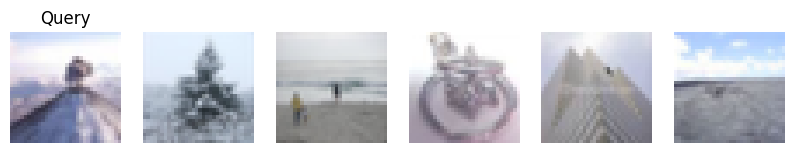

Visualizing results for query index 10:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


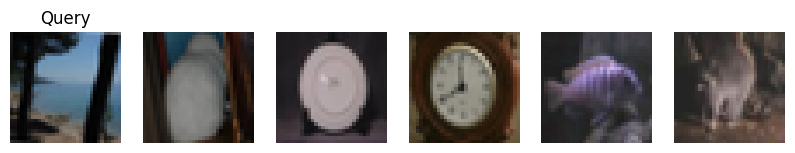

Visualizing results for query index 20:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


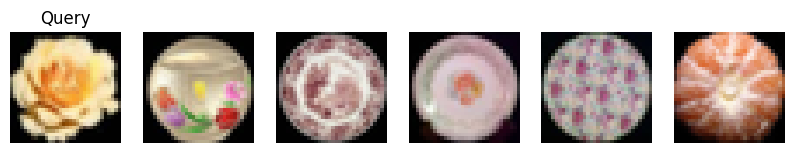

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

train_embeddings = encoder.predict(x_train)
test_embeddings = encoder.predict(x_test)

train_embeddings_flat = train_embeddings.reshape(len(train_embeddings), -1)
test_embeddings_flat = test_embeddings.reshape(len(test_embeddings), -1)

def find_similar_images(query_image, num_results=5):
    query_embedding = encoder.predict(query_image.reshape(1, 32, 32, 3)).reshape(1, -1)

    similarities = cosine_similarity(query_embedding, train_embeddings_flat)
    most_similar_indices = np.argsort(similarities[0])[::-1][:num_results]
    return most_similar_indices


def evaluate_similarity_search():
    precision_list = []
    recall_list = []
    total_retrievals = 0
    correct_retrievals = 0

    print("Evaluating similarity search:")
    for i in tqdm(range(len(x_test)), desc="Processing test samples"):
        query_image = x_test[i]
        true_label = y_test[i][0]

        most_similar_indices = find_similar_images(query_image)
        similar_labels = y_train[most_similar_indices].flatten()


        precision = precision_score([true_label] * len(similar_labels), similar_labels, average='micro')
        recall = recall_score([true_label] * len(similar_labels), similar_labels, average='micro')

        precision_list.append(precision)
        recall_list.append(recall)


        if true_label in similar_labels:
            correct_retrievals += 1
        total_retrievals += 1


    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)
    retrieval_accuracy = correct_retrievals / total_retrievals

    print(f"\nPrecision: {mean_precision:.4f}")
    print(f"Recall: {mean_recall:.4f}")
    print(f"Retrieval Accuracy: {retrieval_accuracy:.4f}")

#Query
def visualize_similar_images(query_index, num_results=5):
    query_image = x_test[query_index]
    most_similar_indices = find_similar_images(query_image, num_results)
    similar_images = x_train[most_similar_indices]

    plt.figure(figsize=(10, 2))
    plt.subplot(1, num_results + 1, 1)
    plt.imshow(query_image)
    plt.title("Query")
    plt.axis('off')

    for i, img in enumerate(similar_images):
        plt.subplot(1, num_results + 1, i + 2)
        plt.imshow(img)
        plt.axis('off')

    plt.show()


evaluate_similarity_search()


sample_query_indices = [0, 10, 20]
for idx in sample_query_indices:
    print(f"Visualizing results for query index {idx}:")
    visualize_similar_images(idx)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Evaluating similarity search:


Processing test samples:   0%|          | 0/10000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


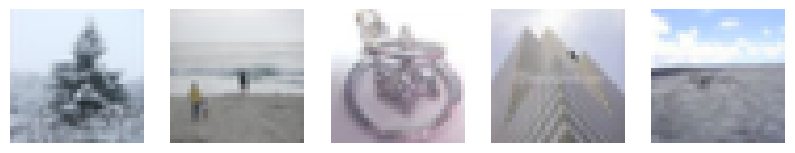

Processing test samples:   0%|          | 1/10000 [00:00<1:33:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


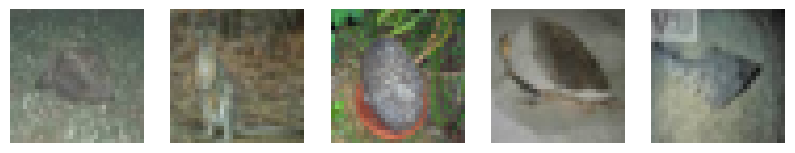

Processing test samples:   0%|          | 2/10000 [00:01<1:35:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


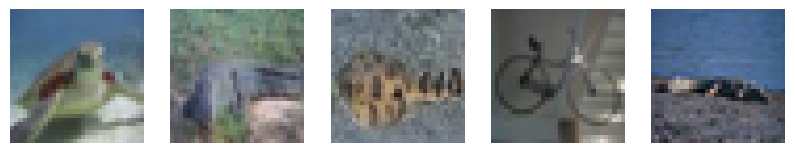

Processing test samples:   0%|          | 3/10000 [00:01<1:35:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


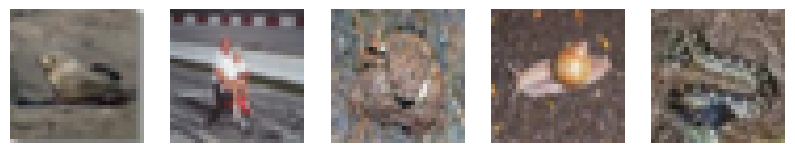

Processing test samples:   0%|          | 4/10000 [00:02<1:34:54,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


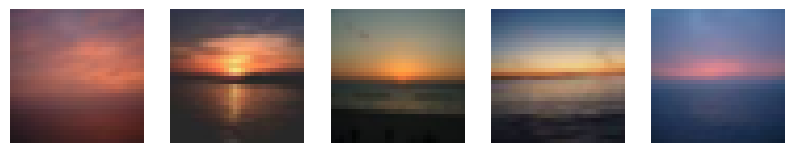

Processing test samples:   0%|          | 5/10000 [00:02<1:35:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


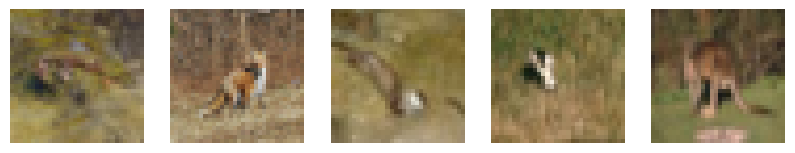

Processing test samples:   0%|          | 6/10000 [00:03<1:36:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


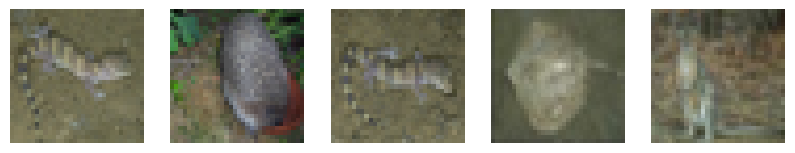

Processing test samples:   0%|          | 7/10000 [00:04<1:37:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


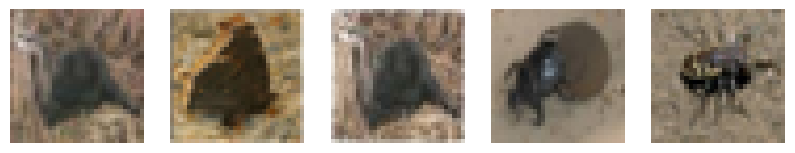

Processing test samples:   0%|          | 8/10000 [00:04<1:38:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


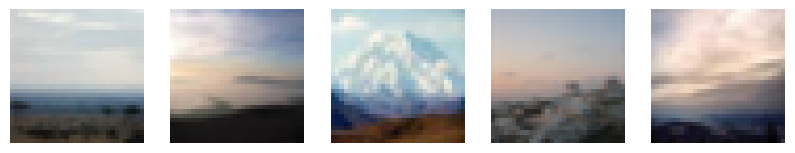

Processing test samples:   0%|          | 9/10000 [00:05<1:37:54,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


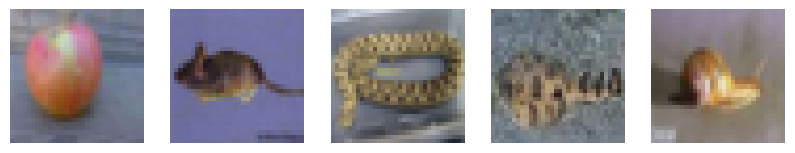

Processing test samples:   0%|          | 10/10000 [00:06<1:53:16,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


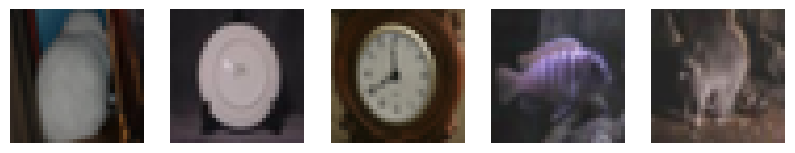

Processing test samples:   0%|          | 11/10000 [00:06<1:49:17,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


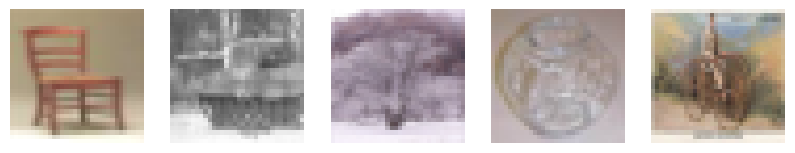

Processing test samples:   0%|          | 12/10000 [00:07<1:45:41,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


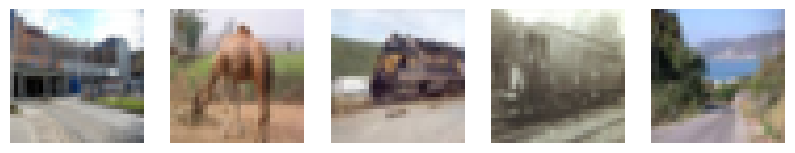

Processing test samples:   0%|          | 13/10000 [00:07<1:43:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 14/10000 [00:08<1:41:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


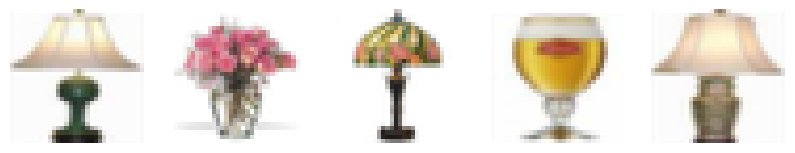

Processing test samples:   0%|          | 15/10000 [00:09<1:39:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


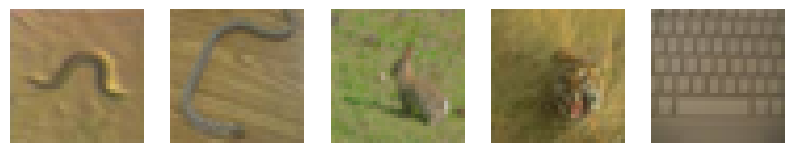

Processing test samples:   0%|          | 16/10000 [00:09<1:38:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test samples:   0%|          | 17/10000 [00:10<1:45:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


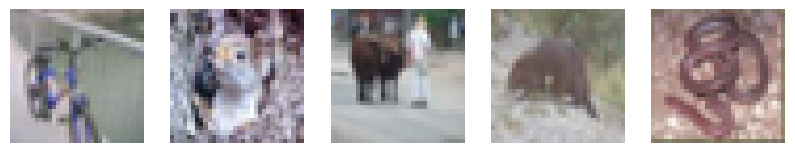

Processing test samples:   0%|          | 18/10000 [00:11<1:53:52,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


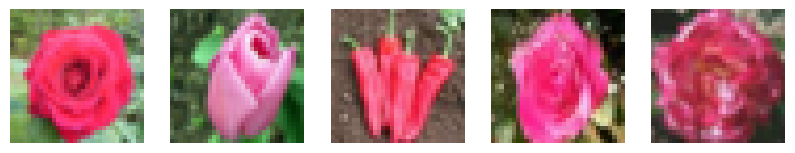

Processing test samples:   0%|          | 19/10000 [00:11<1:59:56,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


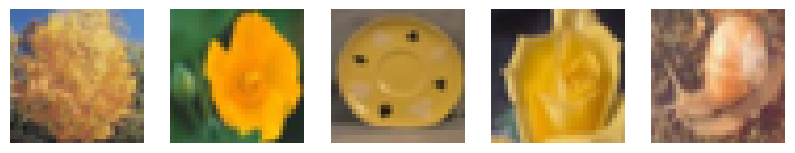

Processing test samples:   0%|          | 20/10000 [00:12<2:04:57,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


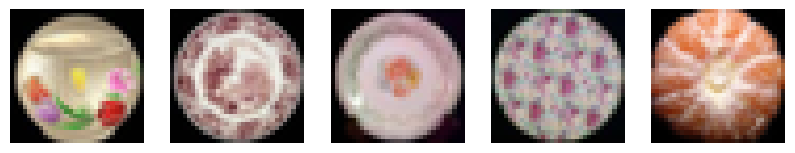

Processing test samples:   0%|          | 21/10000 [00:13<2:07:52,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


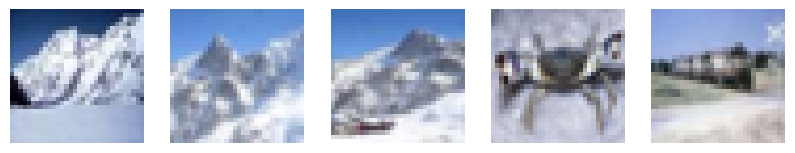

Processing test samples:   0%|          | 22/10000 [00:14<2:00:39,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


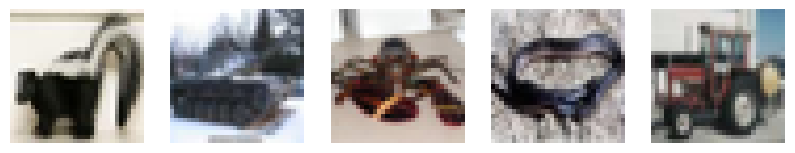

Processing test samples:   0%|          | 23/10000 [00:15<2:08:28,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


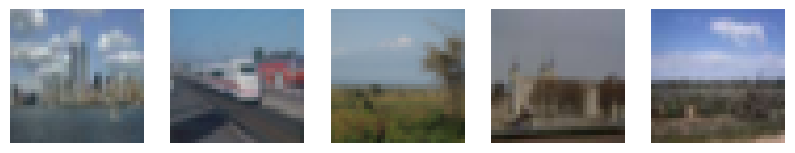

Processing test samples:   0%|          | 24/10000 [00:15<2:00:49,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


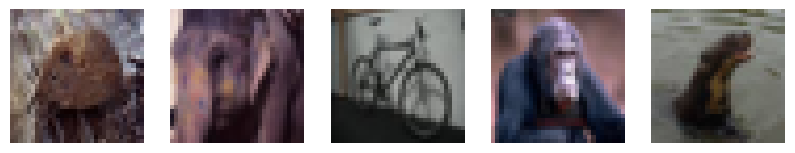

Processing test samples:   0%|          | 25/10000 [00:16<1:54:29,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


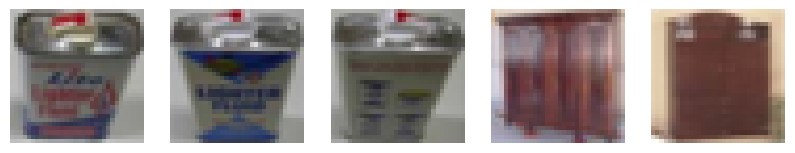

Processing test samples:   0%|          | 26/10000 [00:16<1:50:33,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


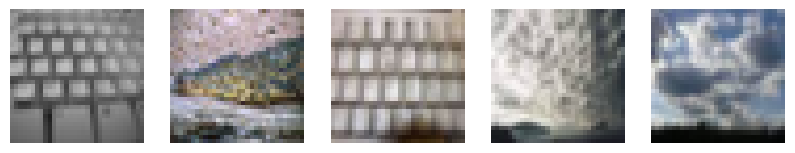

Processing test samples:   0%|          | 27/10000 [00:17<1:47:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


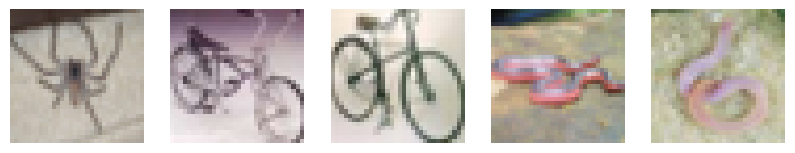

Processing test samples:   0%|          | 28/10000 [00:18<1:45:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


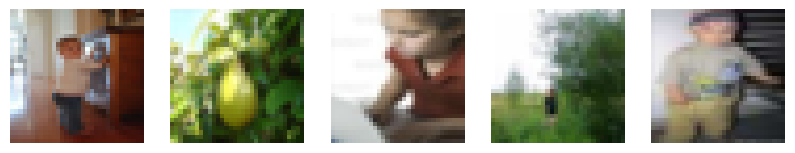

Processing test samples:   0%|          | 29/10000 [00:18<1:43:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


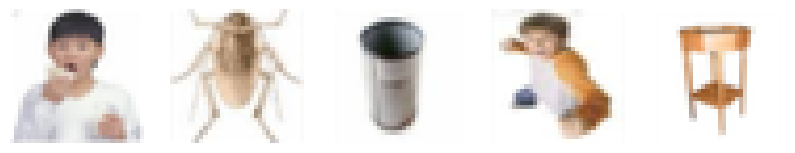

Processing test samples:   0%|          | 30/10000 [00:19<1:42:56,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


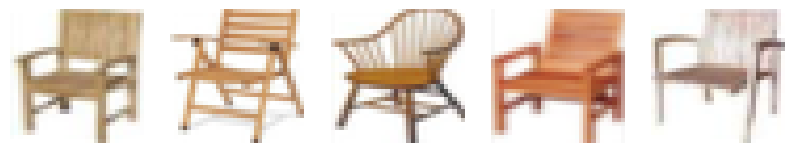

Processing test samples:   0%|          | 31/10000 [00:19<1:42:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


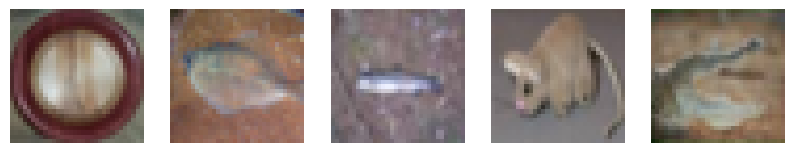

Processing test samples:   0%|          | 32/10000 [00:20<1:41:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


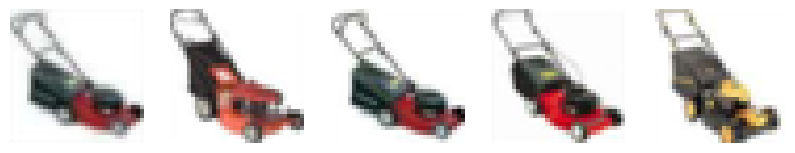

Processing test samples:   0%|          | 33/10000 [00:21<1:41:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test samples:   0%|          | 34/10000 [00:21<1:46:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


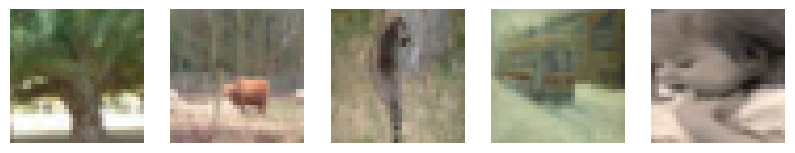

Processing test samples:   0%|          | 35/10000 [00:22<1:49:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


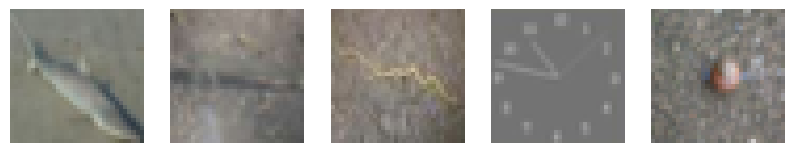

Processing test samples:   0%|          | 36/10000 [00:23<1:46:59,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


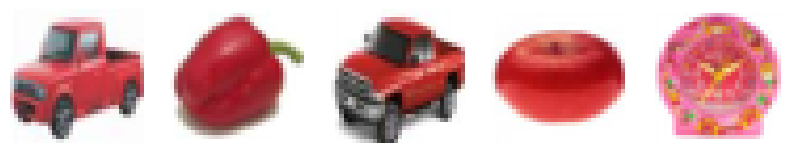

Processing test samples:   0%|          | 37/10000 [00:24<2:07:25,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   0%|          | 38/10000 [00:25<2:10:16,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


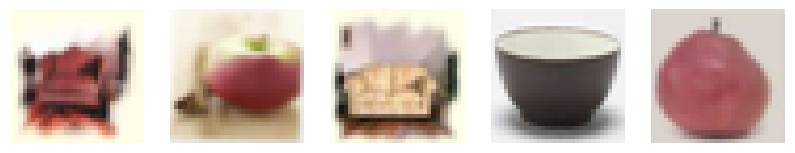

Processing test samples:   0%|          | 39/10000 [00:25<2:12:17,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


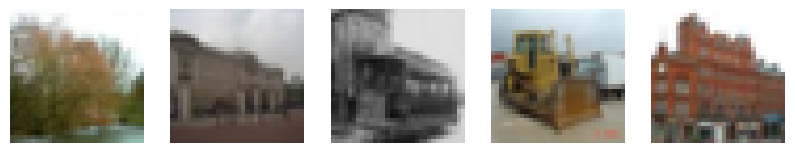

Processing test samples:   0%|          | 40/10000 [00:26<2:16:48,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


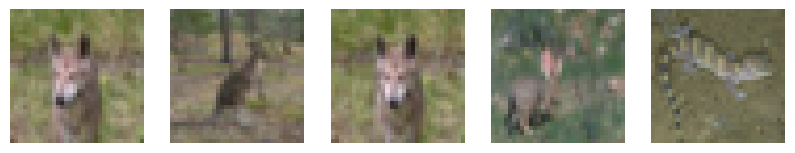

Processing test samples:   0%|          | 41/10000 [00:27<2:11:41,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


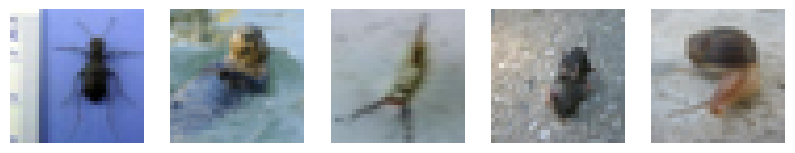

Processing test samples:   0%|          | 42/10000 [00:28<2:03:24,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


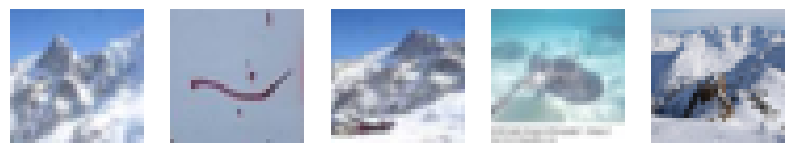

Processing test samples:   0%|          | 43/10000 [00:28<1:57:37,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


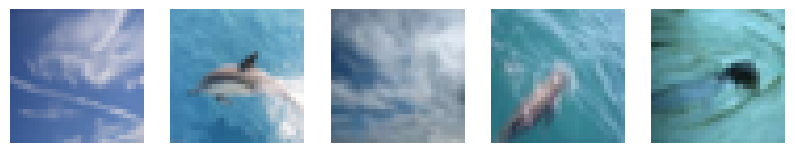

Processing test samples:   0%|          | 44/10000 [00:29<1:53:10,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   0%|          | 45/10000 [00:30<1:50:52,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


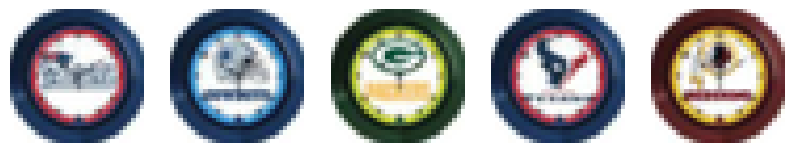

Processing test samples:   0%|          | 46/10000 [00:30<1:47:52,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


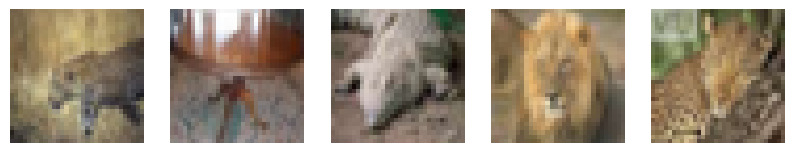

Processing test samples:   0%|          | 47/10000 [00:31<1:50:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


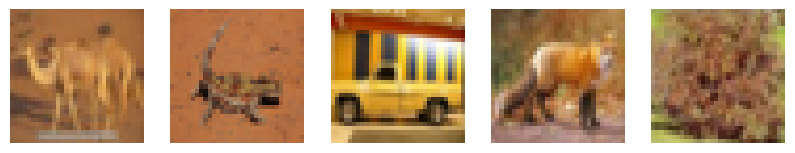

Processing test samples:   0%|          | 48/10000 [00:31<1:48:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


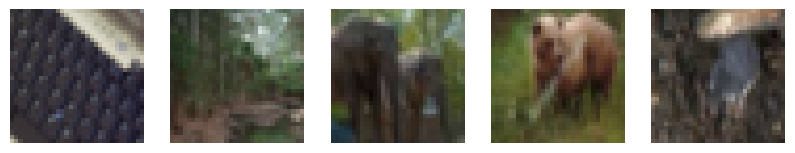

Processing test samples:   0%|          | 49/10000 [00:32<1:46:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


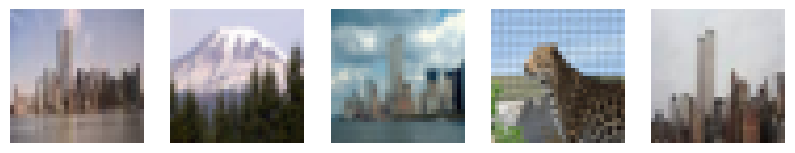

Processing test samples:   0%|          | 50/10000 [00:33<1:59:07,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


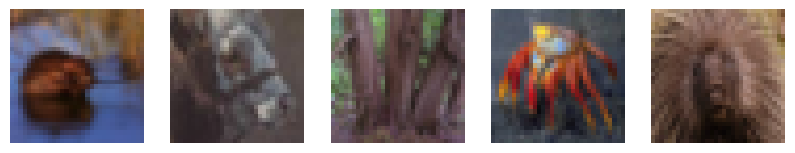

Processing test samples:   1%|          | 51/10000 [00:34<1:54:55,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


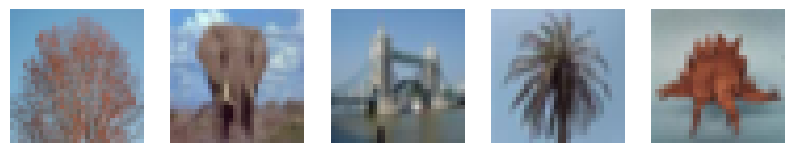

Processing test samples:   1%|          | 52/10000 [00:34<1:51:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


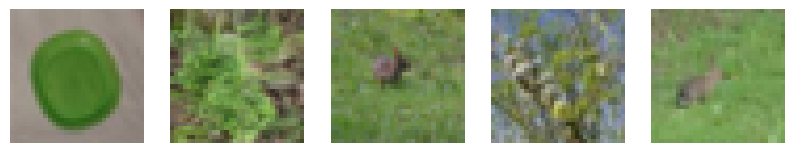

Processing test samples:   1%|          | 53/10000 [00:35<1:49:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


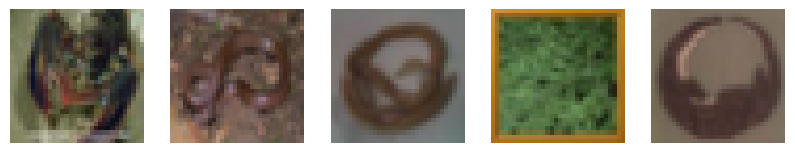

Processing test samples:   1%|          | 54/10000 [00:36<1:49:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


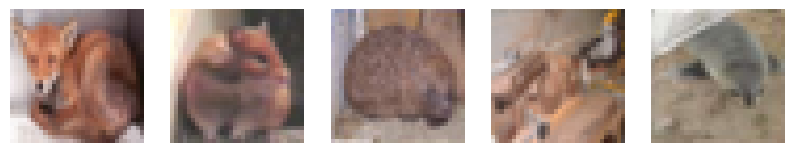

Processing test samples:   1%|          | 55/10000 [00:36<1:47:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


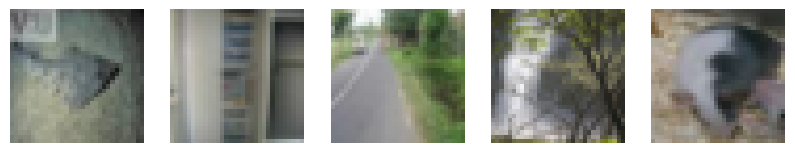

Processing test samples:   1%|          | 56/10000 [00:37<1:46:10,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


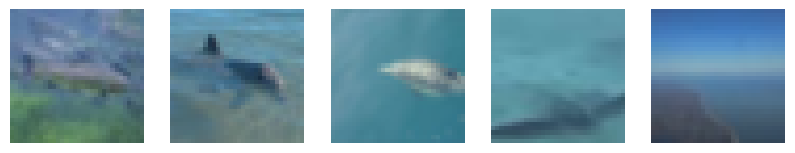

Processing test samples:   1%|          | 57/10000 [00:38<1:53:40,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


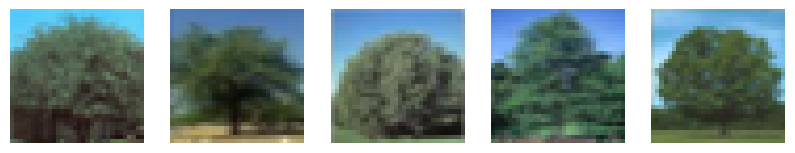

Processing test samples:   1%|          | 58/10000 [00:38<1:59:34,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 59/10000 [00:39<2:06:18,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test samples:   1%|          | 60/10000 [00:40<2:11:57,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


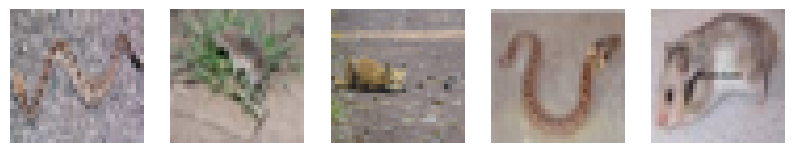

Processing test samples:   1%|          | 61/10000 [00:41<2:07:59,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


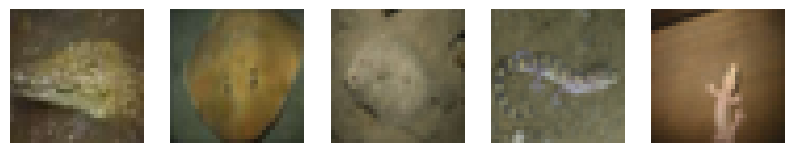

Processing test samples:   1%|          | 62/10000 [00:41<2:01:22,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


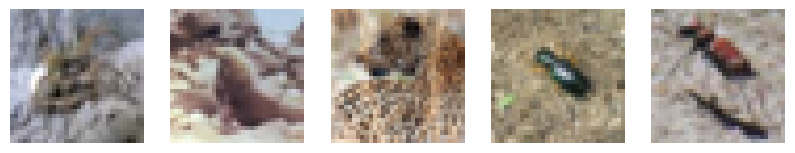

Processing test samples:   1%|          | 63/10000 [00:42<2:09:02,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


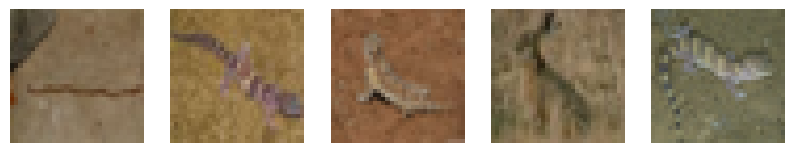

Processing test samples:   1%|          | 64/10000 [00:43<2:02:23,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


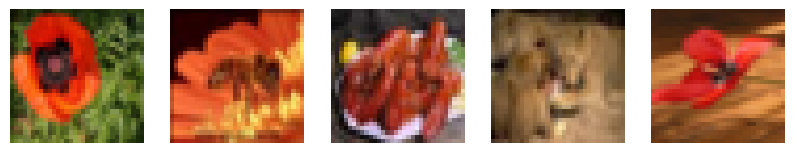

Processing test samples:   1%|          | 65/10000 [00:44<1:55:53,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


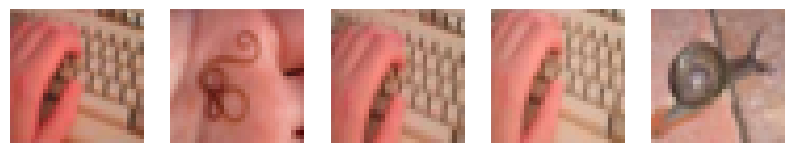

Processing test samples:   1%|          | 66/10000 [00:44<1:52:33,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


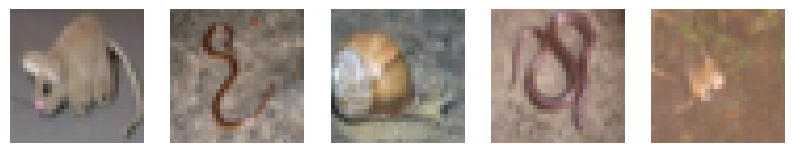

Processing test samples:   1%|          | 67/10000 [00:45<1:50:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test samples:   1%|          | 68/10000 [00:45<1:48:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


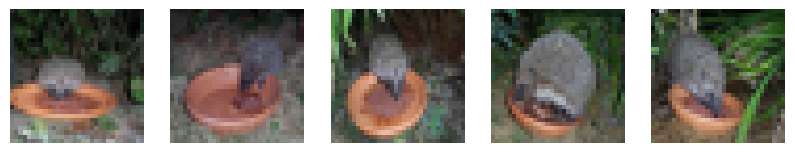

Processing test samples:   1%|          | 69/10000 [00:46<1:47:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


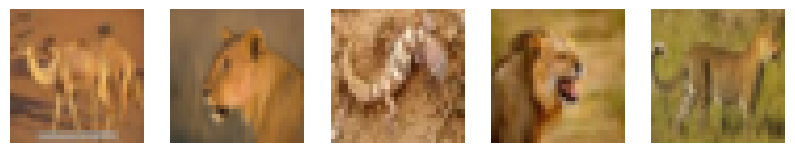

Processing test samples:   1%|          | 70/10000 [00:47<1:46:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


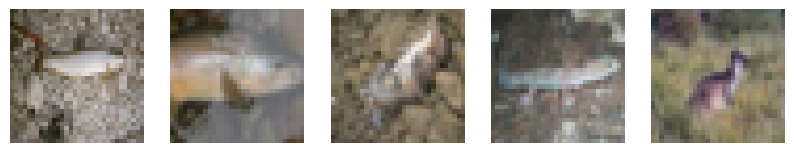

Processing test samples:   1%|          | 71/10000 [00:47<1:45:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


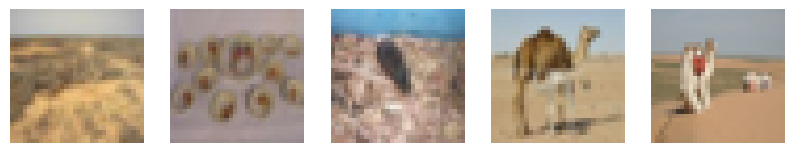

Processing test samples:   1%|          | 72/10000 [00:48<1:45:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


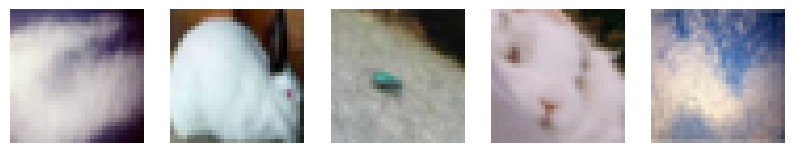

Processing test samples:   1%|          | 73/10000 [00:49<1:46:10,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test samples:   1%|          | 74/10000 [00:49<1:46:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


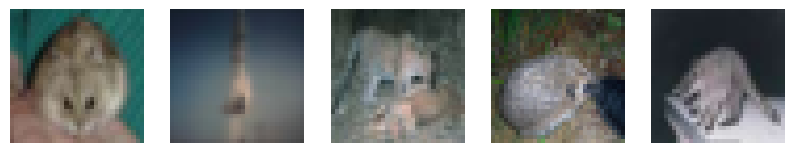

Processing test samples:   1%|          | 75/10000 [00:50<1:45:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


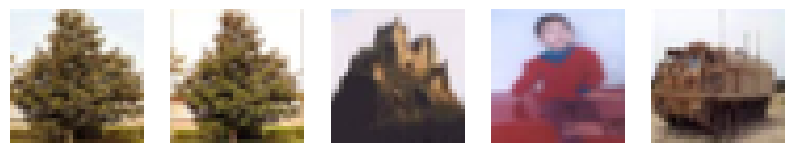

Processing test samples:   1%|          | 76/10000 [00:51<1:46:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test samples:   1%|          | 77/10000 [00:52<2:12:51,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


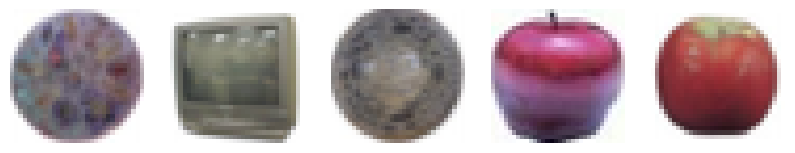

Processing test samples:   1%|          | 78/10000 [00:53<2:13:16,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing test samples:   1%|          | 79/10000 [00:53<2:13:31,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


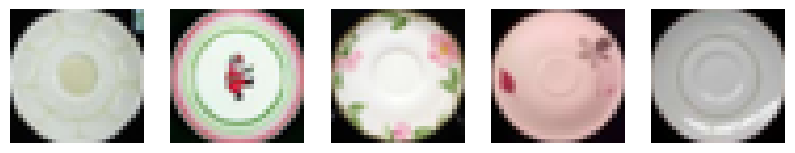

Processing test samples:   1%|          | 80/10000 [00:54<2:13:42,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


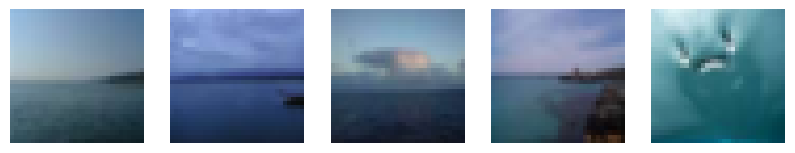

Processing test samples:   1%|          | 81/10000 [00:55<2:07:12,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


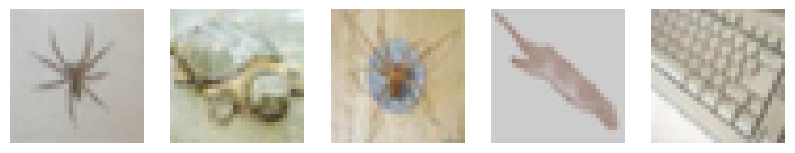

Processing test samples:   1%|          | 82/10000 [00:56<1:59:56,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


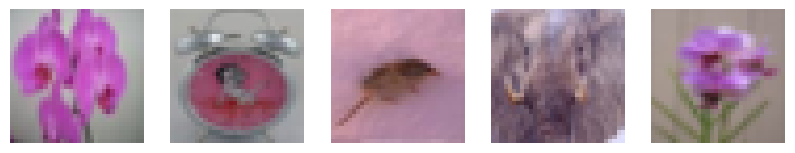

Processing test samples:   1%|          | 83/10000 [00:56<1:54:39,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


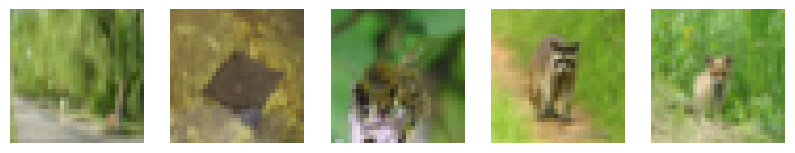

Processing test samples:   1%|          | 84/10000 [00:57<1:51:52,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


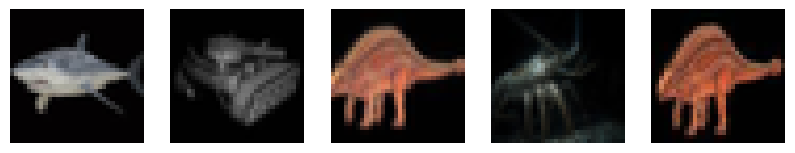

Processing test samples:   1%|          | 85/10000 [00:57<1:50:24,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:   1%|          | 86/10000 [00:58<1:47:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test samples:   1%|          | 87/10000 [00:59<1:46:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


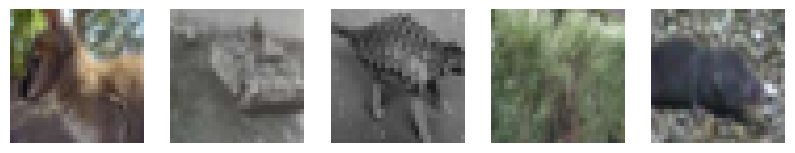

Processing test samples:   1%|          | 88/10000 [00:59<1:44:57,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test samples:   1%|          | 89/10000 [01:00<1:45:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test samples:   1%|          | 90/10000 [01:01<1:58:47,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


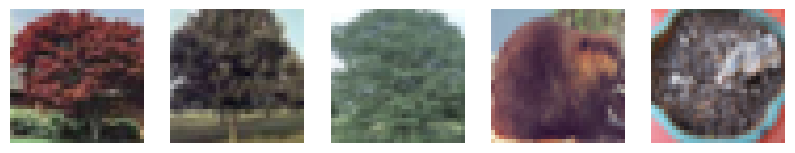

Processing test samples:   1%|          | 91/10000 [01:01<1:52:30,  1.47it/s]


KeyboardInterrupt: 

In [5]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import precision_score, recall_score
# from tqdm import tqdm  # For progress bar
# import numpy as np
# import matplotlib.pyplot as plt

#
# train_embeddings = encoder.predict(x_train)
# test_embeddings = encoder.predict(x_test)

#
# train_embeddings_flat = train_embeddings.reshape(len(train_embeddings), -1)
# test_embeddings_flat = test_embeddings.reshape(len(test_embeddings), -1)

#
# def find_similar_images(query_image, num_results=5):
#
#     query_embedding = encoder.predict(query_image.reshape(1, 32, 32, 3)).reshape(1, -1)

#
#     similarities = cosine_similarity(query_embedding, train_embeddings_flat)
#     most_similar_indices = np.argsort(similarities[0])[::-1][:num_results]

#
#     similar_images = x_train[most_similar_indices]

#     plt.figure(figsize=(10, 2))
#     for i, img in enumerate(similar_images):
#         plt.subplot(1, num_results, i + 1)
#         plt.imshow(img)
#         plt.axis('off')
#     plt.show()

#     return most_similar_indices

#
# def evaluate_similarity_search():
#     precision_list = []
#     recall_list = []
#     total_retrievals = 0
#     correct_retrievals = 0

#     print("Evaluating similarity search:")
#     for i in tqdm(range(len(x_test)), desc="Processing test samples"):  # Loop with progress bar
#         query_image = x_test[i]
#         true_label = y_test[i][0]  # Extract true label

#         most_similar_indices = find_similar_images(query_image)
#         similar_labels = y_train[most_similar_indices].flatten()

#
#         precision = precision_score([true_label] * len(similar_labels), similar_labels, average='micro')
#         recall = recall_score([true_label] * len(similar_labels), similar_labels, average='micro')

#         precision_list.append(precision)
#         recall_list.append(recall)

#
#         if true_label in similar_labels:
#             correct_retrievals += 1
#         total_retrievals += 1

#
#     mean_precision = np.mean(precision_list)
#     mean_recall = np.mean(recall_list)
#     retrieval_accuracy = correct_retrievals / total_retrievals

#     print(f"\nPrecision: {mean_precision:.4f}")
#     print(f"Recall: {mean_recall:.4f}")
#     print(f"Retrieval Accuracy: {retrieval_accuracy:.4f}")


# random_test_image = x_test[0]
# plt.imshow(random_test_image)
# plt.title("Query Image")
# plt.axis('off')
# plt.show()

# evaluate_similarity_search()
